In [ ]:
%load_ext autoreload
%autoreload 2

# Generating angle distributions from oxDNA simulations that characterize DNA-nanomotifs 

Mechanical properties of single motifs and pairs are characterized by generating key angle distributions within and between arms of the motifs. The input are long simulation runs of motifs using oxDNA, the output are histograms of angles of interest. These can then be used as target distributions for a coarse-grained model of the motifs with tuneable parameters.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import readdy
import math
import scipy
from scipy.optimize import curve_fit
from matplotlib.colors import LinearSegmentedColormap
import time
import scipy.integrate as integrate
print(readdy.__version__)
from scipy.spatial.transform import Rotation as Rot
#from sklearn.cluster import DBSCAN
#from sklearn import metrics
from collections import Counter
import random
from scipy.ndimage import uniform_filter1d

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'python_scripts')))

from NCG_target_angle_eval_fcts import read_positions_2, conf_angles_3, conf_angles_2d,conf_angles_2c

# Energy of target oxDNA simulation

In [ ]:
plt.figure(figsize=(3,3))
energy_t, energy=np.loadtxt("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/pot_energy_1.dat",unpack=True)
plt.errorbar(energy_t,energy)

plt.ylabel("Energy",fontname = "Arial",fontsize=11)
plt.xlabel("Time",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()

# Read trajectory of target oxDNA simulation

In [ ]:
read_sim_coords=read_positions_2(file_name="/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/trajectory_1.dat",num_nucl=184,time_start=0,time_stop=50000,time_step=1)

3746 / 50000
3747 / 50000
3748 / 50000
3749 / 50000
3750 / 50000
3751 / 50000
3752 / 50000
3753 / 50000
3754 / 50000
3755 / 50000
3756 / 50000
3757 / 50000
3758 / 50000
3759 / 50000
3760 / 50000
3761 / 50000
3762 / 50000
3763 / 50000
3764 / 50000
3765 / 50000
3766 / 50000
3767 / 50000
3768 / 50000
3769 / 50000
3770 / 50000
3771 / 50000
3772 / 50000
3773 / 50000
3774 / 50000
3775 / 50000
3776 / 50000
3777 / 50000
3778 / 50000
3779 / 50000
3780 / 50000
3781 / 50000
3782 / 50000
3783 / 50000
3784 / 50000
3785 / 50000
3786 / 50000
3787 / 50000
3788 / 50000
3789 / 50000
3790 / 50000
3791 / 50000
3792 / 50000
3793 / 50000
3794 / 50000
3795 / 50000
3796 / 50000
3797 / 50000
3798 / 50000
3799 / 50000
3800 / 50000
3801 / 50000
3802 / 50000
3803 / 50000
3804 / 50000
3805 / 50000
3806 / 50000
3807 / 50000
3808 / 50000
3809 / 50000
3810 / 50000
3811 / 50000
3812 / 50000
3813 / 50000
3814 / 50000
3815 / 50000
3816 / 50000
3817 / 50000
3818 / 50000
3819 / 50000
3820 / 50000
3821 / 50000
3822 / 50000

9307 / 50000
9308 / 50000
9309 / 50000
9310 / 50000
9311 / 50000
9312 / 50000
9313 / 50000
9314 / 50000
9315 / 50000
9316 / 50000
9317 / 50000
9318 / 50000
9319 / 50000
9320 / 50000
9321 / 50000
9322 / 50000
9323 / 50000
9324 / 50000
9325 / 50000
9326 / 50000
9327 / 50000
9328 / 50000
9329 / 50000
9330 / 50000
9331 / 50000
9332 / 50000
9333 / 50000
9334 / 50000
9335 / 50000
9336 / 50000
9337 / 50000
9338 / 50000
9339 / 50000
9340 / 50000
9341 / 50000
9342 / 50000
9343 / 50000
9344 / 50000
9345 / 50000
9346 / 50000
9347 / 50000
9348 / 50000
9349 / 50000
9350 / 50000
9351 / 50000
9352 / 50000
9353 / 50000
9354 / 50000
9355 / 50000
9356 / 50000
9357 / 50000
9358 / 50000
9359 / 50000
9360 / 50000
9361 / 50000
9362 / 50000
9363 / 50000
9364 / 50000
9365 / 50000
9366 / 50000
9367 / 50000
9368 / 50000
9369 / 50000
9370 / 50000
9371 / 50000
9372 / 50000
9373 / 50000
9374 / 50000
9375 / 50000
9376 / 50000
9377 / 50000
9378 / 50000
9379 / 50000
9380 / 50000
9381 / 50000
9382 / 50000
9383 / 50000

11319 / 50000
11320 / 50000
11321 / 50000
11322 / 50000
11323 / 50000
11324 / 50000
11325 / 50000
11326 / 50000
11327 / 50000
11328 / 50000
11329 / 50000
11330 / 50000
11331 / 50000
11332 / 50000
11333 / 50000
11334 / 50000
11335 / 50000
11336 / 50000
11337 / 50000
11338 / 50000
11339 / 50000
11340 / 50000
11341 / 50000
11342 / 50000
11343 / 50000
11344 / 50000
11345 / 50000
11346 / 50000
11347 / 50000
11348 / 50000
11349 / 50000
11350 / 50000
11351 / 50000
11352 / 50000
11353 / 50000
11354 / 50000
11355 / 50000
11356 / 50000
11357 / 50000
11358 / 50000
11359 / 50000
11360 / 50000
11361 / 50000
11362 / 50000
11363 / 50000
11364 / 50000
11365 / 50000
11366 / 50000
11367 / 50000
11368 / 50000
11369 / 50000
11370 / 50000
11371 / 50000
11372 / 50000
11373 / 50000
11374 / 50000
11375 / 50000
11376 / 50000
11377 / 50000
11378 / 50000
11379 / 50000
11380 / 50000
11381 / 50000
11382 / 50000
11383 / 50000
11384 / 50000
11385 / 50000
11386 / 50000
11387 / 50000
11388 / 50000
11389 / 50000
11390 

14858 / 50000
14859 / 50000
14860 / 50000
14861 / 50000
14862 / 50000
14863 / 50000
14864 / 50000
14865 / 50000
14866 / 50000
14867 / 50000
14868 / 50000
14869 / 50000
14870 / 50000
14871 / 50000
14872 / 50000
14873 / 50000
14874 / 50000
14875 / 50000
14876 / 50000
14877 / 50000
14878 / 50000
14879 / 50000
14880 / 50000
14881 / 50000
14882 / 50000
14883 / 50000
14884 / 50000
14885 / 50000
14886 / 50000
14887 / 50000
14888 / 50000
14889 / 50000
14890 / 50000
14891 / 50000
14892 / 50000
14893 / 50000
14894 / 50000
14895 / 50000
14896 / 50000
14897 / 50000
14898 / 50000
14899 / 50000
14900 / 50000
14901 / 50000
14902 / 50000
14903 / 50000
14904 / 50000
14905 / 50000
14906 / 50000
14907 / 50000
14908 / 50000
14909 / 50000
14910 / 50000
14911 / 50000
14912 / 50000
14913 / 50000
14914 / 50000
14915 / 50000
14916 / 50000
14917 / 50000
14918 / 50000
14919 / 50000
14920 / 50000
14921 / 50000
14922 / 50000
14923 / 50000
14924 / 50000
14925 / 50000
14926 / 50000
14927 / 50000
14928 / 50000
14929 

18474 / 50000
18475 / 50000
18476 / 50000
18477 / 50000
18478 / 50000
18479 / 50000
18480 / 50000
18481 / 50000
18482 / 50000
18483 / 50000
18484 / 50000
18485 / 50000
18486 / 50000
18487 / 50000
18488 / 50000
18489 / 50000
18490 / 50000
18491 / 50000
18492 / 50000
18493 / 50000
18494 / 50000
18495 / 50000
18496 / 50000
18497 / 50000
18498 / 50000
18499 / 50000
18500 / 50000
18501 / 50000
18502 / 50000
18503 / 50000
18504 / 50000
18505 / 50000
18506 / 50000
18507 / 50000
18508 / 50000
18509 / 50000
18510 / 50000
18511 / 50000
18512 / 50000
18513 / 50000
18514 / 50000
18515 / 50000
18516 / 50000
18517 / 50000
18518 / 50000
18519 / 50000
18520 / 50000
18521 / 50000
18522 / 50000
18523 / 50000
18524 / 50000
18525 / 50000
18526 / 50000
18527 / 50000
18528 / 50000
18529 / 50000
18530 / 50000
18531 / 50000
18532 / 50000
18533 / 50000
18534 / 50000
18535 / 50000
18536 / 50000
18537 / 50000
18538 / 50000
18539 / 50000
18540 / 50000
18541 / 50000
18542 / 50000
18543 / 50000
18544 / 50000
18545 

22500 / 50000
22501 / 50000
22502 / 50000
22503 / 50000
22504 / 50000
22505 / 50000
22506 / 50000
22507 / 50000
22508 / 50000
22509 / 50000
22510 / 50000
22511 / 50000
22512 / 50000
22513 / 50000
22514 / 50000
22515 / 50000
22516 / 50000
22517 / 50000
22518 / 50000
22519 / 50000
22520 / 50000
22521 / 50000
22522 / 50000
22523 / 50000
22524 / 50000
22525 / 50000
22526 / 50000
22527 / 50000
22528 / 50000
22529 / 50000
22530 / 50000
22531 / 50000
22532 / 50000
22533 / 50000
22534 / 50000
22535 / 50000
22536 / 50000
22537 / 50000
22538 / 50000
22539 / 50000
22540 / 50000
22541 / 50000
22542 / 50000
22543 / 50000
22544 / 50000
22545 / 50000
22546 / 50000
22547 / 50000
22548 / 50000
22549 / 50000
22550 / 50000
22551 / 50000
22552 / 50000
22553 / 50000
22554 / 50000
22555 / 50000
22556 / 50000
22557 / 50000
22558 / 50000
22559 / 50000
22560 / 50000
22561 / 50000
22562 / 50000
22563 / 50000
22564 / 50000
22565 / 50000
22566 / 50000
22567 / 50000
22568 / 50000
22569 / 50000
22570 / 50000
22571 

26216 / 50000
26217 / 50000
26218 / 50000
26219 / 50000
26220 / 50000
26221 / 50000
26222 / 50000
26223 / 50000
26224 / 50000
26225 / 50000
26226 / 50000
26227 / 50000
26228 / 50000
26229 / 50000
26230 / 50000
26231 / 50000
26232 / 50000
26233 / 50000
26234 / 50000
26235 / 50000
26236 / 50000
26237 / 50000
26238 / 50000
26239 / 50000
26240 / 50000
26241 / 50000
26242 / 50000
26243 / 50000
26244 / 50000
26245 / 50000
26246 / 50000
26247 / 50000
26248 / 50000
26249 / 50000
26250 / 50000
26251 / 50000
26252 / 50000
26253 / 50000
26254 / 50000
26255 / 50000
26256 / 50000
26257 / 50000
26258 / 50000
26259 / 50000
26260 / 50000
26261 / 50000
26262 / 50000
26263 / 50000
26264 / 50000
26265 / 50000
26266 / 50000
26267 / 50000
26268 / 50000
26269 / 50000
26270 / 50000
26271 / 50000
26272 / 50000
26273 / 50000
26274 / 50000
26275 / 50000
26276 / 50000
26277 / 50000
26278 / 50000
26279 / 50000
26280 / 50000
26281 / 50000
26282 / 50000
26283 / 50000
26284 / 50000
26285 / 50000
26286 / 50000
26287 

29643 / 50000
29644 / 50000
29645 / 50000
29646 / 50000
29647 / 50000
29648 / 50000
29649 / 50000
29650 / 50000
29651 / 50000
29652 / 50000
29653 / 50000
29654 / 50000
29655 / 50000
29656 / 50000
29657 / 50000
29658 / 50000
29659 / 50000
29660 / 50000
29661 / 50000
29662 / 50000
29663 / 50000
29664 / 50000
29665 / 50000
29666 / 50000
29667 / 50000
29668 / 50000
29669 / 50000
29670 / 50000
29671 / 50000
29672 / 50000
29673 / 50000
29674 / 50000
29675 / 50000
29676 / 50000
29677 / 50000
29678 / 50000
29679 / 50000
29680 / 50000
29681 / 50000
29682 / 50000
29683 / 50000
29684 / 50000
29685 / 50000
29686 / 50000
29687 / 50000
29688 / 50000
29689 / 50000
29690 / 50000
29691 / 50000
29692 / 50000
29693 / 50000
29694 / 50000
29695 / 50000
29696 / 50000
29697 / 50000
29698 / 50000
29699 / 50000
29700 / 50000
29701 / 50000
29702 / 50000
29703 / 50000
29704 / 50000
29705 / 50000
29706 / 50000
29707 / 50000
29708 / 50000
29709 / 50000
29710 / 50000
29711 / 50000
29712 / 50000
29713 / 50000
29714 

33486 / 50000
33487 / 50000
33488 / 50000
33489 / 50000
33490 / 50000
33491 / 50000
33492 / 50000
33493 / 50000
33494 / 50000
33495 / 50000
33496 / 50000
33497 / 50000
33498 / 50000
33499 / 50000
33500 / 50000
33501 / 50000
33502 / 50000
33503 / 50000
33504 / 50000
33505 / 50000
33506 / 50000
33507 / 50000
33508 / 50000
33509 / 50000
33510 / 50000
33511 / 50000
33512 / 50000
33513 / 50000
33514 / 50000
33515 / 50000
33516 / 50000
33517 / 50000
33518 / 50000
33519 / 50000
33520 / 50000
33521 / 50000
33522 / 50000
33523 / 50000
33524 / 50000
33525 / 50000
33526 / 50000
33527 / 50000
33528 / 50000
33529 / 50000
33530 / 50000
33531 / 50000
33532 / 50000
33533 / 50000
33534 / 50000
33535 / 50000
33536 / 50000
33537 / 50000
33538 / 50000
33539 / 50000
33540 / 50000
33541 / 50000
33542 / 50000
33543 / 50000
33544 / 50000
33545 / 50000
33546 / 50000
33547 / 50000
33548 / 50000
33549 / 50000
33550 / 50000
33551 / 50000
33552 / 50000
33553 / 50000
33554 / 50000
33555 / 50000
33556 / 50000
33557 

37158 / 50000
37159 / 50000
37160 / 50000
37161 / 50000
37162 / 50000
37163 / 50000
37164 / 50000
37165 / 50000
37166 / 50000
37167 / 50000
37168 / 50000
37169 / 50000
37170 / 50000
37171 / 50000
37172 / 50000
37173 / 50000
37174 / 50000
37175 / 50000
37176 / 50000
37177 / 50000
37178 / 50000
37179 / 50000
37180 / 50000
37181 / 50000
37182 / 50000
37183 / 50000
37184 / 50000
37185 / 50000
37186 / 50000
37187 / 50000
37188 / 50000
37189 / 50000
37190 / 50000
37191 / 50000
37192 / 50000
37193 / 50000
37194 / 50000
37195 / 50000
37196 / 50000
37197 / 50000
37198 / 50000
37199 / 50000
37200 / 50000
37201 / 50000
37202 / 50000
37203 / 50000
37204 / 50000
37205 / 50000
37206 / 50000
37207 / 50000
37208 / 50000
37209 / 50000
37210 / 50000
37211 / 50000
37212 / 50000
37213 / 50000
37214 / 50000
37215 / 50000
37216 / 50000
37217 / 50000
37218 / 50000
37219 / 50000
37220 / 50000
37221 / 50000
37222 / 50000
37223 / 50000
37224 / 50000
37225 / 50000
37226 / 50000
37227 / 50000
37228 / 50000
37229 

41003 / 50000
41004 / 50000
41005 / 50000
41006 / 50000
41007 / 50000
41008 / 50000
41009 / 50000
41010 / 50000
41011 / 50000
41012 / 50000
41013 / 50000
41014 / 50000
41015 / 50000
41016 / 50000
41017 / 50000
41018 / 50000
41019 / 50000
41020 / 50000
41021 / 50000
41022 / 50000
41023 / 50000
41024 / 50000
41025 / 50000
41026 / 50000
41027 / 50000
41028 / 50000
41029 / 50000
41030 / 50000
41031 / 50000
41032 / 50000
41033 / 50000
41034 / 50000
41035 / 50000
41036 / 50000
41037 / 50000
41038 / 50000
41039 / 50000
41040 / 50000
41041 / 50000
41042 / 50000
41043 / 50000
41044 / 50000
41045 / 50000
41046 / 50000
41047 / 50000
41048 / 50000
41049 / 50000
41050 / 50000
41051 / 50000
41052 / 50000
41053 / 50000
41054 / 50000
41055 / 50000
41056 / 50000
41057 / 50000
41058 / 50000
41059 / 50000
41060 / 50000
41061 / 50000
41062 / 50000
41063 / 50000
41064 / 50000
41065 / 50000
41066 / 50000
41067 / 50000
41068 / 50000
41069 / 50000
41070 / 50000
41071 / 50000
41072 / 50000
41073 / 50000
41074 

45035 / 50000
45036 / 50000
45037 / 50000
45038 / 50000
45039 / 50000
45040 / 50000
45041 / 50000
45042 / 50000
45043 / 50000
45044 / 50000
45045 / 50000
45046 / 50000
45047 / 50000
45048 / 50000
45049 / 50000
45050 / 50000
45051 / 50000
45052 / 50000
45053 / 50000
45054 / 50000
45055 / 50000
45056 / 50000
45057 / 50000
45058 / 50000
45059 / 50000
45060 / 50000
45061 / 50000
45062 / 50000
45063 / 50000
45064 / 50000
45065 / 50000
45066 / 50000
45067 / 50000
45068 / 50000
45069 / 50000
45070 / 50000
45071 / 50000
45072 / 50000
45073 / 50000
45074 / 50000
45075 / 50000
45076 / 50000
45077 / 50000
45078 / 50000
45079 / 50000
45080 / 50000
45081 / 50000
45082 / 50000
45083 / 50000
45084 / 50000
45085 / 50000
45086 / 50000
45087 / 50000
45088 / 50000
45089 / 50000
45090 / 50000
45091 / 50000
45092 / 50000
45093 / 50000
45094 / 50000
45095 / 50000
45096 / 50000
45097 / 50000
45098 / 50000
45099 / 50000
45100 / 50000
45101 / 50000
45102 / 50000
45103 / 50000
45104 / 50000
45105 / 50000
45106 

48644 / 50000
48645 / 50000
48646 / 50000
48647 / 50000
48648 / 50000
48649 / 50000
48650 / 50000
48651 / 50000
48652 / 50000
48653 / 50000
48654 / 50000
48655 / 50000
48656 / 50000
48657 / 50000
48658 / 50000
48659 / 50000
48660 / 50000
48661 / 50000
48662 / 50000
48663 / 50000
48664 / 50000
48665 / 50000
48666 / 50000
48667 / 50000
48668 / 50000
48669 / 50000
48670 / 50000
48671 / 50000
48672 / 50000
48673 / 50000
48674 / 50000
48675 / 50000
48676 / 50000
48677 / 50000
48678 / 50000
48679 / 50000
48680 / 50000
48681 / 50000
48682 / 50000
48683 / 50000
48684 / 50000
48685 / 50000
48686 / 50000
48687 / 50000
48688 / 50000
48689 / 50000
48690 / 50000
48691 / 50000
48692 / 50000
48693 / 50000
48694 / 50000
48695 / 50000
48696 / 50000
48697 / 50000
48698 / 50000
48699 / 50000
48700 / 50000
48701 / 50000
48702 / 50000
48703 / 50000
48704 / 50000
48705 / 50000
48706 / 50000
48707 / 50000
48708 / 50000
48709 / 50000
48710 / 50000
48711 / 50000
48712 / 50000
48713 / 50000
48714 / 50000
48715 

# Angle between arms

In [ ]:
#for vector determination in arms
arm_indices_1_b=[[np.arange(4,14),np.arange(70,80)[::-1]] , [np.arange(50,60), np.arange(116,126)[::-1]], 
               [np.arange(96,106), np.arange(162,172)[::-1]],[np.arange(142,152),np.arange(24,34)[::-1]] ] #10 indices four bp away from position where sticky end would begin
angles_test_b,angles_test_b2=conf_angles_2c(pos=read_sim_coords,arm_indices=arm_indices_1_b,split_arm_end_start=5)

angles_test=angles_test_b[300:]

762 / 50000
763 / 50000
764 / 50000
765 / 50000
766 / 50000
767 / 50000
768 / 50000
769 / 50000
770 / 50000
771 / 50000
772 / 50000
773 / 50000
774 / 50000
775 / 50000
776 / 50000
777 / 50000
778 / 50000
779 / 50000
780 / 50000
781 / 50000
782 / 50000
783 / 50000
784 / 50000
785 / 50000
786 / 50000
787 / 50000
788 / 50000
789 / 50000
790 / 50000
791 / 50000
792 / 50000
793 / 50000
794 / 50000
795 / 50000
796 / 50000
797 / 50000
798 / 50000
799 / 50000
800 / 50000
801 / 50000
802 / 50000
803 / 50000
804 / 50000
805 / 50000
806 / 50000
807 / 50000
808 / 50000
809 / 50000
810 / 50000
811 / 50000
812 / 50000
813 / 50000
814 / 50000
815 / 50000
816 / 50000
817 / 50000
818 / 50000
819 / 50000
820 / 50000
821 / 50000
822 / 50000
823 / 50000
824 / 50000
825 / 50000
826 / 50000
827 / 50000
828 / 50000
829 / 50000
830 / 50000
831 / 50000
832 / 50000
833 / 50000
834 / 50000
835 / 50000
836 / 50000
837 / 50000
838 / 50000
839 / 50000
840 / 50000
841 / 50000
842 / 50000
843 / 50000
844 / 50000
845 

1532 / 50000
1533 / 50000
1534 / 50000
1535 / 50000
1536 / 50000
1537 / 50000
1538 / 50000
1539 / 50000
1540 / 50000
1541 / 50000
1542 / 50000
1543 / 50000
1544 / 50000
1545 / 50000
1546 / 50000
1547 / 50000
1548 / 50000
1549 / 50000
1550 / 50000
1551 / 50000
1552 / 50000
1553 / 50000
1554 / 50000
1555 / 50000
1556 / 50000
1557 / 50000
1558 / 50000
1559 / 50000
1560 / 50000
1561 / 50000
1562 / 50000
1563 / 50000
1564 / 50000
1565 / 50000
1566 / 50000
1567 / 50000
1568 / 50000
1569 / 50000
1570 / 50000
1571 / 50000
1572 / 50000
1573 / 50000
1574 / 50000
1575 / 50000
1576 / 50000
1577 / 50000
1578 / 50000
1579 / 50000
1580 / 50000
1581 / 50000
1582 / 50000
1583 / 50000
1584 / 50000
1585 / 50000
1586 / 50000
1587 / 50000
1588 / 50000
1589 / 50000
1590 / 50000
1591 / 50000
1592 / 50000
1593 / 50000
1594 / 50000
1595 / 50000
1596 / 50000
1597 / 50000
1598 / 50000
1599 / 50000
1600 / 50000
1601 / 50000
1602 / 50000
1603 / 50000
1604 / 50000
1605 / 50000
1606 / 50000
1607 / 50000
1608 / 50000

2298 / 50000
2299 / 50000
2300 / 50000
2301 / 50000
2302 / 50000
2303 / 50000
2304 / 50000
2305 / 50000
2306 / 50000
2307 / 50000
2308 / 50000
2309 / 50000
2310 / 50000
2311 / 50000
2312 / 50000
2313 / 50000
2314 / 50000
2315 / 50000
2316 / 50000
2317 / 50000
2318 / 50000
2319 / 50000
2320 / 50000
2321 / 50000
2322 / 50000
2323 / 50000
2324 / 50000
2325 / 50000
2326 / 50000
2327 / 50000
2328 / 50000
2329 / 50000
2330 / 50000
2331 / 50000
2332 / 50000
2333 / 50000
2334 / 50000
2335 / 50000
2336 / 50000
2337 / 50000
2338 / 50000
2339 / 50000
2340 / 50000
2341 / 50000
2342 / 50000
2343 / 50000
2344 / 50000
2345 / 50000
2346 / 50000
2347 / 50000
2348 / 50000
2349 / 50000
2350 / 50000
2351 / 50000
2352 / 50000
2353 / 50000
2354 / 50000
2355 / 50000
2356 / 50000
2357 / 50000
2358 / 50000
2359 / 50000
2360 / 50000
2361 / 50000
2362 / 50000
2363 / 50000
2364 / 50000
2365 / 50000
2366 / 50000
2367 / 50000
2368 / 50000
2369 / 50000
2370 / 50000
2371 / 50000
2372 / 50000
2373 / 50000
2374 / 50000

3068 / 50000
3069 / 50000
3070 / 50000
3071 / 50000
3072 / 50000
3073 / 50000
3074 / 50000
3075 / 50000
3076 / 50000
3077 / 50000
3078 / 50000
3079 / 50000
3080 / 50000
3081 / 50000
3082 / 50000
3083 / 50000
3084 / 50000
3085 / 50000
3086 / 50000
3087 / 50000
3088 / 50000
3089 / 50000
3090 / 50000
3091 / 50000
3092 / 50000
3093 / 50000
3094 / 50000
3095 / 50000
3096 / 50000
3097 / 50000
3098 / 50000
3099 / 50000
3100 / 50000
3101 / 50000
3102 / 50000
3103 / 50000
3104 / 50000
3105 / 50000
3106 / 50000
3107 / 50000
3108 / 50000
3109 / 50000
3110 / 50000
3111 / 50000
3112 / 50000
3113 / 50000
3114 / 50000
3115 / 50000
3116 / 50000
3117 / 50000
3118 / 50000
3119 / 50000
3120 / 50000
3121 / 50000
3122 / 50000
3123 / 50000
3124 / 50000
3125 / 50000
3126 / 50000
3127 / 50000
3128 / 50000
3129 / 50000
3130 / 50000
3131 / 50000
3132 / 50000
3133 / 50000
3134 / 50000
3135 / 50000
3136 / 50000
3137 / 50000
3138 / 50000
3139 / 50000
3140 / 50000
3141 / 50000
3142 / 50000
3143 / 50000
3144 / 50000

3882 / 50000
3883 / 50000
3884 / 50000
3885 / 50000
3886 / 50000
3887 / 50000
3888 / 50000
3889 / 50000
3890 / 50000
3891 / 50000
3892 / 50000
3893 / 50000
3894 / 50000
3895 / 50000
3896 / 50000
3897 / 50000
3898 / 50000
3899 / 50000
3900 / 50000
3901 / 50000
3902 / 50000
3903 / 50000
3904 / 50000
3905 / 50000
3906 / 50000
3907 / 50000
3908 / 50000
3909 / 50000
3910 / 50000
3911 / 50000
3912 / 50000
3913 / 50000
3914 / 50000
3915 / 50000
3916 / 50000
3917 / 50000
3918 / 50000
3919 / 50000
3920 / 50000
3921 / 50000
3922 / 50000
3923 / 50000
3924 / 50000
3925 / 50000
3926 / 50000
3927 / 50000
3928 / 50000
3929 / 50000
3930 / 50000
3931 / 50000
3932 / 50000
3933 / 50000
3934 / 50000
3935 / 50000
3936 / 50000
3937 / 50000
3938 / 50000
3939 / 50000
3940 / 50000
3941 / 50000
3942 / 50000
3943 / 50000
3944 / 50000
3945 / 50000
3946 / 50000
3947 / 50000
3948 / 50000
3949 / 50000
3950 / 50000
3951 / 50000
3952 / 50000
3953 / 50000
3954 / 50000
3955 / 50000
3956 / 50000
3957 / 50000
3958 / 50000

4664 / 50000
4665 / 50000
4666 / 50000
4667 / 50000
4668 / 50000
4669 / 50000
4670 / 50000
4671 / 50000
4672 / 50000
4673 / 50000
4674 / 50000
4675 / 50000
4676 / 50000
4677 / 50000
4678 / 50000
4679 / 50000
4680 / 50000
4681 / 50000
4682 / 50000
4683 / 50000
4684 / 50000
4685 / 50000
4686 / 50000
4687 / 50000
4688 / 50000
4689 / 50000
4690 / 50000
4691 / 50000
4692 / 50000
4693 / 50000
4694 / 50000
4695 / 50000
4696 / 50000
4697 / 50000
4698 / 50000
4699 / 50000
4700 / 50000
4701 / 50000
4702 / 50000
4703 / 50000
4704 / 50000
4705 / 50000
4706 / 50000
4707 / 50000
4708 / 50000
4709 / 50000
4710 / 50000
4711 / 50000
4712 / 50000
4713 / 50000
4714 / 50000
4715 / 50000
4716 / 50000
4717 / 50000
4718 / 50000
4719 / 50000
4720 / 50000
4721 / 50000
4722 / 50000
4723 / 50000
4724 / 50000
4725 / 50000
4726 / 50000
4727 / 50000
4728 / 50000
4729 / 50000
4730 / 50000
4731 / 50000
4732 / 50000
4733 / 50000
4734 / 50000
4735 / 50000
4736 / 50000
4737 / 50000
4738 / 50000
4739 / 50000
4740 / 50000

5445 / 50000
5446 / 50000
5447 / 50000
5448 / 50000
5449 / 50000
5450 / 50000
5451 / 50000
5452 / 50000
5453 / 50000
5454 / 50000
5455 / 50000
5456 / 50000
5457 / 50000
5458 / 50000
5459 / 50000
5460 / 50000
5461 / 50000
5462 / 50000
5463 / 50000
5464 / 50000
5465 / 50000
5466 / 50000
5467 / 50000
5468 / 50000
5469 / 50000
5470 / 50000
5471 / 50000
5472 / 50000
5473 / 50000
5474 / 50000
5475 / 50000
5476 / 50000
5477 / 50000
5478 / 50000
5479 / 50000
5480 / 50000
5481 / 50000
5482 / 50000
5483 / 50000
5484 / 50000
5485 / 50000
5486 / 50000
5487 / 50000
5488 / 50000
5489 / 50000
5490 / 50000
5491 / 50000
5492 / 50000
5493 / 50000
5494 / 50000
5495 / 50000
5496 / 50000
5497 / 50000
5498 / 50000
5499 / 50000
5500 / 50000
5501 / 50000
5502 / 50000
5503 / 50000
5504 / 50000
5505 / 50000
5506 / 50000
5507 / 50000
5508 / 50000
5509 / 50000
5510 / 50000
5511 / 50000
5512 / 50000
5513 / 50000
5514 / 50000
5515 / 50000
5516 / 50000
5517 / 50000
5518 / 50000
5519 / 50000
5520 / 50000
5521 / 50000

6233 / 50000
6234 / 50000
6235 / 50000
6236 / 50000
6237 / 50000
6238 / 50000
6239 / 50000
6240 / 50000
6241 / 50000
6242 / 50000
6243 / 50000
6244 / 50000
6245 / 50000
6246 / 50000
6247 / 50000
6248 / 50000
6249 / 50000
6250 / 50000
6251 / 50000
6252 / 50000
6253 / 50000
6254 / 50000
6255 / 50000
6256 / 50000
6257 / 50000
6258 / 50000
6259 / 50000
6260 / 50000
6261 / 50000
6262 / 50000
6263 / 50000
6264 / 50000
6265 / 50000
6266 / 50000
6267 / 50000
6268 / 50000
6269 / 50000
6270 / 50000
6271 / 50000
6272 / 50000
6273 / 50000
6274 / 50000
6275 / 50000
6276 / 50000
6277 / 50000
6278 / 50000
6279 / 50000
6280 / 50000
6281 / 50000
6282 / 50000
6283 / 50000
6284 / 50000
6285 / 50000
6286 / 50000
6287 / 50000
6288 / 50000
6289 / 50000
6290 / 50000
6291 / 50000
6292 / 50000
6293 / 50000
6294 / 50000
6295 / 50000
6296 / 50000
6297 / 50000
6298 / 50000
6299 / 50000
6300 / 50000
6301 / 50000
6302 / 50000
6303 / 50000
6304 / 50000
6305 / 50000
6306 / 50000
6307 / 50000
6308 / 50000
6309 / 50000

7033 / 50000
7034 / 50000
7035 / 50000
7036 / 50000
7037 / 50000
7038 / 50000
7039 / 50000
7040 / 50000
7041 / 50000
7042 / 50000
7043 / 50000
7044 / 50000
7045 / 50000
7046 / 50000
7047 / 50000
7048 / 50000
7049 / 50000
7050 / 50000
7051 / 50000
7052 / 50000
7053 / 50000
7054 / 50000
7055 / 50000
7056 / 50000
7057 / 50000
7058 / 50000
7059 / 50000
7060 / 50000
7061 / 50000
7062 / 50000
7063 / 50000
7064 / 50000
7065 / 50000
7066 / 50000
7067 / 50000
7068 / 50000
7069 / 50000
7070 / 50000
7071 / 50000
7072 / 50000
7073 / 50000
7074 / 50000
7075 / 50000
7076 / 50000
7077 / 50000
7078 / 50000
7079 / 50000
7080 / 50000
7081 / 50000
7082 / 50000
7083 / 50000
7084 / 50000
7085 / 50000
7086 / 50000
7087 / 50000
7088 / 50000
7089 / 50000
7090 / 50000
7091 / 50000
7092 / 50000
7093 / 50000
7094 / 50000
7095 / 50000
7096 / 50000
7097 / 50000
7098 / 50000
7099 / 50000
7100 / 50000
7101 / 50000
7102 / 50000
7103 / 50000
7104 / 50000
7105 / 50000
7106 / 50000
7107 / 50000
7108 / 50000
7109 / 50000

7857 / 50000
7858 / 50000
7859 / 50000
7860 / 50000
7861 / 50000
7862 / 50000
7863 / 50000
7864 / 50000
7865 / 50000
7866 / 50000
7867 / 50000
7868 / 50000
7869 / 50000
7870 / 50000
7871 / 50000
7872 / 50000
7873 / 50000
7874 / 50000
7875 / 50000
7876 / 50000
7877 / 50000
7878 / 50000
7879 / 50000
7880 / 50000
7881 / 50000
7882 / 50000
7883 / 50000
7884 / 50000
7885 / 50000
7886 / 50000
7887 / 50000
7888 / 50000
7889 / 50000
7890 / 50000
7891 / 50000
7892 / 50000
7893 / 50000
7894 / 50000
7895 / 50000
7896 / 50000
7897 / 50000
7898 / 50000
7899 / 50000
7900 / 50000
7901 / 50000
7902 / 50000
7903 / 50000
7904 / 50000
7905 / 50000
7906 / 50000
7907 / 50000
7908 / 50000
7909 / 50000
7910 / 50000
7911 / 50000
7912 / 50000
7913 / 50000
7914 / 50000
7915 / 50000
7916 / 50000
7917 / 50000
7918 / 50000
7919 / 50000
7920 / 50000
7921 / 50000
7922 / 50000
7923 / 50000
7924 / 50000
7925 / 50000
7926 / 50000
7927 / 50000
7928 / 50000
7929 / 50000
7930 / 50000
7931 / 50000
7932 / 50000
7933 / 50000

8548 / 50000
8549 / 50000
8550 / 50000
8551 / 50000
8552 / 50000
8553 / 50000
8554 / 50000
8555 / 50000
8556 / 50000
8557 / 50000
8558 / 50000
8559 / 50000
8560 / 50000
8561 / 50000
8562 / 50000
8563 / 50000
8564 / 50000
8565 / 50000
8566 / 50000
8567 / 50000
8568 / 50000
8569 / 50000
8570 / 50000
8571 / 50000
8572 / 50000
8573 / 50000
8574 / 50000
8575 / 50000
8576 / 50000
8577 / 50000
8578 / 50000
8579 / 50000
8580 / 50000
8581 / 50000
8582 / 50000
8583 / 50000
8584 / 50000
8585 / 50000
8586 / 50000
8587 / 50000
8588 / 50000
8589 / 50000
8590 / 50000
8591 / 50000
8592 / 50000
8593 / 50000
8594 / 50000
8595 / 50000
8596 / 50000
8597 / 50000
8598 / 50000
8599 / 50000
8600 / 50000
8601 / 50000
8602 / 50000
8603 / 50000
8604 / 50000
8605 / 50000
8606 / 50000
8607 / 50000
8608 / 50000
8609 / 50000
8610 / 50000
8611 / 50000
8612 / 50000
8613 / 50000
8614 / 50000
8615 / 50000
8616 / 50000
8617 / 50000
8618 / 50000
8619 / 50000
8620 / 50000
8621 / 50000
8622 / 50000
8623 / 50000
8624 / 50000

9364 / 50000
9365 / 50000
9366 / 50000
9367 / 50000
9368 / 50000
9369 / 50000
9370 / 50000
9371 / 50000
9372 / 50000
9373 / 50000
9374 / 50000
9375 / 50000
9376 / 50000
9377 / 50000
9378 / 50000
9379 / 50000
9380 / 50000
9381 / 50000
9382 / 50000
9383 / 50000
9384 / 50000
9385 / 50000
9386 / 50000
9387 / 50000
9388 / 50000
9389 / 50000
9390 / 50000
9391 / 50000
9392 / 50000
9393 / 50000
9394 / 50000
9395 / 50000
9396 / 50000
9397 / 50000
9398 / 50000
9399 / 50000
9400 / 50000
9401 / 50000
9402 / 50000
9403 / 50000
9404 / 50000
9405 / 50000
9406 / 50000
9407 / 50000
9408 / 50000
9409 / 50000
9410 / 50000
9411 / 50000
9412 / 50000
9413 / 50000
9414 / 50000
9415 / 50000
9416 / 50000
9417 / 50000
9418 / 50000
9419 / 50000
9420 / 50000
9421 / 50000
9422 / 50000
9423 / 50000
9424 / 50000
9425 / 50000
9426 / 50000
9427 / 50000
9428 / 50000
9429 / 50000
9430 / 50000
9431 / 50000
9432 / 50000
9433 / 50000
9434 / 50000
9435 / 50000
9436 / 50000
9437 / 50000
9438 / 50000
9439 / 50000
9440 / 50000

10114 / 50000
10115 / 50000
10116 / 50000
10117 / 50000
10118 / 50000
10119 / 50000
10120 / 50000
10121 / 50000
10122 / 50000
10123 / 50000
10124 / 50000
10125 / 50000
10126 / 50000
10127 / 50000
10128 / 50000
10129 / 50000
10130 / 50000
10131 / 50000
10132 / 50000
10133 / 50000
10134 / 50000
10135 / 50000
10136 / 50000
10137 / 50000
10138 / 50000
10139 / 50000
10140 / 50000
10141 / 50000
10142 / 50000
10143 / 50000
10144 / 50000
10145 / 50000
10146 / 50000
10147 / 50000
10148 / 50000
10149 / 50000
10150 / 50000
10151 / 50000
10152 / 50000
10153 / 50000
10154 / 50000
10155 / 50000
10156 / 50000
10157 / 50000
10158 / 50000
10159 / 50000
10160 / 50000
10161 / 50000
10162 / 50000
10163 / 50000
10164 / 50000
10165 / 50000
10166 / 50000
10167 / 50000
10168 / 50000
10169 / 50000
10170 / 50000
10171 / 50000
10172 / 50000
10173 / 50000
10174 / 50000
10175 / 50000
10176 / 50000
10177 / 50000
10178 / 50000
10179 / 50000
10180 / 50000
10181 / 50000
10182 / 50000
10183 / 50000
10184 / 50000
10185 

10920 / 50000
10921 / 50000
10922 / 50000
10923 / 50000
10924 / 50000
10925 / 50000
10926 / 50000
10927 / 50000
10928 / 50000
10929 / 50000
10930 / 50000
10931 / 50000
10932 / 50000
10933 / 50000
10934 / 50000
10935 / 50000
10936 / 50000
10937 / 50000
10938 / 50000
10939 / 50000
10940 / 50000
10941 / 50000
10942 / 50000
10943 / 50000
10944 / 50000
10945 / 50000
10946 / 50000
10947 / 50000
10948 / 50000
10949 / 50000
10950 / 50000
10951 / 50000
10952 / 50000
10953 / 50000
10954 / 50000
10955 / 50000
10956 / 50000
10957 / 50000
10958 / 50000
10959 / 50000
10960 / 50000
10961 / 50000
10962 / 50000
10963 / 50000
10964 / 50000
10965 / 50000
10966 / 50000
10967 / 50000
10968 / 50000
10969 / 50000
10970 / 50000
10971 / 50000
10972 / 50000
10973 / 50000
10974 / 50000
10975 / 50000
10976 / 50000
10977 / 50000
10978 / 50000
10979 / 50000
10980 / 50000
10981 / 50000
10982 / 50000
10983 / 50000
10984 / 50000
10985 / 50000
10986 / 50000
10987 / 50000
10988 / 50000
10989 / 50000
10990 / 50000
10991 

11716 / 50000
11717 / 50000
11718 / 50000
11719 / 50000
11720 / 50000
11721 / 50000
11722 / 50000
11723 / 50000
11724 / 50000
11725 / 50000
11726 / 50000
11727 / 50000
11728 / 50000
11729 / 50000
11730 / 50000
11731 / 50000
11732 / 50000
11733 / 50000
11734 / 50000
11735 / 50000
11736 / 50000
11737 / 50000
11738 / 50000
11739 / 50000
11740 / 50000
11741 / 50000
11742 / 50000
11743 / 50000
11744 / 50000
11745 / 50000
11746 / 50000
11747 / 50000
11748 / 50000
11749 / 50000
11750 / 50000
11751 / 50000
11752 / 50000
11753 / 50000
11754 / 50000
11755 / 50000
11756 / 50000
11757 / 50000
11758 / 50000
11759 / 50000
11760 / 50000
11761 / 50000
11762 / 50000
11763 / 50000
11764 / 50000
11765 / 50000
11766 / 50000
11767 / 50000
11768 / 50000
11769 / 50000
11770 / 50000
11771 / 50000
11772 / 50000
11773 / 50000
11774 / 50000
11775 / 50000
11776 / 50000
11777 / 50000
11778 / 50000
11779 / 50000
11780 / 50000
11781 / 50000
11782 / 50000
11783 / 50000
11784 / 50000
11785 / 50000
11786 / 50000
11787 

12491 / 50000
12492 / 50000
12493 / 50000
12494 / 50000
12495 / 50000
12496 / 50000
12497 / 50000
12498 / 50000
12499 / 50000
12500 / 50000
12501 / 50000
12502 / 50000
12503 / 50000
12504 / 50000
12505 / 50000
12506 / 50000
12507 / 50000
12508 / 50000
12509 / 50000
12510 / 50000
12511 / 50000
12512 / 50000
12513 / 50000
12514 / 50000
12515 / 50000
12516 / 50000
12517 / 50000
12518 / 50000
12519 / 50000
12520 / 50000
12521 / 50000
12522 / 50000
12523 / 50000
12524 / 50000
12525 / 50000
12526 / 50000
12527 / 50000
12528 / 50000
12529 / 50000
12530 / 50000
12531 / 50000
12532 / 50000
12533 / 50000
12534 / 50000
12535 / 50000
12536 / 50000
12537 / 50000
12538 / 50000
12539 / 50000
12540 / 50000
12541 / 50000
12542 / 50000
12543 / 50000
12544 / 50000
12545 / 50000
12546 / 50000
12547 / 50000
12548 / 50000
12549 / 50000
12550 / 50000
12551 / 50000
12552 / 50000
12553 / 50000
12554 / 50000
12555 / 50000
12556 / 50000
12557 / 50000
12558 / 50000
12559 / 50000
12560 / 50000
12561 / 50000
12562 

13295 / 50000
13296 / 50000
13297 / 50000
13298 / 50000
13299 / 50000
13300 / 50000
13301 / 50000
13302 / 50000
13303 / 50000
13304 / 50000
13305 / 50000
13306 / 50000
13307 / 50000
13308 / 50000
13309 / 50000
13310 / 50000
13311 / 50000
13312 / 50000
13313 / 50000
13314 / 50000
13315 / 50000
13316 / 50000
13317 / 50000
13318 / 50000
13319 / 50000
13320 / 50000
13321 / 50000
13322 / 50000
13323 / 50000
13324 / 50000
13325 / 50000
13326 / 50000
13327 / 50000
13328 / 50000
13329 / 50000
13330 / 50000
13331 / 50000
13332 / 50000
13333 / 50000
13334 / 50000
13335 / 50000
13336 / 50000
13337 / 50000
13338 / 50000
13339 / 50000
13340 / 50000
13341 / 50000
13342 / 50000
13343 / 50000
13344 / 50000
13345 / 50000
13346 / 50000
13347 / 50000
13348 / 50000
13349 / 50000
13350 / 50000
13351 / 50000
13352 / 50000
13353 / 50000
13354 / 50000
13355 / 50000
13356 / 50000
13357 / 50000
13358 / 50000
13359 / 50000
13360 / 50000
13361 / 50000
13362 / 50000
13363 / 50000
13364 / 50000
13365 / 50000
13366 

14108 / 50000
14109 / 50000
14110 / 50000
14111 / 50000
14112 / 50000
14113 / 50000
14114 / 50000
14115 / 50000
14116 / 50000
14117 / 50000
14118 / 50000
14119 / 50000
14120 / 50000
14121 / 50000
14122 / 50000
14123 / 50000
14124 / 50000
14125 / 50000
14126 / 50000
14127 / 50000
14128 / 50000
14129 / 50000
14130 / 50000
14131 / 50000
14132 / 50000
14133 / 50000
14134 / 50000
14135 / 50000
14136 / 50000
14137 / 50000
14138 / 50000
14139 / 50000
14140 / 50000
14141 / 50000
14142 / 50000
14143 / 50000
14144 / 50000
14145 / 50000
14146 / 50000
14147 / 50000
14148 / 50000
14149 / 50000
14150 / 50000
14151 / 50000
14152 / 50000
14153 / 50000
14154 / 50000
14155 / 50000
14156 / 50000
14157 / 50000
14158 / 50000
14159 / 50000
14160 / 50000
14161 / 50000
14162 / 50000
14163 / 50000
14164 / 50000
14165 / 50000
14166 / 50000
14167 / 50000
14168 / 50000
14169 / 50000
14170 / 50000
14171 / 50000
14172 / 50000
14173 / 50000
14174 / 50000
14175 / 50000
14176 / 50000
14177 / 50000
14178 / 50000
14179 

14916 / 50000
14917 / 50000
14918 / 50000
14919 / 50000
14920 / 50000
14921 / 50000
14922 / 50000
14923 / 50000
14924 / 50000
14925 / 50000
14926 / 50000
14927 / 50000
14928 / 50000
14929 / 50000
14930 / 50000
14931 / 50000
14932 / 50000
14933 / 50000
14934 / 50000
14935 / 50000
14936 / 50000
14937 / 50000
14938 / 50000
14939 / 50000
14940 / 50000
14941 / 50000
14942 / 50000
14943 / 50000
14944 / 50000
14945 / 50000
14946 / 50000
14947 / 50000
14948 / 50000
14949 / 50000
14950 / 50000
14951 / 50000
14952 / 50000
14953 / 50000
14954 / 50000
14955 / 50000
14956 / 50000
14957 / 50000
14958 / 50000
14959 / 50000
14960 / 50000
14961 / 50000
14962 / 50000
14963 / 50000
14964 / 50000
14965 / 50000
14966 / 50000
14967 / 50000
14968 / 50000
14969 / 50000
14970 / 50000
14971 / 50000
14972 / 50000
14973 / 50000
14974 / 50000
14975 / 50000
14976 / 50000
14977 / 50000
14978 / 50000
14979 / 50000
14980 / 50000
14981 / 50000
14982 / 50000
14983 / 50000
14984 / 50000
14985 / 50000
14986 / 50000
14987 

15688 / 50000
15689 / 50000
15690 / 50000
15691 / 50000
15692 / 50000
15693 / 50000
15694 / 50000
15695 / 50000
15696 / 50000
15697 / 50000
15698 / 50000
15699 / 50000
15700 / 50000
15701 / 50000
15702 / 50000
15703 / 50000
15704 / 50000
15705 / 50000
15706 / 50000
15707 / 50000
15708 / 50000
15709 / 50000
15710 / 50000
15711 / 50000
15712 / 50000
15713 / 50000
15714 / 50000
15715 / 50000
15716 / 50000
15717 / 50000
15718 / 50000
15719 / 50000
15720 / 50000
15721 / 50000
15722 / 50000
15723 / 50000
15724 / 50000
15725 / 50000
15726 / 50000
15727 / 50000
15728 / 50000
15729 / 50000
15730 / 50000
15731 / 50000
15732 / 50000
15733 / 50000
15734 / 50000
15735 / 50000
15736 / 50000
15737 / 50000
15738 / 50000
15739 / 50000
15740 / 50000
15741 / 50000
15742 / 50000
15743 / 50000
15744 / 50000
15745 / 50000
15746 / 50000
15747 / 50000
15748 / 50000
15749 / 50000
15750 / 50000
15751 / 50000
15752 / 50000
15753 / 50000
15754 / 50000
15755 / 50000
15756 / 50000
15757 / 50000
15758 / 50000
15759 

16485 / 50000
16486 / 50000
16487 / 50000
16488 / 50000
16489 / 50000
16490 / 50000
16491 / 50000
16492 / 50000
16493 / 50000
16494 / 50000
16495 / 50000
16496 / 50000
16497 / 50000
16498 / 50000
16499 / 50000
16500 / 50000
16501 / 50000
16502 / 50000
16503 / 50000
16504 / 50000
16505 / 50000
16506 / 50000
16507 / 50000
16508 / 50000
16509 / 50000
16510 / 50000
16511 / 50000
16512 / 50000
16513 / 50000
16514 / 50000
16515 / 50000
16516 / 50000
16517 / 50000
16518 / 50000
16519 / 50000
16520 / 50000
16521 / 50000
16522 / 50000
16523 / 50000
16524 / 50000
16525 / 50000
16526 / 50000
16527 / 50000
16528 / 50000
16529 / 50000
16530 / 50000
16531 / 50000
16532 / 50000
16533 / 50000
16534 / 50000
16535 / 50000
16536 / 50000
16537 / 50000
16538 / 50000
16539 / 50000
16540 / 50000
16541 / 50000
16542 / 50000
16543 / 50000
16544 / 50000
16545 / 50000
16546 / 50000
16547 / 50000
16548 / 50000
16549 / 50000
16550 / 50000
16551 / 50000
16552 / 50000
16553 / 50000
16554 / 50000
16555 / 50000
16556 

17287 / 50000
17288 / 50000
17289 / 50000
17290 / 50000
17291 / 50000
17292 / 50000
17293 / 50000
17294 / 50000
17295 / 50000
17296 / 50000
17297 / 50000
17298 / 50000
17299 / 50000
17300 / 50000
17301 / 50000
17302 / 50000
17303 / 50000
17304 / 50000
17305 / 50000
17306 / 50000
17307 / 50000
17308 / 50000
17309 / 50000
17310 / 50000
17311 / 50000
17312 / 50000
17313 / 50000
17314 / 50000
17315 / 50000
17316 / 50000
17317 / 50000
17318 / 50000
17319 / 50000
17320 / 50000
17321 / 50000
17322 / 50000
17323 / 50000
17324 / 50000
17325 / 50000
17326 / 50000
17327 / 50000
17328 / 50000
17329 / 50000
17330 / 50000
17331 / 50000
17332 / 50000
17333 / 50000
17334 / 50000
17335 / 50000
17336 / 50000
17337 / 50000
17338 / 50000
17339 / 50000
17340 / 50000
17341 / 50000
17342 / 50000
17343 / 50000
17344 / 50000
17345 / 50000
17346 / 50000
17347 / 50000
17348 / 50000
17349 / 50000
17350 / 50000
17351 / 50000
17352 / 50000
17353 / 50000
17354 / 50000
17355 / 50000
17356 / 50000
17357 / 50000
17358 

18103 / 50000
18104 / 50000
18105 / 50000
18106 / 50000
18107 / 50000
18108 / 50000
18109 / 50000
18110 / 50000
18111 / 50000
18112 / 50000
18113 / 50000
18114 / 50000
18115 / 50000
18116 / 50000
18117 / 50000
18118 / 50000
18119 / 50000
18120 / 50000
18121 / 50000
18122 / 50000
18123 / 50000
18124 / 50000
18125 / 50000
18126 / 50000
18127 / 50000
18128 / 50000
18129 / 50000
18130 / 50000
18131 / 50000
18132 / 50000
18133 / 50000
18134 / 50000
18135 / 50000
18136 / 50000
18137 / 50000
18138 / 50000
18139 / 50000
18140 / 50000
18141 / 50000
18142 / 50000
18143 / 50000
18144 / 50000
18145 / 50000
18146 / 50000
18147 / 50000
18148 / 50000
18149 / 50000
18150 / 50000
18151 / 50000
18152 / 50000
18153 / 50000
18154 / 50000
18155 / 50000
18156 / 50000
18157 / 50000
18158 / 50000
18159 / 50000
18160 / 50000
18161 / 50000
18162 / 50000
18163 / 50000
18164 / 50000
18165 / 50000
18166 / 50000
18167 / 50000
18168 / 50000
18169 / 50000
18170 / 50000
18171 / 50000
18172 / 50000
18173 / 50000
18174 

18898 / 50000
18899 / 50000
18900 / 50000
18901 / 50000
18902 / 50000
18903 / 50000
18904 / 50000
18905 / 50000
18906 / 50000
18907 / 50000
18908 / 50000
18909 / 50000
18910 / 50000
18911 / 50000
18912 / 50000
18913 / 50000
18914 / 50000
18915 / 50000
18916 / 50000
18917 / 50000
18918 / 50000
18919 / 50000
18920 / 50000
18921 / 50000
18922 / 50000
18923 / 50000
18924 / 50000
18925 / 50000
18926 / 50000
18927 / 50000
18928 / 50000
18929 / 50000
18930 / 50000
18931 / 50000
18932 / 50000
18933 / 50000
18934 / 50000
18935 / 50000
18936 / 50000
18937 / 50000
18938 / 50000
18939 / 50000
18940 / 50000
18941 / 50000
18942 / 50000
18943 / 50000
18944 / 50000
18945 / 50000
18946 / 50000
18947 / 50000
18948 / 50000
18949 / 50000
18950 / 50000
18951 / 50000
18952 / 50000
18953 / 50000
18954 / 50000
18955 / 50000
18956 / 50000
18957 / 50000
18958 / 50000
18959 / 50000
18960 / 50000
18961 / 50000
18962 / 50000
18963 / 50000
18964 / 50000
18965 / 50000
18966 / 50000
18967 / 50000
18968 / 50000
18969 

19714 / 50000
19715 / 50000
19716 / 50000
19717 / 50000
19718 / 50000
19719 / 50000
19720 / 50000
19721 / 50000
19722 / 50000
19723 / 50000
19724 / 50000
19725 / 50000
19726 / 50000
19727 / 50000
19728 / 50000
19729 / 50000
19730 / 50000
19731 / 50000
19732 / 50000
19733 / 50000
19734 / 50000
19735 / 50000
19736 / 50000
19737 / 50000
19738 / 50000
19739 / 50000
19740 / 50000
19741 / 50000
19742 / 50000
19743 / 50000
19744 / 50000
19745 / 50000
19746 / 50000
19747 / 50000
19748 / 50000
19749 / 50000
19750 / 50000
19751 / 50000
19752 / 50000
19753 / 50000
19754 / 50000
19755 / 50000
19756 / 50000
19757 / 50000
19758 / 50000
19759 / 50000
19760 / 50000
19761 / 50000
19762 / 50000
19763 / 50000
19764 / 50000
19765 / 50000
19766 / 50000
19767 / 50000
19768 / 50000
19769 / 50000
19770 / 50000
19771 / 50000
19772 / 50000
19773 / 50000
19774 / 50000
19775 / 50000
19776 / 50000
19777 / 50000
19778 / 50000
19779 / 50000
19780 / 50000
19781 / 50000
19782 / 50000
19783 / 50000
19784 / 50000
19785 

20507 / 50000
20508 / 50000
20509 / 50000
20510 / 50000
20511 / 50000
20512 / 50000
20513 / 50000
20514 / 50000
20515 / 50000
20516 / 50000
20517 / 50000
20518 / 50000
20519 / 50000
20520 / 50000
20521 / 50000
20522 / 50000
20523 / 50000
20524 / 50000
20525 / 50000
20526 / 50000
20527 / 50000
20528 / 50000
20529 / 50000
20530 / 50000
20531 / 50000
20532 / 50000
20533 / 50000
20534 / 50000
20535 / 50000
20536 / 50000
20537 / 50000
20538 / 50000
20539 / 50000
20540 / 50000
20541 / 50000
20542 / 50000
20543 / 50000
20544 / 50000
20545 / 50000
20546 / 50000
20547 / 50000
20548 / 50000
20549 / 50000
20550 / 50000
20551 / 50000
20552 / 50000
20553 / 50000
20554 / 50000
20555 / 50000
20556 / 50000
20557 / 50000
20558 / 50000
20559 / 50000
20560 / 50000
20561 / 50000
20562 / 50000
20563 / 50000
20564 / 50000
20565 / 50000
20566 / 50000
20567 / 50000
20568 / 50000
20569 / 50000
20570 / 50000
20571 / 50000
20572 / 50000
20573 / 50000
20574 / 50000
20575 / 50000
20576 / 50000
20577 / 50000
20578 

21303 / 50000
21304 / 50000
21305 / 50000
21306 / 50000
21307 / 50000
21308 / 50000
21309 / 50000
21310 / 50000
21311 / 50000
21312 / 50000
21313 / 50000
21314 / 50000
21315 / 50000
21316 / 50000
21317 / 50000
21318 / 50000
21319 / 50000
21320 / 50000
21321 / 50000
21322 / 50000
21323 / 50000
21324 / 50000
21325 / 50000
21326 / 50000
21327 / 50000
21328 / 50000
21329 / 50000
21330 / 50000
21331 / 50000
21332 / 50000
21333 / 50000
21334 / 50000
21335 / 50000
21336 / 50000
21337 / 50000
21338 / 50000
21339 / 50000
21340 / 50000
21341 / 50000
21342 / 50000
21343 / 50000
21344 / 50000
21345 / 50000
21346 / 50000
21347 / 50000
21348 / 50000
21349 / 50000
21350 / 50000
21351 / 50000
21352 / 50000
21353 / 50000
21354 / 50000
21355 / 50000
21356 / 50000
21357 / 50000
21358 / 50000
21359 / 50000
21360 / 50000
21361 / 50000
21362 / 50000
21363 / 50000
21364 / 50000
21365 / 50000
21366 / 50000
21367 / 50000
21368 / 50000
21369 / 50000
21370 / 50000
21371 / 50000
21372 / 50000
21373 / 50000
21374 

22112 / 50000
22113 / 50000
22114 / 50000
22115 / 50000
22116 / 50000
22117 / 50000
22118 / 50000
22119 / 50000
22120 / 50000
22121 / 50000
22122 / 50000
22123 / 50000
22124 / 50000
22125 / 50000
22126 / 50000
22127 / 50000
22128 / 50000
22129 / 50000
22130 / 50000
22131 / 50000
22132 / 50000
22133 / 50000
22134 / 50000
22135 / 50000
22136 / 50000
22137 / 50000
22138 / 50000
22139 / 50000
22140 / 50000
22141 / 50000
22142 / 50000
22143 / 50000
22144 / 50000
22145 / 50000
22146 / 50000
22147 / 50000
22148 / 50000
22149 / 50000
22150 / 50000
22151 / 50000
22152 / 50000
22153 / 50000
22154 / 50000
22155 / 50000
22156 / 50000
22157 / 50000
22158 / 50000
22159 / 50000
22160 / 50000
22161 / 50000
22162 / 50000
22163 / 50000
22164 / 50000
22165 / 50000
22166 / 50000
22167 / 50000
22168 / 50000
22169 / 50000
22170 / 50000
22171 / 50000
22172 / 50000
22173 / 50000
22174 / 50000
22175 / 50000
22176 / 50000
22177 / 50000
22178 / 50000
22179 / 50000
22180 / 50000
22181 / 50000
22182 / 50000
22183 

22889 / 50000
22890 / 50000
22891 / 50000
22892 / 50000
22893 / 50000
22894 / 50000
22895 / 50000
22896 / 50000
22897 / 50000
22898 / 50000
22899 / 50000
22900 / 50000
22901 / 50000
22902 / 50000
22903 / 50000
22904 / 50000
22905 / 50000
22906 / 50000
22907 / 50000
22908 / 50000
22909 / 50000
22910 / 50000
22911 / 50000
22912 / 50000
22913 / 50000
22914 / 50000
22915 / 50000
22916 / 50000
22917 / 50000
22918 / 50000
22919 / 50000
22920 / 50000
22921 / 50000
22922 / 50000
22923 / 50000
22924 / 50000
22925 / 50000
22926 / 50000
22927 / 50000
22928 / 50000
22929 / 50000
22930 / 50000
22931 / 50000
22932 / 50000
22933 / 50000
22934 / 50000
22935 / 50000
22936 / 50000
22937 / 50000
22938 / 50000
22939 / 50000
22940 / 50000
22941 / 50000
22942 / 50000
22943 / 50000
22944 / 50000
22945 / 50000
22946 / 50000
22947 / 50000
22948 / 50000
22949 / 50000
22950 / 50000
22951 / 50000
22952 / 50000
22953 / 50000
22954 / 50000
22955 / 50000
22956 / 50000
22957 / 50000
22958 / 50000
22959 / 50000
22960 

23700 / 50000
23701 / 50000
23702 / 50000
23703 / 50000
23704 / 50000
23705 / 50000
23706 / 50000
23707 / 50000
23708 / 50000
23709 / 50000
23710 / 50000
23711 / 50000
23712 / 50000
23713 / 50000
23714 / 50000
23715 / 50000
23716 / 50000
23717 / 50000
23718 / 50000
23719 / 50000
23720 / 50000
23721 / 50000
23722 / 50000
23723 / 50000
23724 / 50000
23725 / 50000
23726 / 50000
23727 / 50000
23728 / 50000
23729 / 50000
23730 / 50000
23731 / 50000
23732 / 50000
23733 / 50000
23734 / 50000
23735 / 50000
23736 / 50000
23737 / 50000
23738 / 50000
23739 / 50000
23740 / 50000
23741 / 50000
23742 / 50000
23743 / 50000
23744 / 50000
23745 / 50000
23746 / 50000
23747 / 50000
23748 / 50000
23749 / 50000
23750 / 50000
23751 / 50000
23752 / 50000
23753 / 50000
23754 / 50000
23755 / 50000
23756 / 50000
23757 / 50000
23758 / 50000
23759 / 50000
23760 / 50000
23761 / 50000
23762 / 50000
23763 / 50000
23764 / 50000
23765 / 50000
23766 / 50000
23767 / 50000
23768 / 50000
23769 / 50000
23770 / 50000
23771 

24478 / 50000
24479 / 50000
24480 / 50000
24481 / 50000
24482 / 50000
24483 / 50000
24484 / 50000
24485 / 50000
24486 / 50000
24487 / 50000
24488 / 50000
24489 / 50000
24490 / 50000
24491 / 50000
24492 / 50000
24493 / 50000
24494 / 50000
24495 / 50000
24496 / 50000
24497 / 50000
24498 / 50000
24499 / 50000
24500 / 50000
24501 / 50000
24502 / 50000
24503 / 50000
24504 / 50000
24505 / 50000
24506 / 50000
24507 / 50000
24508 / 50000
24509 / 50000
24510 / 50000
24511 / 50000
24512 / 50000
24513 / 50000
24514 / 50000
24515 / 50000
24516 / 50000
24517 / 50000
24518 / 50000
24519 / 50000
24520 / 50000
24521 / 50000
24522 / 50000
24523 / 50000
24524 / 50000
24525 / 50000
24526 / 50000
24527 / 50000
24528 / 50000
24529 / 50000
24530 / 50000
24531 / 50000
24532 / 50000
24533 / 50000
24534 / 50000
24535 / 50000
24536 / 50000
24537 / 50000
24538 / 50000
24539 / 50000
24540 / 50000
24541 / 50000
24542 / 50000
24543 / 50000
24544 / 50000
24545 / 50000
24546 / 50000
24547 / 50000
24548 / 50000
24549 

25262 / 50000
25263 / 50000
25264 / 50000
25265 / 50000
25266 / 50000
25267 / 50000
25268 / 50000
25269 / 50000
25270 / 50000
25271 / 50000
25272 / 50000
25273 / 50000
25274 / 50000
25275 / 50000
25276 / 50000
25277 / 50000
25278 / 50000
25279 / 50000
25280 / 50000
25281 / 50000
25282 / 50000
25283 / 50000
25284 / 50000
25285 / 50000
25286 / 50000
25287 / 50000
25288 / 50000
25289 / 50000
25290 / 50000
25291 / 50000
25292 / 50000
25293 / 50000
25294 / 50000
25295 / 50000
25296 / 50000
25297 / 50000
25298 / 50000
25299 / 50000
25300 / 50000
25301 / 50000
25302 / 50000
25303 / 50000
25304 / 50000
25305 / 50000
25306 / 50000
25307 / 50000
25308 / 50000
25309 / 50000
25310 / 50000
25311 / 50000
25312 / 50000
25313 / 50000
25314 / 50000
25315 / 50000
25316 / 50000
25317 / 50000
25318 / 50000
25319 / 50000
25320 / 50000
25321 / 50000
25322 / 50000
25323 / 50000
25324 / 50000
25325 / 50000
25326 / 50000
25327 / 50000
25328 / 50000
25329 / 50000
25330 / 50000
25331 / 50000
25332 / 50000
25333 

26070 / 50000
26071 / 50000
26072 / 50000
26073 / 50000
26074 / 50000
26075 / 50000
26076 / 50000
26077 / 50000
26078 / 50000
26079 / 50000
26080 / 50000
26081 / 50000
26082 / 50000
26083 / 50000
26084 / 50000
26085 / 50000
26086 / 50000
26087 / 50000
26088 / 50000
26089 / 50000
26090 / 50000
26091 / 50000
26092 / 50000
26093 / 50000
26094 / 50000
26095 / 50000
26096 / 50000
26097 / 50000
26098 / 50000
26099 / 50000
26100 / 50000
26101 / 50000
26102 / 50000
26103 / 50000
26104 / 50000
26105 / 50000
26106 / 50000
26107 / 50000
26108 / 50000
26109 / 50000
26110 / 50000
26111 / 50000
26112 / 50000
26113 / 50000
26114 / 50000
26115 / 50000
26116 / 50000
26117 / 50000
26118 / 50000
26119 / 50000
26120 / 50000
26121 / 50000
26122 / 50000
26123 / 50000
26124 / 50000
26125 / 50000
26126 / 50000
26127 / 50000
26128 / 50000
26129 / 50000
26130 / 50000
26131 / 50000
26132 / 50000
26133 / 50000
26134 / 50000
26135 / 50000
26136 / 50000
26137 / 50000
26138 / 50000
26139 / 50000
26140 / 50000
26141 

26886 / 50000
26887 / 50000
26888 / 50000
26889 / 50000
26890 / 50000
26891 / 50000
26892 / 50000
26893 / 50000
26894 / 50000
26895 / 50000
26896 / 50000
26897 / 50000
26898 / 50000
26899 / 50000
26900 / 50000
26901 / 50000
26902 / 50000
26903 / 50000
26904 / 50000
26905 / 50000
26906 / 50000
26907 / 50000
26908 / 50000
26909 / 50000
26910 / 50000
26911 / 50000
26912 / 50000
26913 / 50000
26914 / 50000
26915 / 50000
26916 / 50000
26917 / 50000
26918 / 50000
26919 / 50000
26920 / 50000
26921 / 50000
26922 / 50000
26923 / 50000
26924 / 50000
26925 / 50000
26926 / 50000
26927 / 50000
26928 / 50000
26929 / 50000
26930 / 50000
26931 / 50000
26932 / 50000
26933 / 50000
26934 / 50000
26935 / 50000
26936 / 50000
26937 / 50000
26938 / 50000
26939 / 50000
26940 / 50000
26941 / 50000
26942 / 50000
26943 / 50000
26944 / 50000
26945 / 50000
26946 / 50000
26947 / 50000
26948 / 50000
26949 / 50000
26950 / 50000
26951 / 50000
26952 / 50000
26953 / 50000
26954 / 50000
26955 / 50000
26956 / 50000
26957 

27714 / 50000
27715 / 50000
27716 / 50000
27717 / 50000
27718 / 50000
27719 / 50000
27720 / 50000
27721 / 50000
27722 / 50000
27723 / 50000
27724 / 50000
27725 / 50000
27726 / 50000
27727 / 50000
27728 / 50000
27729 / 50000
27730 / 50000
27731 / 50000
27732 / 50000
27733 / 50000
27734 / 50000
27735 / 50000
27736 / 50000
27737 / 50000
27738 / 50000
27739 / 50000
27740 / 50000
27741 / 50000
27742 / 50000
27743 / 50000
27744 / 50000
27745 / 50000
27746 / 50000
27747 / 50000
27748 / 50000
27749 / 50000
27750 / 50000
27751 / 50000
27752 / 50000
27753 / 50000
27754 / 50000
27755 / 50000
27756 / 50000
27757 / 50000
27758 / 50000
27759 / 50000
27760 / 50000
27761 / 50000
27762 / 50000
27763 / 50000
27764 / 50000
27765 / 50000
27766 / 50000
27767 / 50000
27768 / 50000
27769 / 50000
27770 / 50000
27771 / 50000
27772 / 50000
27773 / 50000
27774 / 50000
27775 / 50000
27776 / 50000
27777 / 50000
27778 / 50000
27779 / 50000
27780 / 50000
27781 / 50000
27782 / 50000
27783 / 50000
27784 / 50000
27785 

28509 / 50000
28510 / 50000
28511 / 50000
28512 / 50000
28513 / 50000
28514 / 50000
28515 / 50000
28516 / 50000
28517 / 50000
28518 / 50000
28519 / 50000
28520 / 50000
28521 / 50000
28522 / 50000
28523 / 50000
28524 / 50000
28525 / 50000
28526 / 50000
28527 / 50000
28528 / 50000
28529 / 50000
28530 / 50000
28531 / 50000
28532 / 50000
28533 / 50000
28534 / 50000
28535 / 50000
28536 / 50000
28537 / 50000
28538 / 50000
28539 / 50000
28540 / 50000
28541 / 50000
28542 / 50000
28543 / 50000
28544 / 50000
28545 / 50000
28546 / 50000
28547 / 50000
28548 / 50000
28549 / 50000
28550 / 50000
28551 / 50000
28552 / 50000
28553 / 50000
28554 / 50000
28555 / 50000
28556 / 50000
28557 / 50000
28558 / 50000
28559 / 50000
28560 / 50000
28561 / 50000
28562 / 50000
28563 / 50000
28564 / 50000
28565 / 50000
28566 / 50000
28567 / 50000
28568 / 50000
28569 / 50000
28570 / 50000
28571 / 50000
28572 / 50000
28573 / 50000
28574 / 50000
28575 / 50000
28576 / 50000
28577 / 50000
28578 / 50000
28579 / 50000
28580 

29302 / 50000
29303 / 50000
29304 / 50000
29305 / 50000
29306 / 50000
29307 / 50000
29308 / 50000
29309 / 50000
29310 / 50000
29311 / 50000
29312 / 50000
29313 / 50000
29314 / 50000
29315 / 50000
29316 / 50000
29317 / 50000
29318 / 50000
29319 / 50000
29320 / 50000
29321 / 50000
29322 / 50000
29323 / 50000
29324 / 50000
29325 / 50000
29326 / 50000
29327 / 50000
29328 / 50000
29329 / 50000
29330 / 50000
29331 / 50000
29332 / 50000
29333 / 50000
29334 / 50000
29335 / 50000
29336 / 50000
29337 / 50000
29338 / 50000
29339 / 50000
29340 / 50000
29341 / 50000
29342 / 50000
29343 / 50000
29344 / 50000
29345 / 50000
29346 / 50000
29347 / 50000
29348 / 50000
29349 / 50000
29350 / 50000
29351 / 50000
29352 / 50000
29353 / 50000
29354 / 50000
29355 / 50000
29356 / 50000
29357 / 50000
29358 / 50000
29359 / 50000
29360 / 50000
29361 / 50000
29362 / 50000
29363 / 50000
29364 / 50000
29365 / 50000
29366 / 50000
29367 / 50000
29368 / 50000
29369 / 50000
29370 / 50000
29371 / 50000
29372 / 50000
29373 

30098 / 50000
30099 / 50000
30100 / 50000
30101 / 50000
30102 / 50000
30103 / 50000
30104 / 50000
30105 / 50000
30106 / 50000
30107 / 50000
30108 / 50000
30109 / 50000
30110 / 50000
30111 / 50000
30112 / 50000
30113 / 50000
30114 / 50000
30115 / 50000
30116 / 50000
30117 / 50000
30118 / 50000
30119 / 50000
30120 / 50000
30121 / 50000
30122 / 50000
30123 / 50000
30124 / 50000
30125 / 50000
30126 / 50000
30127 / 50000
30128 / 50000
30129 / 50000
30130 / 50000
30131 / 50000
30132 / 50000
30133 / 50000
30134 / 50000
30135 / 50000
30136 / 50000
30137 / 50000
30138 / 50000
30139 / 50000
30140 / 50000
30141 / 50000
30142 / 50000
30143 / 50000
30144 / 50000
30145 / 50000
30146 / 50000
30147 / 50000
30148 / 50000
30149 / 50000
30150 / 50000
30151 / 50000
30152 / 50000
30153 / 50000
30154 / 50000
30155 / 50000
30156 / 50000
30157 / 50000
30158 / 50000
30159 / 50000
30160 / 50000
30161 / 50000
30162 / 50000
30163 / 50000
30164 / 50000
30165 / 50000
30166 / 50000
30167 / 50000
30168 / 50000
30169 

30906 / 50000
30907 / 50000
30908 / 50000
30909 / 50000
30910 / 50000
30911 / 50000
30912 / 50000
30913 / 50000
30914 / 50000
30915 / 50000
30916 / 50000
30917 / 50000
30918 / 50000
30919 / 50000
30920 / 50000
30921 / 50000
30922 / 50000
30923 / 50000
30924 / 50000
30925 / 50000
30926 / 50000
30927 / 50000
30928 / 50000
30929 / 50000
30930 / 50000
30931 / 50000
30932 / 50000
30933 / 50000
30934 / 50000
30935 / 50000
30936 / 50000
30937 / 50000
30938 / 50000
30939 / 50000
30940 / 50000
30941 / 50000
30942 / 50000
30943 / 50000
30944 / 50000
30945 / 50000
30946 / 50000
30947 / 50000
30948 / 50000
30949 / 50000
30950 / 50000
30951 / 50000
30952 / 50000
30953 / 50000
30954 / 50000
30955 / 50000
30956 / 50000
30957 / 50000
30958 / 50000
30959 / 50000
30960 / 50000
30961 / 50000
30962 / 50000
30963 / 50000
30964 / 50000
30965 / 50000
30966 / 50000
30967 / 50000
30968 / 50000
30969 / 50000
30970 / 50000
30971 / 50000
30972 / 50000
30973 / 50000
30974 / 50000
30975 / 50000
30976 / 50000
30977 

31705 / 50000
31706 / 50000
31707 / 50000
31708 / 50000
31709 / 50000
31710 / 50000
31711 / 50000
31712 / 50000
31713 / 50000
31714 / 50000
31715 / 50000
31716 / 50000
31717 / 50000
31718 / 50000
31719 / 50000
31720 / 50000
31721 / 50000
31722 / 50000
31723 / 50000
31724 / 50000
31725 / 50000
31726 / 50000
31727 / 50000
31728 / 50000
31729 / 50000
31730 / 50000
31731 / 50000
31732 / 50000
31733 / 50000
31734 / 50000
31735 / 50000
31736 / 50000
31737 / 50000
31738 / 50000
31739 / 50000
31740 / 50000
31741 / 50000
31742 / 50000
31743 / 50000
31744 / 50000
31745 / 50000
31746 / 50000
31747 / 50000
31748 / 50000
31749 / 50000
31750 / 50000
31751 / 50000
31752 / 50000
31753 / 50000
31754 / 50000
31755 / 50000
31756 / 50000
31757 / 50000
31758 / 50000
31759 / 50000
31760 / 50000
31761 / 50000
31762 / 50000
31763 / 50000
31764 / 50000
31765 / 50000
31766 / 50000
31767 / 50000
31768 / 50000
31769 / 50000
31770 / 50000
31771 / 50000
31772 / 50000
31773 / 50000
31774 / 50000
31775 / 50000
31776 

32518 / 50000
32519 / 50000
32520 / 50000
32521 / 50000
32522 / 50000
32523 / 50000
32524 / 50000
32525 / 50000
32526 / 50000
32527 / 50000
32528 / 50000
32529 / 50000
32530 / 50000
32531 / 50000
32532 / 50000
32533 / 50000
32534 / 50000
32535 / 50000
32536 / 50000
32537 / 50000
32538 / 50000
32539 / 50000
32540 / 50000
32541 / 50000
32542 / 50000
32543 / 50000
32544 / 50000
32545 / 50000
32546 / 50000
32547 / 50000
32548 / 50000
32549 / 50000
32550 / 50000
32551 / 50000
32552 / 50000
32553 / 50000
32554 / 50000
32555 / 50000
32556 / 50000
32557 / 50000
32558 / 50000
32559 / 50000
32560 / 50000
32561 / 50000
32562 / 50000
32563 / 50000
32564 / 50000
32565 / 50000
32566 / 50000
32567 / 50000
32568 / 50000
32569 / 50000
32570 / 50000
32571 / 50000
32572 / 50000
32573 / 50000
32574 / 50000
32575 / 50000
32576 / 50000
32577 / 50000
32578 / 50000
32579 / 50000
32580 / 50000
32581 / 50000
32582 / 50000
32583 / 50000
32584 / 50000
32585 / 50000
32586 / 50000
32587 / 50000
32588 / 50000
32589 

33315 / 50000
33316 / 50000
33317 / 50000
33318 / 50000
33319 / 50000
33320 / 50000
33321 / 50000
33322 / 50000
33323 / 50000
33324 / 50000
33325 / 50000
33326 / 50000
33327 / 50000
33328 / 50000
33329 / 50000
33330 / 50000
33331 / 50000
33332 / 50000
33333 / 50000
33334 / 50000
33335 / 50000
33336 / 50000
33337 / 50000
33338 / 50000
33339 / 50000
33340 / 50000
33341 / 50000
33342 / 50000
33343 / 50000
33344 / 50000
33345 / 50000
33346 / 50000
33347 / 50000
33348 / 50000
33349 / 50000
33350 / 50000
33351 / 50000
33352 / 50000
33353 / 50000
33354 / 50000
33355 / 50000
33356 / 50000
33357 / 50000
33358 / 50000
33359 / 50000
33360 / 50000
33361 / 50000
33362 / 50000
33363 / 50000
33364 / 50000
33365 / 50000
33366 / 50000
33367 / 50000
33368 / 50000
33369 / 50000
33370 / 50000
33371 / 50000
33372 / 50000
33373 / 50000
33374 / 50000
33375 / 50000
33376 / 50000
33377 / 50000
33378 / 50000
33379 / 50000
33380 / 50000
33381 / 50000
33382 / 50000
33383 / 50000
33384 / 50000
33385 / 50000
33386 

34108 / 50000
34109 / 50000
34110 / 50000
34111 / 50000
34112 / 50000
34113 / 50000
34114 / 50000
34115 / 50000
34116 / 50000
34117 / 50000
34118 / 50000
34119 / 50000
34120 / 50000
34121 / 50000
34122 / 50000
34123 / 50000
34124 / 50000
34125 / 50000
34126 / 50000
34127 / 50000
34128 / 50000
34129 / 50000
34130 / 50000
34131 / 50000
34132 / 50000
34133 / 50000
34134 / 50000
34135 / 50000
34136 / 50000
34137 / 50000
34138 / 50000
34139 / 50000
34140 / 50000
34141 / 50000
34142 / 50000
34143 / 50000
34144 / 50000
34145 / 50000
34146 / 50000
34147 / 50000
34148 / 50000
34149 / 50000
34150 / 50000
34151 / 50000
34152 / 50000
34153 / 50000
34154 / 50000
34155 / 50000
34156 / 50000
34157 / 50000
34158 / 50000
34159 / 50000
34160 / 50000
34161 / 50000
34162 / 50000
34163 / 50000
34164 / 50000
34165 / 50000
34166 / 50000
34167 / 50000
34168 / 50000
34169 / 50000
34170 / 50000
34171 / 50000
34172 / 50000
34173 / 50000
34174 / 50000
34175 / 50000
34176 / 50000
34177 / 50000
34178 / 50000
34179 

34912 / 50000
34913 / 50000
34914 / 50000
34915 / 50000
34916 / 50000
34917 / 50000
34918 / 50000
34919 / 50000
34920 / 50000
34921 / 50000
34922 / 50000
34923 / 50000
34924 / 50000
34925 / 50000
34926 / 50000
34927 / 50000
34928 / 50000
34929 / 50000
34930 / 50000
34931 / 50000
34932 / 50000
34933 / 50000
34934 / 50000
34935 / 50000
34936 / 50000
34937 / 50000
34938 / 50000
34939 / 50000
34940 / 50000
34941 / 50000
34942 / 50000
34943 / 50000
34944 / 50000
34945 / 50000
34946 / 50000
34947 / 50000
34948 / 50000
34949 / 50000
34950 / 50000
34951 / 50000
34952 / 50000
34953 / 50000
34954 / 50000
34955 / 50000
34956 / 50000
34957 / 50000
34958 / 50000
34959 / 50000
34960 / 50000
34961 / 50000
34962 / 50000
34963 / 50000
34964 / 50000
34965 / 50000
34966 / 50000
34967 / 50000
34968 / 50000
34969 / 50000
34970 / 50000
34971 / 50000
34972 / 50000
34973 / 50000
34974 / 50000
34975 / 50000
34976 / 50000
34977 / 50000
34978 / 50000
34979 / 50000
34980 / 50000
34981 / 50000
34982 / 50000
34983 

35699 / 50000
35700 / 50000
35701 / 50000
35702 / 50000
35703 / 50000
35704 / 50000
35705 / 50000
35706 / 50000
35707 / 50000
35708 / 50000
35709 / 50000
35710 / 50000
35711 / 50000
35712 / 50000
35713 / 50000
35714 / 50000
35715 / 50000
35716 / 50000
35717 / 50000
35718 / 50000
35719 / 50000
35720 / 50000
35721 / 50000
35722 / 50000
35723 / 50000
35724 / 50000
35725 / 50000
35726 / 50000
35727 / 50000
35728 / 50000
35729 / 50000
35730 / 50000
35731 / 50000
35732 / 50000
35733 / 50000
35734 / 50000
35735 / 50000
35736 / 50000
35737 / 50000
35738 / 50000
35739 / 50000
35740 / 50000
35741 / 50000
35742 / 50000
35743 / 50000
35744 / 50000
35745 / 50000
35746 / 50000
35747 / 50000
35748 / 50000
35749 / 50000
35750 / 50000
35751 / 50000
35752 / 50000
35753 / 50000
35754 / 50000
35755 / 50000
35756 / 50000
35757 / 50000
35758 / 50000
35759 / 50000
35760 / 50000
35761 / 50000
35762 / 50000
35763 / 50000
35764 / 50000
35765 / 50000
35766 / 50000
35767 / 50000
35768 / 50000
35769 / 50000
35770 

36499 / 50000
36500 / 50000
36501 / 50000
36502 / 50000
36503 / 50000
36504 / 50000
36505 / 50000
36506 / 50000
36507 / 50000
36508 / 50000
36509 / 50000
36510 / 50000
36511 / 50000
36512 / 50000
36513 / 50000
36514 / 50000
36515 / 50000
36516 / 50000
36517 / 50000
36518 / 50000
36519 / 50000
36520 / 50000
36521 / 50000
36522 / 50000
36523 / 50000
36524 / 50000
36525 / 50000
36526 / 50000
36527 / 50000
36528 / 50000
36529 / 50000
36530 / 50000
36531 / 50000
36532 / 50000
36533 / 50000
36534 / 50000
36535 / 50000
36536 / 50000
36537 / 50000
36538 / 50000
36539 / 50000
36540 / 50000
36541 / 50000
36542 / 50000
36543 / 50000
36544 / 50000
36545 / 50000
36546 / 50000
36547 / 50000
36548 / 50000
36549 / 50000
36550 / 50000
36551 / 50000
36552 / 50000
36553 / 50000
36554 / 50000
36555 / 50000
36556 / 50000
36557 / 50000
36558 / 50000
36559 / 50000
36560 / 50000
36561 / 50000
36562 / 50000
36563 / 50000
36564 / 50000
36565 / 50000
36566 / 50000
36567 / 50000
36568 / 50000
36569 / 50000
36570 

37315 / 50000
37316 / 50000
37317 / 50000
37318 / 50000
37319 / 50000
37320 / 50000
37321 / 50000
37322 / 50000
37323 / 50000
37324 / 50000
37325 / 50000
37326 / 50000
37327 / 50000
37328 / 50000
37329 / 50000
37330 / 50000
37331 / 50000
37332 / 50000
37333 / 50000
37334 / 50000
37335 / 50000
37336 / 50000
37337 / 50000
37338 / 50000
37339 / 50000
37340 / 50000
37341 / 50000
37342 / 50000
37343 / 50000
37344 / 50000
37345 / 50000
37346 / 50000
37347 / 50000
37348 / 50000
37349 / 50000
37350 / 50000
37351 / 50000
37352 / 50000
37353 / 50000
37354 / 50000
37355 / 50000
37356 / 50000
37357 / 50000
37358 / 50000
37359 / 50000
37360 / 50000
37361 / 50000
37362 / 50000
37363 / 50000
37364 / 50000
37365 / 50000
37366 / 50000
37367 / 50000
37368 / 50000
37369 / 50000
37370 / 50000
37371 / 50000
37372 / 50000
37373 / 50000
37374 / 50000
37375 / 50000
37376 / 50000
37377 / 50000
37378 / 50000
37379 / 50000
37380 / 50000
37381 / 50000
37382 / 50000
37383 / 50000
37384 / 50000
37385 / 50000
37386 

38145 / 50000
38146 / 50000
38147 / 50000
38148 / 50000
38149 / 50000
38150 / 50000
38151 / 50000
38152 / 50000
38153 / 50000
38154 / 50000
38155 / 50000
38156 / 50000
38157 / 50000
38158 / 50000
38159 / 50000
38160 / 50000
38161 / 50000
38162 / 50000
38163 / 50000
38164 / 50000
38165 / 50000
38166 / 50000
38167 / 50000
38168 / 50000
38169 / 50000
38170 / 50000
38171 / 50000
38172 / 50000
38173 / 50000
38174 / 50000
38175 / 50000
38176 / 50000
38177 / 50000
38178 / 50000
38179 / 50000
38180 / 50000
38181 / 50000
38182 / 50000
38183 / 50000
38184 / 50000
38185 / 50000
38186 / 50000
38187 / 50000
38188 / 50000
38189 / 50000
38190 / 50000
38191 / 50000
38192 / 50000
38193 / 50000
38194 / 50000
38195 / 50000
38196 / 50000
38197 / 50000
38198 / 50000
38199 / 50000
38200 / 50000
38201 / 50000
38202 / 50000
38203 / 50000
38204 / 50000
38205 / 50000
38206 / 50000
38207 / 50000
38208 / 50000
38209 / 50000
38210 / 50000
38211 / 50000
38212 / 50000
38213 / 50000
38214 / 50000
38215 / 50000
38216 

38962 / 50000
38963 / 50000
38964 / 50000
38965 / 50000
38966 / 50000
38967 / 50000
38968 / 50000
38969 / 50000
38970 / 50000
38971 / 50000
38972 / 50000
38973 / 50000
38974 / 50000
38975 / 50000
38976 / 50000
38977 / 50000
38978 / 50000
38979 / 50000
38980 / 50000
38981 / 50000
38982 / 50000
38983 / 50000
38984 / 50000
38985 / 50000
38986 / 50000
38987 / 50000
38988 / 50000
38989 / 50000
38990 / 50000
38991 / 50000
38992 / 50000
38993 / 50000
38994 / 50000
38995 / 50000
38996 / 50000
38997 / 50000
38998 / 50000
38999 / 50000
39000 / 50000
39001 / 50000
39002 / 50000
39003 / 50000
39004 / 50000
39005 / 50000
39006 / 50000
39007 / 50000
39008 / 50000
39009 / 50000
39010 / 50000
39011 / 50000
39012 / 50000
39013 / 50000
39014 / 50000
39015 / 50000
39016 / 50000
39017 / 50000
39018 / 50000
39019 / 50000
39020 / 50000
39021 / 50000
39022 / 50000
39023 / 50000
39024 / 50000
39025 / 50000
39026 / 50000
39027 / 50000
39028 / 50000
39029 / 50000
39030 / 50000
39031 / 50000
39032 / 50000
39033 

39782 / 50000
39783 / 50000
39784 / 50000
39785 / 50000
39786 / 50000
39787 / 50000
39788 / 50000
39789 / 50000
39790 / 50000
39791 / 50000
39792 / 50000
39793 / 50000
39794 / 50000
39795 / 50000
39796 / 50000
39797 / 50000
39798 / 50000
39799 / 50000
39800 / 50000
39801 / 50000
39802 / 50000
39803 / 50000
39804 / 50000
39805 / 50000
39806 / 50000
39807 / 50000
39808 / 50000
39809 / 50000
39810 / 50000
39811 / 50000
39812 / 50000
39813 / 50000
39814 / 50000
39815 / 50000
39816 / 50000
39817 / 50000
39818 / 50000
39819 / 50000
39820 / 50000
39821 / 50000
39822 / 50000
39823 / 50000
39824 / 50000
39825 / 50000
39826 / 50000
39827 / 50000
39828 / 50000
39829 / 50000
39830 / 50000
39831 / 50000
39832 / 50000
39833 / 50000
39834 / 50000
39835 / 50000
39836 / 50000
39837 / 50000
39838 / 50000
39839 / 50000
39840 / 50000
39841 / 50000
39842 / 50000
39843 / 50000
39844 / 50000
39845 / 50000
39846 / 50000
39847 / 50000
39848 / 50000
39849 / 50000
39850 / 50000
39851 / 50000
39852 / 50000
39853 

40600 / 50000
40601 / 50000
40602 / 50000
40603 / 50000
40604 / 50000
40605 / 50000
40606 / 50000
40607 / 50000
40608 / 50000
40609 / 50000
40610 / 50000
40611 / 50000
40612 / 50000
40613 / 50000
40614 / 50000
40615 / 50000
40616 / 50000
40617 / 50000
40618 / 50000
40619 / 50000
40620 / 50000
40621 / 50000
40622 / 50000
40623 / 50000
40624 / 50000
40625 / 50000
40626 / 50000
40627 / 50000
40628 / 50000
40629 / 50000
40630 / 50000
40631 / 50000
40632 / 50000
40633 / 50000
40634 / 50000
40635 / 50000
40636 / 50000
40637 / 50000
40638 / 50000
40639 / 50000
40640 / 50000
40641 / 50000
40642 / 50000
40643 / 50000
40644 / 50000
40645 / 50000
40646 / 50000
40647 / 50000
40648 / 50000
40649 / 50000
40650 / 50000
40651 / 50000
40652 / 50000
40653 / 50000
40654 / 50000
40655 / 50000
40656 / 50000
40657 / 50000
40658 / 50000
40659 / 50000
40660 / 50000
40661 / 50000
40662 / 50000
40663 / 50000
40664 / 50000
40665 / 50000
40666 / 50000
40667 / 50000
40668 / 50000
40669 / 50000
40670 / 50000
40671 

41408 / 50000
41409 / 50000
41410 / 50000
41411 / 50000
41412 / 50000
41413 / 50000
41414 / 50000
41415 / 50000
41416 / 50000
41417 / 50000
41418 / 50000
41419 / 50000
41420 / 50000
41421 / 50000
41422 / 50000
41423 / 50000
41424 / 50000
41425 / 50000
41426 / 50000
41427 / 50000
41428 / 50000
41429 / 50000
41430 / 50000
41431 / 50000
41432 / 50000
41433 / 50000
41434 / 50000
41435 / 50000
41436 / 50000
41437 / 50000
41438 / 50000
41439 / 50000
41440 / 50000
41441 / 50000
41442 / 50000
41443 / 50000
41444 / 50000
41445 / 50000
41446 / 50000
41447 / 50000
41448 / 50000
41449 / 50000
41450 / 50000
41451 / 50000
41452 / 50000
41453 / 50000
41454 / 50000
41455 / 50000
41456 / 50000
41457 / 50000
41458 / 50000
41459 / 50000
41460 / 50000
41461 / 50000
41462 / 50000
41463 / 50000
41464 / 50000
41465 / 50000
41466 / 50000
41467 / 50000
41468 / 50000
41469 / 50000
41470 / 50000
41471 / 50000
41472 / 50000
41473 / 50000
41474 / 50000
41475 / 50000
41476 / 50000
41477 / 50000
41478 / 50000
41479 

42223 / 50000
42224 / 50000
42225 / 50000
42226 / 50000
42227 / 50000
42228 / 50000
42229 / 50000
42230 / 50000
42231 / 50000
42232 / 50000
42233 / 50000
42234 / 50000
42235 / 50000
42236 / 50000
42237 / 50000
42238 / 50000
42239 / 50000
42240 / 50000
42241 / 50000
42242 / 50000
42243 / 50000
42244 / 50000
42245 / 50000
42246 / 50000
42247 / 50000
42248 / 50000
42249 / 50000
42250 / 50000
42251 / 50000
42252 / 50000
42253 / 50000
42254 / 50000
42255 / 50000
42256 / 50000
42257 / 50000
42258 / 50000
42259 / 50000
42260 / 50000
42261 / 50000
42262 / 50000
42263 / 50000
42264 / 50000
42265 / 50000
42266 / 50000
42267 / 50000
42268 / 50000
42269 / 50000
42270 / 50000
42271 / 50000
42272 / 50000
42273 / 50000
42274 / 50000
42275 / 50000
42276 / 50000
42277 / 50000
42278 / 50000
42279 / 50000
42280 / 50000
42281 / 50000
42282 / 50000
42283 / 50000
42284 / 50000
42285 / 50000
42286 / 50000
42287 / 50000
42288 / 50000
42289 / 50000
42290 / 50000
42291 / 50000
42292 / 50000
42293 / 50000
42294 

43024 / 50000
43025 / 50000
43026 / 50000
43027 / 50000
43028 / 50000
43029 / 50000
43030 / 50000
43031 / 50000
43032 / 50000
43033 / 50000
43034 / 50000
43035 / 50000
43036 / 50000
43037 / 50000
43038 / 50000
43039 / 50000
43040 / 50000
43041 / 50000
43042 / 50000
43043 / 50000
43044 / 50000
43045 / 50000
43046 / 50000
43047 / 50000
43048 / 50000
43049 / 50000
43050 / 50000
43051 / 50000
43052 / 50000
43053 / 50000
43054 / 50000
43055 / 50000
43056 / 50000
43057 / 50000
43058 / 50000
43059 / 50000
43060 / 50000
43061 / 50000
43062 / 50000
43063 / 50000
43064 / 50000
43065 / 50000
43066 / 50000
43067 / 50000
43068 / 50000
43069 / 50000
43070 / 50000
43071 / 50000
43072 / 50000
43073 / 50000
43074 / 50000
43075 / 50000
43076 / 50000
43077 / 50000
43078 / 50000
43079 / 50000
43080 / 50000
43081 / 50000
43082 / 50000
43083 / 50000
43084 / 50000
43085 / 50000
43086 / 50000
43087 / 50000
43088 / 50000
43089 / 50000
43090 / 50000
43091 / 50000
43092 / 50000
43093 / 50000
43094 / 50000
43095 

43820 / 50000
43821 / 50000
43822 / 50000
43823 / 50000
43824 / 50000
43825 / 50000
43826 / 50000
43827 / 50000
43828 / 50000
43829 / 50000
43830 / 50000
43831 / 50000
43832 / 50000
43833 / 50000
43834 / 50000
43835 / 50000
43836 / 50000
43837 / 50000
43838 / 50000
43839 / 50000
43840 / 50000
43841 / 50000
43842 / 50000
43843 / 50000
43844 / 50000
43845 / 50000
43846 / 50000
43847 / 50000
43848 / 50000
43849 / 50000
43850 / 50000
43851 / 50000
43852 / 50000
43853 / 50000
43854 / 50000
43855 / 50000
43856 / 50000
43857 / 50000
43858 / 50000
43859 / 50000
43860 / 50000
43861 / 50000
43862 / 50000
43863 / 50000
43864 / 50000
43865 / 50000
43866 / 50000
43867 / 50000
43868 / 50000
43869 / 50000
43870 / 50000
43871 / 50000
43872 / 50000
43873 / 50000
43874 / 50000
43875 / 50000
43876 / 50000
43877 / 50000
43878 / 50000
43879 / 50000
43880 / 50000
43881 / 50000
43882 / 50000
43883 / 50000
43884 / 50000
43885 / 50000
43886 / 50000
43887 / 50000
43888 / 50000
43889 / 50000
43890 / 50000
43891 

44618 / 50000
44619 / 50000
44620 / 50000
44621 / 50000
44622 / 50000
44623 / 50000
44624 / 50000
44625 / 50000
44626 / 50000
44627 / 50000
44628 / 50000
44629 / 50000
44630 / 50000
44631 / 50000
44632 / 50000
44633 / 50000
44634 / 50000
44635 / 50000
44636 / 50000
44637 / 50000
44638 / 50000
44639 / 50000
44640 / 50000
44641 / 50000
44642 / 50000
44643 / 50000
44644 / 50000
44645 / 50000
44646 / 50000
44647 / 50000
44648 / 50000
44649 / 50000
44650 / 50000
44651 / 50000
44652 / 50000
44653 / 50000
44654 / 50000
44655 / 50000
44656 / 50000
44657 / 50000
44658 / 50000
44659 / 50000
44660 / 50000
44661 / 50000
44662 / 50000
44663 / 50000
44664 / 50000
44665 / 50000
44666 / 50000
44667 / 50000
44668 / 50000
44669 / 50000
44670 / 50000
44671 / 50000
44672 / 50000
44673 / 50000
44674 / 50000
44675 / 50000
44676 / 50000
44677 / 50000
44678 / 50000
44679 / 50000
44680 / 50000
44681 / 50000
44682 / 50000
44683 / 50000
44684 / 50000
44685 / 50000
44686 / 50000
44687 / 50000
44688 / 50000
44689 

45424 / 50000
45425 / 50000
45426 / 50000
45427 / 50000
45428 / 50000
45429 / 50000
45430 / 50000
45431 / 50000
45432 / 50000
45433 / 50000
45434 / 50000
45435 / 50000
45436 / 50000
45437 / 50000
45438 / 50000
45439 / 50000
45440 / 50000
45441 / 50000
45442 / 50000
45443 / 50000
45444 / 50000
45445 / 50000
45446 / 50000
45447 / 50000
45448 / 50000
45449 / 50000
45450 / 50000
45451 / 50000
45452 / 50000
45453 / 50000
45454 / 50000
45455 / 50000
45456 / 50000
45457 / 50000
45458 / 50000
45459 / 50000
45460 / 50000
45461 / 50000
45462 / 50000
45463 / 50000
45464 / 50000
45465 / 50000
45466 / 50000
45467 / 50000
45468 / 50000
45469 / 50000
45470 / 50000
45471 / 50000
45472 / 50000
45473 / 50000
45474 / 50000
45475 / 50000
45476 / 50000
45477 / 50000
45478 / 50000
45479 / 50000
45480 / 50000
45481 / 50000
45482 / 50000
45483 / 50000
45484 / 50000
45485 / 50000
45486 / 50000
45487 / 50000
45488 / 50000
45489 / 50000
45490 / 50000
45491 / 50000
45492 / 50000
45493 / 50000
45494 / 50000
45495 

46235 / 50000
46236 / 50000
46237 / 50000
46238 / 50000
46239 / 50000
46240 / 50000
46241 / 50000
46242 / 50000
46243 / 50000
46244 / 50000
46245 / 50000
46246 / 50000
46247 / 50000
46248 / 50000
46249 / 50000
46250 / 50000
46251 / 50000
46252 / 50000
46253 / 50000
46254 / 50000
46255 / 50000
46256 / 50000
46257 / 50000
46258 / 50000
46259 / 50000
46260 / 50000
46261 / 50000
46262 / 50000
46263 / 50000
46264 / 50000
46265 / 50000
46266 / 50000
46267 / 50000
46268 / 50000
46269 / 50000
46270 / 50000
46271 / 50000
46272 / 50000
46273 / 50000
46274 / 50000
46275 / 50000
46276 / 50000
46277 / 50000
46278 / 50000
46279 / 50000
46280 / 50000
46281 / 50000
46282 / 50000
46283 / 50000
46284 / 50000
46285 / 50000
46286 / 50000
46287 / 50000
46288 / 50000
46289 / 50000
46290 / 50000
46291 / 50000
46292 / 50000
46293 / 50000
46294 / 50000
46295 / 50000
46296 / 50000
46297 / 50000
46298 / 50000
46299 / 50000
46300 / 50000
46301 / 50000
46302 / 50000
46303 / 50000
46304 / 50000
46305 / 50000
46306 

47041 / 50000
47042 / 50000
47043 / 50000
47044 / 50000
47045 / 50000
47046 / 50000
47047 / 50000
47048 / 50000
47049 / 50000
47050 / 50000
47051 / 50000
47052 / 50000
47053 / 50000
47054 / 50000
47055 / 50000
47056 / 50000
47057 / 50000
47058 / 50000
47059 / 50000
47060 / 50000
47061 / 50000
47062 / 50000
47063 / 50000
47064 / 50000
47065 / 50000
47066 / 50000
47067 / 50000
47068 / 50000
47069 / 50000
47070 / 50000
47071 / 50000
47072 / 50000
47073 / 50000
47074 / 50000
47075 / 50000
47076 / 50000
47077 / 50000
47078 / 50000
47079 / 50000
47080 / 50000
47081 / 50000
47082 / 50000
47083 / 50000
47084 / 50000
47085 / 50000
47086 / 50000
47087 / 50000
47088 / 50000
47089 / 50000
47090 / 50000
47091 / 50000
47092 / 50000
47093 / 50000
47094 / 50000
47095 / 50000
47096 / 50000
47097 / 50000
47098 / 50000
47099 / 50000
47100 / 50000
47101 / 50000
47102 / 50000
47103 / 50000
47104 / 50000
47105 / 50000
47106 / 50000
47107 / 50000
47108 / 50000
47109 / 50000
47110 / 50000
47111 / 50000
47112 

47859 / 50000
47860 / 50000
47861 / 50000
47862 / 50000
47863 / 50000
47864 / 50000
47865 / 50000
47866 / 50000
47867 / 50000
47868 / 50000
47869 / 50000
47870 / 50000
47871 / 50000
47872 / 50000
47873 / 50000
47874 / 50000
47875 / 50000
47876 / 50000
47877 / 50000
47878 / 50000
47879 / 50000
47880 / 50000
47881 / 50000
47882 / 50000
47883 / 50000
47884 / 50000
47885 / 50000
47886 / 50000
47887 / 50000
47888 / 50000
47889 / 50000
47890 / 50000
47891 / 50000
47892 / 50000
47893 / 50000
47894 / 50000
47895 / 50000
47896 / 50000
47897 / 50000
47898 / 50000
47899 / 50000
47900 / 50000
47901 / 50000
47902 / 50000
47903 / 50000
47904 / 50000
47905 / 50000
47906 / 50000
47907 / 50000
47908 / 50000
47909 / 50000
47910 / 50000
47911 / 50000
47912 / 50000
47913 / 50000
47914 / 50000
47915 / 50000
47916 / 50000
47917 / 50000
47918 / 50000
47919 / 50000
47920 / 50000
47921 / 50000
47922 / 50000
47923 / 50000
47924 / 50000
47925 / 50000
47926 / 50000
47927 / 50000
47928 / 50000
47929 / 50000
47930 

48667 / 50000
48668 / 50000
48669 / 50000
48670 / 50000
48671 / 50000
48672 / 50000
48673 / 50000
48674 / 50000
48675 / 50000
48676 / 50000
48677 / 50000
48678 / 50000
48679 / 50000
48680 / 50000
48681 / 50000
48682 / 50000
48683 / 50000
48684 / 50000
48685 / 50000
48686 / 50000
48687 / 50000
48688 / 50000
48689 / 50000
48690 / 50000
48691 / 50000
48692 / 50000
48693 / 50000
48694 / 50000
48695 / 50000
48696 / 50000
48697 / 50000
48698 / 50000
48699 / 50000
48700 / 50000
48701 / 50000
48702 / 50000
48703 / 50000
48704 / 50000
48705 / 50000
48706 / 50000
48707 / 50000
48708 / 50000
48709 / 50000
48710 / 50000
48711 / 50000
48712 / 50000
48713 / 50000
48714 / 50000
48715 / 50000
48716 / 50000
48717 / 50000
48718 / 50000
48719 / 50000
48720 / 50000
48721 / 50000
48722 / 50000
48723 / 50000
48724 / 50000
48725 / 50000
48726 / 50000
48727 / 50000
48728 / 50000
48729 / 50000
48730 / 50000
48731 / 50000
48732 / 50000
48733 / 50000
48734 / 50000
48735 / 50000
48736 / 50000
48737 / 50000
48738 

49489 / 50000
49490 / 50000
49491 / 50000
49492 / 50000
49493 / 50000
49494 / 50000
49495 / 50000
49496 / 50000
49497 / 50000
49498 / 50000
49499 / 50000
49500 / 50000
49501 / 50000
49502 / 50000
49503 / 50000
49504 / 50000
49505 / 50000
49506 / 50000
49507 / 50000
49508 / 50000
49509 / 50000
49510 / 50000
49511 / 50000
49512 / 50000
49513 / 50000
49514 / 50000
49515 / 50000
49516 / 50000
49517 / 50000
49518 / 50000
49519 / 50000
49520 / 50000
49521 / 50000
49522 / 50000
49523 / 50000
49524 / 50000
49525 / 50000
49526 / 50000
49527 / 50000
49528 / 50000
49529 / 50000
49530 / 50000
49531 / 50000
49532 / 50000
49533 / 50000
49534 / 50000
49535 / 50000
49536 / 50000
49537 / 50000
49538 / 50000
49539 / 50000
49540 / 50000
49541 / 50000
49542 / 50000
49543 / 50000
49544 / 50000
49545 / 50000
49546 / 50000
49547 / 50000
49548 / 50000
49549 / 50000
49550 / 50000
49551 / 50000
49552 / 50000
49553 / 50000
49554 / 50000
49555 / 50000
49556 / 50000
49557 / 50000
49558 / 50000
49559 / 50000
49560 

In [ ]:
angles_test_mean=np.mean(angles_test.flatten())
print(angles_test_mean)
print("mean",np.mean(angles_test.flatten()*180/np.pi),"std",np.std(angles_test.flatten()*180/np.pi) )

plt.figure(figsize=(3,3))
angles_test_hist=plt.hist(angles_test.flatten()*180/np.pi,bins=np.arange(0,360,1),density=True)
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
bp_angles_test=plt.boxplot(angles_test*180/np.pi,labels=["Arms 1-2","Arms 2-3","Arms 3-4","Arms 4-1"],notch=True)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

In [ ]:
#exclude early time steps
angles_t_arm1=[]
angles_t_arm2=[]
angles_t_arm3=[]
angles_t_arm4=[]
#angles_t_arm5=[]
#angles_t_arm6=[]
#with all time steps
angles_t_arm1_b=[]
angles_t_arm2_b=[]
angles_t_arm3_b=[]
angles_t_arm4_b=[]
#angles_t_arm5_b=[]
#angles_t_arm6_b=[]

for i in range(len(angles_test)):
    mult_angle=180/np.pi
    angles_t_arm1.append(angles_test[i][0]*mult_angle)
    angles_t_arm2.append(angles_test[i][1]*mult_angle)
    angles_t_arm3.append(angles_test[i][2]*mult_angle)
    angles_t_arm4.append(angles_test[i][3]*mult_angle)
    #angles_t_arm5.append(angles_test[i][4]*mult_angle)
    #angles_t_arm6.append(angles_test[i][5]*mult_angle)
    
angles_t_arm1=np.asarray(angles_t_arm1)
angles_t_arm2=np.asarray(angles_t_arm2)
angles_t_arm3=np.asarray(angles_t_arm3)
angles_t_arm4=np.asarray(angles_t_arm4)
#angles_t_arm5=np.asarray(angles_t_arm5)
#angles_t_arm6=np.asarray(angles_t_arm6)

for i in range(len(angles_test_b)):
    mult_angle=180/np.pi
    angles_t_arm1_b.append(angles_test_b[i][0]*mult_angle)
    angles_t_arm2_b.append(angles_test_b[i][1]*mult_angle)
    angles_t_arm3_b.append(angles_test_b[i][2]*mult_angle)
    angles_t_arm4_b.append(angles_test_b[i][3]*mult_angle)
    #angles_t_arm5_b.append(angles_test_b[i][4]*mult_angle)
    #angles_t_arm6_b.append(angles_test_b[i][5]*mult_angle)
    
angles_t_arm1_b=np.asarray(angles_t_arm1_b)
angles_t_arm2_b=np.asarray(angles_t_arm2_b)
angles_t_arm3_b=np.asarray(angles_t_arm3_b)
angles_t_arm4_b=np.asarray(angles_t_arm4_b)
#angles_t_arm5_b=np.asarray(angles_t_arm5_b)
#angles_t_arm6_b=np.asarray(angles_t_arm6_b)




In [ ]:
fig=plt.figure(figsize=(10,5))


ax1 = fig.add_subplot(211)
time_sel_1=None #9000
time_sel_2=10000#

times_angles_b=np.arange(0,len(angles_t_arm1_b))*10**3
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm1_b[time_sel_1:time_sel_2],label="Angles arms 1-2")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm2_b[time_sel_1:time_sel_2],label="Angles arms 2-3")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm3_b[time_sel_1:time_sel_2],label="Angles arms 3-4")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm4_b[time_sel_1:time_sel_2],label="Angles arms 4-1")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm5_b[time_sel_1:time_sel_2],label="Angles arms 5-6")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm6_b[time_sel_1:time_sel_2],label="Angles arms 6-1")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm1_b[time_sel_1:time_sel_2]+angles_t_arm2_b[time_sel_1:time_sel_2]+angles_t_arm3_b[time_sel_1:time_sel_2]+angles_t_arm4_b[time_sel_1:time_sel_2],label="Sum of angles",color="purple")

#ax1.vlines(251*1000,0,540,color="black")
ax1.hlines(np.mean(angles_test.flatten()*180/np.pi) ,times_angles_b[time_sel_1:time_sel_2][0] ,times_angles_b[time_sel_1:time_sel_2][-1],color="black",label="Mean Angle",zorder=5)

plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)

#plt.xticks(energy_t[time_sel_1:time_sel_2],energy_t[time_sel_1:time_sel_2])
plt.tight_layout()

ax2=fig.add_subplot(212, sharex = ax1)
ax2.errorbar(energy_t[time_sel_1:time_sel_2],energy[time_sel_1:time_sel_2],color="grey")
plt.grid()
plt.ylabel("Energy [oxDNA]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()

In [ ]:
#angles 1-2 + 3-4 and angles 2-3 + 4-1 are correlated
#usually either set is on average higher or lower
fig=plt.figure(figsize=(10,5))


ax1 = fig.add_subplot(211)
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm1_b[time_sel_1:time_sel_2],label="Angles arms 1-2")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm3_b[time_sel_1:time_sel_2],label="Angles arms 3-4")


plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()

ax2=fig.add_subplot(212, sharex = ax1)
ax2.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm2_b[time_sel_1:time_sel_2],label="Angles arms 2-3")
ax2.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm4_b[time_sel_1:time_sel_2],label="Angles arms 4-1")
plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()


In [ ]:
fig=plt.figure(figsize=(10,5))

time_sel_1=None #9000
time_sel_2=None #10000#

ax1 = fig.add_subplot(311)
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm1_b[time_sel_1:time_sel_2]+angles_t_arm3_b[time_sel_1:time_sel_2],label="Angles arms 1-2 + angles arms 3-4",color="tab:green")
angles_set_1=uniform_filter1d(angles_t_arm1_b[time_sel_1:time_sel_2]+angles_t_arm3_b[time_sel_1:time_sel_2],size=1000)
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_set_1,label="Moving average",color="orange")

plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()

ax2=fig.add_subplot(312, sharex = ax1)
ax2.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_t_arm2_b[time_sel_1:time_sel_2]+angles_t_arm4_b[time_sel_1:time_sel_2],label="Angles arms 2-3 + angles arms 4-1",color="tab:grey")
angles_set_2=uniform_filter1d(angles_t_arm2_b[time_sel_1:time_sel_2]+angles_t_arm4_b[time_sel_1:time_sel_2],size=1000)
ax2.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_set_2,label="Moving average",color="black")

plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()

ax3=fig.add_subplot(313, sharex = ax1)
ax3.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_set_1,label="Moving average",color="orange")
ax3.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_set_2,label="Moving average",color="black")
plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()

In [ ]:
density_hist_arms=True
plt.figure(figsize=(3,3))
angles_test_hist_arm1=plt.hist(angles_t_arm1,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_t_arm1),"std",np.std(angles_t_arm1) )
plt.ylabel("Frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arms 1-2 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm2=plt.hist(angles_t_arm2,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_t_arm2),"std",np.std(angles_t_arm2) )
plt.ylabel("Frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arms 2-3 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm3=plt.hist(angles_t_arm3,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_t_arm3),"std",np.std(angles_t_arm3) )
plt.ylabel("Frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arms 3-4 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm4=plt.hist(angles_t_arm4,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_t_arm4),"std",np.std(angles_t_arm4) )
plt.ylabel("Frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arms 4-1 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

# Sticky end angle

In [ ]:
#read number of HP bonds in arms
#not clear before checking which angles belong to which HB bond file (generated by oxDNA)
HBs_arm_1=np.loadtxt("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/HBs_arm_1_1.dat",unpack=True)[1]
HBs_arm_2=np.loadtxt("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/HBs_arm_2_1.dat",unpack=True)[1]
HBs_arm_3=np.loadtxt("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/HBs_arm_3_1.dat",unpack=True)[1]
HBs_arm_surf=np.loadtxt("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/HBs_arm_surf_1.dat",unpack=True)[1]

In [ ]:
# [ [[indices tip 1 arm 1], [indices base 1 arm 1]] ,[[indices tip 2 arm 1], [indices base 2 arm 1]] 
#  ... arm 2
#  ...arm 3
#]


#option 1
arm_vector_indices_1=[  [  [*np.arange(84,92)], [*np.arange(0,5),*np.arange(79,84)] ,[*np.arange(0,5),*np.arange(79,84)] ,[*np.arange(5,10),*np.arange(74,79)] ]
                      , [  [*np.arange(38,46)]   ,[*np.arange(138,143),*np.arange(33,38)], [*np.arange(138,143),*np.arange(33,38)] ,[*np.arange(143,148),*np.arange(28,33)]  ]
                      , [  [*np.arange(176,184)]   ,[*np.arange(171,176),*np.arange(92,97)] ,[*np.arange(171,176),*np.arange(92,97)] ,[*np.arange(166,171),*np.arange(97,102)]  ]
                      , [  [*np.arange(130,138)]   ,[*np.arange(125,130),*np.arange(46,51)] ,[*np.arange(125,130),*np.arange(46,51)] ,[*np.arange(120,125),*np.arange(51,56)]  ]
                     ]

#option 2
arm_vector_indices_1=[  [  [*np.arange(82,92)], [*np.arange(0,10),*np.arange(74,84)] ,[*np.arange(0,10),*np.arange(74,84)] ,[*np.arange(6,16),*np.arange(68,78)] ]
                      , [  [*np.arange(36,46)]   ,[*np.arange(138,148),*np.arange(28,38)], [*np.arange(138,148),*np.arange(28,38)] ,[*np.arange(144,154),*np.arange(22,32)]  ]
                      , [  [*np.arange(174,184)]   ,[*np.arange(166,176),*np.arange(92,102)] ,[*np.arange(166,176),*np.arange(92,102)] ,[*np.arange(160,170),*np.arange(98,108)]  ]
                      , [  [*np.arange(128,138)]   ,[*np.arange(120,130),*np.arange(46,56)] ,[*np.arange(120,130),*np.arange(46,56)] ,[*np.arange(114,124),*np.arange(52,62)]  ]
                     ]


angles_test_st_b=conf_angles_3(pos=read_sim_coords[:], arm_vector_indices=arm_vector_indices_1)

angles_test_st=angles_test_st_b[300:]

1344 / 50000
1345 / 50000
1346 / 50000
1347 / 50000
1348 / 50000
1349 / 50000
1350 / 50000
1351 / 50000
1352 / 50000
1353 / 50000
1354 / 50000
1355 / 50000
1356 / 50000
1357 / 50000
1358 / 50000
1359 / 50000
1360 / 50000
1361 / 50000
1362 / 50000
1363 / 50000
1364 / 50000
1365 / 50000
1366 / 50000
1367 / 50000
1368 / 50000
1369 / 50000
1370 / 50000
1371 / 50000
1372 / 50000
1373 / 50000
1374 / 50000
1375 / 50000
1376 / 50000
1377 / 50000
1378 / 50000
1379 / 50000
1380 / 50000
1381 / 50000
1382 / 50000
1383 / 50000
1384 / 50000
1385 / 50000
1386 / 50000
1387 / 50000
1388 / 50000
1389 / 50000
1390 / 50000
1391 / 50000
1392 / 50000
1393 / 50000
1394 / 50000
1395 / 50000
1396 / 50000
1397 / 50000
1398 / 50000
1399 / 50000
1400 / 50000
1401 / 50000
1402 / 50000
1403 / 50000
1404 / 50000
1405 / 50000
1406 / 50000
1407 / 50000
1408 / 50000
1409 / 50000
1410 / 50000
1411 / 50000
1412 / 50000
1413 / 50000
1414 / 50000
1415 / 50000
1416 / 50000
1417 / 50000
1418 / 50000
1419 / 50000
1420 / 50000

2013 / 50000
2014 / 50000
2015 / 50000
2016 / 50000
2017 / 50000
2018 / 50000
2019 / 50000
2020 / 50000
2021 / 50000
2022 / 50000
2023 / 50000
2024 / 50000
2025 / 50000
2026 / 50000
2027 / 50000
2028 / 50000
2029 / 50000
2030 / 50000
2031 / 50000
2032 / 50000
2033 / 50000
2034 / 50000
2035 / 50000
2036 / 50000
2037 / 50000
2038 / 50000
2039 / 50000
2040 / 50000
2041 / 50000
2042 / 50000
2043 / 50000
2044 / 50000
2045 / 50000
2046 / 50000
2047 / 50000
2048 / 50000
2049 / 50000
2050 / 50000
2051 / 50000
2052 / 50000
2053 / 50000
2054 / 50000
2055 / 50000
2056 / 50000
2057 / 50000
2058 / 50000
2059 / 50000
2060 / 50000
2061 / 50000
2062 / 50000
2063 / 50000
2064 / 50000
2065 / 50000
2066 / 50000
2067 / 50000
2068 / 50000
2069 / 50000
2070 / 50000
2071 / 50000
2072 / 50000
2073 / 50000
2074 / 50000
2075 / 50000
2076 / 50000
2077 / 50000
2078 / 50000
2079 / 50000
2080 / 50000
2081 / 50000
2082 / 50000
2083 / 50000
2084 / 50000
2085 / 50000
2086 / 50000
2087 / 50000
2088 / 50000
2089 / 50000

2674 / 50000
2675 / 50000
2676 / 50000
2677 / 50000
2678 / 50000
2679 / 50000
2680 / 50000
2681 / 50000
2682 / 50000
2683 / 50000
2684 / 50000
2685 / 50000
2686 / 50000
2687 / 50000
2688 / 50000
2689 / 50000
2690 / 50000
2691 / 50000
2692 / 50000
2693 / 50000
2694 / 50000
2695 / 50000
2696 / 50000
2697 / 50000
2698 / 50000
2699 / 50000
2700 / 50000
2701 / 50000
2702 / 50000
2703 / 50000
2704 / 50000
2705 / 50000
2706 / 50000
2707 / 50000
2708 / 50000
2709 / 50000
2710 / 50000
2711 / 50000
2712 / 50000
2713 / 50000
2714 / 50000
2715 / 50000
2716 / 50000
2717 / 50000
2718 / 50000
2719 / 50000
2720 / 50000
2721 / 50000
2722 / 50000
2723 / 50000
2724 / 50000
2725 / 50000
2726 / 50000
2727 / 50000
2728 / 50000
2729 / 50000
2730 / 50000
2731 / 50000
2732 / 50000
2733 / 50000
2734 / 50000
2735 / 50000
2736 / 50000
2737 / 50000
2738 / 50000
2739 / 50000
2740 / 50000
2741 / 50000
2742 / 50000
2743 / 50000
2744 / 50000
2745 / 50000
2746 / 50000
2747 / 50000
2748 / 50000
2749 / 50000
2750 / 50000

3316 / 50000
3317 / 50000
3318 / 50000
3319 / 50000
3320 / 50000
3321 / 50000
3322 / 50000
3323 / 50000
3324 / 50000
3325 / 50000
3326 / 50000
3327 / 50000
3328 / 50000
3329 / 50000
3330 / 50000
3331 / 50000
3332 / 50000
3333 / 50000
3334 / 50000
3335 / 50000
3336 / 50000
3337 / 50000
3338 / 50000
3339 / 50000
3340 / 50000
3341 / 50000
3342 / 50000
3343 / 50000
3344 / 50000
3345 / 50000
3346 / 50000
3347 / 50000
3348 / 50000
3349 / 50000
3350 / 50000
3351 / 50000
3352 / 50000
3353 / 50000
3354 / 50000
3355 / 50000
3356 / 50000
3357 / 50000
3358 / 50000
3359 / 50000
3360 / 50000
3361 / 50000
3362 / 50000
3363 / 50000
3364 / 50000
3365 / 50000
3366 / 50000
3367 / 50000
3368 / 50000
3369 / 50000
3370 / 50000
3371 / 50000
3372 / 50000
3373 / 50000
3374 / 50000
3375 / 50000
3376 / 50000
3377 / 50000
3378 / 50000
3379 / 50000
3380 / 50000
3381 / 50000
3382 / 50000
3383 / 50000
3384 / 50000
3385 / 50000
3386 / 50000
3387 / 50000
3388 / 50000
3389 / 50000
3390 / 50000
3391 / 50000
3392 / 50000

4520 / 50000
4521 / 50000
4522 / 50000
4523 / 50000
4524 / 50000
4525 / 50000
4526 / 50000
4527 / 50000
4528 / 50000
4529 / 50000
4530 / 50000
4531 / 50000
4532 / 50000
4533 / 50000
4534 / 50000
4535 / 50000
4536 / 50000
4537 / 50000
4538 / 50000
4539 / 50000
4540 / 50000
4541 / 50000
4542 / 50000
4543 / 50000
4544 / 50000
4545 / 50000
4546 / 50000
4547 / 50000
4548 / 50000
4549 / 50000
4550 / 50000
4551 / 50000
4552 / 50000
4553 / 50000
4554 / 50000
4555 / 50000
4556 / 50000
4557 / 50000
4558 / 50000
4559 / 50000
4560 / 50000
4561 / 50000
4562 / 50000
4563 / 50000
4564 / 50000
4565 / 50000
4566 / 50000
4567 / 50000
4568 / 50000
4569 / 50000
4570 / 50000
4571 / 50000
4572 / 50000
4573 / 50000
4574 / 50000
4575 / 50000
4576 / 50000
4577 / 50000
4578 / 50000
4579 / 50000
4580 / 50000
4581 / 50000
4582 / 50000
4583 / 50000
4584 / 50000
4585 / 50000
4586 / 50000
4587 / 50000
4588 / 50000
4589 / 50000
4590 / 50000
4591 / 50000
4592 / 50000
4593 / 50000
4594 / 50000
4595 / 50000
4596 / 50000

5160 / 50000
5161 / 50000
5162 / 50000
5163 / 50000
5164 / 50000
5165 / 50000
5166 / 50000
5167 / 50000
5168 / 50000
5169 / 50000
5170 / 50000
5171 / 50000
5172 / 50000
5173 / 50000
5174 / 50000
5175 / 50000
5176 / 50000
5177 / 50000
5178 / 50000
5179 / 50000
5180 / 50000
5181 / 50000
5182 / 50000
5183 / 50000
5184 / 50000
5185 / 50000
5186 / 50000
5187 / 50000
5188 / 50000
5189 / 50000
5190 / 50000
5191 / 50000
5192 / 50000
5193 / 50000
5194 / 50000
5195 / 50000
5196 / 50000
5197 / 50000
5198 / 50000
5199 / 50000
5200 / 50000
5201 / 50000
5202 / 50000
5203 / 50000
5204 / 50000
5205 / 50000
5206 / 50000
5207 / 50000
5208 / 50000
5209 / 50000
5210 / 50000
5211 / 50000
5212 / 50000
5213 / 50000
5214 / 50000
5215 / 50000
5216 / 50000
5217 / 50000
5218 / 50000
5219 / 50000
5220 / 50000
5221 / 50000
5222 / 50000
5223 / 50000
5224 / 50000
5225 / 50000
5226 / 50000
5227 / 50000
5228 / 50000
5229 / 50000
5230 / 50000
5231 / 50000
5232 / 50000
5233 / 50000
5234 / 50000
5235 / 50000
5236 / 50000

5841 / 50000
5842 / 50000
5843 / 50000
5844 / 50000
5845 / 50000
5846 / 50000
5847 / 50000
5848 / 50000
5849 / 50000
5850 / 50000
5851 / 50000
5852 / 50000
5853 / 50000
5854 / 50000
5855 / 50000
5856 / 50000
5857 / 50000
5858 / 50000
5859 / 50000
5860 / 50000
5861 / 50000
5862 / 50000
5863 / 50000
5864 / 50000
5865 / 50000
5866 / 50000
5867 / 50000
5868 / 50000
5869 / 50000
5870 / 50000
5871 / 50000
5872 / 50000
5873 / 50000
5874 / 50000
5875 / 50000
5876 / 50000
5877 / 50000
5878 / 50000
5879 / 50000
5880 / 50000
5881 / 50000
5882 / 50000
5883 / 50000
5884 / 50000
5885 / 50000
5886 / 50000
5887 / 50000
5888 / 50000
5889 / 50000
5890 / 50000
5891 / 50000
5892 / 50000
5893 / 50000
5894 / 50000
5895 / 50000
5896 / 50000
5897 / 50000
5898 / 50000
5899 / 50000
5900 / 50000
5901 / 50000
5902 / 50000
5903 / 50000
5904 / 50000
5905 / 50000
5906 / 50000
5907 / 50000
5908 / 50000
5909 / 50000
5910 / 50000
5911 / 50000
5912 / 50000
5913 / 50000
5914 / 50000
5915 / 50000
5916 / 50000
5917 / 50000

6489 / 50000
6490 / 50000
6491 / 50000
6492 / 50000
6493 / 50000
6494 / 50000
6495 / 50000
6496 / 50000
6497 / 50000
6498 / 50000
6499 / 50000
6500 / 50000
6501 / 50000
6502 / 50000
6503 / 50000
6504 / 50000
6505 / 50000
6506 / 50000
6507 / 50000
6508 / 50000
6509 / 50000
6510 / 50000
6511 / 50000
6512 / 50000
6513 / 50000
6514 / 50000
6515 / 50000
6516 / 50000
6517 / 50000
6518 / 50000
6519 / 50000
6520 / 50000
6521 / 50000
6522 / 50000
6523 / 50000
6524 / 50000
6525 / 50000
6526 / 50000
6527 / 50000
6528 / 50000
6529 / 50000
6530 / 50000
6531 / 50000
6532 / 50000
6533 / 50000
6534 / 50000
6535 / 50000
6536 / 50000
6537 / 50000
6538 / 50000
6539 / 50000
6540 / 50000
6541 / 50000
6542 / 50000
6543 / 50000
6544 / 50000
6545 / 50000
6546 / 50000
6547 / 50000
6548 / 50000
6549 / 50000
6550 / 50000
6551 / 50000
6552 / 50000
6553 / 50000
6554 / 50000
6555 / 50000
6556 / 50000
6557 / 50000
6558 / 50000
6559 / 50000
6560 / 50000
6561 / 50000
6562 / 50000
6563 / 50000
6564 / 50000
6565 / 50000

7147 / 50000
7148 / 50000
7149 / 50000
7150 / 50000
7151 / 50000
7152 / 50000
7153 / 50000
7154 / 50000
7155 / 50000
7156 / 50000
7157 / 50000
7158 / 50000
7159 / 50000
7160 / 50000
7161 / 50000
7162 / 50000
7163 / 50000
7164 / 50000
7165 / 50000
7166 / 50000
7167 / 50000
7168 / 50000
7169 / 50000
7170 / 50000
7171 / 50000
7172 / 50000
7173 / 50000
7174 / 50000
7175 / 50000
7176 / 50000
7177 / 50000
7178 / 50000
7179 / 50000
7180 / 50000
7181 / 50000
7182 / 50000
7183 / 50000
7184 / 50000
7185 / 50000
7186 / 50000
7187 / 50000
7188 / 50000
7189 / 50000
7190 / 50000
7191 / 50000
7192 / 50000
7193 / 50000
7194 / 50000
7195 / 50000
7196 / 50000
7197 / 50000
7198 / 50000
7199 / 50000
7200 / 50000
7201 / 50000
7202 / 50000
7203 / 50000
7204 / 50000
7205 / 50000
7206 / 50000
7207 / 50000
7208 / 50000
7209 / 50000
7210 / 50000
7211 / 50000
7212 / 50000
7213 / 50000
7214 / 50000
7215 / 50000
7216 / 50000
7217 / 50000
7218 / 50000
7219 / 50000
7220 / 50000
7221 / 50000
7222 / 50000
7223 / 50000

7808 / 50000
7809 / 50000
7810 / 50000
7811 / 50000
7812 / 50000
7813 / 50000
7814 / 50000
7815 / 50000
7816 / 50000
7817 / 50000
7818 / 50000
7819 / 50000
7820 / 50000
7821 / 50000
7822 / 50000
7823 / 50000
7824 / 50000
7825 / 50000
7826 / 50000
7827 / 50000
7828 / 50000
7829 / 50000
7830 / 50000
7831 / 50000
7832 / 50000
7833 / 50000
7834 / 50000
7835 / 50000
7836 / 50000
7837 / 50000
7838 / 50000
7839 / 50000
7840 / 50000
7841 / 50000
7842 / 50000
7843 / 50000
7844 / 50000
7845 / 50000
7846 / 50000
7847 / 50000
7848 / 50000
7849 / 50000
7850 / 50000
7851 / 50000
7852 / 50000
7853 / 50000
7854 / 50000
7855 / 50000
7856 / 50000
7857 / 50000
7858 / 50000
7859 / 50000
7860 / 50000
7861 / 50000
7862 / 50000
7863 / 50000
7864 / 50000
7865 / 50000
7866 / 50000
7867 / 50000
7868 / 50000
7869 / 50000
7870 / 50000
7871 / 50000
7872 / 50000
7873 / 50000
7874 / 50000
7875 / 50000
7876 / 50000
7877 / 50000
7878 / 50000
7879 / 50000
7880 / 50000
7881 / 50000
7882 / 50000
7883 / 50000
7884 / 50000

8466 / 50000
8467 / 50000
8468 / 50000
8469 / 50000
8470 / 50000
8471 / 50000
8472 / 50000
8473 / 50000
8474 / 50000
8475 / 50000
8476 / 50000
8477 / 50000
8478 / 50000
8479 / 50000
8480 / 50000
8481 / 50000
8482 / 50000
8483 / 50000
8484 / 50000
8485 / 50000
8486 / 50000
8487 / 50000
8488 / 50000
8489 / 50000
8490 / 50000
8491 / 50000
8492 / 50000
8493 / 50000
8494 / 50000
8495 / 50000
8496 / 50000
8497 / 50000
8498 / 50000
8499 / 50000
8500 / 50000
8501 / 50000
8502 / 50000
8503 / 50000
8504 / 50000
8505 / 50000
8506 / 50000
8507 / 50000
8508 / 50000
8509 / 50000
8510 / 50000
8511 / 50000
8512 / 50000
8513 / 50000
8514 / 50000
8515 / 50000
8516 / 50000
8517 / 50000
8518 / 50000
8519 / 50000
8520 / 50000
8521 / 50000
8522 / 50000
8523 / 50000
8524 / 50000
8525 / 50000
8526 / 50000
8527 / 50000
8528 / 50000
8529 / 50000
8530 / 50000
8531 / 50000
8532 / 50000
8533 / 50000
8534 / 50000
8535 / 50000
8536 / 50000
8537 / 50000
8538 / 50000
8539 / 50000
8540 / 50000
8541 / 50000
8542 / 50000

9129 / 50000
9130 / 50000
9131 / 50000
9132 / 50000
9133 / 50000
9134 / 50000
9135 / 50000
9136 / 50000
9137 / 50000
9138 / 50000
9139 / 50000
9140 / 50000
9141 / 50000
9142 / 50000
9143 / 50000
9144 / 50000
9145 / 50000
9146 / 50000
9147 / 50000
9148 / 50000
9149 / 50000
9150 / 50000
9151 / 50000
9152 / 50000
9153 / 50000
9154 / 50000
9155 / 50000
9156 / 50000
9157 / 50000
9158 / 50000
9159 / 50000
9160 / 50000
9161 / 50000
9162 / 50000
9163 / 50000
9164 / 50000
9165 / 50000
9166 / 50000
9167 / 50000
9168 / 50000
9169 / 50000
9170 / 50000
9171 / 50000
9172 / 50000
9173 / 50000
9174 / 50000
9175 / 50000
9176 / 50000
9177 / 50000
9178 / 50000
9179 / 50000
9180 / 50000
9181 / 50000
9182 / 50000
9183 / 50000
9184 / 50000
9185 / 50000
9186 / 50000
9187 / 50000
9188 / 50000
9189 / 50000
9190 / 50000
9191 / 50000
9192 / 50000
9193 / 50000
9194 / 50000
9195 / 50000
9196 / 50000
9197 / 50000
9198 / 50000
9199 / 50000
9200 / 50000
9201 / 50000
9202 / 50000
9203 / 50000
9204 / 50000
9205 / 50000

9767 / 50000
9768 / 50000
9769 / 50000
9770 / 50000
9771 / 50000
9772 / 50000
9773 / 50000
9774 / 50000
9775 / 50000
9776 / 50000
9777 / 50000
9778 / 50000
9779 / 50000
9780 / 50000
9781 / 50000
9782 / 50000
9783 / 50000
9784 / 50000
9785 / 50000
9786 / 50000
9787 / 50000
9788 / 50000
9789 / 50000
9790 / 50000
9791 / 50000
9792 / 50000
9793 / 50000
9794 / 50000
9795 / 50000
9796 / 50000
9797 / 50000
9798 / 50000
9799 / 50000
9800 / 50000
9801 / 50000
9802 / 50000
9803 / 50000
9804 / 50000
9805 / 50000
9806 / 50000
9807 / 50000
9808 / 50000
9809 / 50000
9810 / 50000
9811 / 50000
9812 / 50000
9813 / 50000
9814 / 50000
9815 / 50000
9816 / 50000
9817 / 50000
9818 / 50000
9819 / 50000
9820 / 50000
9821 / 50000
9822 / 50000
9823 / 50000
9824 / 50000
9825 / 50000
9826 / 50000
9827 / 50000
9828 / 50000
9829 / 50000
9830 / 50000
9831 / 50000
9832 / 50000
9833 / 50000
9834 / 50000
9835 / 50000
9836 / 50000
9837 / 50000
9838 / 50000
9839 / 50000
9840 / 50000
9841 / 50000
9842 / 50000
9843 / 50000

10406 / 50000
10407 / 50000
10408 / 50000
10409 / 50000
10410 / 50000
10411 / 50000
10412 / 50000
10413 / 50000
10414 / 50000
10415 / 50000
10416 / 50000
10417 / 50000
10418 / 50000
10419 / 50000
10420 / 50000
10421 / 50000
10422 / 50000
10423 / 50000
10424 / 50000
10425 / 50000
10426 / 50000
10427 / 50000
10428 / 50000
10429 / 50000
10430 / 50000
10431 / 50000
10432 / 50000
10433 / 50000
10434 / 50000
10435 / 50000
10436 / 50000
10437 / 50000
10438 / 50000
10439 / 50000
10440 / 50000
10441 / 50000
10442 / 50000
10443 / 50000
10444 / 50000
10445 / 50000
10446 / 50000
10447 / 50000
10448 / 50000
10449 / 50000
10450 / 50000
10451 / 50000
10452 / 50000
10453 / 50000
10454 / 50000
10455 / 50000
10456 / 50000
10457 / 50000
10458 / 50000
10459 / 50000
10460 / 50000
10461 / 50000
10462 / 50000
10463 / 50000
10464 / 50000
10465 / 50000
10466 / 50000
10467 / 50000
10468 / 50000
10469 / 50000
10470 / 50000
10471 / 50000
10472 / 50000
10473 / 50000
10474 / 50000
10475 / 50000
10476 / 50000
10477 

11072 / 50000
11073 / 50000
11074 / 50000
11075 / 50000
11076 / 50000
11077 / 50000
11078 / 50000
11079 / 50000
11080 / 50000
11081 / 50000
11082 / 50000
11083 / 50000
11084 / 50000
11085 / 50000
11086 / 50000
11087 / 50000
11088 / 50000
11089 / 50000
11090 / 50000
11091 / 50000
11092 / 50000
11093 / 50000
11094 / 50000
11095 / 50000
11096 / 50000
11097 / 50000
11098 / 50000
11099 / 50000
11100 / 50000
11101 / 50000
11102 / 50000
11103 / 50000
11104 / 50000
11105 / 50000
11106 / 50000
11107 / 50000
11108 / 50000
11109 / 50000
11110 / 50000
11111 / 50000
11112 / 50000
11113 / 50000
11114 / 50000
11115 / 50000
11116 / 50000
11117 / 50000
11118 / 50000
11119 / 50000
11120 / 50000
11121 / 50000
11122 / 50000
11123 / 50000
11124 / 50000
11125 / 50000
11126 / 50000
11127 / 50000
11128 / 50000
11129 / 50000
11130 / 50000
11131 / 50000
11132 / 50000
11133 / 50000
11134 / 50000
11135 / 50000
11136 / 50000
11137 / 50000
11138 / 50000
11139 / 50000
11140 / 50000
11141 / 50000
11142 / 50000
11143 

11729 / 50000
11730 / 50000
11731 / 50000
11732 / 50000
11733 / 50000
11734 / 50000
11735 / 50000
11736 / 50000
11737 / 50000
11738 / 50000
11739 / 50000
11740 / 50000
11741 / 50000
11742 / 50000
11743 / 50000
11744 / 50000
11745 / 50000
11746 / 50000
11747 / 50000
11748 / 50000
11749 / 50000
11750 / 50000
11751 / 50000
11752 / 50000
11753 / 50000
11754 / 50000
11755 / 50000
11756 / 50000
11757 / 50000
11758 / 50000
11759 / 50000
11760 / 50000
11761 / 50000
11762 / 50000
11763 / 50000
11764 / 50000
11765 / 50000
11766 / 50000
11767 / 50000
11768 / 50000
11769 / 50000
11770 / 50000
11771 / 50000
11772 / 50000
11773 / 50000
11774 / 50000
11775 / 50000
11776 / 50000
11777 / 50000
11778 / 50000
11779 / 50000
11780 / 50000
11781 / 50000
11782 / 50000
11783 / 50000
11784 / 50000
11785 / 50000
11786 / 50000
11787 / 50000
11788 / 50000
11789 / 50000
11790 / 50000
11791 / 50000
11792 / 50000
11793 / 50000
11794 / 50000
11795 / 50000
11796 / 50000
11797 / 50000
11798 / 50000
11799 / 50000
11800 

12383 / 50000
12384 / 50000
12385 / 50000
12386 / 50000
12387 / 50000
12388 / 50000
12389 / 50000
12390 / 50000
12391 / 50000
12392 / 50000
12393 / 50000
12394 / 50000
12395 / 50000
12396 / 50000
12397 / 50000
12398 / 50000
12399 / 50000
12400 / 50000
12401 / 50000
12402 / 50000
12403 / 50000
12404 / 50000
12405 / 50000
12406 / 50000
12407 / 50000
12408 / 50000
12409 / 50000
12410 / 50000
12411 / 50000
12412 / 50000
12413 / 50000
12414 / 50000
12415 / 50000
12416 / 50000
12417 / 50000
12418 / 50000
12419 / 50000
12420 / 50000
12421 / 50000
12422 / 50000
12423 / 50000
12424 / 50000
12425 / 50000
12426 / 50000
12427 / 50000
12428 / 50000
12429 / 50000
12430 / 50000
12431 / 50000
12432 / 50000
12433 / 50000
12434 / 50000
12435 / 50000
12436 / 50000
12437 / 50000
12438 / 50000
12439 / 50000
12440 / 50000
12441 / 50000
12442 / 50000
12443 / 50000
12444 / 50000
12445 / 50000
12446 / 50000
12447 / 50000
12448 / 50000
12449 / 50000
12450 / 50000
12451 / 50000
12452 / 50000
12453 / 50000
12454 

13057 / 50000
13058 / 50000
13059 / 50000
13060 / 50000
13061 / 50000
13062 / 50000
13063 / 50000
13064 / 50000
13065 / 50000
13066 / 50000
13067 / 50000
13068 / 50000
13069 / 50000
13070 / 50000
13071 / 50000
13072 / 50000
13073 / 50000
13074 / 50000
13075 / 50000
13076 / 50000
13077 / 50000
13078 / 50000
13079 / 50000
13080 / 50000
13081 / 50000
13082 / 50000
13083 / 50000
13084 / 50000
13085 / 50000
13086 / 50000
13087 / 50000
13088 / 50000
13089 / 50000
13090 / 50000
13091 / 50000
13092 / 50000
13093 / 50000
13094 / 50000
13095 / 50000
13096 / 50000
13097 / 50000
13098 / 50000
13099 / 50000
13100 / 50000
13101 / 50000
13102 / 50000
13103 / 50000
13104 / 50000
13105 / 50000
13106 / 50000
13107 / 50000
13108 / 50000
13109 / 50000
13110 / 50000
13111 / 50000
13112 / 50000
13113 / 50000
13114 / 50000
13115 / 50000
13116 / 50000
13117 / 50000
13118 / 50000
13119 / 50000
13120 / 50000
13121 / 50000
13122 / 50000
13123 / 50000
13124 / 50000
13125 / 50000
13126 / 50000
13127 / 50000
13128 

13913 / 50000
13914 / 50000
13915 / 50000
13916 / 50000
13917 / 50000
13918 / 50000
13919 / 50000
13920 / 50000
13921 / 50000
13922 / 50000
13923 / 50000
13924 / 50000
13925 / 50000
13926 / 50000
13927 / 50000
13928 / 50000
13929 / 50000
13930 / 50000
13931 / 50000
13932 / 50000
13933 / 50000
13934 / 50000
13935 / 50000
13936 / 50000
13937 / 50000
13938 / 50000
13939 / 50000
13940 / 50000
13941 / 50000
13942 / 50000
13943 / 50000
13944 / 50000
13945 / 50000
13946 / 50000
13947 / 50000
13948 / 50000
13949 / 50000
13950 / 50000
13951 / 50000
13952 / 50000
13953 / 50000
13954 / 50000
13955 / 50000
13956 / 50000
13957 / 50000
13958 / 50000
13959 / 50000
13960 / 50000
13961 / 50000
13962 / 50000
13963 / 50000
13964 / 50000
13965 / 50000
13966 / 50000
13967 / 50000
13968 / 50000
13969 / 50000
13970 / 50000
13971 / 50000
13972 / 50000
13973 / 50000
13974 / 50000
13975 / 50000
13976 / 50000
13977 / 50000
13978 / 50000
13979 / 50000
13980 / 50000
13981 / 50000
13982 / 50000
13983 / 50000
13984 

14565 / 50000
14566 / 50000
14567 / 50000
14568 / 50000
14569 / 50000
14570 / 50000
14571 / 50000
14572 / 50000
14573 / 50000
14574 / 50000
14575 / 50000
14576 / 50000
14577 / 50000
14578 / 50000
14579 / 50000
14580 / 50000
14581 / 50000
14582 / 50000
14583 / 50000
14584 / 50000
14585 / 50000
14586 / 50000
14587 / 50000
14588 / 50000
14589 / 50000
14590 / 50000
14591 / 50000
14592 / 50000
14593 / 50000
14594 / 50000
14595 / 50000
14596 / 50000
14597 / 50000
14598 / 50000
14599 / 50000
14600 / 50000
14601 / 50000
14602 / 50000
14603 / 50000
14604 / 50000
14605 / 50000
14606 / 50000
14607 / 50000
14608 / 50000
14609 / 50000
14610 / 50000
14611 / 50000
14612 / 50000
14613 / 50000
14614 / 50000
14615 / 50000
14616 / 50000
14617 / 50000
14618 / 50000
14619 / 50000
14620 / 50000
14621 / 50000
14622 / 50000
14623 / 50000
14624 / 50000
14625 / 50000
14626 / 50000
14627 / 50000
14628 / 50000
14629 / 50000
14630 / 50000
14631 / 50000
14632 / 50000
14633 / 50000
14634 / 50000
14635 / 50000
14636 

15213 / 50000
15214 / 50000
15215 / 50000
15216 / 50000
15217 / 50000
15218 / 50000
15219 / 50000
15220 / 50000
15221 / 50000
15222 / 50000
15223 / 50000
15224 / 50000
15225 / 50000
15226 / 50000
15227 / 50000
15228 / 50000
15229 / 50000
15230 / 50000
15231 / 50000
15232 / 50000
15233 / 50000
15234 / 50000
15235 / 50000
15236 / 50000
15237 / 50000
15238 / 50000
15239 / 50000
15240 / 50000
15241 / 50000
15242 / 50000
15243 / 50000
15244 / 50000
15245 / 50000
15246 / 50000
15247 / 50000
15248 / 50000
15249 / 50000
15250 / 50000
15251 / 50000
15252 / 50000
15253 / 50000
15254 / 50000
15255 / 50000
15256 / 50000
15257 / 50000
15258 / 50000
15259 / 50000
15260 / 50000
15261 / 50000
15262 / 50000
15263 / 50000
15264 / 50000
15265 / 50000
15266 / 50000
15267 / 50000
15268 / 50000
15269 / 50000
15270 / 50000
15271 / 50000
15272 / 50000
15273 / 50000
15274 / 50000
15275 / 50000
15276 / 50000
15277 / 50000
15278 / 50000
15279 / 50000
15280 / 50000
15281 / 50000
15282 / 50000
15283 / 50000
15284 

15835 / 50000
15836 / 50000
15837 / 50000
15838 / 50000
15839 / 50000
15840 / 50000
15841 / 50000
15842 / 50000
15843 / 50000
15844 / 50000
15845 / 50000
15846 / 50000
15847 / 50000
15848 / 50000
15849 / 50000
15850 / 50000
15851 / 50000
15852 / 50000
15853 / 50000
15854 / 50000
15855 / 50000
15856 / 50000
15857 / 50000
15858 / 50000
15859 / 50000
15860 / 50000
15861 / 50000
15862 / 50000
15863 / 50000
15864 / 50000
15865 / 50000
15866 / 50000
15867 / 50000
15868 / 50000
15869 / 50000
15870 / 50000
15871 / 50000
15872 / 50000
15873 / 50000
15874 / 50000
15875 / 50000
15876 / 50000
15877 / 50000
15878 / 50000
15879 / 50000
15880 / 50000
15881 / 50000
15882 / 50000
15883 / 50000
15884 / 50000
15885 / 50000
15886 / 50000
15887 / 50000
15888 / 50000
15889 / 50000
15890 / 50000
15891 / 50000
15892 / 50000
15893 / 50000
15894 / 50000
15895 / 50000
15896 / 50000
15897 / 50000
15898 / 50000
15899 / 50000
15900 / 50000
15901 / 50000
15902 / 50000
15903 / 50000
15904 / 50000
15905 / 50000
15906 

16451 / 50000
16452 / 50000
16453 / 50000
16454 / 50000
16455 / 50000
16456 / 50000
16457 / 50000
16458 / 50000
16459 / 50000
16460 / 50000
16461 / 50000
16462 / 50000
16463 / 50000
16464 / 50000
16465 / 50000
16466 / 50000
16467 / 50000
16468 / 50000
16469 / 50000
16470 / 50000
16471 / 50000
16472 / 50000
16473 / 50000
16474 / 50000
16475 / 50000
16476 / 50000
16477 / 50000
16478 / 50000
16479 / 50000
16480 / 50000
16481 / 50000
16482 / 50000
16483 / 50000
16484 / 50000
16485 / 50000
16486 / 50000
16487 / 50000
16488 / 50000
16489 / 50000
16490 / 50000
16491 / 50000
16492 / 50000
16493 / 50000
16494 / 50000
16495 / 50000
16496 / 50000
16497 / 50000
16498 / 50000
16499 / 50000
16500 / 50000
16501 / 50000
16502 / 50000
16503 / 50000
16504 / 50000
16505 / 50000
16506 / 50000
16507 / 50000
16508 / 50000
16509 / 50000
16510 / 50000
16511 / 50000
16512 / 50000
16513 / 50000
16514 / 50000
16515 / 50000
16516 / 50000
16517 / 50000
16518 / 50000
16519 / 50000
16520 / 50000
16521 / 50000
16522 

17094 / 50000
17095 / 50000
17096 / 50000
17097 / 50000
17098 / 50000
17099 / 50000
17100 / 50000
17101 / 50000
17102 / 50000
17103 / 50000
17104 / 50000
17105 / 50000
17106 / 50000
17107 / 50000
17108 / 50000
17109 / 50000
17110 / 50000
17111 / 50000
17112 / 50000
17113 / 50000
17114 / 50000
17115 / 50000
17116 / 50000
17117 / 50000
17118 / 50000
17119 / 50000
17120 / 50000
17121 / 50000
17122 / 50000
17123 / 50000
17124 / 50000
17125 / 50000
17126 / 50000
17127 / 50000
17128 / 50000
17129 / 50000
17130 / 50000
17131 / 50000
17132 / 50000
17133 / 50000
17134 / 50000
17135 / 50000
17136 / 50000
17137 / 50000
17138 / 50000
17139 / 50000
17140 / 50000
17141 / 50000
17142 / 50000
17143 / 50000
17144 / 50000
17145 / 50000
17146 / 50000
17147 / 50000
17148 / 50000
17149 / 50000
17150 / 50000
17151 / 50000
17152 / 50000
17153 / 50000
17154 / 50000
17155 / 50000
17156 / 50000
17157 / 50000
17158 / 50000
17159 / 50000
17160 / 50000
17161 / 50000
17162 / 50000
17163 / 50000
17164 / 50000
17165 

17748 / 50000
17749 / 50000
17750 / 50000
17751 / 50000
17752 / 50000
17753 / 50000
17754 / 50000
17755 / 50000
17756 / 50000
17757 / 50000
17758 / 50000
17759 / 50000
17760 / 50000
17761 / 50000
17762 / 50000
17763 / 50000
17764 / 50000
17765 / 50000
17766 / 50000
17767 / 50000
17768 / 50000
17769 / 50000
17770 / 50000
17771 / 50000
17772 / 50000
17773 / 50000
17774 / 50000
17775 / 50000
17776 / 50000
17777 / 50000
17778 / 50000
17779 / 50000
17780 / 50000
17781 / 50000
17782 / 50000
17783 / 50000
17784 / 50000
17785 / 50000
17786 / 50000
17787 / 50000
17788 / 50000
17789 / 50000
17790 / 50000
17791 / 50000
17792 / 50000
17793 / 50000
17794 / 50000
17795 / 50000
17796 / 50000
17797 / 50000
17798 / 50000
17799 / 50000
17800 / 50000
17801 / 50000
17802 / 50000
17803 / 50000
17804 / 50000
17805 / 50000
17806 / 50000
17807 / 50000
17808 / 50000
17809 / 50000
17810 / 50000
17811 / 50000
17812 / 50000
17813 / 50000
17814 / 50000
17815 / 50000
17816 / 50000
17817 / 50000
17818 / 50000
17819 

18416 / 50000
18417 / 50000
18418 / 50000
18419 / 50000
18420 / 50000
18421 / 50000
18422 / 50000
18423 / 50000
18424 / 50000
18425 / 50000
18426 / 50000
18427 / 50000
18428 / 50000
18429 / 50000
18430 / 50000
18431 / 50000
18432 / 50000
18433 / 50000
18434 / 50000
18435 / 50000
18436 / 50000
18437 / 50000
18438 / 50000
18439 / 50000
18440 / 50000
18441 / 50000
18442 / 50000
18443 / 50000
18444 / 50000
18445 / 50000
18446 / 50000
18447 / 50000
18448 / 50000
18449 / 50000
18450 / 50000
18451 / 50000
18452 / 50000
18453 / 50000
18454 / 50000
18455 / 50000
18456 / 50000
18457 / 50000
18458 / 50000
18459 / 50000
18460 / 50000
18461 / 50000
18462 / 50000
18463 / 50000
18464 / 50000
18465 / 50000
18466 / 50000
18467 / 50000
18468 / 50000
18469 / 50000
18470 / 50000
18471 / 50000
18472 / 50000
18473 / 50000
18474 / 50000
18475 / 50000
18476 / 50000
18477 / 50000
18478 / 50000
18479 / 50000
18480 / 50000
18481 / 50000
18482 / 50000
18483 / 50000
18484 / 50000
18485 / 50000
18486 / 50000
18487 

19082 / 50000
19083 / 50000
19084 / 50000
19085 / 50000
19086 / 50000
19087 / 50000
19088 / 50000
19089 / 50000
19090 / 50000
19091 / 50000
19092 / 50000
19093 / 50000
19094 / 50000
19095 / 50000
19096 / 50000
19097 / 50000
19098 / 50000
19099 / 50000
19100 / 50000
19101 / 50000
19102 / 50000
19103 / 50000
19104 / 50000
19105 / 50000
19106 / 50000
19107 / 50000
19108 / 50000
19109 / 50000
19110 / 50000
19111 / 50000
19112 / 50000
19113 / 50000
19114 / 50000
19115 / 50000
19116 / 50000
19117 / 50000
19118 / 50000
19119 / 50000
19120 / 50000
19121 / 50000
19122 / 50000
19123 / 50000
19124 / 50000
19125 / 50000
19126 / 50000
19127 / 50000
19128 / 50000
19129 / 50000
19130 / 50000
19131 / 50000
19132 / 50000
19133 / 50000
19134 / 50000
19135 / 50000
19136 / 50000
19137 / 50000
19138 / 50000
19139 / 50000
19140 / 50000
19141 / 50000
19142 / 50000
19143 / 50000
19144 / 50000
19145 / 50000
19146 / 50000
19147 / 50000
19148 / 50000
19149 / 50000
19150 / 50000
19151 / 50000
19152 / 50000
19153 

19712 / 50000
19713 / 50000
19714 / 50000
19715 / 50000
19716 / 50000
19717 / 50000
19718 / 50000
19719 / 50000
19720 / 50000
19721 / 50000
19722 / 50000
19723 / 50000
19724 / 50000
19725 / 50000
19726 / 50000
19727 / 50000
19728 / 50000
19729 / 50000
19730 / 50000
19731 / 50000
19732 / 50000
19733 / 50000
19734 / 50000
19735 / 50000
19736 / 50000
19737 / 50000
19738 / 50000
19739 / 50000
19740 / 50000
19741 / 50000
19742 / 50000
19743 / 50000
19744 / 50000
19745 / 50000
19746 / 50000
19747 / 50000
19748 / 50000
19749 / 50000
19750 / 50000
19751 / 50000
19752 / 50000
19753 / 50000
19754 / 50000
19755 / 50000
19756 / 50000
19757 / 50000
19758 / 50000
19759 / 50000
19760 / 50000
19761 / 50000
19762 / 50000
19763 / 50000
19764 / 50000
19765 / 50000
19766 / 50000
19767 / 50000
19768 / 50000
19769 / 50000
19770 / 50000
19771 / 50000
19772 / 50000
19773 / 50000
19774 / 50000
19775 / 50000
19776 / 50000
19777 / 50000
19778 / 50000
19779 / 50000
19780 / 50000
19781 / 50000
19782 / 50000
19783 

20336 / 50000
20337 / 50000
20338 / 50000
20339 / 50000
20340 / 50000
20341 / 50000
20342 / 50000
20343 / 50000
20344 / 50000
20345 / 50000
20346 / 50000
20347 / 50000
20348 / 50000
20349 / 50000
20350 / 50000
20351 / 50000
20352 / 50000
20353 / 50000
20354 / 50000
20355 / 50000
20356 / 50000
20357 / 50000
20358 / 50000
20359 / 50000
20360 / 50000
20361 / 50000
20362 / 50000
20363 / 50000
20364 / 50000
20365 / 50000
20366 / 50000
20367 / 50000
20368 / 50000
20369 / 50000
20370 / 50000
20371 / 50000
20372 / 50000
20373 / 50000
20374 / 50000
20375 / 50000
20376 / 50000
20377 / 50000
20378 / 50000
20379 / 50000
20380 / 50000
20381 / 50000
20382 / 50000
20383 / 50000
20384 / 50000
20385 / 50000
20386 / 50000
20387 / 50000
20388 / 50000
20389 / 50000
20390 / 50000
20391 / 50000
20392 / 50000
20393 / 50000
20394 / 50000
20395 / 50000
20396 / 50000
20397 / 50000
20398 / 50000
20399 / 50000
20400 / 50000
20401 / 50000
20402 / 50000
20403 / 50000
20404 / 50000
20405 / 50000
20406 / 50000
20407 

20950 / 50000
20951 / 50000
20952 / 50000
20953 / 50000
20954 / 50000
20955 / 50000
20956 / 50000
20957 / 50000
20958 / 50000
20959 / 50000
20960 / 50000
20961 / 50000
20962 / 50000
20963 / 50000
20964 / 50000
20965 / 50000
20966 / 50000
20967 / 50000
20968 / 50000
20969 / 50000
20970 / 50000
20971 / 50000
20972 / 50000
20973 / 50000
20974 / 50000
20975 / 50000
20976 / 50000
20977 / 50000
20978 / 50000
20979 / 50000
20980 / 50000
20981 / 50000
20982 / 50000
20983 / 50000
20984 / 50000
20985 / 50000
20986 / 50000
20987 / 50000
20988 / 50000
20989 / 50000
20990 / 50000
20991 / 50000
20992 / 50000
20993 / 50000
20994 / 50000
20995 / 50000
20996 / 50000
20997 / 50000
20998 / 50000
20999 / 50000
21000 / 50000
21001 / 50000
21002 / 50000
21003 / 50000
21004 / 50000
21005 / 50000
21006 / 50000
21007 / 50000
21008 / 50000
21009 / 50000
21010 / 50000
21011 / 50000
21012 / 50000
21013 / 50000
21014 / 50000
21015 / 50000
21016 / 50000
21017 / 50000
21018 / 50000
21019 / 50000
21020 / 50000
21021 

21566 / 50000
21567 / 50000
21568 / 50000
21569 / 50000
21570 / 50000
21571 / 50000
21572 / 50000
21573 / 50000
21574 / 50000
21575 / 50000
21576 / 50000
21577 / 50000
21578 / 50000
21579 / 50000
21580 / 50000
21581 / 50000
21582 / 50000
21583 / 50000
21584 / 50000
21585 / 50000
21586 / 50000
21587 / 50000
21588 / 50000
21589 / 50000
21590 / 50000
21591 / 50000
21592 / 50000
21593 / 50000
21594 / 50000
21595 / 50000
21596 / 50000
21597 / 50000
21598 / 50000
21599 / 50000
21600 / 50000
21601 / 50000
21602 / 50000
21603 / 50000
21604 / 50000
21605 / 50000
21606 / 50000
21607 / 50000
21608 / 50000
21609 / 50000
21610 / 50000
21611 / 50000
21612 / 50000
21613 / 50000
21614 / 50000
21615 / 50000
21616 / 50000
21617 / 50000
21618 / 50000
21619 / 50000
21620 / 50000
21621 / 50000
21622 / 50000
21623 / 50000
21624 / 50000
21625 / 50000
21626 / 50000
21627 / 50000
21628 / 50000
21629 / 50000
21630 / 50000
21631 / 50000
21632 / 50000
21633 / 50000
21634 / 50000
21635 / 50000
21636 / 50000
21637 

22211 / 50000
22212 / 50000
22213 / 50000
22214 / 50000
22215 / 50000
22216 / 50000
22217 / 50000
22218 / 50000
22219 / 50000
22220 / 50000
22221 / 50000
22222 / 50000
22223 / 50000
22224 / 50000
22225 / 50000
22226 / 50000
22227 / 50000
22228 / 50000
22229 / 50000
22230 / 50000
22231 / 50000
22232 / 50000
22233 / 50000
22234 / 50000
22235 / 50000
22236 / 50000
22237 / 50000
22238 / 50000
22239 / 50000
22240 / 50000
22241 / 50000
22242 / 50000
22243 / 50000
22244 / 50000
22245 / 50000
22246 / 50000
22247 / 50000
22248 / 50000
22249 / 50000
22250 / 50000
22251 / 50000
22252 / 50000
22253 / 50000
22254 / 50000
22255 / 50000
22256 / 50000
22257 / 50000
22258 / 50000
22259 / 50000
22260 / 50000
22261 / 50000
22262 / 50000
22263 / 50000
22264 / 50000
22265 / 50000
22266 / 50000
22267 / 50000
22268 / 50000
22269 / 50000
22270 / 50000
22271 / 50000
22272 / 50000
22273 / 50000
22274 / 50000
22275 / 50000
22276 / 50000
22277 / 50000
22278 / 50000
22279 / 50000
22280 / 50000
22281 / 50000
22282 

22865 / 50000
22866 / 50000
22867 / 50000
22868 / 50000
22869 / 50000
22870 / 50000
22871 / 50000
22872 / 50000
22873 / 50000
22874 / 50000
22875 / 50000
22876 / 50000
22877 / 50000
22878 / 50000
22879 / 50000
22880 / 50000
22881 / 50000
22882 / 50000
22883 / 50000
22884 / 50000
22885 / 50000
22886 / 50000
22887 / 50000
22888 / 50000
22889 / 50000
22890 / 50000
22891 / 50000
22892 / 50000
22893 / 50000
22894 / 50000
22895 / 50000
22896 / 50000
22897 / 50000
22898 / 50000
22899 / 50000
22900 / 50000
22901 / 50000
22902 / 50000
22903 / 50000
22904 / 50000
22905 / 50000
22906 / 50000
22907 / 50000
22908 / 50000
22909 / 50000
22910 / 50000
22911 / 50000
22912 / 50000
22913 / 50000
22914 / 50000
22915 / 50000
22916 / 50000
22917 / 50000
22918 / 50000
22919 / 50000
22920 / 50000
22921 / 50000
22922 / 50000
22923 / 50000
22924 / 50000
22925 / 50000
22926 / 50000
22927 / 50000
22928 / 50000
22929 / 50000
22930 / 50000
22931 / 50000
22932 / 50000
22933 / 50000
22934 / 50000
22935 / 50000
22936 

23514 / 50000
23515 / 50000
23516 / 50000
23517 / 50000
23518 / 50000
23519 / 50000
23520 / 50000
23521 / 50000
23522 / 50000
23523 / 50000
23524 / 50000
23525 / 50000
23526 / 50000
23527 / 50000
23528 / 50000
23529 / 50000
23530 / 50000
23531 / 50000
23532 / 50000
23533 / 50000
23534 / 50000
23535 / 50000
23536 / 50000
23537 / 50000
23538 / 50000
23539 / 50000
23540 / 50000
23541 / 50000
23542 / 50000
23543 / 50000
23544 / 50000
23545 / 50000
23546 / 50000
23547 / 50000
23548 / 50000
23549 / 50000
23550 / 50000
23551 / 50000
23552 / 50000
23553 / 50000
23554 / 50000
23555 / 50000
23556 / 50000
23557 / 50000
23558 / 50000
23559 / 50000
23560 / 50000
23561 / 50000
23562 / 50000
23563 / 50000
23564 / 50000
23565 / 50000
23566 / 50000
23567 / 50000
23568 / 50000
23569 / 50000
23570 / 50000
23571 / 50000
23572 / 50000
23573 / 50000
23574 / 50000
23575 / 50000
23576 / 50000
23577 / 50000
23578 / 50000
23579 / 50000
23580 / 50000
23581 / 50000
23582 / 50000
23583 / 50000
23584 / 50000
23585 

24157 / 50000
24158 / 50000
24159 / 50000
24160 / 50000
24161 / 50000
24162 / 50000
24163 / 50000
24164 / 50000
24165 / 50000
24166 / 50000
24167 / 50000
24168 / 50000
24169 / 50000
24170 / 50000
24171 / 50000
24172 / 50000
24173 / 50000
24174 / 50000
24175 / 50000
24176 / 50000
24177 / 50000
24178 / 50000
24179 / 50000
24180 / 50000
24181 / 50000
24182 / 50000
24183 / 50000
24184 / 50000
24185 / 50000
24186 / 50000
24187 / 50000
24188 / 50000
24189 / 50000
24190 / 50000
24191 / 50000
24192 / 50000
24193 / 50000
24194 / 50000
24195 / 50000
24196 / 50000
24197 / 50000
24198 / 50000
24199 / 50000
24200 / 50000
24201 / 50000
24202 / 50000
24203 / 50000
24204 / 50000
24205 / 50000
24206 / 50000
24207 / 50000
24208 / 50000
24209 / 50000
24210 / 50000
24211 / 50000
24212 / 50000
24213 / 50000
24214 / 50000
24215 / 50000
24216 / 50000
24217 / 50000
24218 / 50000
24219 / 50000
24220 / 50000
24221 / 50000
24222 / 50000
24223 / 50000
24224 / 50000
24225 / 50000
24226 / 50000
24227 / 50000
24228 

24810 / 50000
24811 / 50000
24812 / 50000
24813 / 50000
24814 / 50000
24815 / 50000
24816 / 50000
24817 / 50000
24818 / 50000
24819 / 50000
24820 / 50000
24821 / 50000
24822 / 50000
24823 / 50000
24824 / 50000
24825 / 50000
24826 / 50000
24827 / 50000
24828 / 50000
24829 / 50000
24830 / 50000
24831 / 50000
24832 / 50000
24833 / 50000
24834 / 50000
24835 / 50000
24836 / 50000
24837 / 50000
24838 / 50000
24839 / 50000
24840 / 50000
24841 / 50000
24842 / 50000
24843 / 50000
24844 / 50000
24845 / 50000
24846 / 50000
24847 / 50000
24848 / 50000
24849 / 50000
24850 / 50000
24851 / 50000
24852 / 50000
24853 / 50000
24854 / 50000
24855 / 50000
24856 / 50000
24857 / 50000
24858 / 50000
24859 / 50000
24860 / 50000
24861 / 50000
24862 / 50000
24863 / 50000
24864 / 50000
24865 / 50000
24866 / 50000
24867 / 50000
24868 / 50000
24869 / 50000
24870 / 50000
24871 / 50000
24872 / 50000
24873 / 50000
24874 / 50000
24875 / 50000
24876 / 50000
24877 / 50000
24878 / 50000
24879 / 50000
24880 / 50000
24881 

25429 / 50000
25430 / 50000
25431 / 50000
25432 / 50000
25433 / 50000
25434 / 50000
25435 / 50000
25436 / 50000
25437 / 50000
25438 / 50000
25439 / 50000
25440 / 50000
25441 / 50000
25442 / 50000
25443 / 50000
25444 / 50000
25445 / 50000
25446 / 50000
25447 / 50000
25448 / 50000
25449 / 50000
25450 / 50000
25451 / 50000
25452 / 50000
25453 / 50000
25454 / 50000
25455 / 50000
25456 / 50000
25457 / 50000
25458 / 50000
25459 / 50000
25460 / 50000
25461 / 50000
25462 / 50000
25463 / 50000
25464 / 50000
25465 / 50000
25466 / 50000
25467 / 50000
25468 / 50000
25469 / 50000
25470 / 50000
25471 / 50000
25472 / 50000
25473 / 50000
25474 / 50000
25475 / 50000
25476 / 50000
25477 / 50000
25478 / 50000
25479 / 50000
25480 / 50000
25481 / 50000
25482 / 50000
25483 / 50000
25484 / 50000
25485 / 50000
25486 / 50000
25487 / 50000
25488 / 50000
25489 / 50000
25490 / 50000
25491 / 50000
25492 / 50000
25493 / 50000
25494 / 50000
25495 / 50000
25496 / 50000
25497 / 50000
25498 / 50000
25499 / 50000
25500 

26063 / 50000
26064 / 50000
26065 / 50000
26066 / 50000
26067 / 50000
26068 / 50000
26069 / 50000
26070 / 50000
26071 / 50000
26072 / 50000
26073 / 50000
26074 / 50000
26075 / 50000
26076 / 50000
26077 / 50000
26078 / 50000
26079 / 50000
26080 / 50000
26081 / 50000
26082 / 50000
26083 / 50000
26084 / 50000
26085 / 50000
26086 / 50000
26087 / 50000
26088 / 50000
26089 / 50000
26090 / 50000
26091 / 50000
26092 / 50000
26093 / 50000
26094 / 50000
26095 / 50000
26096 / 50000
26097 / 50000
26098 / 50000
26099 / 50000
26100 / 50000
26101 / 50000
26102 / 50000
26103 / 50000
26104 / 50000
26105 / 50000
26106 / 50000
26107 / 50000
26108 / 50000
26109 / 50000
26110 / 50000
26111 / 50000
26112 / 50000
26113 / 50000
26114 / 50000
26115 / 50000
26116 / 50000
26117 / 50000
26118 / 50000
26119 / 50000
26120 / 50000
26121 / 50000
26122 / 50000
26123 / 50000
26124 / 50000
26125 / 50000
26126 / 50000
26127 / 50000
26128 / 50000
26129 / 50000
26130 / 50000
26131 / 50000
26132 / 50000
26133 / 50000
26134 

26720 / 50000
26721 / 50000
26722 / 50000
26723 / 50000
26724 / 50000
26725 / 50000
26726 / 50000
26727 / 50000
26728 / 50000
26729 / 50000
26730 / 50000
26731 / 50000
26732 / 50000
26733 / 50000
26734 / 50000
26735 / 50000
26736 / 50000
26737 / 50000
26738 / 50000
26739 / 50000
26740 / 50000
26741 / 50000
26742 / 50000
26743 / 50000
26744 / 50000
26745 / 50000
26746 / 50000
26747 / 50000
26748 / 50000
26749 / 50000
26750 / 50000
26751 / 50000
26752 / 50000
26753 / 50000
26754 / 50000
26755 / 50000
26756 / 50000
26757 / 50000
26758 / 50000
26759 / 50000
26760 / 50000
26761 / 50000
26762 / 50000
26763 / 50000
26764 / 50000
26765 / 50000
26766 / 50000
26767 / 50000
26768 / 50000
26769 / 50000
26770 / 50000
26771 / 50000
26772 / 50000
26773 / 50000
26774 / 50000
26775 / 50000
26776 / 50000
26777 / 50000
26778 / 50000
26779 / 50000
26780 / 50000
26781 / 50000
26782 / 50000
26783 / 50000
26784 / 50000
26785 / 50000
26786 / 50000
26787 / 50000
26788 / 50000
26789 / 50000
26790 / 50000
26791 

27380 / 50000
27381 / 50000
27382 / 50000
27383 / 50000
27384 / 50000
27385 / 50000
27386 / 50000
27387 / 50000
27388 / 50000
27389 / 50000
27390 / 50000
27391 / 50000
27392 / 50000
27393 / 50000
27394 / 50000
27395 / 50000
27396 / 50000
27397 / 50000
27398 / 50000
27399 / 50000
27400 / 50000
27401 / 50000
27402 / 50000
27403 / 50000
27404 / 50000
27405 / 50000
27406 / 50000
27407 / 50000
27408 / 50000
27409 / 50000
27410 / 50000
27411 / 50000
27412 / 50000
27413 / 50000
27414 / 50000
27415 / 50000
27416 / 50000
27417 / 50000
27418 / 50000
27419 / 50000
27420 / 50000
27421 / 50000
27422 / 50000
27423 / 50000
27424 / 50000
27425 / 50000
27426 / 50000
27427 / 50000
27428 / 50000
27429 / 50000
27430 / 50000
27431 / 50000
27432 / 50000
27433 / 50000
27434 / 50000
27435 / 50000
27436 / 50000
27437 / 50000
27438 / 50000
27439 / 50000
27440 / 50000
27441 / 50000
27442 / 50000
27443 / 50000
27444 / 50000
27445 / 50000
27446 / 50000
27447 / 50000
27448 / 50000
27449 / 50000
27450 / 50000
27451 

28030 / 50000
28031 / 50000
28032 / 50000
28033 / 50000
28034 / 50000
28035 / 50000
28036 / 50000
28037 / 50000
28038 / 50000
28039 / 50000
28040 / 50000
28041 / 50000
28042 / 50000
28043 / 50000
28044 / 50000
28045 / 50000
28046 / 50000
28047 / 50000
28048 / 50000
28049 / 50000
28050 / 50000
28051 / 50000
28052 / 50000
28053 / 50000
28054 / 50000
28055 / 50000
28056 / 50000
28057 / 50000
28058 / 50000
28059 / 50000
28060 / 50000
28061 / 50000
28062 / 50000
28063 / 50000
28064 / 50000
28065 / 50000
28066 / 50000
28067 / 50000
28068 / 50000
28069 / 50000
28070 / 50000
28071 / 50000
28072 / 50000
28073 / 50000
28074 / 50000
28075 / 50000
28076 / 50000
28077 / 50000
28078 / 50000
28079 / 50000
28080 / 50000
28081 / 50000
28082 / 50000
28083 / 50000
28084 / 50000
28085 / 50000
28086 / 50000
28087 / 50000
28088 / 50000
28089 / 50000
28090 / 50000
28091 / 50000
28092 / 50000
28093 / 50000
28094 / 50000
28095 / 50000
28096 / 50000
28097 / 50000
28098 / 50000
28099 / 50000
28100 / 50000
28101 

28703 / 50000
28704 / 50000
28705 / 50000
28706 / 50000
28707 / 50000
28708 / 50000
28709 / 50000
28710 / 50000
28711 / 50000
28712 / 50000
28713 / 50000
28714 / 50000
28715 / 50000
28716 / 50000
28717 / 50000
28718 / 50000
28719 / 50000
28720 / 50000
28721 / 50000
28722 / 50000
28723 / 50000
28724 / 50000
28725 / 50000
28726 / 50000
28727 / 50000
28728 / 50000
28729 / 50000
28730 / 50000
28731 / 50000
28732 / 50000
28733 / 50000
28734 / 50000
28735 / 50000
28736 / 50000
28737 / 50000
28738 / 50000
28739 / 50000
28740 / 50000
28741 / 50000
28742 / 50000
28743 / 50000
28744 / 50000
28745 / 50000
28746 / 50000
28747 / 50000
28748 / 50000
28749 / 50000
28750 / 50000
28751 / 50000
28752 / 50000
28753 / 50000
28754 / 50000
28755 / 50000
28756 / 50000
28757 / 50000
28758 / 50000
28759 / 50000
28760 / 50000
28761 / 50000
28762 / 50000
28763 / 50000
28764 / 50000
28765 / 50000
28766 / 50000
28767 / 50000
28768 / 50000
28769 / 50000
28770 / 50000
28771 / 50000
28772 / 50000
28773 / 50000
28774 

29340 / 50000
29341 / 50000
29342 / 50000
29343 / 50000
29344 / 50000
29345 / 50000
29346 / 50000
29347 / 50000
29348 / 50000
29349 / 50000
29350 / 50000
29351 / 50000
29352 / 50000
29353 / 50000
29354 / 50000
29355 / 50000
29356 / 50000
29357 / 50000
29358 / 50000
29359 / 50000
29360 / 50000
29361 / 50000
29362 / 50000
29363 / 50000
29364 / 50000
29365 / 50000
29366 / 50000
29367 / 50000
29368 / 50000
29369 / 50000
29370 / 50000
29371 / 50000
29372 / 50000
29373 / 50000
29374 / 50000
29375 / 50000
29376 / 50000
29377 / 50000
29378 / 50000
29379 / 50000
29380 / 50000
29381 / 50000
29382 / 50000
29383 / 50000
29384 / 50000
29385 / 50000
29386 / 50000
29387 / 50000
29388 / 50000
29389 / 50000
29390 / 50000
29391 / 50000
29392 / 50000
29393 / 50000
29394 / 50000
29395 / 50000
29396 / 50000
29397 / 50000
29398 / 50000
29399 / 50000
29400 / 50000
29401 / 50000
29402 / 50000
29403 / 50000
29404 / 50000
29405 / 50000
29406 / 50000
29407 / 50000
29408 / 50000
29409 / 50000
29410 / 50000
29411 

29947 / 50000
29948 / 50000
29949 / 50000
29950 / 50000
29951 / 50000
29952 / 50000
29953 / 50000
29954 / 50000
29955 / 50000
29956 / 50000
29957 / 50000
29958 / 50000
29959 / 50000
29960 / 50000
29961 / 50000
29962 / 50000
29963 / 50000
29964 / 50000
29965 / 50000
29966 / 50000
29967 / 50000
29968 / 50000
29969 / 50000
29970 / 50000
29971 / 50000
29972 / 50000
29973 / 50000
29974 / 50000
29975 / 50000
29976 / 50000
29977 / 50000
29978 / 50000
29979 / 50000
29980 / 50000
29981 / 50000
29982 / 50000
29983 / 50000
29984 / 50000
29985 / 50000
29986 / 50000
29987 / 50000
29988 / 50000
29989 / 50000
29990 / 50000
29991 / 50000
29992 / 50000
29993 / 50000
29994 / 50000
29995 / 50000
29996 / 50000
29997 / 50000
29998 / 50000
29999 / 50000
30000 / 50000
30001 / 50000
30002 / 50000
30003 / 50000
30004 / 50000
30005 / 50000
30006 / 50000
30007 / 50000
30008 / 50000
30009 / 50000
30010 / 50000
30011 / 50000
30012 / 50000
30013 / 50000
30014 / 50000
30015 / 50000
30016 / 50000
30017 / 50000
30018 

30602 / 50000
30603 / 50000
30604 / 50000
30605 / 50000
30606 / 50000
30607 / 50000
30608 / 50000
30609 / 50000
30610 / 50000
30611 / 50000
30612 / 50000
30613 / 50000
30614 / 50000
30615 / 50000
30616 / 50000
30617 / 50000
30618 / 50000
30619 / 50000
30620 / 50000
30621 / 50000
30622 / 50000
30623 / 50000
30624 / 50000
30625 / 50000
30626 / 50000
30627 / 50000
30628 / 50000
30629 / 50000
30630 / 50000
30631 / 50000
30632 / 50000
30633 / 50000
30634 / 50000
30635 / 50000
30636 / 50000
30637 / 50000
30638 / 50000
30639 / 50000
30640 / 50000
30641 / 50000
30642 / 50000
30643 / 50000
30644 / 50000
30645 / 50000
30646 / 50000
30647 / 50000
30648 / 50000
30649 / 50000
30650 / 50000
30651 / 50000
30652 / 50000
30653 / 50000
30654 / 50000
30655 / 50000
30656 / 50000
30657 / 50000
30658 / 50000
30659 / 50000
30660 / 50000
30661 / 50000
30662 / 50000
30663 / 50000
30664 / 50000
30665 / 50000
30666 / 50000
30667 / 50000
30668 / 50000
30669 / 50000
30670 / 50000
30671 / 50000
30672 / 50000
30673 

31213 / 50000
31214 / 50000
31215 / 50000
31216 / 50000
31217 / 50000
31218 / 50000
31219 / 50000
31220 / 50000
31221 / 50000
31222 / 50000
31223 / 50000
31224 / 50000
31225 / 50000
31226 / 50000
31227 / 50000
31228 / 50000
31229 / 50000
31230 / 50000
31231 / 50000
31232 / 50000
31233 / 50000
31234 / 50000
31235 / 50000
31236 / 50000
31237 / 50000
31238 / 50000
31239 / 50000
31240 / 50000
31241 / 50000
31242 / 50000
31243 / 50000
31244 / 50000
31245 / 50000
31246 / 50000
31247 / 50000
31248 / 50000
31249 / 50000
31250 / 50000
31251 / 50000
31252 / 50000
31253 / 50000
31254 / 50000
31255 / 50000
31256 / 50000
31257 / 50000
31258 / 50000
31259 / 50000
31260 / 50000
31261 / 50000
31262 / 50000
31263 / 50000
31264 / 50000
31265 / 50000
31266 / 50000
31267 / 50000
31268 / 50000
31269 / 50000
31270 / 50000
31271 / 50000
31272 / 50000
31273 / 50000
31274 / 50000
31275 / 50000
31276 / 50000
31277 / 50000
31278 / 50000
31279 / 50000
31280 / 50000
31281 / 50000
31282 / 50000
31283 / 50000
31284 

31850 / 50000
31851 / 50000
31852 / 50000
31853 / 50000
31854 / 50000
31855 / 50000
31856 / 50000
31857 / 50000
31858 / 50000
31859 / 50000
31860 / 50000
31861 / 50000
31862 / 50000
31863 / 50000
31864 / 50000
31865 / 50000
31866 / 50000
31867 / 50000
31868 / 50000
31869 / 50000
31870 / 50000
31871 / 50000
31872 / 50000
31873 / 50000
31874 / 50000
31875 / 50000
31876 / 50000
31877 / 50000
31878 / 50000
31879 / 50000
31880 / 50000
31881 / 50000
31882 / 50000
31883 / 50000
31884 / 50000
31885 / 50000
31886 / 50000
31887 / 50000
31888 / 50000
31889 / 50000
31890 / 50000
31891 / 50000
31892 / 50000
31893 / 50000
31894 / 50000
31895 / 50000
31896 / 50000
31897 / 50000
31898 / 50000
31899 / 50000
31900 / 50000
31901 / 50000
31902 / 50000
31903 / 50000
31904 / 50000
31905 / 50000
31906 / 50000
31907 / 50000
31908 / 50000
31909 / 50000
31910 / 50000
31911 / 50000
31912 / 50000
31913 / 50000
31914 / 50000
31915 / 50000
31916 / 50000
31917 / 50000
31918 / 50000
31919 / 50000
31920 / 50000
31921 

32498 / 50000
32499 / 50000
32500 / 50000
32501 / 50000
32502 / 50000
32503 / 50000
32504 / 50000
32505 / 50000
32506 / 50000
32507 / 50000
32508 / 50000
32509 / 50000
32510 / 50000
32511 / 50000
32512 / 50000
32513 / 50000
32514 / 50000
32515 / 50000
32516 / 50000
32517 / 50000
32518 / 50000
32519 / 50000
32520 / 50000
32521 / 50000
32522 / 50000
32523 / 50000
32524 / 50000
32525 / 50000
32526 / 50000
32527 / 50000
32528 / 50000
32529 / 50000
32530 / 50000
32531 / 50000
32532 / 50000
32533 / 50000
32534 / 50000
32535 / 50000
32536 / 50000
32537 / 50000
32538 / 50000
32539 / 50000
32540 / 50000
32541 / 50000
32542 / 50000
32543 / 50000
32544 / 50000
32545 / 50000
32546 / 50000
32547 / 50000
32548 / 50000
32549 / 50000
32550 / 50000
32551 / 50000
32552 / 50000
32553 / 50000
32554 / 50000
32555 / 50000
32556 / 50000
32557 / 50000
32558 / 50000
32559 / 50000
32560 / 50000
32561 / 50000
32562 / 50000
32563 / 50000
32564 / 50000
32565 / 50000
32566 / 50000
32567 / 50000
32568 / 50000
32569 

33097 / 50000
33098 / 50000
33099 / 50000
33100 / 50000
33101 / 50000
33102 / 50000
33103 / 50000
33104 / 50000
33105 / 50000
33106 / 50000
33107 / 50000
33108 / 50000
33109 / 50000
33110 / 50000
33111 / 50000
33112 / 50000
33113 / 50000
33114 / 50000
33115 / 50000
33116 / 50000
33117 / 50000
33118 / 50000
33119 / 50000
33120 / 50000
33121 / 50000
33122 / 50000
33123 / 50000
33124 / 50000
33125 / 50000
33126 / 50000
33127 / 50000
33128 / 50000
33129 / 50000
33130 / 50000
33131 / 50000
33132 / 50000
33133 / 50000
33134 / 50000
33135 / 50000
33136 / 50000
33137 / 50000
33138 / 50000
33139 / 50000
33140 / 50000
33141 / 50000
33142 / 50000
33143 / 50000
33144 / 50000
33145 / 50000
33146 / 50000
33147 / 50000
33148 / 50000
33149 / 50000
33150 / 50000
33151 / 50000
33152 / 50000
33153 / 50000
33154 / 50000
33155 / 50000
33156 / 50000
33157 / 50000
33158 / 50000
33159 / 50000
33160 / 50000
33161 / 50000
33162 / 50000
33163 / 50000
33164 / 50000
33165 / 50000
33166 / 50000
33167 / 50000
33168 

34304 / 50000
34305 / 50000
34306 / 50000
34307 / 50000
34308 / 50000
34309 / 50000
34310 / 50000
34311 / 50000
34312 / 50000
34313 / 50000
34314 / 50000
34315 / 50000
34316 / 50000
34317 / 50000
34318 / 50000
34319 / 50000
34320 / 50000
34321 / 50000
34322 / 50000
34323 / 50000
34324 / 50000
34325 / 50000
34326 / 50000
34327 / 50000
34328 / 50000
34329 / 50000
34330 / 50000
34331 / 50000
34332 / 50000
34333 / 50000
34334 / 50000
34335 / 50000
34336 / 50000
34337 / 50000
34338 / 50000
34339 / 50000
34340 / 50000
34341 / 50000
34342 / 50000
34343 / 50000
34344 / 50000
34345 / 50000
34346 / 50000
34347 / 50000
34348 / 50000
34349 / 50000
34350 / 50000
34351 / 50000
34352 / 50000
34353 / 50000
34354 / 50000
34355 / 50000
34356 / 50000
34357 / 50000
34358 / 50000
34359 / 50000
34360 / 50000
34361 / 50000
34362 / 50000
34363 / 50000
34364 / 50000
34365 / 50000
34366 / 50000
34367 / 50000
34368 / 50000
34369 / 50000
34370 / 50000
34371 / 50000
34372 / 50000
34373 / 50000
34374 / 50000
34375 

34933 / 50000
34934 / 50000
34935 / 50000
34936 / 50000
34937 / 50000
34938 / 50000
34939 / 50000
34940 / 50000
34941 / 50000
34942 / 50000
34943 / 50000
34944 / 50000
34945 / 50000
34946 / 50000
34947 / 50000
34948 / 50000
34949 / 50000
34950 / 50000
34951 / 50000
34952 / 50000
34953 / 50000
34954 / 50000
34955 / 50000
34956 / 50000
34957 / 50000
34958 / 50000
34959 / 50000
34960 / 50000
34961 / 50000
34962 / 50000
34963 / 50000
34964 / 50000
34965 / 50000
34966 / 50000
34967 / 50000
34968 / 50000
34969 / 50000
34970 / 50000
34971 / 50000
34972 / 50000
34973 / 50000
34974 / 50000
34975 / 50000
34976 / 50000
34977 / 50000
34978 / 50000
34979 / 50000
34980 / 50000
34981 / 50000
34982 / 50000
34983 / 50000
34984 / 50000
34985 / 50000
34986 / 50000
34987 / 50000
34988 / 50000
34989 / 50000
34990 / 50000
34991 / 50000
34992 / 50000
34993 / 50000
34994 / 50000
34995 / 50000
34996 / 50000
34997 / 50000
34998 / 50000
34999 / 50000
35000 / 50000
35001 / 50000
35002 / 50000
35003 / 50000
35004 

35574 / 50000
35575 / 50000
35576 / 50000
35577 / 50000
35578 / 50000
35579 / 50000
35580 / 50000
35581 / 50000
35582 / 50000
35583 / 50000
35584 / 50000
35585 / 50000
35586 / 50000
35587 / 50000
35588 / 50000
35589 / 50000
35590 / 50000
35591 / 50000
35592 / 50000
35593 / 50000
35594 / 50000
35595 / 50000
35596 / 50000
35597 / 50000
35598 / 50000
35599 / 50000
35600 / 50000
35601 / 50000
35602 / 50000
35603 / 50000
35604 / 50000
35605 / 50000
35606 / 50000
35607 / 50000
35608 / 50000
35609 / 50000
35610 / 50000
35611 / 50000
35612 / 50000
35613 / 50000
35614 / 50000
35615 / 50000
35616 / 50000
35617 / 50000
35618 / 50000
35619 / 50000
35620 / 50000
35621 / 50000
35622 / 50000
35623 / 50000
35624 / 50000
35625 / 50000
35626 / 50000
35627 / 50000
35628 / 50000
35629 / 50000
35630 / 50000
35631 / 50000
35632 / 50000
35633 / 50000
35634 / 50000
35635 / 50000
35636 / 50000
35637 / 50000
35638 / 50000
35639 / 50000
35640 / 50000
35641 / 50000
35642 / 50000
35643 / 50000
35644 / 50000
35645 

36214 / 50000
36215 / 50000
36216 / 50000
36217 / 50000
36218 / 50000
36219 / 50000
36220 / 50000
36221 / 50000
36222 / 50000
36223 / 50000
36224 / 50000
36225 / 50000
36226 / 50000
36227 / 50000
36228 / 50000
36229 / 50000
36230 / 50000
36231 / 50000
36232 / 50000
36233 / 50000
36234 / 50000
36235 / 50000
36236 / 50000
36237 / 50000
36238 / 50000
36239 / 50000
36240 / 50000
36241 / 50000
36242 / 50000
36243 / 50000
36244 / 50000
36245 / 50000
36246 / 50000
36247 / 50000
36248 / 50000
36249 / 50000
36250 / 50000
36251 / 50000
36252 / 50000
36253 / 50000
36254 / 50000
36255 / 50000
36256 / 50000
36257 / 50000
36258 / 50000
36259 / 50000
36260 / 50000
36261 / 50000
36262 / 50000
36263 / 50000
36264 / 50000
36265 / 50000
36266 / 50000
36267 / 50000
36268 / 50000
36269 / 50000
36270 / 50000
36271 / 50000
36272 / 50000
36273 / 50000
36274 / 50000
36275 / 50000
36276 / 50000
36277 / 50000
36278 / 50000
36279 / 50000
36280 / 50000
36281 / 50000
36282 / 50000
36283 / 50000
36284 / 50000
36285 

36877 / 50000
36878 / 50000
36879 / 50000
36880 / 50000
36881 / 50000
36882 / 50000
36883 / 50000
36884 / 50000
36885 / 50000
36886 / 50000
36887 / 50000
36888 / 50000
36889 / 50000
36890 / 50000
36891 / 50000
36892 / 50000
36893 / 50000
36894 / 50000
36895 / 50000
36896 / 50000
36897 / 50000
36898 / 50000
36899 / 50000
36900 / 50000
36901 / 50000
36902 / 50000
36903 / 50000
36904 / 50000
36905 / 50000
36906 / 50000
36907 / 50000
36908 / 50000
36909 / 50000
36910 / 50000
36911 / 50000
36912 / 50000
36913 / 50000
36914 / 50000
36915 / 50000
36916 / 50000
36917 / 50000
36918 / 50000
36919 / 50000
36920 / 50000
36921 / 50000
36922 / 50000
36923 / 50000
36924 / 50000
36925 / 50000
36926 / 50000
36927 / 50000
36928 / 50000
36929 / 50000
36930 / 50000
36931 / 50000
36932 / 50000
36933 / 50000
36934 / 50000
36935 / 50000
36936 / 50000
36937 / 50000
36938 / 50000
36939 / 50000
36940 / 50000
36941 / 50000
36942 / 50000
36943 / 50000
36944 / 50000
36945 / 50000
36946 / 50000
36947 / 50000
36948 

38001 / 50000
38002 / 50000
38003 / 50000
38004 / 50000
38005 / 50000
38006 / 50000
38007 / 50000
38008 / 50000
38009 / 50000
38010 / 50000
38011 / 50000
38012 / 50000
38013 / 50000
38014 / 50000
38015 / 50000
38016 / 50000
38017 / 50000
38018 / 50000
38019 / 50000
38020 / 50000
38021 / 50000
38022 / 50000
38023 / 50000
38024 / 50000
38025 / 50000
38026 / 50000
38027 / 50000
38028 / 50000
38029 / 50000
38030 / 50000
38031 / 50000
38032 / 50000
38033 / 50000
38034 / 50000
38035 / 50000
38036 / 50000
38037 / 50000
38038 / 50000
38039 / 50000
38040 / 50000
38041 / 50000
38042 / 50000
38043 / 50000
38044 / 50000
38045 / 50000
38046 / 50000
38047 / 50000
38048 / 50000
38049 / 50000
38050 / 50000
38051 / 50000
38052 / 50000
38053 / 50000
38054 / 50000
38055 / 50000
38056 / 50000
38057 / 50000
38058 / 50000
38059 / 50000
38060 / 50000
38061 / 50000
38062 / 50000
38063 / 50000
38064 / 50000
38065 / 50000
38066 / 50000
38067 / 50000
38068 / 50000
38069 / 50000
38070 / 50000
38071 / 50000
38072 

39155 / 50000
39156 / 50000
39157 / 50000
39158 / 50000
39159 / 50000
39160 / 50000
39161 / 50000
39162 / 50000
39163 / 50000
39164 / 50000
39165 / 50000
39166 / 50000
39167 / 50000
39168 / 50000
39169 / 50000
39170 / 50000
39171 / 50000
39172 / 50000
39173 / 50000
39174 / 50000
39175 / 50000
39176 / 50000
39177 / 50000
39178 / 50000
39179 / 50000
39180 / 50000
39181 / 50000
39182 / 50000
39183 / 50000
39184 / 50000
39185 / 50000
39186 / 50000
39187 / 50000
39188 / 50000
39189 / 50000
39190 / 50000
39191 / 50000
39192 / 50000
39193 / 50000
39194 / 50000
39195 / 50000
39196 / 50000
39197 / 50000
39198 / 50000
39199 / 50000
39200 / 50000
39201 / 50000
39202 / 50000
39203 / 50000
39204 / 50000
39205 / 50000
39206 / 50000
39207 / 50000
39208 / 50000
39209 / 50000
39210 / 50000
39211 / 50000
39212 / 50000
39213 / 50000
39214 / 50000
39215 / 50000
39216 / 50000
39217 / 50000
39218 / 50000
39219 / 50000
39220 / 50000
39221 / 50000
39222 / 50000
39223 / 50000
39224 / 50000
39225 / 50000
39226 

39750 / 50000
39751 / 50000
39752 / 50000
39753 / 50000
39754 / 50000
39755 / 50000
39756 / 50000
39757 / 50000
39758 / 50000
39759 / 50000
39760 / 50000
39761 / 50000
39762 / 50000
39763 / 50000
39764 / 50000
39765 / 50000
39766 / 50000
39767 / 50000
39768 / 50000
39769 / 50000
39770 / 50000
39771 / 50000
39772 / 50000
39773 / 50000
39774 / 50000
39775 / 50000
39776 / 50000
39777 / 50000
39778 / 50000
39779 / 50000
39780 / 50000
39781 / 50000
39782 / 50000
39783 / 50000
39784 / 50000
39785 / 50000
39786 / 50000
39787 / 50000
39788 / 50000
39789 / 50000
39790 / 50000
39791 / 50000
39792 / 50000
39793 / 50000
39794 / 50000
39795 / 50000
39796 / 50000
39797 / 50000
39798 / 50000
39799 / 50000
39800 / 50000
39801 / 50000
39802 / 50000
39803 / 50000
39804 / 50000
39805 / 50000
39806 / 50000
39807 / 50000
39808 / 50000
39809 / 50000
39810 / 50000
39811 / 50000
39812 / 50000
39813 / 50000
39814 / 50000
39815 / 50000
39816 / 50000
39817 / 50000
39818 / 50000
39819 / 50000
39820 / 50000
39821 

40416 / 50000
40417 / 50000
40418 / 50000
40419 / 50000
40420 / 50000
40421 / 50000
40422 / 50000
40423 / 50000
40424 / 50000
40425 / 50000
40426 / 50000
40427 / 50000
40428 / 50000
40429 / 50000
40430 / 50000
40431 / 50000
40432 / 50000
40433 / 50000
40434 / 50000
40435 / 50000
40436 / 50000
40437 / 50000
40438 / 50000
40439 / 50000
40440 / 50000
40441 / 50000
40442 / 50000
40443 / 50000
40444 / 50000
40445 / 50000
40446 / 50000
40447 / 50000
40448 / 50000
40449 / 50000
40450 / 50000
40451 / 50000
40452 / 50000
40453 / 50000
40454 / 50000
40455 / 50000
40456 / 50000
40457 / 50000
40458 / 50000
40459 / 50000
40460 / 50000
40461 / 50000
40462 / 50000
40463 / 50000
40464 / 50000
40465 / 50000
40466 / 50000
40467 / 50000
40468 / 50000
40469 / 50000
40470 / 50000
40471 / 50000
40472 / 50000
40473 / 50000
40474 / 50000
40475 / 50000
40476 / 50000
40477 / 50000
40478 / 50000
40479 / 50000
40480 / 50000
40481 / 50000
40482 / 50000
40483 / 50000
40484 / 50000
40485 / 50000
40486 / 50000
40487 

41058 / 50000
41059 / 50000
41060 / 50000
41061 / 50000
41062 / 50000
41063 / 50000
41064 / 50000
41065 / 50000
41066 / 50000
41067 / 50000
41068 / 50000
41069 / 50000
41070 / 50000
41071 / 50000
41072 / 50000
41073 / 50000
41074 / 50000
41075 / 50000
41076 / 50000
41077 / 50000
41078 / 50000
41079 / 50000
41080 / 50000
41081 / 50000
41082 / 50000
41083 / 50000
41084 / 50000
41085 / 50000
41086 / 50000
41087 / 50000
41088 / 50000
41089 / 50000
41090 / 50000
41091 / 50000
41092 / 50000
41093 / 50000
41094 / 50000
41095 / 50000
41096 / 50000
41097 / 50000
41098 / 50000
41099 / 50000
41100 / 50000
41101 / 50000
41102 / 50000
41103 / 50000
41104 / 50000
41105 / 50000
41106 / 50000
41107 / 50000
41108 / 50000
41109 / 50000
41110 / 50000
41111 / 50000
41112 / 50000
41113 / 50000
41114 / 50000
41115 / 50000
41116 / 50000
41117 / 50000
41118 / 50000
41119 / 50000
41120 / 50000
41121 / 50000
41122 / 50000
41123 / 50000
41124 / 50000
41125 / 50000
41126 / 50000
41127 / 50000
41128 / 50000
41129 

42219 / 50000
42220 / 50000
42221 / 50000
42222 / 50000
42223 / 50000
42224 / 50000
42225 / 50000
42226 / 50000
42227 / 50000
42228 / 50000
42229 / 50000
42230 / 50000
42231 / 50000
42232 / 50000
42233 / 50000
42234 / 50000
42235 / 50000
42236 / 50000
42237 / 50000
42238 / 50000
42239 / 50000
42240 / 50000
42241 / 50000
42242 / 50000
42243 / 50000
42244 / 50000
42245 / 50000
42246 / 50000
42247 / 50000
42248 / 50000
42249 / 50000
42250 / 50000
42251 / 50000
42252 / 50000
42253 / 50000
42254 / 50000
42255 / 50000
42256 / 50000
42257 / 50000
42258 / 50000
42259 / 50000
42260 / 50000
42261 / 50000
42262 / 50000
42263 / 50000
42264 / 50000
42265 / 50000
42266 / 50000
42267 / 50000
42268 / 50000
42269 / 50000
42270 / 50000
42271 / 50000
42272 / 50000
42273 / 50000
42274 / 50000
42275 / 50000
42276 / 50000
42277 / 50000
42278 / 50000
42279 / 50000
42280 / 50000
42281 / 50000
42282 / 50000
42283 / 50000
42284 / 50000
42285 / 50000
42286 / 50000
42287 / 50000
42288 / 50000
42289 / 50000
42290 

42849 / 50000
42850 / 50000
42851 / 50000
42852 / 50000
42853 / 50000
42854 / 50000
42855 / 50000
42856 / 50000
42857 / 50000
42858 / 50000
42859 / 50000
42860 / 50000
42861 / 50000
42862 / 50000
42863 / 50000
42864 / 50000
42865 / 50000
42866 / 50000
42867 / 50000
42868 / 50000
42869 / 50000
42870 / 50000
42871 / 50000
42872 / 50000
42873 / 50000
42874 / 50000
42875 / 50000
42876 / 50000
42877 / 50000
42878 / 50000
42879 / 50000
42880 / 50000
42881 / 50000
42882 / 50000
42883 / 50000
42884 / 50000
42885 / 50000
42886 / 50000
42887 / 50000
42888 / 50000
42889 / 50000
42890 / 50000
42891 / 50000
42892 / 50000
42893 / 50000
42894 / 50000
42895 / 50000
42896 / 50000
42897 / 50000
42898 / 50000
42899 / 50000
42900 / 50000
42901 / 50000
42902 / 50000
42903 / 50000
42904 / 50000
42905 / 50000
42906 / 50000
42907 / 50000
42908 / 50000
42909 / 50000
42910 / 50000
42911 / 50000
42912 / 50000
42913 / 50000
42914 / 50000
42915 / 50000
42916 / 50000
42917 / 50000
42918 / 50000
42919 / 50000
42920 

43477 / 50000
43478 / 50000
43479 / 50000
43480 / 50000
43481 / 50000
43482 / 50000
43483 / 50000
43484 / 50000
43485 / 50000
43486 / 50000
43487 / 50000
43488 / 50000
43489 / 50000
43490 / 50000
43491 / 50000
43492 / 50000
43493 / 50000
43494 / 50000
43495 / 50000
43496 / 50000
43497 / 50000
43498 / 50000
43499 / 50000
43500 / 50000
43501 / 50000
43502 / 50000
43503 / 50000
43504 / 50000
43505 / 50000
43506 / 50000
43507 / 50000
43508 / 50000
43509 / 50000
43510 / 50000
43511 / 50000
43512 / 50000
43513 / 50000
43514 / 50000
43515 / 50000
43516 / 50000
43517 / 50000
43518 / 50000
43519 / 50000
43520 / 50000
43521 / 50000
43522 / 50000
43523 / 50000
43524 / 50000
43525 / 50000
43526 / 50000
43527 / 50000
43528 / 50000
43529 / 50000
43530 / 50000
43531 / 50000
43532 / 50000
43533 / 50000
43534 / 50000
43535 / 50000
43536 / 50000
43537 / 50000
43538 / 50000
43539 / 50000
43540 / 50000
43541 / 50000
43542 / 50000
43543 / 50000
43544 / 50000
43545 / 50000
43546 / 50000
43547 / 50000
43548 

44592 / 50000
44593 / 50000
44594 / 50000
44595 / 50000
44596 / 50000
44597 / 50000
44598 / 50000
44599 / 50000
44600 / 50000
44601 / 50000
44602 / 50000
44603 / 50000
44604 / 50000
44605 / 50000
44606 / 50000
44607 / 50000
44608 / 50000
44609 / 50000
44610 / 50000
44611 / 50000
44612 / 50000
44613 / 50000
44614 / 50000
44615 / 50000
44616 / 50000
44617 / 50000
44618 / 50000
44619 / 50000
44620 / 50000
44621 / 50000
44622 / 50000
44623 / 50000
44624 / 50000
44625 / 50000
44626 / 50000
44627 / 50000
44628 / 50000
44629 / 50000
44630 / 50000
44631 / 50000
44632 / 50000
44633 / 50000
44634 / 50000
44635 / 50000
44636 / 50000
44637 / 50000
44638 / 50000
44639 / 50000
44640 / 50000
44641 / 50000
44642 / 50000
44643 / 50000
44644 / 50000
44645 / 50000
44646 / 50000
44647 / 50000
44648 / 50000
44649 / 50000
44650 / 50000
44651 / 50000
44652 / 50000
44653 / 50000
44654 / 50000
44655 / 50000
44656 / 50000
44657 / 50000
44658 / 50000
44659 / 50000
44660 / 50000
44661 / 50000
44662 / 50000
44663 

45178 / 50000
45179 / 50000
45180 / 50000
45181 / 50000
45182 / 50000
45183 / 50000
45184 / 50000
45185 / 50000
45186 / 50000
45187 / 50000
45188 / 50000
45189 / 50000
45190 / 50000
45191 / 50000
45192 / 50000
45193 / 50000
45194 / 50000
45195 / 50000
45196 / 50000
45197 / 50000
45198 / 50000
45199 / 50000
45200 / 50000
45201 / 50000
45202 / 50000
45203 / 50000
45204 / 50000
45205 / 50000
45206 / 50000
45207 / 50000
45208 / 50000
45209 / 50000
45210 / 50000
45211 / 50000
45212 / 50000
45213 / 50000
45214 / 50000
45215 / 50000
45216 / 50000
45217 / 50000
45218 / 50000
45219 / 50000
45220 / 50000
45221 / 50000
45222 / 50000
45223 / 50000
45224 / 50000
45225 / 50000
45226 / 50000
45227 / 50000
45228 / 50000
45229 / 50000
45230 / 50000
45231 / 50000
45232 / 50000
45233 / 50000
45234 / 50000
45235 / 50000
45236 / 50000
45237 / 50000
45238 / 50000
45239 / 50000
45240 / 50000
45241 / 50000
45242 / 50000
45243 / 50000
45244 / 50000
45245 / 50000
45246 / 50000
45247 / 50000
45248 / 50000
45249 

45765 / 50000
45766 / 50000
45767 / 50000
45768 / 50000
45769 / 50000
45770 / 50000
45771 / 50000
45772 / 50000
45773 / 50000
45774 / 50000
45775 / 50000
45776 / 50000
45777 / 50000
45778 / 50000
45779 / 50000
45780 / 50000
45781 / 50000
45782 / 50000
45783 / 50000
45784 / 50000
45785 / 50000
45786 / 50000
45787 / 50000
45788 / 50000
45789 / 50000
45790 / 50000
45791 / 50000
45792 / 50000
45793 / 50000
45794 / 50000
45795 / 50000
45796 / 50000
45797 / 50000
45798 / 50000
45799 / 50000
45800 / 50000
45801 / 50000
45802 / 50000
45803 / 50000
45804 / 50000
45805 / 50000
45806 / 50000
45807 / 50000
45808 / 50000
45809 / 50000
45810 / 50000
45811 / 50000
45812 / 50000
45813 / 50000
45814 / 50000
45815 / 50000
45816 / 50000
45817 / 50000
45818 / 50000
45819 / 50000
45820 / 50000
45821 / 50000
45822 / 50000
45823 / 50000
45824 / 50000
45825 / 50000
45826 / 50000
45827 / 50000
45828 / 50000
45829 / 50000
45830 / 50000
45831 / 50000
45832 / 50000
45833 / 50000
45834 / 50000
45835 / 50000
45836 

46414 / 50000
46415 / 50000
46416 / 50000
46417 / 50000
46418 / 50000
46419 / 50000
46420 / 50000
46421 / 50000
46422 / 50000
46423 / 50000
46424 / 50000
46425 / 50000
46426 / 50000
46427 / 50000
46428 / 50000
46429 / 50000
46430 / 50000
46431 / 50000
46432 / 50000
46433 / 50000
46434 / 50000
46435 / 50000
46436 / 50000
46437 / 50000
46438 / 50000
46439 / 50000
46440 / 50000
46441 / 50000
46442 / 50000
46443 / 50000
46444 / 50000
46445 / 50000
46446 / 50000
46447 / 50000
46448 / 50000
46449 / 50000
46450 / 50000
46451 / 50000
46452 / 50000
46453 / 50000
46454 / 50000
46455 / 50000
46456 / 50000
46457 / 50000
46458 / 50000
46459 / 50000
46460 / 50000
46461 / 50000
46462 / 50000
46463 / 50000
46464 / 50000
46465 / 50000
46466 / 50000
46467 / 50000
46468 / 50000
46469 / 50000
46470 / 50000
46471 / 50000
46472 / 50000
46473 / 50000
46474 / 50000
46475 / 50000
46476 / 50000
46477 / 50000
46478 / 50000
46479 / 50000
46480 / 50000
46481 / 50000
46482 / 50000
46483 / 50000
46484 / 50000
46485 

47031 / 50000
47032 / 50000
47033 / 50000
47034 / 50000
47035 / 50000
47036 / 50000
47037 / 50000
47038 / 50000
47039 / 50000
47040 / 50000
47041 / 50000
47042 / 50000
47043 / 50000
47044 / 50000
47045 / 50000
47046 / 50000
47047 / 50000
47048 / 50000
47049 / 50000
47050 / 50000
47051 / 50000
47052 / 50000
47053 / 50000
47054 / 50000
47055 / 50000
47056 / 50000
47057 / 50000
47058 / 50000
47059 / 50000
47060 / 50000
47061 / 50000
47062 / 50000
47063 / 50000
47064 / 50000
47065 / 50000
47066 / 50000
47067 / 50000
47068 / 50000
47069 / 50000
47070 / 50000
47071 / 50000
47072 / 50000
47073 / 50000
47074 / 50000
47075 / 50000
47076 / 50000
47077 / 50000
47078 / 50000
47079 / 50000
47080 / 50000
47081 / 50000
47082 / 50000
47083 / 50000
47084 / 50000
47085 / 50000
47086 / 50000
47087 / 50000
47088 / 50000
47089 / 50000
47090 / 50000
47091 / 50000
47092 / 50000
47093 / 50000
47094 / 50000
47095 / 50000
47096 / 50000
47097 / 50000
47098 / 50000
47099 / 50000
47100 / 50000
47101 / 50000
47102 

47624 / 50000
47625 / 50000
47626 / 50000
47627 / 50000
47628 / 50000
47629 / 50000
47630 / 50000
47631 / 50000
47632 / 50000
47633 / 50000
47634 / 50000
47635 / 50000
47636 / 50000
47637 / 50000
47638 / 50000
47639 / 50000
47640 / 50000
47641 / 50000
47642 / 50000
47643 / 50000
47644 / 50000
47645 / 50000
47646 / 50000
47647 / 50000
47648 / 50000
47649 / 50000
47650 / 50000
47651 / 50000
47652 / 50000
47653 / 50000
47654 / 50000
47655 / 50000
47656 / 50000
47657 / 50000
47658 / 50000
47659 / 50000
47660 / 50000
47661 / 50000
47662 / 50000
47663 / 50000
47664 / 50000
47665 / 50000
47666 / 50000
47667 / 50000
47668 / 50000
47669 / 50000
47670 / 50000
47671 / 50000
47672 / 50000
47673 / 50000
47674 / 50000
47675 / 50000
47676 / 50000
47677 / 50000
47678 / 50000
47679 / 50000
47680 / 50000
47681 / 50000
47682 / 50000
47683 / 50000
47684 / 50000
47685 / 50000
47686 / 50000
47687 / 50000
47688 / 50000
47689 / 50000
47690 / 50000
47691 / 50000
47692 / 50000
47693 / 50000
47694 / 50000
47695 

48275 / 50000
48276 / 50000
48277 / 50000
48278 / 50000
48279 / 50000
48280 / 50000
48281 / 50000
48282 / 50000
48283 / 50000
48284 / 50000
48285 / 50000
48286 / 50000
48287 / 50000
48288 / 50000
48289 / 50000
48290 / 50000
48291 / 50000
48292 / 50000
48293 / 50000
48294 / 50000
48295 / 50000
48296 / 50000
48297 / 50000
48298 / 50000
48299 / 50000
48300 / 50000
48301 / 50000
48302 / 50000
48303 / 50000
48304 / 50000
48305 / 50000
48306 / 50000
48307 / 50000
48308 / 50000
48309 / 50000
48310 / 50000
48311 / 50000
48312 / 50000
48313 / 50000
48314 / 50000
48315 / 50000
48316 / 50000
48317 / 50000
48318 / 50000
48319 / 50000
48320 / 50000
48321 / 50000
48322 / 50000
48323 / 50000
48324 / 50000
48325 / 50000
48326 / 50000
48327 / 50000
48328 / 50000
48329 / 50000
48330 / 50000
48331 / 50000
48332 / 50000
48333 / 50000
48334 / 50000
48335 / 50000
48336 / 50000
48337 / 50000
48338 / 50000
48339 / 50000
48340 / 50000
48341 / 50000
48342 / 50000
48343 / 50000
48344 / 50000
48345 / 50000
48346 

48926 / 50000
48927 / 50000
48928 / 50000
48929 / 50000
48930 / 50000
48931 / 50000
48932 / 50000
48933 / 50000
48934 / 50000
48935 / 50000
48936 / 50000
48937 / 50000
48938 / 50000
48939 / 50000
48940 / 50000
48941 / 50000
48942 / 50000
48943 / 50000
48944 / 50000
48945 / 50000
48946 / 50000
48947 / 50000
48948 / 50000
48949 / 50000
48950 / 50000
48951 / 50000
48952 / 50000
48953 / 50000
48954 / 50000
48955 / 50000
48956 / 50000
48957 / 50000
48958 / 50000
48959 / 50000
48960 / 50000
48961 / 50000
48962 / 50000
48963 / 50000
48964 / 50000
48965 / 50000
48966 / 50000
48967 / 50000
48968 / 50000
48969 / 50000
48970 / 50000
48971 / 50000
48972 / 50000
48973 / 50000
48974 / 50000
48975 / 50000
48976 / 50000
48977 / 50000
48978 / 50000
48979 / 50000
48980 / 50000
48981 / 50000
48982 / 50000
48983 / 50000
48984 / 50000
48985 / 50000
48986 / 50000
48987 / 50000
48988 / 50000
48989 / 50000
48990 / 50000
48991 / 50000
48992 / 50000
48993 / 50000
48994 / 50000
48995 / 50000
48996 / 50000
48997 

49537 / 50000
49538 / 50000
49539 / 50000
49540 / 50000
49541 / 50000
49542 / 50000
49543 / 50000
49544 / 50000
49545 / 50000
49546 / 50000
49547 / 50000
49548 / 50000
49549 / 50000
49550 / 50000
49551 / 50000
49552 / 50000
49553 / 50000
49554 / 50000
49555 / 50000
49556 / 50000
49557 / 50000
49558 / 50000
49559 / 50000
49560 / 50000
49561 / 50000
49562 / 50000
49563 / 50000
49564 / 50000
49565 / 50000
49566 / 50000
49567 / 50000
49568 / 50000
49569 / 50000
49570 / 50000
49571 / 50000
49572 / 50000
49573 / 50000
49574 / 50000
49575 / 50000
49576 / 50000
49577 / 50000
49578 / 50000
49579 / 50000
49580 / 50000
49581 / 50000
49582 / 50000
49583 / 50000
49584 / 50000
49585 / 50000
49586 / 50000
49587 / 50000
49588 / 50000
49589 / 50000
49590 / 50000
49591 / 50000
49592 / 50000
49593 / 50000
49594 / 50000
49595 / 50000
49596 / 50000
49597 / 50000
49598 / 50000
49599 / 50000
49600 / 50000
49601 / 50000
49602 / 50000
49603 / 50000
49604 / 50000
49605 / 50000
49606 / 50000
49607 / 50000
49608 

In [ ]:
plt.figure(figsize=(3,3))
angles_test_st_fl=angles_test_st.flatten()
angles_test_st_mean=np.mean(angles_test_st_fl)
print("mean",angles_test_st_mean*180/np.pi,"std",np.std(angles_test_st_fl*180/np.pi) )

angles_test_st_hist=plt.hist(angles_test_st_fl*180/np.pi,bins=np.arange(0,361,1),density=True)
#angles_test_st_hist=plt.hist(angles_test_st_fl*180/np.pi,bins=np.arange(0,190,10),density=True)

plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()



plt.figure(figsize=(3,3))
bp_angles_test_st=plt.boxplot(angles_test_st*180/np.pi,labels=["Arm 1","Arm 2","Arm 3","Arm 4"],notch=True)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

In [ ]:
#exclude early time steps
angles_st_t_arm1=[]
angles_st_t_arm2=[]
angles_st_t_arm3=[]
angles_st_t_arm4=[]
#angles_st_t_arm5=[]
#angles_st_t_arm6=[]
#with all time steps
angles_st_t_arm1_b=[]
angles_st_t_arm2_b=[]
angles_st_t_arm3_b=[]
angles_st_t_arm4_b=[]
#angles_t_arm5_b=[]
#angles_t_arm6_b=[]

for i in range(len(angles_test_st)):
    mult_angle=180/np.pi
    angles_st_t_arm1.append(angles_test_st[i][0]*mult_angle)
    angles_st_t_arm2.append(angles_test_st[i][1]*mult_angle)
    angles_st_t_arm3.append(angles_test_st[i][2]*mult_angle)
    angles_st_t_arm4.append(angles_test_st[i][3]*mult_angle)
    #angles_st_t_arm5.append(angles_test_st[i][4]*mult_angle)
    #angles_st_t_arm6.append(angles_test_st[i][5]*mult_angle)
    
angles_st_t_arm1=np.asarray(angles_st_t_arm1)
angles_st_t_arm2=np.asarray(angles_st_t_arm2)
angles_st_t_arm3=np.asarray(angles_st_t_arm3)
angles_st_t_arm4=np.asarray(angles_st_t_arm4)
#angles_st_t_arm5=np.asarray(angles_st_t_arm5)
#angles_st_t_arm6=np.asarray(angles_st_t_arm6)

for i in range(len(angles_test_st_b)):
    mult_angle=180/np.pi
    angles_st_t_arm1_b.append(angles_test_st_b[i][0]*mult_angle)
    angles_st_t_arm2_b.append(angles_test_st_b[i][1]*mult_angle)
    angles_st_t_arm3_b.append(angles_test_st_b[i][2]*mult_angle)
    angles_st_t_arm4_b.append(angles_test_st_b[i][3]*mult_angle)
    #angles_st_t_arm5_b.append(angles_test_st_b[i][4]*mult_angle)
    #angles_st_t_arm6_b.append(angles_test_st_b[i][5]*mult_angle)
    
angles_st_t_arm1_b=np.asarray(angles_st_t_arm1_b)
angles_st_t_arm2_b=np.asarray(angles_st_t_arm2_b)
angles_st_t_arm3_b=np.asarray(angles_st_t_arm3_b)
angles_st_t_arm4_b=np.asarray(angles_st_t_arm4_b)

In [ ]:
fig=plt.figure(figsize=(10,5))


ax1 = fig.add_subplot(311)
time_sel_1=None
time_sel_2=None#

times_angles_b=np.arange(0,len(angles_st_t_arm1_b))*10**3
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_st_t_arm1_b[time_sel_1:time_sel_2],label="Angle arm 1")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_st_t_arm2_b[time_sel_1:time_sel_2],label="Angle arm 2")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_st_t_arm3_b[time_sel_1:time_sel_2],label="Angle arm 3")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_st_t_arm4_b[time_sel_1:time_sel_2],label="Angle arm 4")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_st_t_arm5_b[time_sel_1:time_sel_2],label="Angles arms 5-6")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_st_t_arm6_b[time_sel_1:time_sel_2],label="Angles arms 6-1")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_st_t_arm1_b[time_sel_1:time_sel_2]+angles_st_t_arm2_b[time_sel_1:time_sel_2]+angles_st_t_arm3_b[time_sel_1:time_sel_2],label="Sum of angles",color="purple")

#ax1.vlines(251*1000,0,540,color="black")
ax1.hlines(np.mean(angles_test_st.flatten()*180/np.pi) ,times_angles_b[time_sel_1:time_sel_2][0] ,times_angles_b[time_sel_1:time_sel_2][-1],color="black",label="Mean angle",zorder=5)

plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
#plt.xticks(energy_t[time_sel_1:time_sel_2],energy_t[time_sel_1:time_sel_2])
plt.tight_layout()

ax2=fig.add_subplot(312, sharex = ax1)
ax2.errorbar(energy_t[time_sel_1:time_sel_2],energy[time_sel_1:time_sel_2],color="grey")
plt.grid()
plt.ylabel("Energy [oxDNA]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()


ax3=fig.add_subplot(313, sharex = ax1)
ax3.errorbar(energy_t[time_sel_1:time_sel_2],HBs_arm_1[time_sel_1:time_sel_2],color="orange")
ax3.errorbar(energy_t[time_sel_1:time_sel_2],HBs_arm_2[time_sel_1:time_sel_2],color="blue")
ax3.errorbar(energy_t[time_sel_1:time_sel_2],HBs_arm_3[time_sel_1:time_sel_2],color="grey")
ax3.errorbar(energy_t[time_sel_1:time_sel_2],HBs_arm_surf[time_sel_1:time_sel_2],color="pink")

plt.grid()
plt.ylabel("Number of bonds",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()

In [ ]:
density_hist_arms=True

plt.figure(figsize=(3,3))
angles_test_hist_arm1=plt.hist(angles_st_t_arm1,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_st_t_arm1),"std",np.std(angles_st_t_arm1) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 1 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm2=plt.hist(angles_st_t_arm2,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_st_t_arm2),"std",np.std(angles_st_t_arm2) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 2 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm3=plt.hist(angles_st_t_arm3,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_st_t_arm3),"std",np.std(angles_st_t_arm3) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 3 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm4=plt.hist(angles_st_t_arm4,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_st_t_arm4),"std",np.std(angles_st_t_arm4) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 4 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

In [ ]:
#filter angle distributions into HP and non-HP configuration


angles_st_t_arm1_b_HP=[]
angles_st_t_arm1_b_no_HP=[]

angles_st_t_arm2_b_HP=[]
angles_st_t_arm2_b_no_HP=[]

angles_st_t_arm3_b_HP=[]
angles_st_t_arm3_b_no_HP=[]

angles_st_t_arm4_b_HP=[]
angles_st_t_arm4_b_no_HP=[]

#HB list x has to be matched to corresponding angle list x. i.e. HB list 3 might belong to angle list 2
for i in range(len(angles_st_t_arm1_b)):
    #arm 1
    if HBs_arm_1[i]==0: #no HP
        angles_st_t_arm1_b_no_HP.append(angles_st_t_arm1_b[i])
    if HBs_arm_1[i]>0: #HP
        angles_st_t_arm1_b_HP.append(angles_st_t_arm1_b[i])
        
    #arm 2
    if HBs_arm_3[i]==0: #no HP
        angles_st_t_arm2_b_no_HP.append(angles_st_t_arm2_b[i])
    if HBs_arm_3[i]>0: #HP
        angles_st_t_arm2_b_HP.append(angles_st_t_arm2_b[i])
        
    #arm 3
    if HBs_arm_surf[i]==0: #no HP
        angles_st_t_arm3_b_no_HP.append(angles_st_t_arm3_b[i])
    if HBs_arm_surf[i]>0: #HP
        angles_st_t_arm3_b_HP.append(angles_st_t_arm3_b[i])
        
    #arm 4
    if HBs_arm_2[i]==0: #no HP
        angles_st_t_arm4_b_no_HP.append(angles_st_t_arm4_b[i])
    if HBs_arm_2[i]>0: #HP
        angles_st_t_arm4_b_HP.append(angles_st_t_arm4_b[i])

In [ ]:
density_hist_arms=True

plt.figure(figsize=(3,3))
angles_test_hist_arm1_HP=plt.hist(angles_st_t_arm1_b_HP,bins=np.arange(0,360,1),density=density_hist_arms,histtype="step",label="HP")
angles_test_hist_arm1_no_HP=plt.hist(angles_st_t_arm1_b_no_HP,bins=np.arange(0,360,1),density=density_hist_arms,histtype="step",label="no HP")

print("HP mean",np.mean(angles_st_t_arm1_b_HP),"std",np.std(angles_st_t_arm1_b_HP) )
print("mean",np.mean(angles_st_t_arm1_b_no_HP),"std",np.std(angles_st_t_arm1_b_no_HP) )

plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 1 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.ylim(0,0.07)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm2_HP=plt.hist(angles_st_t_arm2_b_HP,bins=np.arange(0,360,1),density=density_hist_arms,histtype="step",label="HP")
angles_test_hist_arm2_no_HP=plt.hist(angles_st_t_arm2_b_no_HP,bins=np.arange(0,360,1),density=density_hist_arms,histtype="step",label="no HP")

print("HP mean",np.mean(angles_st_t_arm2_b_HP),"std",np.std(angles_st_t_arm2) )
print("mean",np.mean(angles_st_t_arm2_b_no_HP),"std",np.std(angles_st_t_arm2_b_no_HP) )

plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 2 [deg]",fontname = "Arial",fontsize=11)
#plt.xlabel("Angle arm 1 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.ylim(0,0.07)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm3_HP=plt.hist(angles_st_t_arm3_b_HP,bins=np.arange(0,360,1),density=density_hist_arms,histtype="step",label="HP")
angles_test_hist_arm3_no_HP=plt.hist(angles_st_t_arm3_b_no_HP,bins=np.arange(0,360,1),density=density_hist_arms,histtype="step",label="no HP")

print("HP mean",np.mean(angles_st_t_arm3_b_HP),"std",np.std(angles_st_t_arm3_b_HP) )
print("mean",np.mean(angles_st_t_arm3_b_no_HP),"std",np.std(angles_st_t_arm3_b_no_HP) )

plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 3 [deg]",fontname = "Arial",fontsize=11)
#plt.xlabel("Angle arm 1 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.ylim(0,0.07)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm4_HP=plt.hist(angles_st_t_arm4_b_HP,bins=np.arange(0,360,1),density=density_hist_arms,histtype="step",label="HP")
angles_test_hist_arm4_no_HP=plt.hist(angles_st_t_arm4_b_no_HP,bins=np.arange(0,360,1),density=density_hist_arms,histtype="step",label="no HP")

print("HP mean",np.mean(angles_st_t_arm4_b_HP),"std",np.std(angles_st_t_arm4_b_HP) )
print("mean",np.mean(angles_st_t_arm4_b_no_HP),"std",np.std(angles_st_t_arm4_b_no_HP) )

plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 4 [deg]",fontname = "Arial",fontsize=11)
#plt.xlabel("Angle arm 1 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.ylim(0,0.07)
plt.grid()
plt.legend()
plt.show()

# Arm axis angle

In [ ]:
# [ [[indices tip 1 arm 1], [indices base 1 arm 1]] ,[[indices tip 2 arm 1], [indices base 2 arm 1]] 
#  ... arm 2
#  ...arm 3
#]



#option 1
arm_vector_indices_1=[  [  [*np.arange(1,6),*np.arange(78,83)], [*np.arange(6,11),*np.arange(73,78)] ,[*np.arange(6,11),*np.arange(73,78)] ,[*np.arange(11,16),*np.arange(68,73)] ]
                      , [  [*np.arange(139,144),*np.arange(32,37)]   ,[*np.arange(144,149),*np.arange(27,32)], [*np.arange(144,149),*np.arange(27,32)] ,[*np.arange(149,154),*np.arange(22,27)]  ]
                      , [  [*np.arange(170,175),*np.arange(93,98)]   ,[*np.arange(165,170),*np.arange(98,103)] ,[*np.arange(165,170),*np.arange(98,103)] ,[*np.arange(160,165),*np.arange(103,108)]  ]
                      , [  [*np.arange(124,129),*np.arange(47,52)]   ,[*np.arange(119,124),*np.arange(52,57)] ,[*np.arange(119,124),*np.arange(52,57)] ,[*np.arange(114,119),*np.arange(57,62)]  ]
                     ]

#option 2
arm_vector_indices_1=[  [  [*np.arange(0,10),*np.arange(74,84)], [*np.arange(3,13),*np.arange(71,81)] ,[*np.arange(3,13),*np.arange(71,81)] ,[*np.arange(6,16),*np.arange(68,78)] ]
                      , [  [*np.arange(138,148),*np.arange(28,38)]   ,[*np.arange(141,151),*np.arange(25,35)], [*np.arange(141,151),*np.arange(25,35)] ,[*np.arange(144,154),*np.arange(22,32)]  ]
                      , [  [*np.arange(166,176),*np.arange(92,102)]   ,[*np.arange(163,173),*np.arange(95,105)] ,[*np.arange(163,173),*np.arange(95,105)] ,[*np.arange(160,170),*np.arange(98,108)]  ]
                      , [  [*np.arange(120,130),*np.arange(46,56)]   ,[*np.arange(117,127),*np.arange(49,59)] ,[*np.arange(117,127),*np.arange(49,59)] ,[*np.arange(114,124),*np.arange(52,62)]  ]
                     ]

angles_test_aa_b=conf_angles_3(pos=read_sim_coords[:], arm_vector_indices=arm_vector_indices_1)

angles_test_aa=angles_test_aa_b[300:]

1072 / 50000
1073 / 50000
1074 / 50000
1075 / 50000
1076 / 50000
1077 / 50000
1078 / 50000
1079 / 50000
1080 / 50000
1081 / 50000
1082 / 50000
1083 / 50000
1084 / 50000
1085 / 50000
1086 / 50000
1087 / 50000
1088 / 50000
1089 / 50000
1090 / 50000
1091 / 50000
1092 / 50000
1093 / 50000
1094 / 50000
1095 / 50000
1096 / 50000
1097 / 50000
1098 / 50000
1099 / 50000
1100 / 50000
1101 / 50000
1102 / 50000
1103 / 50000
1104 / 50000
1105 / 50000
1106 / 50000
1107 / 50000
1108 / 50000
1109 / 50000
1110 / 50000
1111 / 50000
1112 / 50000
1113 / 50000
1114 / 50000
1115 / 50000
1116 / 50000
1117 / 50000
1118 / 50000
1119 / 50000
1120 / 50000
1121 / 50000
1122 / 50000
1123 / 50000
1124 / 50000
1125 / 50000
1126 / 50000
1127 / 50000
1128 / 50000
1129 / 50000
1130 / 50000
1131 / 50000
1132 / 50000
1133 / 50000
1134 / 50000
1135 / 50000
1136 / 50000
1137 / 50000
1138 / 50000
1139 / 50000
1140 / 50000
1141 / 50000
1142 / 50000
1143 / 50000
1144 / 50000
1145 / 50000
1146 / 50000
1147 / 50000
1148 / 50000

1714 / 50000
1715 / 50000
1716 / 50000
1717 / 50000
1718 / 50000
1719 / 50000
1720 / 50000
1721 / 50000
1722 / 50000
1723 / 50000
1724 / 50000
1725 / 50000
1726 / 50000
1727 / 50000
1728 / 50000
1729 / 50000
1730 / 50000
1731 / 50000
1732 / 50000
1733 / 50000
1734 / 50000
1735 / 50000
1736 / 50000
1737 / 50000
1738 / 50000
1739 / 50000
1740 / 50000
1741 / 50000
1742 / 50000
1743 / 50000
1744 / 50000
1745 / 50000
1746 / 50000
1747 / 50000
1748 / 50000
1749 / 50000
1750 / 50000
1751 / 50000
1752 / 50000
1753 / 50000
1754 / 50000
1755 / 50000
1756 / 50000
1757 / 50000
1758 / 50000
1759 / 50000
1760 / 50000
1761 / 50000
1762 / 50000
1763 / 50000
1764 / 50000
1765 / 50000
1766 / 50000
1767 / 50000
1768 / 50000
1769 / 50000
1770 / 50000
1771 / 50000
1772 / 50000
1773 / 50000
1774 / 50000
1775 / 50000
1776 / 50000
1777 / 50000
1778 / 50000
1779 / 50000
1780 / 50000
1781 / 50000
1782 / 50000
1783 / 50000
1784 / 50000
1785 / 50000
1786 / 50000
1787 / 50000
1788 / 50000
1789 / 50000
1790 / 50000

2518 / 50000
2519 / 50000
2520 / 50000
2521 / 50000
2522 / 50000
2523 / 50000
2524 / 50000
2525 / 50000
2526 / 50000
2527 / 50000
2528 / 50000
2529 / 50000
2530 / 50000
2531 / 50000
2532 / 50000
2533 / 50000
2534 / 50000
2535 / 50000
2536 / 50000
2537 / 50000
2538 / 50000
2539 / 50000
2540 / 50000
2541 / 50000
2542 / 50000
2543 / 50000
2544 / 50000
2545 / 50000
2546 / 50000
2547 / 50000
2548 / 50000
2549 / 50000
2550 / 50000
2551 / 50000
2552 / 50000
2553 / 50000
2554 / 50000
2555 / 50000
2556 / 50000
2557 / 50000
2558 / 50000
2559 / 50000
2560 / 50000
2561 / 50000
2562 / 50000
2563 / 50000
2564 / 50000
2565 / 50000
2566 / 50000
2567 / 50000
2568 / 50000
2569 / 50000
2570 / 50000
2571 / 50000
2572 / 50000
2573 / 50000
2574 / 50000
2575 / 50000
2576 / 50000
2577 / 50000
2578 / 50000
2579 / 50000
2580 / 50000
2581 / 50000
2582 / 50000
2583 / 50000
2584 / 50000
2585 / 50000
2586 / 50000
2587 / 50000
2588 / 50000
2589 / 50000
2590 / 50000
2591 / 50000
2592 / 50000
2593 / 50000
2594 / 50000

3159 / 50000
3160 / 50000
3161 / 50000
3162 / 50000
3163 / 50000
3164 / 50000
3165 / 50000
3166 / 50000
3167 / 50000
3168 / 50000
3169 / 50000
3170 / 50000
3171 / 50000
3172 / 50000
3173 / 50000
3174 / 50000
3175 / 50000
3176 / 50000
3177 / 50000
3178 / 50000
3179 / 50000
3180 / 50000
3181 / 50000
3182 / 50000
3183 / 50000
3184 / 50000
3185 / 50000
3186 / 50000
3187 / 50000
3188 / 50000
3189 / 50000
3190 / 50000
3191 / 50000
3192 / 50000
3193 / 50000
3194 / 50000
3195 / 50000
3196 / 50000
3197 / 50000
3198 / 50000
3199 / 50000
3200 / 50000
3201 / 50000
3202 / 50000
3203 / 50000
3204 / 50000
3205 / 50000
3206 / 50000
3207 / 50000
3208 / 50000
3209 / 50000
3210 / 50000
3211 / 50000
3212 / 50000
3213 / 50000
3214 / 50000
3215 / 50000
3216 / 50000
3217 / 50000
3218 / 50000
3219 / 50000
3220 / 50000
3221 / 50000
3222 / 50000
3223 / 50000
3224 / 50000
3225 / 50000
3226 / 50000
3227 / 50000
3228 / 50000
3229 / 50000
3230 / 50000
3231 / 50000
3232 / 50000
3233 / 50000
3234 / 50000
3235 / 50000

3809 / 50000
3810 / 50000
3811 / 50000
3812 / 50000
3813 / 50000
3814 / 50000
3815 / 50000
3816 / 50000
3817 / 50000
3818 / 50000
3819 / 50000
3820 / 50000
3821 / 50000
3822 / 50000
3823 / 50000
3824 / 50000
3825 / 50000
3826 / 50000
3827 / 50000
3828 / 50000
3829 / 50000
3830 / 50000
3831 / 50000
3832 / 50000
3833 / 50000
3834 / 50000
3835 / 50000
3836 / 50000
3837 / 50000
3838 / 50000
3839 / 50000
3840 / 50000
3841 / 50000
3842 / 50000
3843 / 50000
3844 / 50000
3845 / 50000
3846 / 50000
3847 / 50000
3848 / 50000
3849 / 50000
3850 / 50000
3851 / 50000
3852 / 50000
3853 / 50000
3854 / 50000
3855 / 50000
3856 / 50000
3857 / 50000
3858 / 50000
3859 / 50000
3860 / 50000
3861 / 50000
3862 / 50000
3863 / 50000
3864 / 50000
3865 / 50000
3866 / 50000
3867 / 50000
3868 / 50000
3869 / 50000
3870 / 50000
3871 / 50000
3872 / 50000
3873 / 50000
3874 / 50000
3875 / 50000
3876 / 50000
3877 / 50000
3878 / 50000
3879 / 50000
3880 / 50000
3881 / 50000
3882 / 50000
3883 / 50000
3884 / 50000
3885 / 50000

4740 / 50000
4741 / 50000
4742 / 50000
4743 / 50000
4744 / 50000
4745 / 50000
4746 / 50000
4747 / 50000
4748 / 50000
4749 / 50000
4750 / 50000
4751 / 50000
4752 / 50000
4753 / 50000
4754 / 50000
4755 / 50000
4756 / 50000
4757 / 50000
4758 / 50000
4759 / 50000
4760 / 50000
4761 / 50000
4762 / 50000
4763 / 50000
4764 / 50000
4765 / 50000
4766 / 50000
4767 / 50000
4768 / 50000
4769 / 50000
4770 / 50000
4771 / 50000
4772 / 50000
4773 / 50000
4774 / 50000
4775 / 50000
4776 / 50000
4777 / 50000
4778 / 50000
4779 / 50000
4780 / 50000
4781 / 50000
4782 / 50000
4783 / 50000
4784 / 50000
4785 / 50000
4786 / 50000
4787 / 50000
4788 / 50000
4789 / 50000
4790 / 50000
4791 / 50000
4792 / 50000
4793 / 50000
4794 / 50000
4795 / 50000
4796 / 50000
4797 / 50000
4798 / 50000
4799 / 50000
4800 / 50000
4801 / 50000
4802 / 50000
4803 / 50000
4804 / 50000
4805 / 50000
4806 / 50000
4807 / 50000
4808 / 50000
4809 / 50000
4810 / 50000
4811 / 50000
4812 / 50000
4813 / 50000
4814 / 50000
4815 / 50000
4816 / 50000

5509 / 50000
5510 / 50000
5511 / 50000
5512 / 50000
5513 / 50000
5514 / 50000
5515 / 50000
5516 / 50000
5517 / 50000
5518 / 50000
5519 / 50000
5520 / 50000
5521 / 50000
5522 / 50000
5523 / 50000
5524 / 50000
5525 / 50000
5526 / 50000
5527 / 50000
5528 / 50000
5529 / 50000
5530 / 50000
5531 / 50000
5532 / 50000
5533 / 50000
5534 / 50000
5535 / 50000
5536 / 50000
5537 / 50000
5538 / 50000
5539 / 50000
5540 / 50000
5541 / 50000
5542 / 50000
5543 / 50000
5544 / 50000
5545 / 50000
5546 / 50000
5547 / 50000
5548 / 50000
5549 / 50000
5550 / 50000
5551 / 50000
5552 / 50000
5553 / 50000
5554 / 50000
5555 / 50000
5556 / 50000
5557 / 50000
5558 / 50000
5559 / 50000
5560 / 50000
5561 / 50000
5562 / 50000
5563 / 50000
5564 / 50000
5565 / 50000
5566 / 50000
5567 / 50000
5568 / 50000
5569 / 50000
5570 / 50000
5571 / 50000
5572 / 50000
5573 / 50000
5574 / 50000
5575 / 50000
5576 / 50000
5577 / 50000
5578 / 50000
5579 / 50000
5580 / 50000
5581 / 50000
5582 / 50000
5583 / 50000
5584 / 50000
5585 / 50000

6158 / 50000
6159 / 50000
6160 / 50000
6161 / 50000
6162 / 50000
6163 / 50000
6164 / 50000
6165 / 50000
6166 / 50000
6167 / 50000
6168 / 50000
6169 / 50000
6170 / 50000
6171 / 50000
6172 / 50000
6173 / 50000
6174 / 50000
6175 / 50000
6176 / 50000
6177 / 50000
6178 / 50000
6179 / 50000
6180 / 50000
6181 / 50000
6182 / 50000
6183 / 50000
6184 / 50000
6185 / 50000
6186 / 50000
6187 / 50000
6188 / 50000
6189 / 50000
6190 / 50000
6191 / 50000
6192 / 50000
6193 / 50000
6194 / 50000
6195 / 50000
6196 / 50000
6197 / 50000
6198 / 50000
6199 / 50000
6200 / 50000
6201 / 50000
6202 / 50000
6203 / 50000
6204 / 50000
6205 / 50000
6206 / 50000
6207 / 50000
6208 / 50000
6209 / 50000
6210 / 50000
6211 / 50000
6212 / 50000
6213 / 50000
6214 / 50000
6215 / 50000
6216 / 50000
6217 / 50000
6218 / 50000
6219 / 50000
6220 / 50000
6221 / 50000
6222 / 50000
6223 / 50000
6224 / 50000
6225 / 50000
6226 / 50000
6227 / 50000
6228 / 50000
6229 / 50000
6230 / 50000
6231 / 50000
6232 / 50000
6233 / 50000
6234 / 50000

6802 / 50000
6803 / 50000
6804 / 50000
6805 / 50000
6806 / 50000
6807 / 50000
6808 / 50000
6809 / 50000
6810 / 50000
6811 / 50000
6812 / 50000
6813 / 50000
6814 / 50000
6815 / 50000
6816 / 50000
6817 / 50000
6818 / 50000
6819 / 50000
6820 / 50000
6821 / 50000
6822 / 50000
6823 / 50000
6824 / 50000
6825 / 50000
6826 / 50000
6827 / 50000
6828 / 50000
6829 / 50000
6830 / 50000
6831 / 50000
6832 / 50000
6833 / 50000
6834 / 50000
6835 / 50000
6836 / 50000
6837 / 50000
6838 / 50000
6839 / 50000
6840 / 50000
6841 / 50000
6842 / 50000
6843 / 50000
6844 / 50000
6845 / 50000
6846 / 50000
6847 / 50000
6848 / 50000
6849 / 50000
6850 / 50000
6851 / 50000
6852 / 50000
6853 / 50000
6854 / 50000
6855 / 50000
6856 / 50000
6857 / 50000
6858 / 50000
6859 / 50000
6860 / 50000
6861 / 50000
6862 / 50000
6863 / 50000
6864 / 50000
6865 / 50000
6866 / 50000
6867 / 50000
6868 / 50000
6869 / 50000
6870 / 50000
6871 / 50000
6872 / 50000
6873 / 50000
6874 / 50000
6875 / 50000
6876 / 50000
6877 / 50000
6878 / 50000

7448 / 50000
7449 / 50000
7450 / 50000
7451 / 50000
7452 / 50000
7453 / 50000
7454 / 50000
7455 / 50000
7456 / 50000
7457 / 50000
7458 / 50000
7459 / 50000
7460 / 50000
7461 / 50000
7462 / 50000
7463 / 50000
7464 / 50000
7465 / 50000
7466 / 50000
7467 / 50000
7468 / 50000
7469 / 50000
7470 / 50000
7471 / 50000
7472 / 50000
7473 / 50000
7474 / 50000
7475 / 50000
7476 / 50000
7477 / 50000
7478 / 50000
7479 / 50000
7480 / 50000
7481 / 50000
7482 / 50000
7483 / 50000
7484 / 50000
7485 / 50000
7486 / 50000
7487 / 50000
7488 / 50000
7489 / 50000
7490 / 50000
7491 / 50000
7492 / 50000
7493 / 50000
7494 / 50000
7495 / 50000
7496 / 50000
7497 / 50000
7498 / 50000
7499 / 50000
7500 / 50000
7501 / 50000
7502 / 50000
7503 / 50000
7504 / 50000
7505 / 50000
7506 / 50000
7507 / 50000
7508 / 50000
7509 / 50000
7510 / 50000
7511 / 50000
7512 / 50000
7513 / 50000
7514 / 50000
7515 / 50000
7516 / 50000
7517 / 50000
7518 / 50000
7519 / 50000
7520 / 50000
7521 / 50000
7522 / 50000
7523 / 50000
7524 / 50000

8098 / 50000
8099 / 50000
8100 / 50000
8101 / 50000
8102 / 50000
8103 / 50000
8104 / 50000
8105 / 50000
8106 / 50000
8107 / 50000
8108 / 50000
8109 / 50000
8110 / 50000
8111 / 50000
8112 / 50000
8113 / 50000
8114 / 50000
8115 / 50000
8116 / 50000
8117 / 50000
8118 / 50000
8119 / 50000
8120 / 50000
8121 / 50000
8122 / 50000
8123 / 50000
8124 / 50000
8125 / 50000
8126 / 50000
8127 / 50000
8128 / 50000
8129 / 50000
8130 / 50000
8131 / 50000
8132 / 50000
8133 / 50000
8134 / 50000
8135 / 50000
8136 / 50000
8137 / 50000
8138 / 50000
8139 / 50000
8140 / 50000
8141 / 50000
8142 / 50000
8143 / 50000
8144 / 50000
8145 / 50000
8146 / 50000
8147 / 50000
8148 / 50000
8149 / 50000
8150 / 50000
8151 / 50000
8152 / 50000
8153 / 50000
8154 / 50000
8155 / 50000
8156 / 50000
8157 / 50000
8158 / 50000
8159 / 50000
8160 / 50000
8161 / 50000
8162 / 50000
8163 / 50000
8164 / 50000
8165 / 50000
8166 / 50000
8167 / 50000
8168 / 50000
8169 / 50000
8170 / 50000
8171 / 50000
8172 / 50000
8173 / 50000
8174 / 50000

9013 / 50000
9014 / 50000
9015 / 50000
9016 / 50000
9017 / 50000
9018 / 50000
9019 / 50000
9020 / 50000
9021 / 50000
9022 / 50000
9023 / 50000
9024 / 50000
9025 / 50000
9026 / 50000
9027 / 50000
9028 / 50000
9029 / 50000
9030 / 50000
9031 / 50000
9032 / 50000
9033 / 50000
9034 / 50000
9035 / 50000
9036 / 50000
9037 / 50000
9038 / 50000
9039 / 50000
9040 / 50000
9041 / 50000
9042 / 50000
9043 / 50000
9044 / 50000
9045 / 50000
9046 / 50000
9047 / 50000
9048 / 50000
9049 / 50000
9050 / 50000
9051 / 50000
9052 / 50000
9053 / 50000
9054 / 50000
9055 / 50000
9056 / 50000
9057 / 50000
9058 / 50000
9059 / 50000
9060 / 50000
9061 / 50000
9062 / 50000
9063 / 50000
9064 / 50000
9065 / 50000
9066 / 50000
9067 / 50000
9068 / 50000
9069 / 50000
9070 / 50000
9071 / 50000
9072 / 50000
9073 / 50000
9074 / 50000
9075 / 50000
9076 / 50000
9077 / 50000
9078 / 50000
9079 / 50000
9080 / 50000
9081 / 50000
9082 / 50000
9083 / 50000
9084 / 50000
9085 / 50000
9086 / 50000
9087 / 50000
9088 / 50000
9089 / 50000

9659 / 50000
9660 / 50000
9661 / 50000
9662 / 50000
9663 / 50000
9664 / 50000
9665 / 50000
9666 / 50000
9667 / 50000
9668 / 50000
9669 / 50000
9670 / 50000
9671 / 50000
9672 / 50000
9673 / 50000
9674 / 50000
9675 / 50000
9676 / 50000
9677 / 50000
9678 / 50000
9679 / 50000
9680 / 50000
9681 / 50000
9682 / 50000
9683 / 50000
9684 / 50000
9685 / 50000
9686 / 50000
9687 / 50000
9688 / 50000
9689 / 50000
9690 / 50000
9691 / 50000
9692 / 50000
9693 / 50000
9694 / 50000
9695 / 50000
9696 / 50000
9697 / 50000
9698 / 50000
9699 / 50000
9700 / 50000
9701 / 50000
9702 / 50000
9703 / 50000
9704 / 50000
9705 / 50000
9706 / 50000
9707 / 50000
9708 / 50000
9709 / 50000
9710 / 50000
9711 / 50000
9712 / 50000
9713 / 50000
9714 / 50000
9715 / 50000
9716 / 50000
9717 / 50000
9718 / 50000
9719 / 50000
9720 / 50000
9721 / 50000
9722 / 50000
9723 / 50000
9724 / 50000
9725 / 50000
9726 / 50000
9727 / 50000
9728 / 50000
9729 / 50000
9730 / 50000
9731 / 50000
9732 / 50000
9733 / 50000
9734 / 50000
9735 / 50000

10298 / 50000
10299 / 50000
10300 / 50000
10301 / 50000
10302 / 50000
10303 / 50000
10304 / 50000
10305 / 50000
10306 / 50000
10307 / 50000
10308 / 50000
10309 / 50000
10310 / 50000
10311 / 50000
10312 / 50000
10313 / 50000
10314 / 50000
10315 / 50000
10316 / 50000
10317 / 50000
10318 / 50000
10319 / 50000
10320 / 50000
10321 / 50000
10322 / 50000
10323 / 50000
10324 / 50000
10325 / 50000
10326 / 50000
10327 / 50000
10328 / 50000
10329 / 50000
10330 / 50000
10331 / 50000
10332 / 50000
10333 / 50000
10334 / 50000
10335 / 50000
10336 / 50000
10337 / 50000
10338 / 50000
10339 / 50000
10340 / 50000
10341 / 50000
10342 / 50000
10343 / 50000
10344 / 50000
10345 / 50000
10346 / 50000
10347 / 50000
10348 / 50000
10349 / 50000
10350 / 50000
10351 / 50000
10352 / 50000
10353 / 50000
10354 / 50000
10355 / 50000
10356 / 50000
10357 / 50000
10358 / 50000
10359 / 50000
10360 / 50000
10361 / 50000
10362 / 50000
10363 / 50000
10364 / 50000
10365 / 50000
10366 / 50000
10367 / 50000
10368 / 50000
10369 

10925 / 50000
10926 / 50000
10927 / 50000
10928 / 50000
10929 / 50000
10930 / 50000
10931 / 50000
10932 / 50000
10933 / 50000
10934 / 50000
10935 / 50000
10936 / 50000
10937 / 50000
10938 / 50000
10939 / 50000
10940 / 50000
10941 / 50000
10942 / 50000
10943 / 50000
10944 / 50000
10945 / 50000
10946 / 50000
10947 / 50000
10948 / 50000
10949 / 50000
10950 / 50000
10951 / 50000
10952 / 50000
10953 / 50000
10954 / 50000
10955 / 50000
10956 / 50000
10957 / 50000
10958 / 50000
10959 / 50000
10960 / 50000
10961 / 50000
10962 / 50000
10963 / 50000
10964 / 50000
10965 / 50000
10966 / 50000
10967 / 50000
10968 / 50000
10969 / 50000
10970 / 50000
10971 / 50000
10972 / 50000
10973 / 50000
10974 / 50000
10975 / 50000
10976 / 50000
10977 / 50000
10978 / 50000
10979 / 50000
10980 / 50000
10981 / 50000
10982 / 50000
10983 / 50000
10984 / 50000
10985 / 50000
10986 / 50000
10987 / 50000
10988 / 50000
10989 / 50000
10990 / 50000
10991 / 50000
10992 / 50000
10993 / 50000
10994 / 50000
10995 / 50000
10996 

11570 / 50000
11571 / 50000
11572 / 50000
11573 / 50000
11574 / 50000
11575 / 50000
11576 / 50000
11577 / 50000
11578 / 50000
11579 / 50000
11580 / 50000
11581 / 50000
11582 / 50000
11583 / 50000
11584 / 50000
11585 / 50000
11586 / 50000
11587 / 50000
11588 / 50000
11589 / 50000
11590 / 50000
11591 / 50000
11592 / 50000
11593 / 50000
11594 / 50000
11595 / 50000
11596 / 50000
11597 / 50000
11598 / 50000
11599 / 50000
11600 / 50000
11601 / 50000
11602 / 50000
11603 / 50000
11604 / 50000
11605 / 50000
11606 / 50000
11607 / 50000
11608 / 50000
11609 / 50000
11610 / 50000
11611 / 50000
11612 / 50000
11613 / 50000
11614 / 50000
11615 / 50000
11616 / 50000
11617 / 50000
11618 / 50000
11619 / 50000
11620 / 50000
11621 / 50000
11622 / 50000
11623 / 50000
11624 / 50000
11625 / 50000
11626 / 50000
11627 / 50000
11628 / 50000
11629 / 50000
11630 / 50000
11631 / 50000
11632 / 50000
11633 / 50000
11634 / 50000
11635 / 50000
11636 / 50000
11637 / 50000
11638 / 50000
11639 / 50000
11640 / 50000
11641 

12205 / 50000
12206 / 50000
12207 / 50000
12208 / 50000
12209 / 50000
12210 / 50000
12211 / 50000
12212 / 50000
12213 / 50000
12214 / 50000
12215 / 50000
12216 / 50000
12217 / 50000
12218 / 50000
12219 / 50000
12220 / 50000
12221 / 50000
12222 / 50000
12223 / 50000
12224 / 50000
12225 / 50000
12226 / 50000
12227 / 50000
12228 / 50000
12229 / 50000
12230 / 50000
12231 / 50000
12232 / 50000
12233 / 50000
12234 / 50000
12235 / 50000
12236 / 50000
12237 / 50000
12238 / 50000
12239 / 50000
12240 / 50000
12241 / 50000
12242 / 50000
12243 / 50000
12244 / 50000
12245 / 50000
12246 / 50000
12247 / 50000
12248 / 50000
12249 / 50000
12250 / 50000
12251 / 50000
12252 / 50000
12253 / 50000
12254 / 50000
12255 / 50000
12256 / 50000
12257 / 50000
12258 / 50000
12259 / 50000
12260 / 50000
12261 / 50000
12262 / 50000
12263 / 50000
12264 / 50000
12265 / 50000
12266 / 50000
12267 / 50000
12268 / 50000
12269 / 50000
12270 / 50000
12271 / 50000
12272 / 50000
12273 / 50000
12274 / 50000
12275 / 50000
12276 

12843 / 50000
12844 / 50000
12845 / 50000
12846 / 50000
12847 / 50000
12848 / 50000
12849 / 50000
12850 / 50000
12851 / 50000
12852 / 50000
12853 / 50000
12854 / 50000
12855 / 50000
12856 / 50000
12857 / 50000
12858 / 50000
12859 / 50000
12860 / 50000
12861 / 50000
12862 / 50000
12863 / 50000
12864 / 50000
12865 / 50000
12866 / 50000
12867 / 50000
12868 / 50000
12869 / 50000
12870 / 50000
12871 / 50000
12872 / 50000
12873 / 50000
12874 / 50000
12875 / 50000
12876 / 50000
12877 / 50000
12878 / 50000
12879 / 50000
12880 / 50000
12881 / 50000
12882 / 50000
12883 / 50000
12884 / 50000
12885 / 50000
12886 / 50000
12887 / 50000
12888 / 50000
12889 / 50000
12890 / 50000
12891 / 50000
12892 / 50000
12893 / 50000
12894 / 50000
12895 / 50000
12896 / 50000
12897 / 50000
12898 / 50000
12899 / 50000
12900 / 50000
12901 / 50000
12902 / 50000
12903 / 50000
12904 / 50000
12905 / 50000
12906 / 50000
12907 / 50000
12908 / 50000
12909 / 50000
12910 / 50000
12911 / 50000
12912 / 50000
12913 / 50000
12914 

13481 / 50000
13482 / 50000
13483 / 50000
13484 / 50000
13485 / 50000
13486 / 50000
13487 / 50000
13488 / 50000
13489 / 50000
13490 / 50000
13491 / 50000
13492 / 50000
13493 / 50000
13494 / 50000
13495 / 50000
13496 / 50000
13497 / 50000
13498 / 50000
13499 / 50000
13500 / 50000
13501 / 50000
13502 / 50000
13503 / 50000
13504 / 50000
13505 / 50000
13506 / 50000
13507 / 50000
13508 / 50000
13509 / 50000
13510 / 50000
13511 / 50000
13512 / 50000
13513 / 50000
13514 / 50000
13515 / 50000
13516 / 50000
13517 / 50000
13518 / 50000
13519 / 50000
13520 / 50000
13521 / 50000
13522 / 50000
13523 / 50000
13524 / 50000
13525 / 50000
13526 / 50000
13527 / 50000
13528 / 50000
13529 / 50000
13530 / 50000
13531 / 50000
13532 / 50000
13533 / 50000
13534 / 50000
13535 / 50000
13536 / 50000
13537 / 50000
13538 / 50000
13539 / 50000
13540 / 50000
13541 / 50000
13542 / 50000
13543 / 50000
13544 / 50000
13545 / 50000
13546 / 50000
13547 / 50000
13548 / 50000
13549 / 50000
13550 / 50000
13551 / 50000
13552 

14132 / 50000
14133 / 50000
14134 / 50000
14135 / 50000
14136 / 50000
14137 / 50000
14138 / 50000
14139 / 50000
14140 / 50000
14141 / 50000
14142 / 50000
14143 / 50000
14144 / 50000
14145 / 50000
14146 / 50000
14147 / 50000
14148 / 50000
14149 / 50000
14150 / 50000
14151 / 50000
14152 / 50000
14153 / 50000
14154 / 50000
14155 / 50000
14156 / 50000
14157 / 50000
14158 / 50000
14159 / 50000
14160 / 50000
14161 / 50000
14162 / 50000
14163 / 50000
14164 / 50000
14165 / 50000
14166 / 50000
14167 / 50000
14168 / 50000
14169 / 50000
14170 / 50000
14171 / 50000
14172 / 50000
14173 / 50000
14174 / 50000
14175 / 50000
14176 / 50000
14177 / 50000
14178 / 50000
14179 / 50000
14180 / 50000
14181 / 50000
14182 / 50000
14183 / 50000
14184 / 50000
14185 / 50000
14186 / 50000
14187 / 50000
14188 / 50000
14189 / 50000
14190 / 50000
14191 / 50000
14192 / 50000
14193 / 50000
14194 / 50000
14195 / 50000
14196 / 50000
14197 / 50000
14198 / 50000
14199 / 50000
14200 / 50000
14201 / 50000
14202 / 50000
14203 

14779 / 50000
14780 / 50000
14781 / 50000
14782 / 50000
14783 / 50000
14784 / 50000
14785 / 50000
14786 / 50000
14787 / 50000
14788 / 50000
14789 / 50000
14790 / 50000
14791 / 50000
14792 / 50000
14793 / 50000
14794 / 50000
14795 / 50000
14796 / 50000
14797 / 50000
14798 / 50000
14799 / 50000
14800 / 50000
14801 / 50000
14802 / 50000
14803 / 50000
14804 / 50000
14805 / 50000
14806 / 50000
14807 / 50000
14808 / 50000
14809 / 50000
14810 / 50000
14811 / 50000
14812 / 50000
14813 / 50000
14814 / 50000
14815 / 50000
14816 / 50000
14817 / 50000
14818 / 50000
14819 / 50000
14820 / 50000
14821 / 50000
14822 / 50000
14823 / 50000
14824 / 50000
14825 / 50000
14826 / 50000
14827 / 50000
14828 / 50000
14829 / 50000
14830 / 50000
14831 / 50000
14832 / 50000
14833 / 50000
14834 / 50000
14835 / 50000
14836 / 50000
14837 / 50000
14838 / 50000
14839 / 50000
14840 / 50000
14841 / 50000
14842 / 50000
14843 / 50000
14844 / 50000
14845 / 50000
14846 / 50000
14847 / 50000
14848 / 50000
14849 / 50000
14850 

15419 / 50000
15420 / 50000
15421 / 50000
15422 / 50000
15423 / 50000
15424 / 50000
15425 / 50000
15426 / 50000
15427 / 50000
15428 / 50000
15429 / 50000
15430 / 50000
15431 / 50000
15432 / 50000
15433 / 50000
15434 / 50000
15435 / 50000
15436 / 50000
15437 / 50000
15438 / 50000
15439 / 50000
15440 / 50000
15441 / 50000
15442 / 50000
15443 / 50000
15444 / 50000
15445 / 50000
15446 / 50000
15447 / 50000
15448 / 50000
15449 / 50000
15450 / 50000
15451 / 50000
15452 / 50000
15453 / 50000
15454 / 50000
15455 / 50000
15456 / 50000
15457 / 50000
15458 / 50000
15459 / 50000
15460 / 50000
15461 / 50000
15462 / 50000
15463 / 50000
15464 / 50000
15465 / 50000
15466 / 50000
15467 / 50000
15468 / 50000
15469 / 50000
15470 / 50000
15471 / 50000
15472 / 50000
15473 / 50000
15474 / 50000
15475 / 50000
15476 / 50000
15477 / 50000
15478 / 50000
15479 / 50000
15480 / 50000
15481 / 50000
15482 / 50000
15483 / 50000
15484 / 50000
15485 / 50000
15486 / 50000
15487 / 50000
15488 / 50000
15489 / 50000
15490 

16056 / 50000
16057 / 50000
16058 / 50000
16059 / 50000
16060 / 50000
16061 / 50000
16062 / 50000
16063 / 50000
16064 / 50000
16065 / 50000
16066 / 50000
16067 / 50000
16068 / 50000
16069 / 50000
16070 / 50000
16071 / 50000
16072 / 50000
16073 / 50000
16074 / 50000
16075 / 50000
16076 / 50000
16077 / 50000
16078 / 50000
16079 / 50000
16080 / 50000
16081 / 50000
16082 / 50000
16083 / 50000
16084 / 50000
16085 / 50000
16086 / 50000
16087 / 50000
16088 / 50000
16089 / 50000
16090 / 50000
16091 / 50000
16092 / 50000
16093 / 50000
16094 / 50000
16095 / 50000
16096 / 50000
16097 / 50000
16098 / 50000
16099 / 50000
16100 / 50000
16101 / 50000
16102 / 50000
16103 / 50000
16104 / 50000
16105 / 50000
16106 / 50000
16107 / 50000
16108 / 50000
16109 / 50000
16110 / 50000
16111 / 50000
16112 / 50000
16113 / 50000
16114 / 50000
16115 / 50000
16116 / 50000
16117 / 50000
16118 / 50000
16119 / 50000
16120 / 50000
16121 / 50000
16122 / 50000
16123 / 50000
16124 / 50000
16125 / 50000
16126 / 50000
16127 

16651 / 50000
16652 / 50000
16653 / 50000
16654 / 50000
16655 / 50000
16656 / 50000
16657 / 50000
16658 / 50000
16659 / 50000
16660 / 50000
16661 / 50000
16662 / 50000
16663 / 50000
16664 / 50000
16665 / 50000
16666 / 50000
16667 / 50000
16668 / 50000
16669 / 50000
16670 / 50000
16671 / 50000
16672 / 50000
16673 / 50000
16674 / 50000
16675 / 50000
16676 / 50000
16677 / 50000
16678 / 50000
16679 / 50000
16680 / 50000
16681 / 50000
16682 / 50000
16683 / 50000
16684 / 50000
16685 / 50000
16686 / 50000
16687 / 50000
16688 / 50000
16689 / 50000
16690 / 50000
16691 / 50000
16692 / 50000
16693 / 50000
16694 / 50000
16695 / 50000
16696 / 50000
16697 / 50000
16698 / 50000
16699 / 50000
16700 / 50000
16701 / 50000
16702 / 50000
16703 / 50000
16704 / 50000
16705 / 50000
16706 / 50000
16707 / 50000
16708 / 50000
16709 / 50000
16710 / 50000
16711 / 50000
16712 / 50000
16713 / 50000
16714 / 50000
16715 / 50000
16716 / 50000
16717 / 50000
16718 / 50000
16719 / 50000
16720 / 50000
16721 / 50000
16722 

17288 / 50000
17289 / 50000
17290 / 50000
17291 / 50000
17292 / 50000
17293 / 50000
17294 / 50000
17295 / 50000
17296 / 50000
17297 / 50000
17298 / 50000
17299 / 50000
17300 / 50000
17301 / 50000
17302 / 50000
17303 / 50000
17304 / 50000
17305 / 50000
17306 / 50000
17307 / 50000
17308 / 50000
17309 / 50000
17310 / 50000
17311 / 50000
17312 / 50000
17313 / 50000
17314 / 50000
17315 / 50000
17316 / 50000
17317 / 50000
17318 / 50000
17319 / 50000
17320 / 50000
17321 / 50000
17322 / 50000
17323 / 50000
17324 / 50000
17325 / 50000
17326 / 50000
17327 / 50000
17328 / 50000
17329 / 50000
17330 / 50000
17331 / 50000
17332 / 50000
17333 / 50000
17334 / 50000
17335 / 50000
17336 / 50000
17337 / 50000
17338 / 50000
17339 / 50000
17340 / 50000
17341 / 50000
17342 / 50000
17343 / 50000
17344 / 50000
17345 / 50000
17346 / 50000
17347 / 50000
17348 / 50000
17349 / 50000
17350 / 50000
17351 / 50000
17352 / 50000
17353 / 50000
17354 / 50000
17355 / 50000
17356 / 50000
17357 / 50000
17358 / 50000
17359 

17905 / 50000
17906 / 50000
17907 / 50000
17908 / 50000
17909 / 50000
17910 / 50000
17911 / 50000
17912 / 50000
17913 / 50000
17914 / 50000
17915 / 50000
17916 / 50000
17917 / 50000
17918 / 50000
17919 / 50000
17920 / 50000
17921 / 50000
17922 / 50000
17923 / 50000
17924 / 50000
17925 / 50000
17926 / 50000
17927 / 50000
17928 / 50000
17929 / 50000
17930 / 50000
17931 / 50000
17932 / 50000
17933 / 50000
17934 / 50000
17935 / 50000
17936 / 50000
17937 / 50000
17938 / 50000
17939 / 50000
17940 / 50000
17941 / 50000
17942 / 50000
17943 / 50000
17944 / 50000
17945 / 50000
17946 / 50000
17947 / 50000
17948 / 50000
17949 / 50000
17950 / 50000
17951 / 50000
17952 / 50000
17953 / 50000
17954 / 50000
17955 / 50000
17956 / 50000
17957 / 50000
17958 / 50000
17959 / 50000
17960 / 50000
17961 / 50000
17962 / 50000
17963 / 50000
17964 / 50000
17965 / 50000
17966 / 50000
17967 / 50000
17968 / 50000
17969 / 50000
17970 / 50000
17971 / 50000
17972 / 50000
17973 / 50000
17974 / 50000
17975 / 50000
17976 

18506 / 50000
18507 / 50000
18508 / 50000
18509 / 50000
18510 / 50000
18511 / 50000
18512 / 50000
18513 / 50000
18514 / 50000
18515 / 50000
18516 / 50000
18517 / 50000
18518 / 50000
18519 / 50000
18520 / 50000
18521 / 50000
18522 / 50000
18523 / 50000
18524 / 50000
18525 / 50000
18526 / 50000
18527 / 50000
18528 / 50000
18529 / 50000
18530 / 50000
18531 / 50000
18532 / 50000
18533 / 50000
18534 / 50000
18535 / 50000
18536 / 50000
18537 / 50000
18538 / 50000
18539 / 50000
18540 / 50000
18541 / 50000
18542 / 50000
18543 / 50000
18544 / 50000
18545 / 50000
18546 / 50000
18547 / 50000
18548 / 50000
18549 / 50000
18550 / 50000
18551 / 50000
18552 / 50000
18553 / 50000
18554 / 50000
18555 / 50000
18556 / 50000
18557 / 50000
18558 / 50000
18559 / 50000
18560 / 50000
18561 / 50000
18562 / 50000
18563 / 50000
18564 / 50000
18565 / 50000
18566 / 50000
18567 / 50000
18568 / 50000
18569 / 50000
18570 / 50000
18571 / 50000
18572 / 50000
18573 / 50000
18574 / 50000
18575 / 50000
18576 / 50000
18577 

19096 / 50000
19097 / 50000
19098 / 50000
19099 / 50000
19100 / 50000
19101 / 50000
19102 / 50000
19103 / 50000
19104 / 50000
19105 / 50000
19106 / 50000
19107 / 50000
19108 / 50000
19109 / 50000
19110 / 50000
19111 / 50000
19112 / 50000
19113 / 50000
19114 / 50000
19115 / 50000
19116 / 50000
19117 / 50000
19118 / 50000
19119 / 50000
19120 / 50000
19121 / 50000
19122 / 50000
19123 / 50000
19124 / 50000
19125 / 50000
19126 / 50000
19127 / 50000
19128 / 50000
19129 / 50000
19130 / 50000
19131 / 50000
19132 / 50000
19133 / 50000
19134 / 50000
19135 / 50000
19136 / 50000
19137 / 50000
19138 / 50000
19139 / 50000
19140 / 50000
19141 / 50000
19142 / 50000
19143 / 50000
19144 / 50000
19145 / 50000
19146 / 50000
19147 / 50000
19148 / 50000
19149 / 50000
19150 / 50000
19151 / 50000
19152 / 50000
19153 / 50000
19154 / 50000
19155 / 50000
19156 / 50000
19157 / 50000
19158 / 50000
19159 / 50000
19160 / 50000
19161 / 50000
19162 / 50000
19163 / 50000
19164 / 50000
19165 / 50000
19166 / 50000
19167 

19705 / 50000
19706 / 50000
19707 / 50000
19708 / 50000
19709 / 50000
19710 / 50000
19711 / 50000
19712 / 50000
19713 / 50000
19714 / 50000
19715 / 50000
19716 / 50000
19717 / 50000
19718 / 50000
19719 / 50000
19720 / 50000
19721 / 50000
19722 / 50000
19723 / 50000
19724 / 50000
19725 / 50000
19726 / 50000
19727 / 50000
19728 / 50000
19729 / 50000
19730 / 50000
19731 / 50000
19732 / 50000
19733 / 50000
19734 / 50000
19735 / 50000
19736 / 50000
19737 / 50000
19738 / 50000
19739 / 50000
19740 / 50000
19741 / 50000
19742 / 50000
19743 / 50000
19744 / 50000
19745 / 50000
19746 / 50000
19747 / 50000
19748 / 50000
19749 / 50000
19750 / 50000
19751 / 50000
19752 / 50000
19753 / 50000
19754 / 50000
19755 / 50000
19756 / 50000
19757 / 50000
19758 / 50000
19759 / 50000
19760 / 50000
19761 / 50000
19762 / 50000
19763 / 50000
19764 / 50000
19765 / 50000
19766 / 50000
19767 / 50000
19768 / 50000
19769 / 50000
19770 / 50000
19771 / 50000
19772 / 50000
19773 / 50000
19774 / 50000
19775 / 50000
19776 

20360 / 50000
20361 / 50000
20362 / 50000
20363 / 50000
20364 / 50000
20365 / 50000
20366 / 50000
20367 / 50000
20368 / 50000
20369 / 50000
20370 / 50000
20371 / 50000
20372 / 50000
20373 / 50000
20374 / 50000
20375 / 50000
20376 / 50000
20377 / 50000
20378 / 50000
20379 / 50000
20380 / 50000
20381 / 50000
20382 / 50000
20383 / 50000
20384 / 50000
20385 / 50000
20386 / 50000
20387 / 50000
20388 / 50000
20389 / 50000
20390 / 50000
20391 / 50000
20392 / 50000
20393 / 50000
20394 / 50000
20395 / 50000
20396 / 50000
20397 / 50000
20398 / 50000
20399 / 50000
20400 / 50000
20401 / 50000
20402 / 50000
20403 / 50000
20404 / 50000
20405 / 50000
20406 / 50000
20407 / 50000
20408 / 50000
20409 / 50000
20410 / 50000
20411 / 50000
20412 / 50000
20413 / 50000
20414 / 50000
20415 / 50000
20416 / 50000
20417 / 50000
20418 / 50000
20419 / 50000
20420 / 50000
20421 / 50000
20422 / 50000
20423 / 50000
20424 / 50000
20425 / 50000
20426 / 50000
20427 / 50000
20428 / 50000
20429 / 50000
20430 / 50000
20431 

21004 / 50000
21005 / 50000
21006 / 50000
21007 / 50000
21008 / 50000
21009 / 50000
21010 / 50000
21011 / 50000
21012 / 50000
21013 / 50000
21014 / 50000
21015 / 50000
21016 / 50000
21017 / 50000
21018 / 50000
21019 / 50000
21020 / 50000
21021 / 50000
21022 / 50000
21023 / 50000
21024 / 50000
21025 / 50000
21026 / 50000
21027 / 50000
21028 / 50000
21029 / 50000
21030 / 50000
21031 / 50000
21032 / 50000
21033 / 50000
21034 / 50000
21035 / 50000
21036 / 50000
21037 / 50000
21038 / 50000
21039 / 50000
21040 / 50000
21041 / 50000
21042 / 50000
21043 / 50000
21044 / 50000
21045 / 50000
21046 / 50000
21047 / 50000
21048 / 50000
21049 / 50000
21050 / 50000
21051 / 50000
21052 / 50000
21053 / 50000
21054 / 50000
21055 / 50000
21056 / 50000
21057 / 50000
21058 / 50000
21059 / 50000
21060 / 50000
21061 / 50000
21062 / 50000
21063 / 50000
21064 / 50000
21065 / 50000
21066 / 50000
21067 / 50000
21068 / 50000
21069 / 50000
21070 / 50000
21071 / 50000
21072 / 50000
21073 / 50000
21074 / 50000
21075 

21646 / 50000
21647 / 50000
21648 / 50000
21649 / 50000
21650 / 50000
21651 / 50000
21652 / 50000
21653 / 50000
21654 / 50000
21655 / 50000
21656 / 50000
21657 / 50000
21658 / 50000
21659 / 50000
21660 / 50000
21661 / 50000
21662 / 50000
21663 / 50000
21664 / 50000
21665 / 50000
21666 / 50000
21667 / 50000
21668 / 50000
21669 / 50000
21670 / 50000
21671 / 50000
21672 / 50000
21673 / 50000
21674 / 50000
21675 / 50000
21676 / 50000
21677 / 50000
21678 / 50000
21679 / 50000
21680 / 50000
21681 / 50000
21682 / 50000
21683 / 50000
21684 / 50000
21685 / 50000
21686 / 50000
21687 / 50000
21688 / 50000
21689 / 50000
21690 / 50000
21691 / 50000
21692 / 50000
21693 / 50000
21694 / 50000
21695 / 50000
21696 / 50000
21697 / 50000
21698 / 50000
21699 / 50000
21700 / 50000
21701 / 50000
21702 / 50000
21703 / 50000
21704 / 50000
21705 / 50000
21706 / 50000
21707 / 50000
21708 / 50000
21709 / 50000
21710 / 50000
21711 / 50000
21712 / 50000
21713 / 50000
21714 / 50000
21715 / 50000
21716 / 50000
21717 

22286 / 50000
22287 / 50000
22288 / 50000
22289 / 50000
22290 / 50000
22291 / 50000
22292 / 50000
22293 / 50000
22294 / 50000
22295 / 50000
22296 / 50000
22297 / 50000
22298 / 50000
22299 / 50000
22300 / 50000
22301 / 50000
22302 / 50000
22303 / 50000
22304 / 50000
22305 / 50000
22306 / 50000
22307 / 50000
22308 / 50000
22309 / 50000
22310 / 50000
22311 / 50000
22312 / 50000
22313 / 50000
22314 / 50000
22315 / 50000
22316 / 50000
22317 / 50000
22318 / 50000
22319 / 50000
22320 / 50000
22321 / 50000
22322 / 50000
22323 / 50000
22324 / 50000
22325 / 50000
22326 / 50000
22327 / 50000
22328 / 50000
22329 / 50000
22330 / 50000
22331 / 50000
22332 / 50000
22333 / 50000
22334 / 50000
22335 / 50000
22336 / 50000
22337 / 50000
22338 / 50000
22339 / 50000
22340 / 50000
22341 / 50000
22342 / 50000
22343 / 50000
22344 / 50000
22345 / 50000
22346 / 50000
22347 / 50000
22348 / 50000
22349 / 50000
22350 / 50000
22351 / 50000
22352 / 50000
22353 / 50000
22354 / 50000
22355 / 50000
22356 / 50000
22357 

22926 / 50000
22927 / 50000
22928 / 50000
22929 / 50000
22930 / 50000
22931 / 50000
22932 / 50000
22933 / 50000
22934 / 50000
22935 / 50000
22936 / 50000
22937 / 50000
22938 / 50000
22939 / 50000
22940 / 50000
22941 / 50000
22942 / 50000
22943 / 50000
22944 / 50000
22945 / 50000
22946 / 50000
22947 / 50000
22948 / 50000
22949 / 50000
22950 / 50000
22951 / 50000
22952 / 50000
22953 / 50000
22954 / 50000
22955 / 50000
22956 / 50000
22957 / 50000
22958 / 50000
22959 / 50000
22960 / 50000
22961 / 50000
22962 / 50000
22963 / 50000
22964 / 50000
22965 / 50000
22966 / 50000
22967 / 50000
22968 / 50000
22969 / 50000
22970 / 50000
22971 / 50000
22972 / 50000
22973 / 50000
22974 / 50000
22975 / 50000
22976 / 50000
22977 / 50000
22978 / 50000
22979 / 50000
22980 / 50000
22981 / 50000
22982 / 50000
22983 / 50000
22984 / 50000
22985 / 50000
22986 / 50000
22987 / 50000
22988 / 50000
22989 / 50000
22990 / 50000
22991 / 50000
22992 / 50000
22993 / 50000
22994 / 50000
22995 / 50000
22996 / 50000
22997 

23528 / 50000
23529 / 50000
23530 / 50000
23531 / 50000
23532 / 50000
23533 / 50000
23534 / 50000
23535 / 50000
23536 / 50000
23537 / 50000
23538 / 50000
23539 / 50000
23540 / 50000
23541 / 50000
23542 / 50000
23543 / 50000
23544 / 50000
23545 / 50000
23546 / 50000
23547 / 50000
23548 / 50000
23549 / 50000
23550 / 50000
23551 / 50000
23552 / 50000
23553 / 50000
23554 / 50000
23555 / 50000
23556 / 50000
23557 / 50000
23558 / 50000
23559 / 50000
23560 / 50000
23561 / 50000
23562 / 50000
23563 / 50000
23564 / 50000
23565 / 50000
23566 / 50000
23567 / 50000
23568 / 50000
23569 / 50000
23570 / 50000
23571 / 50000
23572 / 50000
23573 / 50000
23574 / 50000
23575 / 50000
23576 / 50000
23577 / 50000
23578 / 50000
23579 / 50000
23580 / 50000
23581 / 50000
23582 / 50000
23583 / 50000
23584 / 50000
23585 / 50000
23586 / 50000
23587 / 50000
23588 / 50000
23589 / 50000
23590 / 50000
23591 / 50000
23592 / 50000
23593 / 50000
23594 / 50000
23595 / 50000
23596 / 50000
23597 / 50000
23598 / 50000
23599 

24136 / 50000
24137 / 50000
24138 / 50000
24139 / 50000
24140 / 50000
24141 / 50000
24142 / 50000
24143 / 50000
24144 / 50000
24145 / 50000
24146 / 50000
24147 / 50000
24148 / 50000
24149 / 50000
24150 / 50000
24151 / 50000
24152 / 50000
24153 / 50000
24154 / 50000
24155 / 50000
24156 / 50000
24157 / 50000
24158 / 50000
24159 / 50000
24160 / 50000
24161 / 50000
24162 / 50000
24163 / 50000
24164 / 50000
24165 / 50000
24166 / 50000
24167 / 50000
24168 / 50000
24169 / 50000
24170 / 50000
24171 / 50000
24172 / 50000
24173 / 50000
24174 / 50000
24175 / 50000
24176 / 50000
24177 / 50000
24178 / 50000
24179 / 50000
24180 / 50000
24181 / 50000
24182 / 50000
24183 / 50000
24184 / 50000
24185 / 50000
24186 / 50000
24187 / 50000
24188 / 50000
24189 / 50000
24190 / 50000
24191 / 50000
24192 / 50000
24193 / 50000
24194 / 50000
24195 / 50000
24196 / 50000
24197 / 50000
24198 / 50000
24199 / 50000
24200 / 50000
24201 / 50000
24202 / 50000
24203 / 50000
24204 / 50000
24205 / 50000
24206 / 50000
24207 

24779 / 50000
24780 / 50000
24781 / 50000
24782 / 50000
24783 / 50000
24784 / 50000
24785 / 50000
24786 / 50000
24787 / 50000
24788 / 50000
24789 / 50000
24790 / 50000
24791 / 50000
24792 / 50000
24793 / 50000
24794 / 50000
24795 / 50000
24796 / 50000
24797 / 50000
24798 / 50000
24799 / 50000
24800 / 50000
24801 / 50000
24802 / 50000
24803 / 50000
24804 / 50000
24805 / 50000
24806 / 50000
24807 / 50000
24808 / 50000
24809 / 50000
24810 / 50000
24811 / 50000
24812 / 50000
24813 / 50000
24814 / 50000
24815 / 50000
24816 / 50000
24817 / 50000
24818 / 50000
24819 / 50000
24820 / 50000
24821 / 50000
24822 / 50000
24823 / 50000
24824 / 50000
24825 / 50000
24826 / 50000
24827 / 50000
24828 / 50000
24829 / 50000
24830 / 50000
24831 / 50000
24832 / 50000
24833 / 50000
24834 / 50000
24835 / 50000
24836 / 50000
24837 / 50000
24838 / 50000
24839 / 50000
24840 / 50000
24841 / 50000
24842 / 50000
24843 / 50000
24844 / 50000
24845 / 50000
24846 / 50000
24847 / 50000
24848 / 50000
24849 / 50000
24850 

25415 / 50000
25416 / 50000
25417 / 50000
25418 / 50000
25419 / 50000
25420 / 50000
25421 / 50000
25422 / 50000
25423 / 50000
25424 / 50000
25425 / 50000
25426 / 50000
25427 / 50000
25428 / 50000
25429 / 50000
25430 / 50000
25431 / 50000
25432 / 50000
25433 / 50000
25434 / 50000
25435 / 50000
25436 / 50000
25437 / 50000
25438 / 50000
25439 / 50000
25440 / 50000
25441 / 50000
25442 / 50000
25443 / 50000
25444 / 50000
25445 / 50000
25446 / 50000
25447 / 50000
25448 / 50000
25449 / 50000
25450 / 50000
25451 / 50000
25452 / 50000
25453 / 50000
25454 / 50000
25455 / 50000
25456 / 50000
25457 / 50000
25458 / 50000
25459 / 50000
25460 / 50000
25461 / 50000
25462 / 50000
25463 / 50000
25464 / 50000
25465 / 50000
25466 / 50000
25467 / 50000
25468 / 50000
25469 / 50000
25470 / 50000
25471 / 50000
25472 / 50000
25473 / 50000
25474 / 50000
25475 / 50000
25476 / 50000
25477 / 50000
25478 / 50000
25479 / 50000
25480 / 50000
25481 / 50000
25482 / 50000
25483 / 50000
25484 / 50000
25485 / 50000
25486 

26035 / 50000
26036 / 50000
26037 / 50000
26038 / 50000
26039 / 50000
26040 / 50000
26041 / 50000
26042 / 50000
26043 / 50000
26044 / 50000
26045 / 50000
26046 / 50000
26047 / 50000
26048 / 50000
26049 / 50000
26050 / 50000
26051 / 50000
26052 / 50000
26053 / 50000
26054 / 50000
26055 / 50000
26056 / 50000
26057 / 50000
26058 / 50000
26059 / 50000
26060 / 50000
26061 / 50000
26062 / 50000
26063 / 50000
26064 / 50000
26065 / 50000
26066 / 50000
26067 / 50000
26068 / 50000
26069 / 50000
26070 / 50000
26071 / 50000
26072 / 50000
26073 / 50000
26074 / 50000
26075 / 50000
26076 / 50000
26077 / 50000
26078 / 50000
26079 / 50000
26080 / 50000
26081 / 50000
26082 / 50000
26083 / 50000
26084 / 50000
26085 / 50000
26086 / 50000
26087 / 50000
26088 / 50000
26089 / 50000
26090 / 50000
26091 / 50000
26092 / 50000
26093 / 50000
26094 / 50000
26095 / 50000
26096 / 50000
26097 / 50000
26098 / 50000
26099 / 50000
26100 / 50000
26101 / 50000
26102 / 50000
26103 / 50000
26104 / 50000
26105 / 50000
26106 

26680 / 50000
26681 / 50000
26682 / 50000
26683 / 50000
26684 / 50000
26685 / 50000
26686 / 50000
26687 / 50000
26688 / 50000
26689 / 50000
26690 / 50000
26691 / 50000
26692 / 50000
26693 / 50000
26694 / 50000
26695 / 50000
26696 / 50000
26697 / 50000
26698 / 50000
26699 / 50000
26700 / 50000
26701 / 50000
26702 / 50000
26703 / 50000
26704 / 50000
26705 / 50000
26706 / 50000
26707 / 50000
26708 / 50000
26709 / 50000
26710 / 50000
26711 / 50000
26712 / 50000
26713 / 50000
26714 / 50000
26715 / 50000
26716 / 50000
26717 / 50000
26718 / 50000
26719 / 50000
26720 / 50000
26721 / 50000
26722 / 50000
26723 / 50000
26724 / 50000
26725 / 50000
26726 / 50000
26727 / 50000
26728 / 50000
26729 / 50000
26730 / 50000
26731 / 50000
26732 / 50000
26733 / 50000
26734 / 50000
26735 / 50000
26736 / 50000
26737 / 50000
26738 / 50000
26739 / 50000
26740 / 50000
26741 / 50000
26742 / 50000
26743 / 50000
26744 / 50000
26745 / 50000
26746 / 50000
26747 / 50000
26748 / 50000
26749 / 50000
26750 / 50000
26751 

27336 / 50000
27337 / 50000
27338 / 50000
27339 / 50000
27340 / 50000
27341 / 50000
27342 / 50000
27343 / 50000
27344 / 50000
27345 / 50000
27346 / 50000
27347 / 50000
27348 / 50000
27349 / 50000
27350 / 50000
27351 / 50000
27352 / 50000
27353 / 50000
27354 / 50000
27355 / 50000
27356 / 50000
27357 / 50000
27358 / 50000
27359 / 50000
27360 / 50000
27361 / 50000
27362 / 50000
27363 / 50000
27364 / 50000
27365 / 50000
27366 / 50000
27367 / 50000
27368 / 50000
27369 / 50000
27370 / 50000
27371 / 50000
27372 / 50000
27373 / 50000
27374 / 50000
27375 / 50000
27376 / 50000
27377 / 50000
27378 / 50000
27379 / 50000
27380 / 50000
27381 / 50000
27382 / 50000
27383 / 50000
27384 / 50000
27385 / 50000
27386 / 50000
27387 / 50000
27388 / 50000
27389 / 50000
27390 / 50000
27391 / 50000
27392 / 50000
27393 / 50000
27394 / 50000
27395 / 50000
27396 / 50000
27397 / 50000
27398 / 50000
27399 / 50000
27400 / 50000
27401 / 50000
27402 / 50000
27403 / 50000
27404 / 50000
27405 / 50000
27406 / 50000
27407 

27989 / 50000
27990 / 50000
27991 / 50000
27992 / 50000
27993 / 50000
27994 / 50000
27995 / 50000
27996 / 50000
27997 / 50000
27998 / 50000
27999 / 50000
28000 / 50000
28001 / 50000
28002 / 50000
28003 / 50000
28004 / 50000
28005 / 50000
28006 / 50000
28007 / 50000
28008 / 50000
28009 / 50000
28010 / 50000
28011 / 50000
28012 / 50000
28013 / 50000
28014 / 50000
28015 / 50000
28016 / 50000
28017 / 50000
28018 / 50000
28019 / 50000
28020 / 50000
28021 / 50000
28022 / 50000
28023 / 50000
28024 / 50000
28025 / 50000
28026 / 50000
28027 / 50000
28028 / 50000
28029 / 50000
28030 / 50000
28031 / 50000
28032 / 50000
28033 / 50000
28034 / 50000
28035 / 50000
28036 / 50000
28037 / 50000
28038 / 50000
28039 / 50000
28040 / 50000
28041 / 50000
28042 / 50000
28043 / 50000
28044 / 50000
28045 / 50000
28046 / 50000
28047 / 50000
28048 / 50000
28049 / 50000
28050 / 50000
28051 / 50000
28052 / 50000
28053 / 50000
28054 / 50000
28055 / 50000
28056 / 50000
28057 / 50000
28058 / 50000
28059 / 50000
28060 

28631 / 50000
28632 / 50000
28633 / 50000
28634 / 50000
28635 / 50000
28636 / 50000
28637 / 50000
28638 / 50000
28639 / 50000
28640 / 50000
28641 / 50000
28642 / 50000
28643 / 50000
28644 / 50000
28645 / 50000
28646 / 50000
28647 / 50000
28648 / 50000
28649 / 50000
28650 / 50000
28651 / 50000
28652 / 50000
28653 / 50000
28654 / 50000
28655 / 50000
28656 / 50000
28657 / 50000
28658 / 50000
28659 / 50000
28660 / 50000
28661 / 50000
28662 / 50000
28663 / 50000
28664 / 50000
28665 / 50000
28666 / 50000
28667 / 50000
28668 / 50000
28669 / 50000
28670 / 50000
28671 / 50000
28672 / 50000
28673 / 50000
28674 / 50000
28675 / 50000
28676 / 50000
28677 / 50000
28678 / 50000
28679 / 50000
28680 / 50000
28681 / 50000
28682 / 50000
28683 / 50000
28684 / 50000
28685 / 50000
28686 / 50000
28687 / 50000
28688 / 50000
28689 / 50000
28690 / 50000
28691 / 50000
28692 / 50000
28693 / 50000
28694 / 50000
28695 / 50000
28696 / 50000
28697 / 50000
28698 / 50000
28699 / 50000
28700 / 50000
28701 / 50000
28702 

29262 / 50000
29263 / 50000
29264 / 50000
29265 / 50000
29266 / 50000
29267 / 50000
29268 / 50000
29269 / 50000
29270 / 50000
29271 / 50000
29272 / 50000
29273 / 50000
29274 / 50000
29275 / 50000
29276 / 50000
29277 / 50000
29278 / 50000
29279 / 50000
29280 / 50000
29281 / 50000
29282 / 50000
29283 / 50000
29284 / 50000
29285 / 50000
29286 / 50000
29287 / 50000
29288 / 50000
29289 / 50000
29290 / 50000
29291 / 50000
29292 / 50000
29293 / 50000
29294 / 50000
29295 / 50000
29296 / 50000
29297 / 50000
29298 / 50000
29299 / 50000
29300 / 50000
29301 / 50000
29302 / 50000
29303 / 50000
29304 / 50000
29305 / 50000
29306 / 50000
29307 / 50000
29308 / 50000
29309 / 50000
29310 / 50000
29311 / 50000
29312 / 50000
29313 / 50000
29314 / 50000
29315 / 50000
29316 / 50000
29317 / 50000
29318 / 50000
29319 / 50000
29320 / 50000
29321 / 50000
29322 / 50000
29323 / 50000
29324 / 50000
29325 / 50000
29326 / 50000
29327 / 50000
29328 / 50000
29329 / 50000
29330 / 50000
29331 / 50000
29332 / 50000
29333 

29904 / 50000
29905 / 50000
29906 / 50000
29907 / 50000
29908 / 50000
29909 / 50000
29910 / 50000
29911 / 50000
29912 / 50000
29913 / 50000
29914 / 50000
29915 / 50000
29916 / 50000
29917 / 50000
29918 / 50000
29919 / 50000
29920 / 50000
29921 / 50000
29922 / 50000
29923 / 50000
29924 / 50000
29925 / 50000
29926 / 50000
29927 / 50000
29928 / 50000
29929 / 50000
29930 / 50000
29931 / 50000
29932 / 50000
29933 / 50000
29934 / 50000
29935 / 50000
29936 / 50000
29937 / 50000
29938 / 50000
29939 / 50000
29940 / 50000
29941 / 50000
29942 / 50000
29943 / 50000
29944 / 50000
29945 / 50000
29946 / 50000
29947 / 50000
29948 / 50000
29949 / 50000
29950 / 50000
29951 / 50000
29952 / 50000
29953 / 50000
29954 / 50000
29955 / 50000
29956 / 50000
29957 / 50000
29958 / 50000
29959 / 50000
29960 / 50000
29961 / 50000
29962 / 50000
29963 / 50000
29964 / 50000
29965 / 50000
29966 / 50000
29967 / 50000
29968 / 50000
29969 / 50000
29970 / 50000
29971 / 50000
29972 / 50000
29973 / 50000
29974 / 50000
29975 

31033 / 50000
31034 / 50000
31035 / 50000
31036 / 50000
31037 / 50000
31038 / 50000
31039 / 50000
31040 / 50000
31041 / 50000
31042 / 50000
31043 / 50000
31044 / 50000
31045 / 50000
31046 / 50000
31047 / 50000
31048 / 50000
31049 / 50000
31050 / 50000
31051 / 50000
31052 / 50000
31053 / 50000
31054 / 50000
31055 / 50000
31056 / 50000
31057 / 50000
31058 / 50000
31059 / 50000
31060 / 50000
31061 / 50000
31062 / 50000
31063 / 50000
31064 / 50000
31065 / 50000
31066 / 50000
31067 / 50000
31068 / 50000
31069 / 50000
31070 / 50000
31071 / 50000
31072 / 50000
31073 / 50000
31074 / 50000
31075 / 50000
31076 / 50000
31077 / 50000
31078 / 50000
31079 / 50000
31080 / 50000
31081 / 50000
31082 / 50000
31083 / 50000
31084 / 50000
31085 / 50000
31086 / 50000
31087 / 50000
31088 / 50000
31089 / 50000
31090 / 50000
31091 / 50000
31092 / 50000
31093 / 50000
31094 / 50000
31095 / 50000
31096 / 50000
31097 / 50000
31098 / 50000
31099 / 50000
31100 / 50000
31101 / 50000
31102 / 50000
31103 / 50000
31104 

31676 / 50000
31677 / 50000
31678 / 50000
31679 / 50000
31680 / 50000
31681 / 50000
31682 / 50000
31683 / 50000
31684 / 50000
31685 / 50000
31686 / 50000
31687 / 50000
31688 / 50000
31689 / 50000
31690 / 50000
31691 / 50000
31692 / 50000
31693 / 50000
31694 / 50000
31695 / 50000
31696 / 50000
31697 / 50000
31698 / 50000
31699 / 50000
31700 / 50000
31701 / 50000
31702 / 50000
31703 / 50000
31704 / 50000
31705 / 50000
31706 / 50000
31707 / 50000
31708 / 50000
31709 / 50000
31710 / 50000
31711 / 50000
31712 / 50000
31713 / 50000
31714 / 50000
31715 / 50000
31716 / 50000
31717 / 50000
31718 / 50000
31719 / 50000
31720 / 50000
31721 / 50000
31722 / 50000
31723 / 50000
31724 / 50000
31725 / 50000
31726 / 50000
31727 / 50000
31728 / 50000
31729 / 50000
31730 / 50000
31731 / 50000
31732 / 50000
31733 / 50000
31734 / 50000
31735 / 50000
31736 / 50000
31737 / 50000
31738 / 50000
31739 / 50000
31740 / 50000
31741 / 50000
31742 / 50000
31743 / 50000
31744 / 50000
31745 / 50000
31746 / 50000
31747 

32310 / 50000
32311 / 50000
32312 / 50000
32313 / 50000
32314 / 50000
32315 / 50000
32316 / 50000
32317 / 50000
32318 / 50000
32319 / 50000
32320 / 50000
32321 / 50000
32322 / 50000
32323 / 50000
32324 / 50000
32325 / 50000
32326 / 50000
32327 / 50000
32328 / 50000
32329 / 50000
32330 / 50000
32331 / 50000
32332 / 50000
32333 / 50000
32334 / 50000
32335 / 50000
32336 / 50000
32337 / 50000
32338 / 50000
32339 / 50000
32340 / 50000
32341 / 50000
32342 / 50000
32343 / 50000
32344 / 50000
32345 / 50000
32346 / 50000
32347 / 50000
32348 / 50000
32349 / 50000
32350 / 50000
32351 / 50000
32352 / 50000
32353 / 50000
32354 / 50000
32355 / 50000
32356 / 50000
32357 / 50000
32358 / 50000
32359 / 50000
32360 / 50000
32361 / 50000
32362 / 50000
32363 / 50000
32364 / 50000
32365 / 50000
32366 / 50000
32367 / 50000
32368 / 50000
32369 / 50000
32370 / 50000
32371 / 50000
32372 / 50000
32373 / 50000
32374 / 50000
32375 / 50000
32376 / 50000
32377 / 50000
32378 / 50000
32379 / 50000
32380 / 50000
32381 

32951 / 50000
32952 / 50000
32953 / 50000
32954 / 50000
32955 / 50000
32956 / 50000
32957 / 50000
32958 / 50000
32959 / 50000
32960 / 50000
32961 / 50000
32962 / 50000
32963 / 50000
32964 / 50000
32965 / 50000
32966 / 50000
32967 / 50000
32968 / 50000
32969 / 50000
32970 / 50000
32971 / 50000
32972 / 50000
32973 / 50000
32974 / 50000
32975 / 50000
32976 / 50000
32977 / 50000
32978 / 50000
32979 / 50000
32980 / 50000
32981 / 50000
32982 / 50000
32983 / 50000
32984 / 50000
32985 / 50000
32986 / 50000
32987 / 50000
32988 / 50000
32989 / 50000
32990 / 50000
32991 / 50000
32992 / 50000
32993 / 50000
32994 / 50000
32995 / 50000
32996 / 50000
32997 / 50000
32998 / 50000
32999 / 50000
33000 / 50000
33001 / 50000
33002 / 50000
33003 / 50000
33004 / 50000
33005 / 50000
33006 / 50000
33007 / 50000
33008 / 50000
33009 / 50000
33010 / 50000
33011 / 50000
33012 / 50000
33013 / 50000
33014 / 50000
33015 / 50000
33016 / 50000
33017 / 50000
33018 / 50000
33019 / 50000
33020 / 50000
33021 / 50000
33022 

33599 / 50000
33600 / 50000
33601 / 50000
33602 / 50000
33603 / 50000
33604 / 50000
33605 / 50000
33606 / 50000
33607 / 50000
33608 / 50000
33609 / 50000
33610 / 50000
33611 / 50000
33612 / 50000
33613 / 50000
33614 / 50000
33615 / 50000
33616 / 50000
33617 / 50000
33618 / 50000
33619 / 50000
33620 / 50000
33621 / 50000
33622 / 50000
33623 / 50000
33624 / 50000
33625 / 50000
33626 / 50000
33627 / 50000
33628 / 50000
33629 / 50000
33630 / 50000
33631 / 50000
33632 / 50000
33633 / 50000
33634 / 50000
33635 / 50000
33636 / 50000
33637 / 50000
33638 / 50000
33639 / 50000
33640 / 50000
33641 / 50000
33642 / 50000
33643 / 50000
33644 / 50000
33645 / 50000
33646 / 50000
33647 / 50000
33648 / 50000
33649 / 50000
33650 / 50000
33651 / 50000
33652 / 50000
33653 / 50000
33654 / 50000
33655 / 50000
33656 / 50000
33657 / 50000
33658 / 50000
33659 / 50000
33660 / 50000
33661 / 50000
33662 / 50000
33663 / 50000
33664 / 50000
33665 / 50000
33666 / 50000
33667 / 50000
33668 / 50000
33669 / 50000
33670 

34246 / 50000
34247 / 50000
34248 / 50000
34249 / 50000
34250 / 50000
34251 / 50000
34252 / 50000
34253 / 50000
34254 / 50000
34255 / 50000
34256 / 50000
34257 / 50000
34258 / 50000
34259 / 50000
34260 / 50000
34261 / 50000
34262 / 50000
34263 / 50000
34264 / 50000
34265 / 50000
34266 / 50000
34267 / 50000
34268 / 50000
34269 / 50000
34270 / 50000
34271 / 50000
34272 / 50000
34273 / 50000
34274 / 50000
34275 / 50000
34276 / 50000
34277 / 50000
34278 / 50000
34279 / 50000
34280 / 50000
34281 / 50000
34282 / 50000
34283 / 50000
34284 / 50000
34285 / 50000
34286 / 50000
34287 / 50000
34288 / 50000
34289 / 50000
34290 / 50000
34291 / 50000
34292 / 50000
34293 / 50000
34294 / 50000
34295 / 50000
34296 / 50000
34297 / 50000
34298 / 50000
34299 / 50000
34300 / 50000
34301 / 50000
34302 / 50000
34303 / 50000
34304 / 50000
34305 / 50000
34306 / 50000
34307 / 50000
34308 / 50000
34309 / 50000
34310 / 50000
34311 / 50000
34312 / 50000
34313 / 50000
34314 / 50000
34315 / 50000
34316 / 50000
34317 

34892 / 50000
34893 / 50000
34894 / 50000
34895 / 50000
34896 / 50000
34897 / 50000
34898 / 50000
34899 / 50000
34900 / 50000
34901 / 50000
34902 / 50000
34903 / 50000
34904 / 50000
34905 / 50000
34906 / 50000
34907 / 50000
34908 / 50000
34909 / 50000
34910 / 50000
34911 / 50000
34912 / 50000
34913 / 50000
34914 / 50000
34915 / 50000
34916 / 50000
34917 / 50000
34918 / 50000
34919 / 50000
34920 / 50000
34921 / 50000
34922 / 50000
34923 / 50000
34924 / 50000
34925 / 50000
34926 / 50000
34927 / 50000
34928 / 50000
34929 / 50000
34930 / 50000
34931 / 50000
34932 / 50000
34933 / 50000
34934 / 50000
34935 / 50000
34936 / 50000
34937 / 50000
34938 / 50000
34939 / 50000
34940 / 50000
34941 / 50000
34942 / 50000
34943 / 50000
34944 / 50000
34945 / 50000
34946 / 50000
34947 / 50000
34948 / 50000
34949 / 50000
34950 / 50000
34951 / 50000
34952 / 50000
34953 / 50000
34954 / 50000
34955 / 50000
34956 / 50000
34957 / 50000
34958 / 50000
34959 / 50000
34960 / 50000
34961 / 50000
34962 / 50000
34963 

35531 / 50000
35532 / 50000
35533 / 50000
35534 / 50000
35535 / 50000
35536 / 50000
35537 / 50000
35538 / 50000
35539 / 50000
35540 / 50000
35541 / 50000
35542 / 50000
35543 / 50000
35544 / 50000
35545 / 50000
35546 / 50000
35547 / 50000
35548 / 50000
35549 / 50000
35550 / 50000
35551 / 50000
35552 / 50000
35553 / 50000
35554 / 50000
35555 / 50000
35556 / 50000
35557 / 50000
35558 / 50000
35559 / 50000
35560 / 50000
35561 / 50000
35562 / 50000
35563 / 50000
35564 / 50000
35565 / 50000
35566 / 50000
35567 / 50000
35568 / 50000
35569 / 50000
35570 / 50000
35571 / 50000
35572 / 50000
35573 / 50000
35574 / 50000
35575 / 50000
35576 / 50000
35577 / 50000
35578 / 50000
35579 / 50000
35580 / 50000
35581 / 50000
35582 / 50000
35583 / 50000
35584 / 50000
35585 / 50000
35586 / 50000
35587 / 50000
35588 / 50000
35589 / 50000
35590 / 50000
35591 / 50000
35592 / 50000
35593 / 50000
35594 / 50000
35595 / 50000
35596 / 50000
35597 / 50000
35598 / 50000
35599 / 50000
35600 / 50000
35601 / 50000
35602 

36171 / 50000
36172 / 50000
36173 / 50000
36174 / 50000
36175 / 50000
36176 / 50000
36177 / 50000
36178 / 50000
36179 / 50000
36180 / 50000
36181 / 50000
36182 / 50000
36183 / 50000
36184 / 50000
36185 / 50000
36186 / 50000
36187 / 50000
36188 / 50000
36189 / 50000
36190 / 50000
36191 / 50000
36192 / 50000
36193 / 50000
36194 / 50000
36195 / 50000
36196 / 50000
36197 / 50000
36198 / 50000
36199 / 50000
36200 / 50000
36201 / 50000
36202 / 50000
36203 / 50000
36204 / 50000
36205 / 50000
36206 / 50000
36207 / 50000
36208 / 50000
36209 / 50000
36210 / 50000
36211 / 50000
36212 / 50000
36213 / 50000
36214 / 50000
36215 / 50000
36216 / 50000
36217 / 50000
36218 / 50000
36219 / 50000
36220 / 50000
36221 / 50000
36222 / 50000
36223 / 50000
36224 / 50000
36225 / 50000
36226 / 50000
36227 / 50000
36228 / 50000
36229 / 50000
36230 / 50000
36231 / 50000
36232 / 50000
36233 / 50000
36234 / 50000
36235 / 50000
36236 / 50000
36237 / 50000
36238 / 50000
36239 / 50000
36240 / 50000
36241 / 50000
36242 

36817 / 50000
36818 / 50000
36819 / 50000
36820 / 50000
36821 / 50000
36822 / 50000
36823 / 50000
36824 / 50000
36825 / 50000
36826 / 50000
36827 / 50000
36828 / 50000
36829 / 50000
36830 / 50000
36831 / 50000
36832 / 50000
36833 / 50000
36834 / 50000
36835 / 50000
36836 / 50000
36837 / 50000
36838 / 50000
36839 / 50000
36840 / 50000
36841 / 50000
36842 / 50000
36843 / 50000
36844 / 50000
36845 / 50000
36846 / 50000
36847 / 50000
36848 / 50000
36849 / 50000
36850 / 50000
36851 / 50000
36852 / 50000
36853 / 50000
36854 / 50000
36855 / 50000
36856 / 50000
36857 / 50000
36858 / 50000
36859 / 50000
36860 / 50000
36861 / 50000
36862 / 50000
36863 / 50000
36864 / 50000
36865 / 50000
36866 / 50000
36867 / 50000
36868 / 50000
36869 / 50000
36870 / 50000
36871 / 50000
36872 / 50000
36873 / 50000
36874 / 50000
36875 / 50000
36876 / 50000
36877 / 50000
36878 / 50000
36879 / 50000
36880 / 50000
36881 / 50000
36882 / 50000
36883 / 50000
36884 / 50000
36885 / 50000
36886 / 50000
36887 / 50000
36888 

37468 / 50000
37469 / 50000
37470 / 50000
37471 / 50000
37472 / 50000
37473 / 50000
37474 / 50000
37475 / 50000
37476 / 50000
37477 / 50000
37478 / 50000
37479 / 50000
37480 / 50000
37481 / 50000
37482 / 50000
37483 / 50000
37484 / 50000
37485 / 50000
37486 / 50000
37487 / 50000
37488 / 50000
37489 / 50000
37490 / 50000
37491 / 50000
37492 / 50000
37493 / 50000
37494 / 50000
37495 / 50000
37496 / 50000
37497 / 50000
37498 / 50000
37499 / 50000
37500 / 50000
37501 / 50000
37502 / 50000
37503 / 50000
37504 / 50000
37505 / 50000
37506 / 50000
37507 / 50000
37508 / 50000
37509 / 50000
37510 / 50000
37511 / 50000
37512 / 50000
37513 / 50000
37514 / 50000
37515 / 50000
37516 / 50000
37517 / 50000
37518 / 50000
37519 / 50000
37520 / 50000
37521 / 50000
37522 / 50000
37523 / 50000
37524 / 50000
37525 / 50000
37526 / 50000
37527 / 50000
37528 / 50000
37529 / 50000
37530 / 50000
37531 / 50000
37532 / 50000
37533 / 50000
37534 / 50000
37535 / 50000
37536 / 50000
37537 / 50000
37538 / 50000
37539 

38093 / 50000
38094 / 50000
38095 / 50000
38096 / 50000
38097 / 50000
38098 / 50000
38099 / 50000
38100 / 50000
38101 / 50000
38102 / 50000
38103 / 50000
38104 / 50000
38105 / 50000
38106 / 50000
38107 / 50000
38108 / 50000
38109 / 50000
38110 / 50000
38111 / 50000
38112 / 50000
38113 / 50000
38114 / 50000
38115 / 50000
38116 / 50000
38117 / 50000
38118 / 50000
38119 / 50000
38120 / 50000
38121 / 50000
38122 / 50000
38123 / 50000
38124 / 50000
38125 / 50000
38126 / 50000
38127 / 50000
38128 / 50000
38129 / 50000
38130 / 50000
38131 / 50000
38132 / 50000
38133 / 50000
38134 / 50000
38135 / 50000
38136 / 50000
38137 / 50000
38138 / 50000
38139 / 50000
38140 / 50000
38141 / 50000
38142 / 50000
38143 / 50000
38144 / 50000
38145 / 50000
38146 / 50000
38147 / 50000
38148 / 50000
38149 / 50000
38150 / 50000
38151 / 50000
38152 / 50000
38153 / 50000
38154 / 50000
38155 / 50000
38156 / 50000
38157 / 50000
38158 / 50000
38159 / 50000
38160 / 50000
38161 / 50000
38162 / 50000
38163 / 50000
38164 

38738 / 50000
38739 / 50000
38740 / 50000
38741 / 50000
38742 / 50000
38743 / 50000
38744 / 50000
38745 / 50000
38746 / 50000
38747 / 50000
38748 / 50000
38749 / 50000
38750 / 50000
38751 / 50000
38752 / 50000
38753 / 50000
38754 / 50000
38755 / 50000
38756 / 50000
38757 / 50000
38758 / 50000
38759 / 50000
38760 / 50000
38761 / 50000
38762 / 50000
38763 / 50000
38764 / 50000
38765 / 50000
38766 / 50000
38767 / 50000
38768 / 50000
38769 / 50000
38770 / 50000
38771 / 50000
38772 / 50000
38773 / 50000
38774 / 50000
38775 / 50000
38776 / 50000
38777 / 50000
38778 / 50000
38779 / 50000
38780 / 50000
38781 / 50000
38782 / 50000
38783 / 50000
38784 / 50000
38785 / 50000
38786 / 50000
38787 / 50000
38788 / 50000
38789 / 50000
38790 / 50000
38791 / 50000
38792 / 50000
38793 / 50000
38794 / 50000
38795 / 50000
38796 / 50000
38797 / 50000
38798 / 50000
38799 / 50000
38800 / 50000
38801 / 50000
38802 / 50000
38803 / 50000
38804 / 50000
38805 / 50000
38806 / 50000
38807 / 50000
38808 / 50000
38809 

39385 / 50000
39386 / 50000
39387 / 50000
39388 / 50000
39389 / 50000
39390 / 50000
39391 / 50000
39392 / 50000
39393 / 50000
39394 / 50000
39395 / 50000
39396 / 50000
39397 / 50000
39398 / 50000
39399 / 50000
39400 / 50000
39401 / 50000
39402 / 50000
39403 / 50000
39404 / 50000
39405 / 50000
39406 / 50000
39407 / 50000
39408 / 50000
39409 / 50000
39410 / 50000
39411 / 50000
39412 / 50000
39413 / 50000
39414 / 50000
39415 / 50000
39416 / 50000
39417 / 50000
39418 / 50000
39419 / 50000
39420 / 50000
39421 / 50000
39422 / 50000
39423 / 50000
39424 / 50000
39425 / 50000
39426 / 50000
39427 / 50000
39428 / 50000
39429 / 50000
39430 / 50000
39431 / 50000
39432 / 50000
39433 / 50000
39434 / 50000
39435 / 50000
39436 / 50000
39437 / 50000
39438 / 50000
39439 / 50000
39440 / 50000
39441 / 50000
39442 / 50000
39443 / 50000
39444 / 50000
39445 / 50000
39446 / 50000
39447 / 50000
39448 / 50000
39449 / 50000
39450 / 50000
39451 / 50000
39452 / 50000
39453 / 50000
39454 / 50000
39455 / 50000
39456 

40019 / 50000
40020 / 50000
40021 / 50000
40022 / 50000
40023 / 50000
40024 / 50000
40025 / 50000
40026 / 50000
40027 / 50000
40028 / 50000
40029 / 50000
40030 / 50000
40031 / 50000
40032 / 50000
40033 / 50000
40034 / 50000
40035 / 50000
40036 / 50000
40037 / 50000
40038 / 50000
40039 / 50000
40040 / 50000
40041 / 50000
40042 / 50000
40043 / 50000
40044 / 50000
40045 / 50000
40046 / 50000
40047 / 50000
40048 / 50000
40049 / 50000
40050 / 50000
40051 / 50000
40052 / 50000
40053 / 50000
40054 / 50000
40055 / 50000
40056 / 50000
40057 / 50000
40058 / 50000
40059 / 50000
40060 / 50000
40061 / 50000
40062 / 50000
40063 / 50000
40064 / 50000
40065 / 50000
40066 / 50000
40067 / 50000
40068 / 50000
40069 / 50000
40070 / 50000
40071 / 50000
40072 / 50000
40073 / 50000
40074 / 50000
40075 / 50000
40076 / 50000
40077 / 50000
40078 / 50000
40079 / 50000
40080 / 50000
40081 / 50000
40082 / 50000
40083 / 50000
40084 / 50000
40085 / 50000
40086 / 50000
40087 / 50000
40088 / 50000
40089 / 50000
40090 

40655 / 50000
40656 / 50000
40657 / 50000
40658 / 50000
40659 / 50000
40660 / 50000
40661 / 50000
40662 / 50000
40663 / 50000
40664 / 50000
40665 / 50000
40666 / 50000
40667 / 50000
40668 / 50000
40669 / 50000
40670 / 50000
40671 / 50000
40672 / 50000
40673 / 50000
40674 / 50000
40675 / 50000
40676 / 50000
40677 / 50000
40678 / 50000
40679 / 50000
40680 / 50000
40681 / 50000
40682 / 50000
40683 / 50000
40684 / 50000
40685 / 50000
40686 / 50000
40687 / 50000
40688 / 50000
40689 / 50000
40690 / 50000
40691 / 50000
40692 / 50000
40693 / 50000
40694 / 50000
40695 / 50000
40696 / 50000
40697 / 50000
40698 / 50000
40699 / 50000
40700 / 50000
40701 / 50000
40702 / 50000
40703 / 50000
40704 / 50000
40705 / 50000
40706 / 50000
40707 / 50000
40708 / 50000
40709 / 50000
40710 / 50000
40711 / 50000
40712 / 50000
40713 / 50000
40714 / 50000
40715 / 50000
40716 / 50000
40717 / 50000
40718 / 50000
40719 / 50000
40720 / 50000
40721 / 50000
40722 / 50000
40723 / 50000
40724 / 50000
40725 / 50000
40726 

41301 / 50000
41302 / 50000
41303 / 50000
41304 / 50000
41305 / 50000
41306 / 50000
41307 / 50000
41308 / 50000
41309 / 50000
41310 / 50000
41311 / 50000
41312 / 50000
41313 / 50000
41314 / 50000
41315 / 50000
41316 / 50000
41317 / 50000
41318 / 50000
41319 / 50000
41320 / 50000
41321 / 50000
41322 / 50000
41323 / 50000
41324 / 50000
41325 / 50000
41326 / 50000
41327 / 50000
41328 / 50000
41329 / 50000
41330 / 50000
41331 / 50000
41332 / 50000
41333 / 50000
41334 / 50000
41335 / 50000
41336 / 50000
41337 / 50000
41338 / 50000
41339 / 50000
41340 / 50000
41341 / 50000
41342 / 50000
41343 / 50000
41344 / 50000
41345 / 50000
41346 / 50000
41347 / 50000
41348 / 50000
41349 / 50000
41350 / 50000
41351 / 50000
41352 / 50000
41353 / 50000
41354 / 50000
41355 / 50000
41356 / 50000
41357 / 50000
41358 / 50000
41359 / 50000
41360 / 50000
41361 / 50000
41362 / 50000
41363 / 50000
41364 / 50000
41365 / 50000
41366 / 50000
41367 / 50000
41368 / 50000
41369 / 50000
41370 / 50000
41371 / 50000
41372 

41936 / 50000
41937 / 50000
41938 / 50000
41939 / 50000
41940 / 50000
41941 / 50000
41942 / 50000
41943 / 50000
41944 / 50000
41945 / 50000
41946 / 50000
41947 / 50000
41948 / 50000
41949 / 50000
41950 / 50000
41951 / 50000
41952 / 50000
41953 / 50000
41954 / 50000
41955 / 50000
41956 / 50000
41957 / 50000
41958 / 50000
41959 / 50000
41960 / 50000
41961 / 50000
41962 / 50000
41963 / 50000
41964 / 50000
41965 / 50000
41966 / 50000
41967 / 50000
41968 / 50000
41969 / 50000
41970 / 50000
41971 / 50000
41972 / 50000
41973 / 50000
41974 / 50000
41975 / 50000
41976 / 50000
41977 / 50000
41978 / 50000
41979 / 50000
41980 / 50000
41981 / 50000
41982 / 50000
41983 / 50000
41984 / 50000
41985 / 50000
41986 / 50000
41987 / 50000
41988 / 50000
41989 / 50000
41990 / 50000
41991 / 50000
41992 / 50000
41993 / 50000
41994 / 50000
41995 / 50000
41996 / 50000
41997 / 50000
41998 / 50000
41999 / 50000
42000 / 50000
42001 / 50000
42002 / 50000
42003 / 50000
42004 / 50000
42005 / 50000
42006 / 50000
42007 

42578 / 50000
42579 / 50000
42580 / 50000
42581 / 50000
42582 / 50000
42583 / 50000
42584 / 50000
42585 / 50000
42586 / 50000
42587 / 50000
42588 / 50000
42589 / 50000
42590 / 50000
42591 / 50000
42592 / 50000
42593 / 50000
42594 / 50000
42595 / 50000
42596 / 50000
42597 / 50000
42598 / 50000
42599 / 50000
42600 / 50000
42601 / 50000
42602 / 50000
42603 / 50000
42604 / 50000
42605 / 50000
42606 / 50000
42607 / 50000
42608 / 50000
42609 / 50000
42610 / 50000
42611 / 50000
42612 / 50000
42613 / 50000
42614 / 50000
42615 / 50000
42616 / 50000
42617 / 50000
42618 / 50000
42619 / 50000
42620 / 50000
42621 / 50000
42622 / 50000
42623 / 50000
42624 / 50000
42625 / 50000
42626 / 50000
42627 / 50000
42628 / 50000
42629 / 50000
42630 / 50000
42631 / 50000
42632 / 50000
42633 / 50000
42634 / 50000
42635 / 50000
42636 / 50000
42637 / 50000
42638 / 50000
42639 / 50000
42640 / 50000
42641 / 50000
42642 / 50000
42643 / 50000
42644 / 50000
42645 / 50000
42646 / 50000
42647 / 50000
42648 / 50000
42649 

43235 / 50000
43236 / 50000
43237 / 50000
43238 / 50000
43239 / 50000
43240 / 50000
43241 / 50000
43242 / 50000
43243 / 50000
43244 / 50000
43245 / 50000
43246 / 50000
43247 / 50000
43248 / 50000
43249 / 50000
43250 / 50000
43251 / 50000
43252 / 50000
43253 / 50000
43254 / 50000
43255 / 50000
43256 / 50000
43257 / 50000
43258 / 50000
43259 / 50000
43260 / 50000
43261 / 50000
43262 / 50000
43263 / 50000
43264 / 50000
43265 / 50000
43266 / 50000
43267 / 50000
43268 / 50000
43269 / 50000
43270 / 50000
43271 / 50000
43272 / 50000
43273 / 50000
43274 / 50000
43275 / 50000
43276 / 50000
43277 / 50000
43278 / 50000
43279 / 50000
43280 / 50000
43281 / 50000
43282 / 50000
43283 / 50000
43284 / 50000
43285 / 50000
43286 / 50000
43287 / 50000
43288 / 50000
43289 / 50000
43290 / 50000
43291 / 50000
43292 / 50000
43293 / 50000
43294 / 50000
43295 / 50000
43296 / 50000
43297 / 50000
43298 / 50000
43299 / 50000
43300 / 50000
43301 / 50000
43302 / 50000
43303 / 50000
43304 / 50000
43305 / 50000
43306 

43856 / 50000
43857 / 50000
43858 / 50000
43859 / 50000
43860 / 50000
43861 / 50000
43862 / 50000
43863 / 50000
43864 / 50000
43865 / 50000
43866 / 50000
43867 / 50000
43868 / 50000
43869 / 50000
43870 / 50000
43871 / 50000
43872 / 50000
43873 / 50000
43874 / 50000
43875 / 50000
43876 / 50000
43877 / 50000
43878 / 50000
43879 / 50000
43880 / 50000
43881 / 50000
43882 / 50000
43883 / 50000
43884 / 50000
43885 / 50000
43886 / 50000
43887 / 50000
43888 / 50000
43889 / 50000
43890 / 50000
43891 / 50000
43892 / 50000
43893 / 50000
43894 / 50000
43895 / 50000
43896 / 50000
43897 / 50000
43898 / 50000
43899 / 50000
43900 / 50000
43901 / 50000
43902 / 50000
43903 / 50000
43904 / 50000
43905 / 50000
43906 / 50000
43907 / 50000
43908 / 50000
43909 / 50000
43910 / 50000
43911 / 50000
43912 / 50000
43913 / 50000
43914 / 50000
43915 / 50000
43916 / 50000
43917 / 50000
43918 / 50000
43919 / 50000
43920 / 50000
43921 / 50000
43922 / 50000
43923 / 50000
43924 / 50000
43925 / 50000
43926 / 50000
43927 

44482 / 50000
44483 / 50000
44484 / 50000
44485 / 50000
44486 / 50000
44487 / 50000
44488 / 50000
44489 / 50000
44490 / 50000
44491 / 50000
44492 / 50000
44493 / 50000
44494 / 50000
44495 / 50000
44496 / 50000
44497 / 50000
44498 / 50000
44499 / 50000
44500 / 50000
44501 / 50000
44502 / 50000
44503 / 50000
44504 / 50000
44505 / 50000
44506 / 50000
44507 / 50000
44508 / 50000
44509 / 50000
44510 / 50000
44511 / 50000
44512 / 50000
44513 / 50000
44514 / 50000
44515 / 50000
44516 / 50000
44517 / 50000
44518 / 50000
44519 / 50000
44520 / 50000
44521 / 50000
44522 / 50000
44523 / 50000
44524 / 50000
44525 / 50000
44526 / 50000
44527 / 50000
44528 / 50000
44529 / 50000
44530 / 50000
44531 / 50000
44532 / 50000
44533 / 50000
44534 / 50000
44535 / 50000
44536 / 50000
44537 / 50000
44538 / 50000
44539 / 50000
44540 / 50000
44541 / 50000
44542 / 50000
44543 / 50000
44544 / 50000
44545 / 50000
44546 / 50000
44547 / 50000
44548 / 50000
44549 / 50000
44550 / 50000
44551 / 50000
44552 / 50000
44553 

45085 / 50000
45086 / 50000
45087 / 50000
45088 / 50000
45089 / 50000
45090 / 50000
45091 / 50000
45092 / 50000
45093 / 50000
45094 / 50000
45095 / 50000
45096 / 50000
45097 / 50000
45098 / 50000
45099 / 50000
45100 / 50000
45101 / 50000
45102 / 50000
45103 / 50000
45104 / 50000
45105 / 50000
45106 / 50000
45107 / 50000
45108 / 50000
45109 / 50000
45110 / 50000
45111 / 50000
45112 / 50000
45113 / 50000
45114 / 50000
45115 / 50000
45116 / 50000
45117 / 50000
45118 / 50000
45119 / 50000
45120 / 50000
45121 / 50000
45122 / 50000
45123 / 50000
45124 / 50000
45125 / 50000
45126 / 50000
45127 / 50000
45128 / 50000
45129 / 50000
45130 / 50000
45131 / 50000
45132 / 50000
45133 / 50000
45134 / 50000
45135 / 50000
45136 / 50000
45137 / 50000
45138 / 50000
45139 / 50000
45140 / 50000
45141 / 50000
45142 / 50000
45143 / 50000
45144 / 50000
45145 / 50000
45146 / 50000
45147 / 50000
45148 / 50000
45149 / 50000
45150 / 50000
45151 / 50000
45152 / 50000
45153 / 50000
45154 / 50000
45155 / 50000
45156 

45733 / 50000
45734 / 50000
45735 / 50000
45736 / 50000
45737 / 50000
45738 / 50000
45739 / 50000
45740 / 50000
45741 / 50000
45742 / 50000
45743 / 50000
45744 / 50000
45745 / 50000
45746 / 50000
45747 / 50000
45748 / 50000
45749 / 50000
45750 / 50000
45751 / 50000
45752 / 50000
45753 / 50000
45754 / 50000
45755 / 50000
45756 / 50000
45757 / 50000
45758 / 50000
45759 / 50000
45760 / 50000
45761 / 50000
45762 / 50000
45763 / 50000
45764 / 50000
45765 / 50000
45766 / 50000
45767 / 50000
45768 / 50000
45769 / 50000
45770 / 50000
45771 / 50000
45772 / 50000
45773 / 50000
45774 / 50000
45775 / 50000
45776 / 50000
45777 / 50000
45778 / 50000
45779 / 50000
45780 / 50000
45781 / 50000
45782 / 50000
45783 / 50000
45784 / 50000
45785 / 50000
45786 / 50000
45787 / 50000
45788 / 50000
45789 / 50000
45790 / 50000
45791 / 50000
45792 / 50000
45793 / 50000
45794 / 50000
45795 / 50000
45796 / 50000
45797 / 50000
45798 / 50000
45799 / 50000
45800 / 50000
45801 / 50000
45802 / 50000
45803 / 50000
45804 

46328 / 50000
46329 / 50000
46330 / 50000
46331 / 50000
46332 / 50000
46333 / 50000
46334 / 50000
46335 / 50000
46336 / 50000
46337 / 50000
46338 / 50000
46339 / 50000
46340 / 50000
46341 / 50000
46342 / 50000
46343 / 50000
46344 / 50000
46345 / 50000
46346 / 50000
46347 / 50000
46348 / 50000
46349 / 50000
46350 / 50000
46351 / 50000
46352 / 50000
46353 / 50000
46354 / 50000
46355 / 50000
46356 / 50000
46357 / 50000
46358 / 50000
46359 / 50000
46360 / 50000
46361 / 50000
46362 / 50000
46363 / 50000
46364 / 50000
46365 / 50000
46366 / 50000
46367 / 50000
46368 / 50000
46369 / 50000
46370 / 50000
46371 / 50000
46372 / 50000
46373 / 50000
46374 / 50000
46375 / 50000
46376 / 50000
46377 / 50000
46378 / 50000
46379 / 50000
46380 / 50000
46381 / 50000
46382 / 50000
46383 / 50000
46384 / 50000
46385 / 50000
46386 / 50000
46387 / 50000
46388 / 50000
46389 / 50000
46390 / 50000
46391 / 50000
46392 / 50000
46393 / 50000
46394 / 50000
46395 / 50000
46396 / 50000
46397 / 50000
46398 / 50000
46399 

46915 / 50000
46916 / 50000
46917 / 50000
46918 / 50000
46919 / 50000
46920 / 50000
46921 / 50000
46922 / 50000
46923 / 50000
46924 / 50000
46925 / 50000
46926 / 50000
46927 / 50000
46928 / 50000
46929 / 50000
46930 / 50000
46931 / 50000
46932 / 50000
46933 / 50000
46934 / 50000
46935 / 50000
46936 / 50000
46937 / 50000
46938 / 50000
46939 / 50000
46940 / 50000
46941 / 50000
46942 / 50000
46943 / 50000
46944 / 50000
46945 / 50000
46946 / 50000
46947 / 50000
46948 / 50000
46949 / 50000
46950 / 50000
46951 / 50000
46952 / 50000
46953 / 50000
46954 / 50000
46955 / 50000
46956 / 50000
46957 / 50000
46958 / 50000
46959 / 50000
46960 / 50000
46961 / 50000
46962 / 50000
46963 / 50000
46964 / 50000
46965 / 50000
46966 / 50000
46967 / 50000
46968 / 50000
46969 / 50000
46970 / 50000
46971 / 50000
46972 / 50000
46973 / 50000
46974 / 50000
46975 / 50000
46976 / 50000
46977 / 50000
46978 / 50000
46979 / 50000
46980 / 50000
46981 / 50000
46982 / 50000
46983 / 50000
46984 / 50000
46985 / 50000
46986 

47551 / 50000
47552 / 50000
47553 / 50000
47554 / 50000
47555 / 50000
47556 / 50000
47557 / 50000
47558 / 50000
47559 / 50000
47560 / 50000
47561 / 50000
47562 / 50000
47563 / 50000
47564 / 50000
47565 / 50000
47566 / 50000
47567 / 50000
47568 / 50000
47569 / 50000
47570 / 50000
47571 / 50000
47572 / 50000
47573 / 50000
47574 / 50000
47575 / 50000
47576 / 50000
47577 / 50000
47578 / 50000
47579 / 50000
47580 / 50000
47581 / 50000
47582 / 50000
47583 / 50000
47584 / 50000
47585 / 50000
47586 / 50000
47587 / 50000
47588 / 50000
47589 / 50000
47590 / 50000
47591 / 50000
47592 / 50000
47593 / 50000
47594 / 50000
47595 / 50000
47596 / 50000
47597 / 50000
47598 / 50000
47599 / 50000
47600 / 50000
47601 / 50000
47602 / 50000
47603 / 50000
47604 / 50000
47605 / 50000
47606 / 50000
47607 / 50000
47608 / 50000
47609 / 50000
47610 / 50000
47611 / 50000
47612 / 50000
47613 / 50000
47614 / 50000
47615 / 50000
47616 / 50000
47617 / 50000
47618 / 50000
47619 / 50000
47620 / 50000
47621 / 50000
47622 

48160 / 50000
48161 / 50000
48162 / 50000
48163 / 50000
48164 / 50000
48165 / 50000
48166 / 50000
48167 / 50000
48168 / 50000
48169 / 50000
48170 / 50000
48171 / 50000
48172 / 50000
48173 / 50000
48174 / 50000
48175 / 50000
48176 / 50000
48177 / 50000
48178 / 50000
48179 / 50000
48180 / 50000
48181 / 50000
48182 / 50000
48183 / 50000
48184 / 50000
48185 / 50000
48186 / 50000
48187 / 50000
48188 / 50000
48189 / 50000
48190 / 50000
48191 / 50000
48192 / 50000
48193 / 50000
48194 / 50000
48195 / 50000
48196 / 50000
48197 / 50000
48198 / 50000
48199 / 50000
48200 / 50000
48201 / 50000
48202 / 50000
48203 / 50000
48204 / 50000
48205 / 50000
48206 / 50000
48207 / 50000
48208 / 50000
48209 / 50000
48210 / 50000
48211 / 50000
48212 / 50000
48213 / 50000
48214 / 50000
48215 / 50000
48216 / 50000
48217 / 50000
48218 / 50000
48219 / 50000
48220 / 50000
48221 / 50000
48222 / 50000
48223 / 50000
48224 / 50000
48225 / 50000
48226 / 50000
48227 / 50000
48228 / 50000
48229 / 50000
48230 / 50000
48231 

48769 / 50000
48770 / 50000
48771 / 50000
48772 / 50000
48773 / 50000
48774 / 50000
48775 / 50000
48776 / 50000
48777 / 50000
48778 / 50000
48779 / 50000
48780 / 50000
48781 / 50000
48782 / 50000
48783 / 50000
48784 / 50000
48785 / 50000
48786 / 50000
48787 / 50000
48788 / 50000
48789 / 50000
48790 / 50000
48791 / 50000
48792 / 50000
48793 / 50000
48794 / 50000
48795 / 50000
48796 / 50000
48797 / 50000
48798 / 50000
48799 / 50000
48800 / 50000
48801 / 50000
48802 / 50000
48803 / 50000
48804 / 50000
48805 / 50000
48806 / 50000
48807 / 50000
48808 / 50000
48809 / 50000
48810 / 50000
48811 / 50000
48812 / 50000
48813 / 50000
48814 / 50000
48815 / 50000
48816 / 50000
48817 / 50000
48818 / 50000
48819 / 50000
48820 / 50000
48821 / 50000
48822 / 50000
48823 / 50000
48824 / 50000
48825 / 50000
48826 / 50000
48827 / 50000
48828 / 50000
48829 / 50000
48830 / 50000
48831 / 50000
48832 / 50000
48833 / 50000
48834 / 50000
48835 / 50000
48836 / 50000
48837 / 50000
48838 / 50000
48839 / 50000
48840 

49908 / 50000
49909 / 50000
49910 / 50000
49911 / 50000
49912 / 50000
49913 / 50000
49914 / 50000
49915 / 50000
49916 / 50000
49917 / 50000
49918 / 50000
49919 / 50000
49920 / 50000
49921 / 50000
49922 / 50000
49923 / 50000
49924 / 50000
49925 / 50000
49926 / 50000
49927 / 50000
49928 / 50000
49929 / 50000
49930 / 50000
49931 / 50000
49932 / 50000
49933 / 50000
49934 / 50000
49935 / 50000
49936 / 50000
49937 / 50000
49938 / 50000
49939 / 50000
49940 / 50000
49941 / 50000
49942 / 50000
49943 / 50000
49944 / 50000
49945 / 50000
49946 / 50000
49947 / 50000
49948 / 50000
49949 / 50000
49950 / 50000
49951 / 50000
49952 / 50000
49953 / 50000
49954 / 50000
49955 / 50000
49956 / 50000
49957 / 50000
49958 / 50000
49959 / 50000
49960 / 50000
49961 / 50000
49962 / 50000
49963 / 50000
49964 / 50000
49965 / 50000
49966 / 50000
49967 / 50000
49968 / 50000
49969 / 50000
49970 / 50000
49971 / 50000
49972 / 50000
49973 / 50000
49974 / 50000
49975 / 50000
49976 / 50000
49977 / 50000
49978 / 50000
49979 

In [ ]:
angles_test_aa_fl=angles_test_aa.flatten()
angles_test_aa_mean=np.mean(angles_test_aa_fl)
print("mean",angles_test_aa_mean*180/np.pi,"std",np.std(angles_test_aa_fl*180/np.pi) )

plt.figure(figsize=(3,3))
angles_test_aa_hist=plt.hist(angles_test_aa_fl*180/np.pi,bins=np.arange(0,361,1),density=True)
#angles_test_aa_hist=plt.hist(angles_test_aa_fl*180/np.pi,bins=np.arange(0,190,10),density=True)

plt.ylabel("Normalized frequency")
plt.xlabel("Angle [deg]")
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
bp_angles_test_aa=plt.boxplot(angles_test_aa*180/np.pi,labels=["Arm 1","Arm 2","Arm 3","Arm 4"],notch=True)
plt.ylabel("Angle [deg]")
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

In [ ]:
#exclude early time steps
angles_aa_t_arm1=[]
angles_aa_t_arm2=[]
angles_aa_t_arm3=[]
angles_aa_t_arm4=[]
#angles_aa_t_arm5=[]
#angles_aa_t_arm6=[]
#with all time steps
angles_aa_t_arm1_b=[]
angles_aa_t_arm2_b=[]
angles_aa_t_arm3_b=[]
angles_aa_t_arm4_b=[]
#angles_t_arm5_b=[]
#angles_t_arm6_b=[]

for i in range(len(angles_test_aa)):
    mult_angle=180/np.pi
    angles_aa_t_arm1.append(angles_test_aa[i][0]*mult_angle)
    angles_aa_t_arm2.append(angles_test_aa[i][1]*mult_angle)
    angles_aa_t_arm3.append(angles_test_aa[i][2]*mult_angle)
    angles_aa_t_arm4.append(angles_test_aa[i][3]*mult_angle)
    #angles_aa_t_arm5.append(angles_test_aa[i][4]*mult_angle)
    #angles_aa_t_arm6.append(angles_test_aa[i][5]*mult_angle)
    
angles_aa_t_arm1=np.asarray(angles_aa_t_arm1)
angles_aa_t_arm2=np.asarray(angles_aa_t_arm2)
angles_aa_t_arm3=np.asarray(angles_aa_t_arm3)
angles_aa_t_arm4=np.asarray(angles_aa_t_arm4)
#angles_aa_t_arm5=np.asarray(angles_aa_t_arm5)
#angles_aa_t_arm6=np.asarray(angles_aa_t_arm6)

for i in range(len(angles_test_aa_b)):
    mult_angle=180/np.pi
    angles_aa_t_arm1_b.append(angles_test_aa_b[i][0]*mult_angle)
    angles_aa_t_arm2_b.append(angles_test_aa_b[i][1]*mult_angle)
    angles_aa_t_arm3_b.append(angles_test_aa_b[i][2]*mult_angle)
    angles_aa_t_arm4_b.append(angles_test_aa_b[i][3]*mult_angle)
    #angles_aa_t_arm5_b.append(angles_test_aa_b[i][4]*mult_angle)
    #angles_aa_t_arm6_b.append(angles_test_aa_b[i][5]*mult_angle)
    
angles_aa_t_arm1_b=np.asarray(angles_aa_t_arm1_b)
angles_aa_t_arm2_b=np.asarray(angles_aa_t_arm2_b)
angles_aa_t_arm3_b=np.asarray(angles_aa_t_arm3_b)
angles_aa_t_arm4_b=np.asarray(angles_aa_t_arm4_b)

In [ ]:
fig=plt.figure(figsize=(10,5))


ax1 = fig.add_subplot(211)
time_sel_1=9900
time_sel_2=10000#

times_angles_b=np.arange(0,len(angles_aa_t_arm1_b))*10**3
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_aa_t_arm1_b[time_sel_1:time_sel_2],label="Angle arm 1")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_aa_t_arm2_b[time_sel_1:time_sel_2],label="Angle arm 2")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_aa_t_arm3_b[time_sel_1:time_sel_2],label="Angle arm 3")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_aa_t_arm4_b[time_sel_1:time_sel_2],label="Angles arm 4")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_aa_t_arm5_b[time_sel_1:time_sel_2],label="Angles arms 5-6")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_aa_t_arm6_b[time_sel_1:time_sel_2],label="Angles arms 6-1")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_aa_t_arm1_b[time_sel_1:time_sel_2]+angles_aa_t_arm2_b[time_sel_1:time_sel_2]+angles_aa_t_arm3_b[time_sel_1:time_sel_2],label="Sum of angles",color="purple")

#ax1.vlines(251*1000,0,540,color="black")
ax1.hlines(np.mean(angles_test_aa.flatten()*180/np.pi) ,times_angles_b[time_sel_1:time_sel_2][0] ,times_angles_b[time_sel_1:time_sel_2][-1],color="black",label="Mean angle",zorder=5)

plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]")
plt.xlabel("Time [oxDNA]")
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)

#plt.xticks(energy_t[time_sel_1:time_sel_2],energy_t[time_sel_1:time_sel_2])
plt.tight_layout()

ax2=fig.add_subplot(212, sharex = ax1)
ax2.errorbar(energy_t[time_sel_1:time_sel_2],energy[time_sel_1:time_sel_2],color="grey")
plt.grid()
plt.ylabel("Energy [oxDNA]")
plt.xlabel("Time [oxDNA]")
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()

In [ ]:
density_hist_arms=True
plt.figure(figsize=(3,3))
angles_test_hist_arm1=plt.hist(angles_aa_t_arm1,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_aa_t_arm1),"std",np.std(angles_aa_t_arm1) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 1 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm2=plt.hist(angles_aa_t_arm2,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_aa_t_arm2),"std",np.std(angles_aa_t_arm2) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 2 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm3=plt.hist(angles_aa_t_arm3,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_aa_t_arm3),"std",np.std(angles_aa_t_arm3) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 3 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm4=plt.hist(angles_aa_t_arm4,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_aa_t_arm4),"std",np.std(angles_aa_t_arm4) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arm 4 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

# Angle between opposing arms

In [ ]:
#for vector determination in arms
arm_indices_1_b=[[np.arange(4,14),np.arange(70,80)[::-1]] , [np.arange(50,60), np.arange(116,126)[::-1]], 
               [np.arange(96,106), np.arange(162,172)[::-1]],[np.arange(142,152),np.arange(24,34)[::-1]] ] #10 indices four bp away from position where sticky end would begin
angles_test_oppa_b,angles_test_oppa_b2=conf_angles_2d(pos=read_sim_coords,arm_indices=arm_indices_1_b,split_arm_end_start=5)

angles_test_oppa=angles_test_oppa_b[300:]

846 / 50000
847 / 50000
848 / 50000
849 / 50000
850 / 50000
851 / 50000
852 / 50000
853 / 50000
854 / 50000
855 / 50000
856 / 50000
857 / 50000
858 / 50000
859 / 50000
860 / 50000
861 / 50000
862 / 50000
863 / 50000
864 / 50000
865 / 50000
866 / 50000
867 / 50000
868 / 50000
869 / 50000
870 / 50000
871 / 50000
872 / 50000
873 / 50000
874 / 50000
875 / 50000
876 / 50000
877 / 50000
878 / 50000
879 / 50000
880 / 50000
881 / 50000
882 / 50000
883 / 50000
884 / 50000
885 / 50000
886 / 50000
887 / 50000
888 / 50000
889 / 50000
890 / 50000
891 / 50000
892 / 50000
893 / 50000
894 / 50000
895 / 50000
896 / 50000
897 / 50000
898 / 50000
899 / 50000
900 / 50000
901 / 50000
902 / 50000
903 / 50000
904 / 50000
905 / 50000
906 / 50000
907 / 50000
908 / 50000
909 / 50000
910 / 50000
911 / 50000
912 / 50000
913 / 50000
914 / 50000
915 / 50000
916 / 50000
917 / 50000
918 / 50000
919 / 50000
920 / 50000
921 / 50000
922 / 50000
923 / 50000
924 / 50000
925 / 50000
926 / 50000
927 / 50000
928 / 50000
929 

1691 / 50000
1692 / 50000
1693 / 50000
1694 / 50000
1695 / 50000
1696 / 50000
1697 / 50000
1698 / 50000
1699 / 50000
1700 / 50000
1701 / 50000
1702 / 50000
1703 / 50000
1704 / 50000
1705 / 50000
1706 / 50000
1707 / 50000
1708 / 50000
1709 / 50000
1710 / 50000
1711 / 50000
1712 / 50000
1713 / 50000
1714 / 50000
1715 / 50000
1716 / 50000
1717 / 50000
1718 / 50000
1719 / 50000
1720 / 50000
1721 / 50000
1722 / 50000
1723 / 50000
1724 / 50000
1725 / 50000
1726 / 50000
1727 / 50000
1728 / 50000
1729 / 50000
1730 / 50000
1731 / 50000
1732 / 50000
1733 / 50000
1734 / 50000
1735 / 50000
1736 / 50000
1737 / 50000
1738 / 50000
1739 / 50000
1740 / 50000
1741 / 50000
1742 / 50000
1743 / 50000
1744 / 50000
1745 / 50000
1746 / 50000
1747 / 50000
1748 / 50000
1749 / 50000
1750 / 50000
1751 / 50000
1752 / 50000
1753 / 50000
1754 / 50000
1755 / 50000
1756 / 50000
1757 / 50000
1758 / 50000
1759 / 50000
1760 / 50000
1761 / 50000
1762 / 50000
1763 / 50000
1764 / 50000
1765 / 50000
1766 / 50000
1767 / 50000

2528 / 50000
2529 / 50000
2530 / 50000
2531 / 50000
2532 / 50000
2533 / 50000
2534 / 50000
2535 / 50000
2536 / 50000
2537 / 50000
2538 / 50000
2539 / 50000
2540 / 50000
2541 / 50000
2542 / 50000
2543 / 50000
2544 / 50000
2545 / 50000
2546 / 50000
2547 / 50000
2548 / 50000
2549 / 50000
2550 / 50000
2551 / 50000
2552 / 50000
2553 / 50000
2554 / 50000
2555 / 50000
2556 / 50000
2557 / 50000
2558 / 50000
2559 / 50000
2560 / 50000
2561 / 50000
2562 / 50000
2563 / 50000
2564 / 50000
2565 / 50000
2566 / 50000
2567 / 50000
2568 / 50000
2569 / 50000
2570 / 50000
2571 / 50000
2572 / 50000
2573 / 50000
2574 / 50000
2575 / 50000
2576 / 50000
2577 / 50000
2578 / 50000
2579 / 50000
2580 / 50000
2581 / 50000
2582 / 50000
2583 / 50000
2584 / 50000
2585 / 50000
2586 / 50000
2587 / 50000
2588 / 50000
2589 / 50000
2590 / 50000
2591 / 50000
2592 / 50000
2593 / 50000
2594 / 50000
2595 / 50000
2596 / 50000
2597 / 50000
2598 / 50000
2599 / 50000
2600 / 50000
2601 / 50000
2602 / 50000
2603 / 50000
2604 / 50000

3333 / 50000
3334 / 50000
3335 / 50000
3336 / 50000
3337 / 50000
3338 / 50000
3339 / 50000
3340 / 50000
3341 / 50000
3342 / 50000
3343 / 50000
3344 / 50000
3345 / 50000
3346 / 50000
3347 / 50000
3348 / 50000
3349 / 50000
3350 / 50000
3351 / 50000
3352 / 50000
3353 / 50000
3354 / 50000
3355 / 50000
3356 / 50000
3357 / 50000
3358 / 50000
3359 / 50000
3360 / 50000
3361 / 50000
3362 / 50000
3363 / 50000
3364 / 50000
3365 / 50000
3366 / 50000
3367 / 50000
3368 / 50000
3369 / 50000
3370 / 50000
3371 / 50000
3372 / 50000
3373 / 50000
3374 / 50000
3375 / 50000
3376 / 50000
3377 / 50000
3378 / 50000
3379 / 50000
3380 / 50000
3381 / 50000
3382 / 50000
3383 / 50000
3384 / 50000
3385 / 50000
3386 / 50000
3387 / 50000
3388 / 50000
3389 / 50000
3390 / 50000
3391 / 50000
3392 / 50000
3393 / 50000
3394 / 50000
3395 / 50000
3396 / 50000
3397 / 50000
3398 / 50000
3399 / 50000
3400 / 50000
3401 / 50000
3402 / 50000
3403 / 50000
3404 / 50000
3405 / 50000
3406 / 50000
3407 / 50000
3408 / 50000
3409 / 50000

3989 / 50000
3990 / 50000
3991 / 50000
3992 / 50000
3993 / 50000
3994 / 50000
3995 / 50000
3996 / 50000
3997 / 50000
3998 / 50000
3999 / 50000
4000 / 50000
4001 / 50000
4002 / 50000
4003 / 50000
4004 / 50000
4005 / 50000
4006 / 50000
4007 / 50000
4008 / 50000
4009 / 50000
4010 / 50000
4011 / 50000
4012 / 50000
4013 / 50000
4014 / 50000
4015 / 50000
4016 / 50000
4017 / 50000
4018 / 50000
4019 / 50000
4020 / 50000
4021 / 50000
4022 / 50000
4023 / 50000
4024 / 50000
4025 / 50000
4026 / 50000
4027 / 50000
4028 / 50000
4029 / 50000
4030 / 50000
4031 / 50000
4032 / 50000
4033 / 50000
4034 / 50000
4035 / 50000
4036 / 50000
4037 / 50000
4038 / 50000
4039 / 50000
4040 / 50000
4041 / 50000
4042 / 50000
4043 / 50000
4044 / 50000
4045 / 50000
4046 / 50000
4047 / 50000
4048 / 50000
4049 / 50000
4050 / 50000
4051 / 50000
4052 / 50000
4053 / 50000
4054 / 50000
4055 / 50000
4056 / 50000
4057 / 50000
4058 / 50000
4059 / 50000
4060 / 50000
4061 / 50000
4062 / 50000
4063 / 50000
4064 / 50000
4065 / 50000

4648 / 50000
4649 / 50000
4650 / 50000
4651 / 50000
4652 / 50000
4653 / 50000
4654 / 50000
4655 / 50000
4656 / 50000
4657 / 50000
4658 / 50000
4659 / 50000
4660 / 50000
4661 / 50000
4662 / 50000
4663 / 50000
4664 / 50000
4665 / 50000
4666 / 50000
4667 / 50000
4668 / 50000
4669 / 50000
4670 / 50000
4671 / 50000
4672 / 50000
4673 / 50000
4674 / 50000
4675 / 50000
4676 / 50000
4677 / 50000
4678 / 50000
4679 / 50000
4680 / 50000
4681 / 50000
4682 / 50000
4683 / 50000
4684 / 50000
4685 / 50000
4686 / 50000
4687 / 50000
4688 / 50000
4689 / 50000
4690 / 50000
4691 / 50000
4692 / 50000
4693 / 50000
4694 / 50000
4695 / 50000
4696 / 50000
4697 / 50000
4698 / 50000
4699 / 50000
4700 / 50000
4701 / 50000
4702 / 50000
4703 / 50000
4704 / 50000
4705 / 50000
4706 / 50000
4707 / 50000
4708 / 50000
4709 / 50000
4710 / 50000
4711 / 50000
4712 / 50000
4713 / 50000
4714 / 50000
4715 / 50000
4716 / 50000
4717 / 50000
4718 / 50000
4719 / 50000
4720 / 50000
4721 / 50000
4722 / 50000
4723 / 50000
4724 / 50000

5304 / 50000
5305 / 50000
5306 / 50000
5307 / 50000
5308 / 50000
5309 / 50000
5310 / 50000
5311 / 50000
5312 / 50000
5313 / 50000
5314 / 50000
5315 / 50000
5316 / 50000
5317 / 50000
5318 / 50000
5319 / 50000
5320 / 50000
5321 / 50000
5322 / 50000
5323 / 50000
5324 / 50000
5325 / 50000
5326 / 50000
5327 / 50000
5328 / 50000
5329 / 50000
5330 / 50000
5331 / 50000
5332 / 50000
5333 / 50000
5334 / 50000
5335 / 50000
5336 / 50000
5337 / 50000
5338 / 50000
5339 / 50000
5340 / 50000
5341 / 50000
5342 / 50000
5343 / 50000
5344 / 50000
5345 / 50000
5346 / 50000
5347 / 50000
5348 / 50000
5349 / 50000
5350 / 50000
5351 / 50000
5352 / 50000
5353 / 50000
5354 / 50000
5355 / 50000
5356 / 50000
5357 / 50000
5358 / 50000
5359 / 50000
5360 / 50000
5361 / 50000
5362 / 50000
5363 / 50000
5364 / 50000
5365 / 50000
5366 / 50000
5367 / 50000
5368 / 50000
5369 / 50000
5370 / 50000
5371 / 50000
5372 / 50000
5373 / 50000
5374 / 50000
5375 / 50000
5376 / 50000
5377 / 50000
5378 / 50000
5379 / 50000
5380 / 50000

6000 / 50000
6001 / 50000
6002 / 50000
6003 / 50000
6004 / 50000
6005 / 50000
6006 / 50000
6007 / 50000
6008 / 50000
6009 / 50000
6010 / 50000
6011 / 50000
6012 / 50000
6013 / 50000
6014 / 50000
6015 / 50000
6016 / 50000
6017 / 50000
6018 / 50000
6019 / 50000
6020 / 50000
6021 / 50000
6022 / 50000
6023 / 50000
6024 / 50000
6025 / 50000
6026 / 50000
6027 / 50000
6028 / 50000
6029 / 50000
6030 / 50000
6031 / 50000
6032 / 50000
6033 / 50000
6034 / 50000
6035 / 50000
6036 / 50000
6037 / 50000
6038 / 50000
6039 / 50000
6040 / 50000
6041 / 50000
6042 / 50000
6043 / 50000
6044 / 50000
6045 / 50000
6046 / 50000
6047 / 50000
6048 / 50000
6049 / 50000
6050 / 50000
6051 / 50000
6052 / 50000
6053 / 50000
6054 / 50000
6055 / 50000
6056 / 50000
6057 / 50000
6058 / 50000
6059 / 50000
6060 / 50000
6061 / 50000
6062 / 50000
6063 / 50000
6064 / 50000
6065 / 50000
6066 / 50000
6067 / 50000
6068 / 50000
6069 / 50000
6070 / 50000
6071 / 50000
6072 / 50000
6073 / 50000
6074 / 50000
6075 / 50000
6076 / 50000

6633 / 50000
6634 / 50000
6635 / 50000
6636 / 50000
6637 / 50000
6638 / 50000
6639 / 50000
6640 / 50000
6641 / 50000
6642 / 50000
6643 / 50000
6644 / 50000
6645 / 50000
6646 / 50000
6647 / 50000
6648 / 50000
6649 / 50000
6650 / 50000
6651 / 50000
6652 / 50000
6653 / 50000
6654 / 50000
6655 / 50000
6656 / 50000
6657 / 50000
6658 / 50000
6659 / 50000
6660 / 50000
6661 / 50000
6662 / 50000
6663 / 50000
6664 / 50000
6665 / 50000
6666 / 50000
6667 / 50000
6668 / 50000
6669 / 50000
6670 / 50000
6671 / 50000
6672 / 50000
6673 / 50000
6674 / 50000
6675 / 50000
6676 / 50000
6677 / 50000
6678 / 50000
6679 / 50000
6680 / 50000
6681 / 50000
6682 / 50000
6683 / 50000
6684 / 50000
6685 / 50000
6686 / 50000
6687 / 50000
6688 / 50000
6689 / 50000
6690 / 50000
6691 / 50000
6692 / 50000
6693 / 50000
6694 / 50000
6695 / 50000
6696 / 50000
6697 / 50000
6698 / 50000
6699 / 50000
6700 / 50000
6701 / 50000
6702 / 50000
6703 / 50000
6704 / 50000
6705 / 50000
6706 / 50000
6707 / 50000
6708 / 50000
6709 / 50000

7294 / 50000
7295 / 50000
7296 / 50000
7297 / 50000
7298 / 50000
7299 / 50000
7300 / 50000
7301 / 50000
7302 / 50000
7303 / 50000
7304 / 50000
7305 / 50000
7306 / 50000
7307 / 50000
7308 / 50000
7309 / 50000
7310 / 50000
7311 / 50000
7312 / 50000
7313 / 50000
7314 / 50000
7315 / 50000
7316 / 50000
7317 / 50000
7318 / 50000
7319 / 50000
7320 / 50000
7321 / 50000
7322 / 50000
7323 / 50000
7324 / 50000
7325 / 50000
7326 / 50000
7327 / 50000
7328 / 50000
7329 / 50000
7330 / 50000
7331 / 50000
7332 / 50000
7333 / 50000
7334 / 50000
7335 / 50000
7336 / 50000
7337 / 50000
7338 / 50000
7339 / 50000
7340 / 50000
7341 / 50000
7342 / 50000
7343 / 50000
7344 / 50000
7345 / 50000
7346 / 50000
7347 / 50000
7348 / 50000
7349 / 50000
7350 / 50000
7351 / 50000
7352 / 50000
7353 / 50000
7354 / 50000
7355 / 50000
7356 / 50000
7357 / 50000
7358 / 50000
7359 / 50000
7360 / 50000
7361 / 50000
7362 / 50000
7363 / 50000
7364 / 50000
7365 / 50000
7366 / 50000
7367 / 50000
7368 / 50000
7369 / 50000
7370 / 50000

8093 / 50000
8094 / 50000
8095 / 50000
8096 / 50000
8097 / 50000
8098 / 50000
8099 / 50000
8100 / 50000
8101 / 50000
8102 / 50000
8103 / 50000
8104 / 50000
8105 / 50000
8106 / 50000
8107 / 50000
8108 / 50000
8109 / 50000
8110 / 50000
8111 / 50000
8112 / 50000
8113 / 50000
8114 / 50000
8115 / 50000
8116 / 50000
8117 / 50000
8118 / 50000
8119 / 50000
8120 / 50000
8121 / 50000
8122 / 50000
8123 / 50000
8124 / 50000
8125 / 50000
8126 / 50000
8127 / 50000
8128 / 50000
8129 / 50000
8130 / 50000
8131 / 50000
8132 / 50000
8133 / 50000
8134 / 50000
8135 / 50000
8136 / 50000
8137 / 50000
8138 / 50000
8139 / 50000
8140 / 50000
8141 / 50000
8142 / 50000
8143 / 50000
8144 / 50000
8145 / 50000
8146 / 50000
8147 / 50000
8148 / 50000
8149 / 50000
8150 / 50000
8151 / 50000
8152 / 50000
8153 / 50000
8154 / 50000
8155 / 50000
8156 / 50000
8157 / 50000
8158 / 50000
8159 / 50000
8160 / 50000
8161 / 50000
8162 / 50000
8163 / 50000
8164 / 50000
8165 / 50000
8166 / 50000
8167 / 50000
8168 / 50000
8169 / 50000

8925 / 50000
8926 / 50000
8927 / 50000
8928 / 50000
8929 / 50000
8930 / 50000
8931 / 50000
8932 / 50000
8933 / 50000
8934 / 50000
8935 / 50000
8936 / 50000
8937 / 50000
8938 / 50000
8939 / 50000
8940 / 50000
8941 / 50000
8942 / 50000
8943 / 50000
8944 / 50000
8945 / 50000
8946 / 50000
8947 / 50000
8948 / 50000
8949 / 50000
8950 / 50000
8951 / 50000
8952 / 50000
8953 / 50000
8954 / 50000
8955 / 50000
8956 / 50000
8957 / 50000
8958 / 50000
8959 / 50000
8960 / 50000
8961 / 50000
8962 / 50000
8963 / 50000
8964 / 50000
8965 / 50000
8966 / 50000
8967 / 50000
8968 / 50000
8969 / 50000
8970 / 50000
8971 / 50000
8972 / 50000
8973 / 50000
8974 / 50000
8975 / 50000
8976 / 50000
8977 / 50000
8978 / 50000
8979 / 50000
8980 / 50000
8981 / 50000
8982 / 50000
8983 / 50000
8984 / 50000
8985 / 50000
8986 / 50000
8987 / 50000
8988 / 50000
8989 / 50000
8990 / 50000
8991 / 50000
8992 / 50000
8993 / 50000
8994 / 50000
8995 / 50000
8996 / 50000
8997 / 50000
8998 / 50000
8999 / 50000
9000 / 50000
9001 / 50000

9556 / 50000
9557 / 50000
9558 / 50000
9559 / 50000
9560 / 50000
9561 / 50000
9562 / 50000
9563 / 50000
9564 / 50000
9565 / 50000
9566 / 50000
9567 / 50000
9568 / 50000
9569 / 50000
9570 / 50000
9571 / 50000
9572 / 50000
9573 / 50000
9574 / 50000
9575 / 50000
9576 / 50000
9577 / 50000
9578 / 50000
9579 / 50000
9580 / 50000
9581 / 50000
9582 / 50000
9583 / 50000
9584 / 50000
9585 / 50000
9586 / 50000
9587 / 50000
9588 / 50000
9589 / 50000
9590 / 50000
9591 / 50000
9592 / 50000
9593 / 50000
9594 / 50000
9595 / 50000
9596 / 50000
9597 / 50000
9598 / 50000
9599 / 50000
9600 / 50000
9601 / 50000
9602 / 50000
9603 / 50000
9604 / 50000
9605 / 50000
9606 / 50000
9607 / 50000
9608 / 50000
9609 / 50000
9610 / 50000
9611 / 50000
9612 / 50000
9613 / 50000
9614 / 50000
9615 / 50000
9616 / 50000
9617 / 50000
9618 / 50000
9619 / 50000
9620 / 50000
9621 / 50000
9622 / 50000
9623 / 50000
9624 / 50000
9625 / 50000
9626 / 50000
9627 / 50000
9628 / 50000
9629 / 50000
9630 / 50000
9631 / 50000
9632 / 50000

10189 / 50000
10190 / 50000
10191 / 50000
10192 / 50000
10193 / 50000
10194 / 50000
10195 / 50000
10196 / 50000
10197 / 50000
10198 / 50000
10199 / 50000
10200 / 50000
10201 / 50000
10202 / 50000
10203 / 50000
10204 / 50000
10205 / 50000
10206 / 50000
10207 / 50000
10208 / 50000
10209 / 50000
10210 / 50000
10211 / 50000
10212 / 50000
10213 / 50000
10214 / 50000
10215 / 50000
10216 / 50000
10217 / 50000
10218 / 50000
10219 / 50000
10220 / 50000
10221 / 50000
10222 / 50000
10223 / 50000
10224 / 50000
10225 / 50000
10226 / 50000
10227 / 50000
10228 / 50000
10229 / 50000
10230 / 50000
10231 / 50000
10232 / 50000
10233 / 50000
10234 / 50000
10235 / 50000
10236 / 50000
10237 / 50000
10238 / 50000
10239 / 50000
10240 / 50000
10241 / 50000
10242 / 50000
10243 / 50000
10244 / 50000
10245 / 50000
10246 / 50000
10247 / 50000
10248 / 50000
10249 / 50000
10250 / 50000
10251 / 50000
10252 / 50000
10253 / 50000
10254 / 50000
10255 / 50000
10256 / 50000
10257 / 50000
10258 / 50000
10259 / 50000
10260 

10806 / 50000
10807 / 50000
10808 / 50000
10809 / 50000
10810 / 50000
10811 / 50000
10812 / 50000
10813 / 50000
10814 / 50000
10815 / 50000
10816 / 50000
10817 / 50000
10818 / 50000
10819 / 50000
10820 / 50000
10821 / 50000
10822 / 50000
10823 / 50000
10824 / 50000
10825 / 50000
10826 / 50000
10827 / 50000
10828 / 50000
10829 / 50000
10830 / 50000
10831 / 50000
10832 / 50000
10833 / 50000
10834 / 50000
10835 / 50000
10836 / 50000
10837 / 50000
10838 / 50000
10839 / 50000
10840 / 50000
10841 / 50000
10842 / 50000
10843 / 50000
10844 / 50000
10845 / 50000
10846 / 50000
10847 / 50000
10848 / 50000
10849 / 50000
10850 / 50000
10851 / 50000
10852 / 50000
10853 / 50000
10854 / 50000
10855 / 50000
10856 / 50000
10857 / 50000
10858 / 50000
10859 / 50000
10860 / 50000
10861 / 50000
10862 / 50000
10863 / 50000
10864 / 50000
10865 / 50000
10866 / 50000
10867 / 50000
10868 / 50000
10869 / 50000
10870 / 50000
10871 / 50000
10872 / 50000
10873 / 50000
10874 / 50000
10875 / 50000
10876 / 50000
10877 

11449 / 50000
11450 / 50000
11451 / 50000
11452 / 50000
11453 / 50000
11454 / 50000
11455 / 50000
11456 / 50000
11457 / 50000
11458 / 50000
11459 / 50000
11460 / 50000
11461 / 50000
11462 / 50000
11463 / 50000
11464 / 50000
11465 / 50000
11466 / 50000
11467 / 50000
11468 / 50000
11469 / 50000
11470 / 50000
11471 / 50000
11472 / 50000
11473 / 50000
11474 / 50000
11475 / 50000
11476 / 50000
11477 / 50000
11478 / 50000
11479 / 50000
11480 / 50000
11481 / 50000
11482 / 50000
11483 / 50000
11484 / 50000
11485 / 50000
11486 / 50000
11487 / 50000
11488 / 50000
11489 / 50000
11490 / 50000
11491 / 50000
11492 / 50000
11493 / 50000
11494 / 50000
11495 / 50000
11496 / 50000
11497 / 50000
11498 / 50000
11499 / 50000
11500 / 50000
11501 / 50000
11502 / 50000
11503 / 50000
11504 / 50000
11505 / 50000
11506 / 50000
11507 / 50000
11508 / 50000
11509 / 50000
11510 / 50000
11511 / 50000
11512 / 50000
11513 / 50000
11514 / 50000
11515 / 50000
11516 / 50000
11517 / 50000
11518 / 50000
11519 / 50000
11520 

12052 / 50000
12053 / 50000
12054 / 50000
12055 / 50000
12056 / 50000
12057 / 50000
12058 / 50000
12059 / 50000
12060 / 50000
12061 / 50000
12062 / 50000
12063 / 50000
12064 / 50000
12065 / 50000
12066 / 50000
12067 / 50000
12068 / 50000
12069 / 50000
12070 / 50000
12071 / 50000
12072 / 50000
12073 / 50000
12074 / 50000
12075 / 50000
12076 / 50000
12077 / 50000
12078 / 50000
12079 / 50000
12080 / 50000
12081 / 50000
12082 / 50000
12083 / 50000
12084 / 50000
12085 / 50000
12086 / 50000
12087 / 50000
12088 / 50000
12089 / 50000
12090 / 50000
12091 / 50000
12092 / 50000
12093 / 50000
12094 / 50000
12095 / 50000
12096 / 50000
12097 / 50000
12098 / 50000
12099 / 50000
12100 / 50000
12101 / 50000
12102 / 50000
12103 / 50000
12104 / 50000
12105 / 50000
12106 / 50000
12107 / 50000
12108 / 50000
12109 / 50000
12110 / 50000
12111 / 50000
12112 / 50000
12113 / 50000
12114 / 50000
12115 / 50000
12116 / 50000
12117 / 50000
12118 / 50000
12119 / 50000
12120 / 50000
12121 / 50000
12122 / 50000
12123 

12743 / 50000
12744 / 50000
12745 / 50000
12746 / 50000
12747 / 50000
12748 / 50000
12749 / 50000
12750 / 50000
12751 / 50000
12752 / 50000
12753 / 50000
12754 / 50000
12755 / 50000
12756 / 50000
12757 / 50000
12758 / 50000
12759 / 50000
12760 / 50000
12761 / 50000
12762 / 50000
12763 / 50000
12764 / 50000
12765 / 50000
12766 / 50000
12767 / 50000
12768 / 50000
12769 / 50000
12770 / 50000
12771 / 50000
12772 / 50000
12773 / 50000
12774 / 50000
12775 / 50000
12776 / 50000
12777 / 50000
12778 / 50000
12779 / 50000
12780 / 50000
12781 / 50000
12782 / 50000
12783 / 50000
12784 / 50000
12785 / 50000
12786 / 50000
12787 / 50000
12788 / 50000
12789 / 50000
12790 / 50000
12791 / 50000
12792 / 50000
12793 / 50000
12794 / 50000
12795 / 50000
12796 / 50000
12797 / 50000
12798 / 50000
12799 / 50000
12800 / 50000
12801 / 50000
12802 / 50000
12803 / 50000
12804 / 50000
12805 / 50000
12806 / 50000
12807 / 50000
12808 / 50000
12809 / 50000
12810 / 50000
12811 / 50000
12812 / 50000
12813 / 50000
12814 

13537 / 50000
13538 / 50000
13539 / 50000
13540 / 50000
13541 / 50000
13542 / 50000
13543 / 50000
13544 / 50000
13545 / 50000
13546 / 50000
13547 / 50000
13548 / 50000
13549 / 50000
13550 / 50000
13551 / 50000
13552 / 50000
13553 / 50000
13554 / 50000
13555 / 50000
13556 / 50000
13557 / 50000
13558 / 50000
13559 / 50000
13560 / 50000
13561 / 50000
13562 / 50000
13563 / 50000
13564 / 50000
13565 / 50000
13566 / 50000
13567 / 50000
13568 / 50000
13569 / 50000
13570 / 50000
13571 / 50000
13572 / 50000
13573 / 50000
13574 / 50000
13575 / 50000
13576 / 50000
13577 / 50000
13578 / 50000
13579 / 50000
13580 / 50000
13581 / 50000
13582 / 50000
13583 / 50000
13584 / 50000
13585 / 50000
13586 / 50000
13587 / 50000
13588 / 50000
13589 / 50000
13590 / 50000
13591 / 50000
13592 / 50000
13593 / 50000
13594 / 50000
13595 / 50000
13596 / 50000
13597 / 50000
13598 / 50000
13599 / 50000
13600 / 50000
13601 / 50000
13602 / 50000
13603 / 50000
13604 / 50000
13605 / 50000
13606 / 50000
13607 / 50000
13608 

14181 / 50000
14182 / 50000
14183 / 50000
14184 / 50000
14185 / 50000
14186 / 50000
14187 / 50000
14188 / 50000
14189 / 50000
14190 / 50000
14191 / 50000
14192 / 50000
14193 / 50000
14194 / 50000
14195 / 50000
14196 / 50000
14197 / 50000
14198 / 50000
14199 / 50000
14200 / 50000
14201 / 50000
14202 / 50000
14203 / 50000
14204 / 50000
14205 / 50000
14206 / 50000
14207 / 50000
14208 / 50000
14209 / 50000
14210 / 50000
14211 / 50000
14212 / 50000
14213 / 50000
14214 / 50000
14215 / 50000
14216 / 50000
14217 / 50000
14218 / 50000
14219 / 50000
14220 / 50000
14221 / 50000
14222 / 50000
14223 / 50000
14224 / 50000
14225 / 50000
14226 / 50000
14227 / 50000
14228 / 50000
14229 / 50000
14230 / 50000
14231 / 50000
14232 / 50000
14233 / 50000
14234 / 50000
14235 / 50000
14236 / 50000
14237 / 50000
14238 / 50000
14239 / 50000
14240 / 50000
14241 / 50000
14242 / 50000
14243 / 50000
14244 / 50000
14245 / 50000
14246 / 50000
14247 / 50000
14248 / 50000
14249 / 50000
14250 / 50000
14251 / 50000
14252 

14825 / 50000
14826 / 50000
14827 / 50000
14828 / 50000
14829 / 50000
14830 / 50000
14831 / 50000
14832 / 50000
14833 / 50000
14834 / 50000
14835 / 50000
14836 / 50000
14837 / 50000
14838 / 50000
14839 / 50000
14840 / 50000
14841 / 50000
14842 / 50000
14843 / 50000
14844 / 50000
14845 / 50000
14846 / 50000
14847 / 50000
14848 / 50000
14849 / 50000
14850 / 50000
14851 / 50000
14852 / 50000
14853 / 50000
14854 / 50000
14855 / 50000
14856 / 50000
14857 / 50000
14858 / 50000
14859 / 50000
14860 / 50000
14861 / 50000
14862 / 50000
14863 / 50000
14864 / 50000
14865 / 50000
14866 / 50000
14867 / 50000
14868 / 50000
14869 / 50000
14870 / 50000
14871 / 50000
14872 / 50000
14873 / 50000
14874 / 50000
14875 / 50000
14876 / 50000
14877 / 50000
14878 / 50000
14879 / 50000
14880 / 50000
14881 / 50000
14882 / 50000
14883 / 50000
14884 / 50000
14885 / 50000
14886 / 50000
14887 / 50000
14888 / 50000
14889 / 50000
14890 / 50000
14891 / 50000
14892 / 50000
14893 / 50000
14894 / 50000
14895 / 50000
14896 

15457 / 50000
15458 / 50000
15459 / 50000
15460 / 50000
15461 / 50000
15462 / 50000
15463 / 50000
15464 / 50000
15465 / 50000
15466 / 50000
15467 / 50000
15468 / 50000
15469 / 50000
15470 / 50000
15471 / 50000
15472 / 50000
15473 / 50000
15474 / 50000
15475 / 50000
15476 / 50000
15477 / 50000
15478 / 50000
15479 / 50000
15480 / 50000
15481 / 50000
15482 / 50000
15483 / 50000
15484 / 50000
15485 / 50000
15486 / 50000
15487 / 50000
15488 / 50000
15489 / 50000
15490 / 50000
15491 / 50000
15492 / 50000
15493 / 50000
15494 / 50000
15495 / 50000
15496 / 50000
15497 / 50000
15498 / 50000
15499 / 50000
15500 / 50000
15501 / 50000
15502 / 50000
15503 / 50000
15504 / 50000
15505 / 50000
15506 / 50000
15507 / 50000
15508 / 50000
15509 / 50000
15510 / 50000
15511 / 50000
15512 / 50000
15513 / 50000
15514 / 50000
15515 / 50000
15516 / 50000
15517 / 50000
15518 / 50000
15519 / 50000
15520 / 50000
15521 / 50000
15522 / 50000
15523 / 50000
15524 / 50000
15525 / 50000
15526 / 50000
15527 / 50000
15528 

16071 / 50000
16072 / 50000
16073 / 50000
16074 / 50000
16075 / 50000
16076 / 50000
16077 / 50000
16078 / 50000
16079 / 50000
16080 / 50000
16081 / 50000
16082 / 50000
16083 / 50000
16084 / 50000
16085 / 50000
16086 / 50000
16087 / 50000
16088 / 50000
16089 / 50000
16090 / 50000
16091 / 50000
16092 / 50000
16093 / 50000
16094 / 50000
16095 / 50000
16096 / 50000
16097 / 50000
16098 / 50000
16099 / 50000
16100 / 50000
16101 / 50000
16102 / 50000
16103 / 50000
16104 / 50000
16105 / 50000
16106 / 50000
16107 / 50000
16108 / 50000
16109 / 50000
16110 / 50000
16111 / 50000
16112 / 50000
16113 / 50000
16114 / 50000
16115 / 50000
16116 / 50000
16117 / 50000
16118 / 50000
16119 / 50000
16120 / 50000
16121 / 50000
16122 / 50000
16123 / 50000
16124 / 50000
16125 / 50000
16126 / 50000
16127 / 50000
16128 / 50000
16129 / 50000
16130 / 50000
16131 / 50000
16132 / 50000
16133 / 50000
16134 / 50000
16135 / 50000
16136 / 50000
16137 / 50000
16138 / 50000
16139 / 50000
16140 / 50000
16141 / 50000
16142 

16699 / 50000
16700 / 50000
16701 / 50000
16702 / 50000
16703 / 50000
16704 / 50000
16705 / 50000
16706 / 50000
16707 / 50000
16708 / 50000
16709 / 50000
16710 / 50000
16711 / 50000
16712 / 50000
16713 / 50000
16714 / 50000
16715 / 50000
16716 / 50000
16717 / 50000
16718 / 50000
16719 / 50000
16720 / 50000
16721 / 50000
16722 / 50000
16723 / 50000
16724 / 50000
16725 / 50000
16726 / 50000
16727 / 50000
16728 / 50000
16729 / 50000
16730 / 50000
16731 / 50000
16732 / 50000
16733 / 50000
16734 / 50000
16735 / 50000
16736 / 50000
16737 / 50000
16738 / 50000
16739 / 50000
16740 / 50000
16741 / 50000
16742 / 50000
16743 / 50000
16744 / 50000
16745 / 50000
16746 / 50000
16747 / 50000
16748 / 50000
16749 / 50000
16750 / 50000
16751 / 50000
16752 / 50000
16753 / 50000
16754 / 50000
16755 / 50000
16756 / 50000
16757 / 50000
16758 / 50000
16759 / 50000
16760 / 50000
16761 / 50000
16762 / 50000
16763 / 50000
16764 / 50000
16765 / 50000
16766 / 50000
16767 / 50000
16768 / 50000
16769 / 50000
16770 

17358 / 50000
17359 / 50000
17360 / 50000
17361 / 50000
17362 / 50000
17363 / 50000
17364 / 50000
17365 / 50000
17366 / 50000
17367 / 50000
17368 / 50000
17369 / 50000
17370 / 50000
17371 / 50000
17372 / 50000
17373 / 50000
17374 / 50000
17375 / 50000
17376 / 50000
17377 / 50000
17378 / 50000
17379 / 50000
17380 / 50000
17381 / 50000
17382 / 50000
17383 / 50000
17384 / 50000
17385 / 50000
17386 / 50000
17387 / 50000
17388 / 50000
17389 / 50000
17390 / 50000
17391 / 50000
17392 / 50000
17393 / 50000
17394 / 50000
17395 / 50000
17396 / 50000
17397 / 50000
17398 / 50000
17399 / 50000
17400 / 50000
17401 / 50000
17402 / 50000
17403 / 50000
17404 / 50000
17405 / 50000
17406 / 50000
17407 / 50000
17408 / 50000
17409 / 50000
17410 / 50000
17411 / 50000
17412 / 50000
17413 / 50000
17414 / 50000
17415 / 50000
17416 / 50000
17417 / 50000
17418 / 50000
17419 / 50000
17420 / 50000
17421 / 50000
17422 / 50000
17423 / 50000
17424 / 50000
17425 / 50000
17426 / 50000
17427 / 50000
17428 / 50000
17429 

18012 / 50000
18013 / 50000
18014 / 50000
18015 / 50000
18016 / 50000
18017 / 50000
18018 / 50000
18019 / 50000
18020 / 50000
18021 / 50000
18022 / 50000
18023 / 50000
18024 / 50000
18025 / 50000
18026 / 50000
18027 / 50000
18028 / 50000
18029 / 50000
18030 / 50000
18031 / 50000
18032 / 50000
18033 / 50000
18034 / 50000
18035 / 50000
18036 / 50000
18037 / 50000
18038 / 50000
18039 / 50000
18040 / 50000
18041 / 50000
18042 / 50000
18043 / 50000
18044 / 50000
18045 / 50000
18046 / 50000
18047 / 50000
18048 / 50000
18049 / 50000
18050 / 50000
18051 / 50000
18052 / 50000
18053 / 50000
18054 / 50000
18055 / 50000
18056 / 50000
18057 / 50000
18058 / 50000
18059 / 50000
18060 / 50000
18061 / 50000
18062 / 50000
18063 / 50000
18064 / 50000
18065 / 50000
18066 / 50000
18067 / 50000
18068 / 50000
18069 / 50000
18070 / 50000
18071 / 50000
18072 / 50000
18073 / 50000
18074 / 50000
18075 / 50000
18076 / 50000
18077 / 50000
18078 / 50000
18079 / 50000
18080 / 50000
18081 / 50000
18082 / 50000
18083 

18705 / 50000
18706 / 50000
18707 / 50000
18708 / 50000
18709 / 50000
18710 / 50000
18711 / 50000
18712 / 50000
18713 / 50000
18714 / 50000
18715 / 50000
18716 / 50000
18717 / 50000
18718 / 50000
18719 / 50000
18720 / 50000
18721 / 50000
18722 / 50000
18723 / 50000
18724 / 50000
18725 / 50000
18726 / 50000
18727 / 50000
18728 / 50000
18729 / 50000
18730 / 50000
18731 / 50000
18732 / 50000
18733 / 50000
18734 / 50000
18735 / 50000
18736 / 50000
18737 / 50000
18738 / 50000
18739 / 50000
18740 / 50000
18741 / 50000
18742 / 50000
18743 / 50000
18744 / 50000
18745 / 50000
18746 / 50000
18747 / 50000
18748 / 50000
18749 / 50000
18750 / 50000
18751 / 50000
18752 / 50000
18753 / 50000
18754 / 50000
18755 / 50000
18756 / 50000
18757 / 50000
18758 / 50000
18759 / 50000
18760 / 50000
18761 / 50000
18762 / 50000
18763 / 50000
18764 / 50000
18765 / 50000
18766 / 50000
18767 / 50000
18768 / 50000
18769 / 50000
18770 / 50000
18771 / 50000
18772 / 50000
18773 / 50000
18774 / 50000
18775 / 50000
18776 

19349 / 50000
19350 / 50000
19351 / 50000
19352 / 50000
19353 / 50000
19354 / 50000
19355 / 50000
19356 / 50000
19357 / 50000
19358 / 50000
19359 / 50000
19360 / 50000
19361 / 50000
19362 / 50000
19363 / 50000
19364 / 50000
19365 / 50000
19366 / 50000
19367 / 50000
19368 / 50000
19369 / 50000
19370 / 50000
19371 / 50000
19372 / 50000
19373 / 50000
19374 / 50000
19375 / 50000
19376 / 50000
19377 / 50000
19378 / 50000
19379 / 50000
19380 / 50000
19381 / 50000
19382 / 50000
19383 / 50000
19384 / 50000
19385 / 50000
19386 / 50000
19387 / 50000
19388 / 50000
19389 / 50000
19390 / 50000
19391 / 50000
19392 / 50000
19393 / 50000
19394 / 50000
19395 / 50000
19396 / 50000
19397 / 50000
19398 / 50000
19399 / 50000
19400 / 50000
19401 / 50000
19402 / 50000
19403 / 50000
19404 / 50000
19405 / 50000
19406 / 50000
19407 / 50000
19408 / 50000
19409 / 50000
19410 / 50000
19411 / 50000
19412 / 50000
19413 / 50000
19414 / 50000
19415 / 50000
19416 / 50000
19417 / 50000
19418 / 50000
19419 / 50000
19420 

20053 / 50000
20054 / 50000
20055 / 50000
20056 / 50000
20057 / 50000
20058 / 50000
20059 / 50000
20060 / 50000
20061 / 50000
20062 / 50000
20063 / 50000
20064 / 50000
20065 / 50000
20066 / 50000
20067 / 50000
20068 / 50000
20069 / 50000
20070 / 50000
20071 / 50000
20072 / 50000
20073 / 50000
20074 / 50000
20075 / 50000
20076 / 50000
20077 / 50000
20078 / 50000
20079 / 50000
20080 / 50000
20081 / 50000
20082 / 50000
20083 / 50000
20084 / 50000
20085 / 50000
20086 / 50000
20087 / 50000
20088 / 50000
20089 / 50000
20090 / 50000
20091 / 50000
20092 / 50000
20093 / 50000
20094 / 50000
20095 / 50000
20096 / 50000
20097 / 50000
20098 / 50000
20099 / 50000
20100 / 50000
20101 / 50000
20102 / 50000
20103 / 50000
20104 / 50000
20105 / 50000
20106 / 50000
20107 / 50000
20108 / 50000
20109 / 50000
20110 / 50000
20111 / 50000
20112 / 50000
20113 / 50000
20114 / 50000
20115 / 50000
20116 / 50000
20117 / 50000
20118 / 50000
20119 / 50000
20120 / 50000
20121 / 50000
20122 / 50000
20123 / 50000
20124 

20701 / 50000
20702 / 50000
20703 / 50000
20704 / 50000
20705 / 50000
20706 / 50000
20707 / 50000
20708 / 50000
20709 / 50000
20710 / 50000
20711 / 50000
20712 / 50000
20713 / 50000
20714 / 50000
20715 / 50000
20716 / 50000
20717 / 50000
20718 / 50000
20719 / 50000
20720 / 50000
20721 / 50000
20722 / 50000
20723 / 50000
20724 / 50000
20725 / 50000
20726 / 50000
20727 / 50000
20728 / 50000
20729 / 50000
20730 / 50000
20731 / 50000
20732 / 50000
20733 / 50000
20734 / 50000
20735 / 50000
20736 / 50000
20737 / 50000
20738 / 50000
20739 / 50000
20740 / 50000
20741 / 50000
20742 / 50000
20743 / 50000
20744 / 50000
20745 / 50000
20746 / 50000
20747 / 50000
20748 / 50000
20749 / 50000
20750 / 50000
20751 / 50000
20752 / 50000
20753 / 50000
20754 / 50000
20755 / 50000
20756 / 50000
20757 / 50000
20758 / 50000
20759 / 50000
20760 / 50000
20761 / 50000
20762 / 50000
20763 / 50000
20764 / 50000
20765 / 50000
20766 / 50000
20767 / 50000
20768 / 50000
20769 / 50000
20770 / 50000
20771 / 50000
20772 

21404 / 50000
21405 / 50000
21406 / 50000
21407 / 50000
21408 / 50000
21409 / 50000
21410 / 50000
21411 / 50000
21412 / 50000
21413 / 50000
21414 / 50000
21415 / 50000
21416 / 50000
21417 / 50000
21418 / 50000
21419 / 50000
21420 / 50000
21421 / 50000
21422 / 50000
21423 / 50000
21424 / 50000
21425 / 50000
21426 / 50000
21427 / 50000
21428 / 50000
21429 / 50000
21430 / 50000
21431 / 50000
21432 / 50000
21433 / 50000
21434 / 50000
21435 / 50000
21436 / 50000
21437 / 50000
21438 / 50000
21439 / 50000
21440 / 50000
21441 / 50000
21442 / 50000
21443 / 50000
21444 / 50000
21445 / 50000
21446 / 50000
21447 / 50000
21448 / 50000
21449 / 50000
21450 / 50000
21451 / 50000
21452 / 50000
21453 / 50000
21454 / 50000
21455 / 50000
21456 / 50000
21457 / 50000
21458 / 50000
21459 / 50000
21460 / 50000
21461 / 50000
21462 / 50000
21463 / 50000
21464 / 50000
21465 / 50000
21466 / 50000
21467 / 50000
21468 / 50000
21469 / 50000
21470 / 50000
21471 / 50000
21472 / 50000
21473 / 50000
21474 / 50000
21475 

22057 / 50000
22058 / 50000
22059 / 50000
22060 / 50000
22061 / 50000
22062 / 50000
22063 / 50000
22064 / 50000
22065 / 50000
22066 / 50000
22067 / 50000
22068 / 50000
22069 / 50000
22070 / 50000
22071 / 50000
22072 / 50000
22073 / 50000
22074 / 50000
22075 / 50000
22076 / 50000
22077 / 50000
22078 / 50000
22079 / 50000
22080 / 50000
22081 / 50000
22082 / 50000
22083 / 50000
22084 / 50000
22085 / 50000
22086 / 50000
22087 / 50000
22088 / 50000
22089 / 50000
22090 / 50000
22091 / 50000
22092 / 50000
22093 / 50000
22094 / 50000
22095 / 50000
22096 / 50000
22097 / 50000
22098 / 50000
22099 / 50000
22100 / 50000
22101 / 50000
22102 / 50000
22103 / 50000
22104 / 50000
22105 / 50000
22106 / 50000
22107 / 50000
22108 / 50000
22109 / 50000
22110 / 50000
22111 / 50000
22112 / 50000
22113 / 50000
22114 / 50000
22115 / 50000
22116 / 50000
22117 / 50000
22118 / 50000
22119 / 50000
22120 / 50000
22121 / 50000
22122 / 50000
22123 / 50000
22124 / 50000
22125 / 50000
22126 / 50000
22127 / 50000
22128 

22769 / 50000
22770 / 50000
22771 / 50000
22772 / 50000
22773 / 50000
22774 / 50000
22775 / 50000
22776 / 50000
22777 / 50000
22778 / 50000
22779 / 50000
22780 / 50000
22781 / 50000
22782 / 50000
22783 / 50000
22784 / 50000
22785 / 50000
22786 / 50000
22787 / 50000
22788 / 50000
22789 / 50000
22790 / 50000
22791 / 50000
22792 / 50000
22793 / 50000
22794 / 50000
22795 / 50000
22796 / 50000
22797 / 50000
22798 / 50000
22799 / 50000
22800 / 50000
22801 / 50000
22802 / 50000
22803 / 50000
22804 / 50000
22805 / 50000
22806 / 50000
22807 / 50000
22808 / 50000
22809 / 50000
22810 / 50000
22811 / 50000
22812 / 50000
22813 / 50000
22814 / 50000
22815 / 50000
22816 / 50000
22817 / 50000
22818 / 50000
22819 / 50000
22820 / 50000
22821 / 50000
22822 / 50000
22823 / 50000
22824 / 50000
22825 / 50000
22826 / 50000
22827 / 50000
22828 / 50000
22829 / 50000
22830 / 50000
22831 / 50000
22832 / 50000
22833 / 50000
22834 / 50000
22835 / 50000
22836 / 50000
22837 / 50000
22838 / 50000
22839 / 50000
22840 

23415 / 50000
23416 / 50000
23417 / 50000
23418 / 50000
23419 / 50000
23420 / 50000
23421 / 50000
23422 / 50000
23423 / 50000
23424 / 50000
23425 / 50000
23426 / 50000
23427 / 50000
23428 / 50000
23429 / 50000
23430 / 50000
23431 / 50000
23432 / 50000
23433 / 50000
23434 / 50000
23435 / 50000
23436 / 50000
23437 / 50000
23438 / 50000
23439 / 50000
23440 / 50000
23441 / 50000
23442 / 50000
23443 / 50000
23444 / 50000
23445 / 50000
23446 / 50000
23447 / 50000
23448 / 50000
23449 / 50000
23450 / 50000
23451 / 50000
23452 / 50000
23453 / 50000
23454 / 50000
23455 / 50000
23456 / 50000
23457 / 50000
23458 / 50000
23459 / 50000
23460 / 50000
23461 / 50000
23462 / 50000
23463 / 50000
23464 / 50000
23465 / 50000
23466 / 50000
23467 / 50000
23468 / 50000
23469 / 50000
23470 / 50000
23471 / 50000
23472 / 50000
23473 / 50000
23474 / 50000
23475 / 50000
23476 / 50000
23477 / 50000
23478 / 50000
23479 / 50000
23480 / 50000
23481 / 50000
23482 / 50000
23483 / 50000
23484 / 50000
23485 / 50000
23486 

24113 / 50000
24114 / 50000
24115 / 50000
24116 / 50000
24117 / 50000
24118 / 50000
24119 / 50000
24120 / 50000
24121 / 50000
24122 / 50000
24123 / 50000
24124 / 50000
24125 / 50000
24126 / 50000
24127 / 50000
24128 / 50000
24129 / 50000
24130 / 50000
24131 / 50000
24132 / 50000
24133 / 50000
24134 / 50000
24135 / 50000
24136 / 50000
24137 / 50000
24138 / 50000
24139 / 50000
24140 / 50000
24141 / 50000
24142 / 50000
24143 / 50000
24144 / 50000
24145 / 50000
24146 / 50000
24147 / 50000
24148 / 50000
24149 / 50000
24150 / 50000
24151 / 50000
24152 / 50000
24153 / 50000
24154 / 50000
24155 / 50000
24156 / 50000
24157 / 50000
24158 / 50000
24159 / 50000
24160 / 50000
24161 / 50000
24162 / 50000
24163 / 50000
24164 / 50000
24165 / 50000
24166 / 50000
24167 / 50000
24168 / 50000
24169 / 50000
24170 / 50000
24171 / 50000
24172 / 50000
24173 / 50000
24174 / 50000
24175 / 50000
24176 / 50000
24177 / 50000
24178 / 50000
24179 / 50000
24180 / 50000
24181 / 50000
24182 / 50000
24183 / 50000
24184 

24764 / 50000
24765 / 50000
24766 / 50000
24767 / 50000
24768 / 50000
24769 / 50000
24770 / 50000
24771 / 50000
24772 / 50000
24773 / 50000
24774 / 50000
24775 / 50000
24776 / 50000
24777 / 50000
24778 / 50000
24779 / 50000
24780 / 50000
24781 / 50000
24782 / 50000
24783 / 50000
24784 / 50000
24785 / 50000
24786 / 50000
24787 / 50000
24788 / 50000
24789 / 50000
24790 / 50000
24791 / 50000
24792 / 50000
24793 / 50000
24794 / 50000
24795 / 50000
24796 / 50000
24797 / 50000
24798 / 50000
24799 / 50000
24800 / 50000
24801 / 50000
24802 / 50000
24803 / 50000
24804 / 50000
24805 / 50000
24806 / 50000
24807 / 50000
24808 / 50000
24809 / 50000
24810 / 50000
24811 / 50000
24812 / 50000
24813 / 50000
24814 / 50000
24815 / 50000
24816 / 50000
24817 / 50000
24818 / 50000
24819 / 50000
24820 / 50000
24821 / 50000
24822 / 50000
24823 / 50000
24824 / 50000
24825 / 50000
24826 / 50000
24827 / 50000
24828 / 50000
24829 / 50000
24830 / 50000
24831 / 50000
24832 / 50000
24833 / 50000
24834 / 50000
24835 

25461 / 50000
25462 / 50000
25463 / 50000
25464 / 50000
25465 / 50000
25466 / 50000
25467 / 50000
25468 / 50000
25469 / 50000
25470 / 50000
25471 / 50000
25472 / 50000
25473 / 50000
25474 / 50000
25475 / 50000
25476 / 50000
25477 / 50000
25478 / 50000
25479 / 50000
25480 / 50000
25481 / 50000
25482 / 50000
25483 / 50000
25484 / 50000
25485 / 50000
25486 / 50000
25487 / 50000
25488 / 50000
25489 / 50000
25490 / 50000
25491 / 50000
25492 / 50000
25493 / 50000
25494 / 50000
25495 / 50000
25496 / 50000
25497 / 50000
25498 / 50000
25499 / 50000
25500 / 50000
25501 / 50000
25502 / 50000
25503 / 50000
25504 / 50000
25505 / 50000
25506 / 50000
25507 / 50000
25508 / 50000
25509 / 50000
25510 / 50000
25511 / 50000
25512 / 50000
25513 / 50000
25514 / 50000
25515 / 50000
25516 / 50000
25517 / 50000
25518 / 50000
25519 / 50000
25520 / 50000
25521 / 50000
25522 / 50000
25523 / 50000
25524 / 50000
25525 / 50000
25526 / 50000
25527 / 50000
25528 / 50000
25529 / 50000
25530 / 50000
25531 / 50000
25532 

26109 / 50000
26110 / 50000
26111 / 50000
26112 / 50000
26113 / 50000
26114 / 50000
26115 / 50000
26116 / 50000
26117 / 50000
26118 / 50000
26119 / 50000
26120 / 50000
26121 / 50000
26122 / 50000
26123 / 50000
26124 / 50000
26125 / 50000
26126 / 50000
26127 / 50000
26128 / 50000
26129 / 50000
26130 / 50000
26131 / 50000
26132 / 50000
26133 / 50000
26134 / 50000
26135 / 50000
26136 / 50000
26137 / 50000
26138 / 50000
26139 / 50000
26140 / 50000
26141 / 50000
26142 / 50000
26143 / 50000
26144 / 50000
26145 / 50000
26146 / 50000
26147 / 50000
26148 / 50000
26149 / 50000
26150 / 50000
26151 / 50000
26152 / 50000
26153 / 50000
26154 / 50000
26155 / 50000
26156 / 50000
26157 / 50000
26158 / 50000
26159 / 50000
26160 / 50000
26161 / 50000
26162 / 50000
26163 / 50000
26164 / 50000
26165 / 50000
26166 / 50000
26167 / 50000
26168 / 50000
26169 / 50000
26170 / 50000
26171 / 50000
26172 / 50000
26173 / 50000
26174 / 50000
26175 / 50000
26176 / 50000
26177 / 50000
26178 / 50000
26179 / 50000
26180 

26810 / 50000
26811 / 50000
26812 / 50000
26813 / 50000
26814 / 50000
26815 / 50000
26816 / 50000
26817 / 50000
26818 / 50000
26819 / 50000
26820 / 50000
26821 / 50000
26822 / 50000
26823 / 50000
26824 / 50000
26825 / 50000
26826 / 50000
26827 / 50000
26828 / 50000
26829 / 50000
26830 / 50000
26831 / 50000
26832 / 50000
26833 / 50000
26834 / 50000
26835 / 50000
26836 / 50000
26837 / 50000
26838 / 50000
26839 / 50000
26840 / 50000
26841 / 50000
26842 / 50000
26843 / 50000
26844 / 50000
26845 / 50000
26846 / 50000
26847 / 50000
26848 / 50000
26849 / 50000
26850 / 50000
26851 / 50000
26852 / 50000
26853 / 50000
26854 / 50000
26855 / 50000
26856 / 50000
26857 / 50000
26858 / 50000
26859 / 50000
26860 / 50000
26861 / 50000
26862 / 50000
26863 / 50000
26864 / 50000
26865 / 50000
26866 / 50000
26867 / 50000
26868 / 50000
26869 / 50000
26870 / 50000
26871 / 50000
26872 / 50000
26873 / 50000
26874 / 50000
26875 / 50000
26876 / 50000
26877 / 50000
26878 / 50000
26879 / 50000
26880 / 50000
26881 

27445 / 50000
27446 / 50000
27447 / 50000
27448 / 50000
27449 / 50000
27450 / 50000
27451 / 50000
27452 / 50000
27453 / 50000
27454 / 50000
27455 / 50000
27456 / 50000
27457 / 50000
27458 / 50000
27459 / 50000
27460 / 50000
27461 / 50000
27462 / 50000
27463 / 50000
27464 / 50000
27465 / 50000
27466 / 50000
27467 / 50000
27468 / 50000
27469 / 50000
27470 / 50000
27471 / 50000
27472 / 50000
27473 / 50000
27474 / 50000
27475 / 50000
27476 / 50000
27477 / 50000
27478 / 50000
27479 / 50000
27480 / 50000
27481 / 50000
27482 / 50000
27483 / 50000
27484 / 50000
27485 / 50000
27486 / 50000
27487 / 50000
27488 / 50000
27489 / 50000
27490 / 50000
27491 / 50000
27492 / 50000
27493 / 50000
27494 / 50000
27495 / 50000
27496 / 50000
27497 / 50000
27498 / 50000
27499 / 50000
27500 / 50000
27501 / 50000
27502 / 50000
27503 / 50000
27504 / 50000
27505 / 50000
27506 / 50000
27507 / 50000
27508 / 50000
27509 / 50000
27510 / 50000
27511 / 50000
27512 / 50000
27513 / 50000
27514 / 50000
27515 / 50000
27516 

28136 / 50000
28137 / 50000
28138 / 50000
28139 / 50000
28140 / 50000
28141 / 50000
28142 / 50000
28143 / 50000
28144 / 50000
28145 / 50000
28146 / 50000
28147 / 50000
28148 / 50000
28149 / 50000
28150 / 50000
28151 / 50000
28152 / 50000
28153 / 50000
28154 / 50000
28155 / 50000
28156 / 50000
28157 / 50000
28158 / 50000
28159 / 50000
28160 / 50000
28161 / 50000
28162 / 50000
28163 / 50000
28164 / 50000
28165 / 50000
28166 / 50000
28167 / 50000
28168 / 50000
28169 / 50000
28170 / 50000
28171 / 50000
28172 / 50000
28173 / 50000
28174 / 50000
28175 / 50000
28176 / 50000
28177 / 50000
28178 / 50000
28179 / 50000
28180 / 50000
28181 / 50000
28182 / 50000
28183 / 50000
28184 / 50000
28185 / 50000
28186 / 50000
28187 / 50000
28188 / 50000
28189 / 50000
28190 / 50000
28191 / 50000
28192 / 50000
28193 / 50000
28194 / 50000
28195 / 50000
28196 / 50000
28197 / 50000
28198 / 50000
28199 / 50000
28200 / 50000
28201 / 50000
28202 / 50000
28203 / 50000
28204 / 50000
28205 / 50000
28206 / 50000
28207 

28775 / 50000
28776 / 50000
28777 / 50000
28778 / 50000
28779 / 50000
28780 / 50000
28781 / 50000
28782 / 50000
28783 / 50000
28784 / 50000
28785 / 50000
28786 / 50000
28787 / 50000
28788 / 50000
28789 / 50000
28790 / 50000
28791 / 50000
28792 / 50000
28793 / 50000
28794 / 50000
28795 / 50000
28796 / 50000
28797 / 50000
28798 / 50000
28799 / 50000
28800 / 50000
28801 / 50000
28802 / 50000
28803 / 50000
28804 / 50000
28805 / 50000
28806 / 50000
28807 / 50000
28808 / 50000
28809 / 50000
28810 / 50000
28811 / 50000
28812 / 50000
28813 / 50000
28814 / 50000
28815 / 50000
28816 / 50000
28817 / 50000
28818 / 50000
28819 / 50000
28820 / 50000
28821 / 50000
28822 / 50000
28823 / 50000
28824 / 50000
28825 / 50000
28826 / 50000
28827 / 50000
28828 / 50000
28829 / 50000
28830 / 50000
28831 / 50000
28832 / 50000
28833 / 50000
28834 / 50000
28835 / 50000
28836 / 50000
28837 / 50000
28838 / 50000
28839 / 50000
28840 / 50000
28841 / 50000
28842 / 50000
28843 / 50000
28844 / 50000
28845 / 50000
28846 

29474 / 50000
29475 / 50000
29476 / 50000
29477 / 50000
29478 / 50000
29479 / 50000
29480 / 50000
29481 / 50000
29482 / 50000
29483 / 50000
29484 / 50000
29485 / 50000
29486 / 50000
29487 / 50000
29488 / 50000
29489 / 50000
29490 / 50000
29491 / 50000
29492 / 50000
29493 / 50000
29494 / 50000
29495 / 50000
29496 / 50000
29497 / 50000
29498 / 50000
29499 / 50000
29500 / 50000
29501 / 50000
29502 / 50000
29503 / 50000
29504 / 50000
29505 / 50000
29506 / 50000
29507 / 50000
29508 / 50000
29509 / 50000
29510 / 50000
29511 / 50000
29512 / 50000
29513 / 50000
29514 / 50000
29515 / 50000
29516 / 50000
29517 / 50000
29518 / 50000
29519 / 50000
29520 / 50000
29521 / 50000
29522 / 50000
29523 / 50000
29524 / 50000
29525 / 50000
29526 / 50000
29527 / 50000
29528 / 50000
29529 / 50000
29530 / 50000
29531 / 50000
29532 / 50000
29533 / 50000
29534 / 50000
29535 / 50000
29536 / 50000
29537 / 50000
29538 / 50000
29539 / 50000
29540 / 50000
29541 / 50000
29542 / 50000
29543 / 50000
29544 / 50000
29545 

30119 / 50000
30120 / 50000
30121 / 50000
30122 / 50000
30123 / 50000
30124 / 50000
30125 / 50000
30126 / 50000
30127 / 50000
30128 / 50000
30129 / 50000
30130 / 50000
30131 / 50000
30132 / 50000
30133 / 50000
30134 / 50000
30135 / 50000
30136 / 50000
30137 / 50000
30138 / 50000
30139 / 50000
30140 / 50000
30141 / 50000
30142 / 50000
30143 / 50000
30144 / 50000
30145 / 50000
30146 / 50000
30147 / 50000
30148 / 50000
30149 / 50000
30150 / 50000
30151 / 50000
30152 / 50000
30153 / 50000
30154 / 50000
30155 / 50000
30156 / 50000
30157 / 50000
30158 / 50000
30159 / 50000
30160 / 50000
30161 / 50000
30162 / 50000
30163 / 50000
30164 / 50000
30165 / 50000
30166 / 50000
30167 / 50000
30168 / 50000
30169 / 50000
30170 / 50000
30171 / 50000
30172 / 50000
30173 / 50000
30174 / 50000
30175 / 50000
30176 / 50000
30177 / 50000
30178 / 50000
30179 / 50000
30180 / 50000
30181 / 50000
30182 / 50000
30183 / 50000
30184 / 50000
30185 / 50000
30186 / 50000
30187 / 50000
30188 / 50000
30189 / 50000
30190 

30817 / 50000
30818 / 50000
30819 / 50000
30820 / 50000
30821 / 50000
30822 / 50000
30823 / 50000
30824 / 50000
30825 / 50000
30826 / 50000
30827 / 50000
30828 / 50000
30829 / 50000
30830 / 50000
30831 / 50000
30832 / 50000
30833 / 50000
30834 / 50000
30835 / 50000
30836 / 50000
30837 / 50000
30838 / 50000
30839 / 50000
30840 / 50000
30841 / 50000
30842 / 50000
30843 / 50000
30844 / 50000
30845 / 50000
30846 / 50000
30847 / 50000
30848 / 50000
30849 / 50000
30850 / 50000
30851 / 50000
30852 / 50000
30853 / 50000
30854 / 50000
30855 / 50000
30856 / 50000
30857 / 50000
30858 / 50000
30859 / 50000
30860 / 50000
30861 / 50000
30862 / 50000
30863 / 50000
30864 / 50000
30865 / 50000
30866 / 50000
30867 / 50000
30868 / 50000
30869 / 50000
30870 / 50000
30871 / 50000
30872 / 50000
30873 / 50000
30874 / 50000
30875 / 50000
30876 / 50000
30877 / 50000
30878 / 50000
30879 / 50000
30880 / 50000
30881 / 50000
30882 / 50000
30883 / 50000
30884 / 50000
30885 / 50000
30886 / 50000
30887 / 50000
30888 

31431 / 50000
31432 / 50000
31433 / 50000
31434 / 50000
31435 / 50000
31436 / 50000
31437 / 50000
31438 / 50000
31439 / 50000
31440 / 50000
31441 / 50000
31442 / 50000
31443 / 50000
31444 / 50000
31445 / 50000
31446 / 50000
31447 / 50000
31448 / 50000
31449 / 50000
31450 / 50000
31451 / 50000
31452 / 50000
31453 / 50000
31454 / 50000
31455 / 50000
31456 / 50000
31457 / 50000
31458 / 50000
31459 / 50000
31460 / 50000
31461 / 50000
31462 / 50000
31463 / 50000
31464 / 50000
31465 / 50000
31466 / 50000
31467 / 50000
31468 / 50000
31469 / 50000
31470 / 50000
31471 / 50000
31472 / 50000
31473 / 50000
31474 / 50000
31475 / 50000
31476 / 50000
31477 / 50000
31478 / 50000
31479 / 50000
31480 / 50000
31481 / 50000
31482 / 50000
31483 / 50000
31484 / 50000
31485 / 50000
31486 / 50000
31487 / 50000
31488 / 50000
31489 / 50000
31490 / 50000
31491 / 50000
31492 / 50000
31493 / 50000
31494 / 50000
31495 / 50000
31496 / 50000
31497 / 50000
31498 / 50000
31499 / 50000
31500 / 50000
31501 / 50000
31502 

32046 / 50000
32047 / 50000
32048 / 50000
32049 / 50000
32050 / 50000
32051 / 50000
32052 / 50000
32053 / 50000
32054 / 50000
32055 / 50000
32056 / 50000
32057 / 50000
32058 / 50000
32059 / 50000
32060 / 50000
32061 / 50000
32062 / 50000
32063 / 50000
32064 / 50000
32065 / 50000
32066 / 50000
32067 / 50000
32068 / 50000
32069 / 50000
32070 / 50000
32071 / 50000
32072 / 50000
32073 / 50000
32074 / 50000
32075 / 50000
32076 / 50000
32077 / 50000
32078 / 50000
32079 / 50000
32080 / 50000
32081 / 50000
32082 / 50000
32083 / 50000
32084 / 50000
32085 / 50000
32086 / 50000
32087 / 50000
32088 / 50000
32089 / 50000
32090 / 50000
32091 / 50000
32092 / 50000
32093 / 50000
32094 / 50000
32095 / 50000
32096 / 50000
32097 / 50000
32098 / 50000
32099 / 50000
32100 / 50000
32101 / 50000
32102 / 50000
32103 / 50000
32104 / 50000
32105 / 50000
32106 / 50000
32107 / 50000
32108 / 50000
32109 / 50000
32110 / 50000
32111 / 50000
32112 / 50000
32113 / 50000
32114 / 50000
32115 / 50000
32116 / 50000
32117 

32691 / 50000
32692 / 50000
32693 / 50000
32694 / 50000
32695 / 50000
32696 / 50000
32697 / 50000
32698 / 50000
32699 / 50000
32700 / 50000
32701 / 50000
32702 / 50000
32703 / 50000
32704 / 50000
32705 / 50000
32706 / 50000
32707 / 50000
32708 / 50000
32709 / 50000
32710 / 50000
32711 / 50000
32712 / 50000
32713 / 50000
32714 / 50000
32715 / 50000
32716 / 50000
32717 / 50000
32718 / 50000
32719 / 50000
32720 / 50000
32721 / 50000
32722 / 50000
32723 / 50000
32724 / 50000
32725 / 50000
32726 / 50000
32727 / 50000
32728 / 50000
32729 / 50000
32730 / 50000
32731 / 50000
32732 / 50000
32733 / 50000
32734 / 50000
32735 / 50000
32736 / 50000
32737 / 50000
32738 / 50000
32739 / 50000
32740 / 50000
32741 / 50000
32742 / 50000
32743 / 50000
32744 / 50000
32745 / 50000
32746 / 50000
32747 / 50000
32748 / 50000
32749 / 50000
32750 / 50000
32751 / 50000
32752 / 50000
32753 / 50000
32754 / 50000
32755 / 50000
32756 / 50000
32757 / 50000
32758 / 50000
32759 / 50000
32760 / 50000
32761 / 50000
32762 

33386 / 50000
33387 / 50000
33388 / 50000
33389 / 50000
33390 / 50000
33391 / 50000
33392 / 50000
33393 / 50000
33394 / 50000
33395 / 50000
33396 / 50000
33397 / 50000
33398 / 50000
33399 / 50000
33400 / 50000
33401 / 50000
33402 / 50000
33403 / 50000
33404 / 50000
33405 / 50000
33406 / 50000
33407 / 50000
33408 / 50000
33409 / 50000
33410 / 50000
33411 / 50000
33412 / 50000
33413 / 50000
33414 / 50000
33415 / 50000
33416 / 50000
33417 / 50000
33418 / 50000
33419 / 50000
33420 / 50000
33421 / 50000
33422 / 50000
33423 / 50000
33424 / 50000
33425 / 50000
33426 / 50000
33427 / 50000
33428 / 50000
33429 / 50000
33430 / 50000
33431 / 50000
33432 / 50000
33433 / 50000
33434 / 50000
33435 / 50000
33436 / 50000
33437 / 50000
33438 / 50000
33439 / 50000
33440 / 50000
33441 / 50000
33442 / 50000
33443 / 50000
33444 / 50000
33445 / 50000
33446 / 50000
33447 / 50000
33448 / 50000
33449 / 50000
33450 / 50000
33451 / 50000
33452 / 50000
33453 / 50000
33454 / 50000
33455 / 50000
33456 / 50000
33457 

33990 / 50000
33991 / 50000
33992 / 50000
33993 / 50000
33994 / 50000
33995 / 50000
33996 / 50000
33997 / 50000
33998 / 50000
33999 / 50000
34000 / 50000
34001 / 50000
34002 / 50000
34003 / 50000
34004 / 50000
34005 / 50000
34006 / 50000
34007 / 50000
34008 / 50000
34009 / 50000
34010 / 50000
34011 / 50000
34012 / 50000
34013 / 50000
34014 / 50000
34015 / 50000
34016 / 50000
34017 / 50000
34018 / 50000
34019 / 50000
34020 / 50000
34021 / 50000
34022 / 50000
34023 / 50000
34024 / 50000
34025 / 50000
34026 / 50000
34027 / 50000
34028 / 50000
34029 / 50000
34030 / 50000
34031 / 50000
34032 / 50000
34033 / 50000
34034 / 50000
34035 / 50000
34036 / 50000
34037 / 50000
34038 / 50000
34039 / 50000
34040 / 50000
34041 / 50000
34042 / 50000
34043 / 50000
34044 / 50000
34045 / 50000
34046 / 50000
34047 / 50000
34048 / 50000
34049 / 50000
34050 / 50000
34051 / 50000
34052 / 50000
34053 / 50000
34054 / 50000
34055 / 50000
34056 / 50000
34057 / 50000
34058 / 50000
34059 / 50000
34060 / 50000
34061 

34693 / 50000
34694 / 50000
34695 / 50000
34696 / 50000
34697 / 50000
34698 / 50000
34699 / 50000
34700 / 50000
34701 / 50000
34702 / 50000
34703 / 50000
34704 / 50000
34705 / 50000
34706 / 50000
34707 / 50000
34708 / 50000
34709 / 50000
34710 / 50000
34711 / 50000
34712 / 50000
34713 / 50000
34714 / 50000
34715 / 50000
34716 / 50000
34717 / 50000
34718 / 50000
34719 / 50000
34720 / 50000
34721 / 50000
34722 / 50000
34723 / 50000
34724 / 50000
34725 / 50000
34726 / 50000
34727 / 50000
34728 / 50000
34729 / 50000
34730 / 50000
34731 / 50000
34732 / 50000
34733 / 50000
34734 / 50000
34735 / 50000
34736 / 50000
34737 / 50000
34738 / 50000
34739 / 50000
34740 / 50000
34741 / 50000
34742 / 50000
34743 / 50000
34744 / 50000
34745 / 50000
34746 / 50000
34747 / 50000
34748 / 50000
34749 / 50000
34750 / 50000
34751 / 50000
34752 / 50000
34753 / 50000
34754 / 50000
34755 / 50000
34756 / 50000
34757 / 50000
34758 / 50000
34759 / 50000
34760 / 50000
34761 / 50000
34762 / 50000
34763 / 50000
34764 

35352 / 50000
35353 / 50000
35354 / 50000
35355 / 50000
35356 / 50000
35357 / 50000
35358 / 50000
35359 / 50000
35360 / 50000
35361 / 50000
35362 / 50000
35363 / 50000
35364 / 50000
35365 / 50000
35366 / 50000
35367 / 50000
35368 / 50000
35369 / 50000
35370 / 50000
35371 / 50000
35372 / 50000
35373 / 50000
35374 / 50000
35375 / 50000
35376 / 50000
35377 / 50000
35378 / 50000
35379 / 50000
35380 / 50000
35381 / 50000
35382 / 50000
35383 / 50000
35384 / 50000
35385 / 50000
35386 / 50000
35387 / 50000
35388 / 50000
35389 / 50000
35390 / 50000
35391 / 50000
35392 / 50000
35393 / 50000
35394 / 50000
35395 / 50000
35396 / 50000
35397 / 50000
35398 / 50000
35399 / 50000
35400 / 50000
35401 / 50000
35402 / 50000
35403 / 50000
35404 / 50000
35405 / 50000
35406 / 50000
35407 / 50000
35408 / 50000
35409 / 50000
35410 / 50000
35411 / 50000
35412 / 50000
35413 / 50000
35414 / 50000
35415 / 50000
35416 / 50000
35417 / 50000
35418 / 50000
35419 / 50000
35420 / 50000
35421 / 50000
35422 / 50000
35423 

36069 / 50000
36070 / 50000
36071 / 50000
36072 / 50000
36073 / 50000
36074 / 50000
36075 / 50000
36076 / 50000
36077 / 50000
36078 / 50000
36079 / 50000
36080 / 50000
36081 / 50000
36082 / 50000
36083 / 50000
36084 / 50000
36085 / 50000
36086 / 50000
36087 / 50000
36088 / 50000
36089 / 50000
36090 / 50000
36091 / 50000
36092 / 50000
36093 / 50000
36094 / 50000
36095 / 50000
36096 / 50000
36097 / 50000
36098 / 50000
36099 / 50000
36100 / 50000
36101 / 50000
36102 / 50000
36103 / 50000
36104 / 50000
36105 / 50000
36106 / 50000
36107 / 50000
36108 / 50000
36109 / 50000
36110 / 50000
36111 / 50000
36112 / 50000
36113 / 50000
36114 / 50000
36115 / 50000
36116 / 50000
36117 / 50000
36118 / 50000
36119 / 50000
36120 / 50000
36121 / 50000
36122 / 50000
36123 / 50000
36124 / 50000
36125 / 50000
36126 / 50000
36127 / 50000
36128 / 50000
36129 / 50000
36130 / 50000
36131 / 50000
36132 / 50000
36133 / 50000
36134 / 50000
36135 / 50000
36136 / 50000
36137 / 50000
36138 / 50000
36139 / 50000
36140 

36724 / 50000
36725 / 50000
36726 / 50000
36727 / 50000
36728 / 50000
36729 / 50000
36730 / 50000
36731 / 50000
36732 / 50000
36733 / 50000
36734 / 50000
36735 / 50000
36736 / 50000
36737 / 50000
36738 / 50000
36739 / 50000
36740 / 50000
36741 / 50000
36742 / 50000
36743 / 50000
36744 / 50000
36745 / 50000
36746 / 50000
36747 / 50000
36748 / 50000
36749 / 50000
36750 / 50000
36751 / 50000
36752 / 50000
36753 / 50000
36754 / 50000
36755 / 50000
36756 / 50000
36757 / 50000
36758 / 50000
36759 / 50000
36760 / 50000
36761 / 50000
36762 / 50000
36763 / 50000
36764 / 50000
36765 / 50000
36766 / 50000
36767 / 50000
36768 / 50000
36769 / 50000
36770 / 50000
36771 / 50000
36772 / 50000
36773 / 50000
36774 / 50000
36775 / 50000
36776 / 50000
36777 / 50000
36778 / 50000
36779 / 50000
36780 / 50000
36781 / 50000
36782 / 50000
36783 / 50000
36784 / 50000
36785 / 50000
36786 / 50000
36787 / 50000
36788 / 50000
36789 / 50000
36790 / 50000
36791 / 50000
36792 / 50000
36793 / 50000
36794 / 50000
36795 

37432 / 50000
37433 / 50000
37434 / 50000
37435 / 50000
37436 / 50000
37437 / 50000
37438 / 50000
37439 / 50000
37440 / 50000
37441 / 50000
37442 / 50000
37443 / 50000
37444 / 50000
37445 / 50000
37446 / 50000
37447 / 50000
37448 / 50000
37449 / 50000
37450 / 50000
37451 / 50000
37452 / 50000
37453 / 50000
37454 / 50000
37455 / 50000
37456 / 50000
37457 / 50000
37458 / 50000
37459 / 50000
37460 / 50000
37461 / 50000
37462 / 50000
37463 / 50000
37464 / 50000
37465 / 50000
37466 / 50000
37467 / 50000
37468 / 50000
37469 / 50000
37470 / 50000
37471 / 50000
37472 / 50000
37473 / 50000
37474 / 50000
37475 / 50000
37476 / 50000
37477 / 50000
37478 / 50000
37479 / 50000
37480 / 50000
37481 / 50000
37482 / 50000
37483 / 50000
37484 / 50000
37485 / 50000
37486 / 50000
37487 / 50000
37488 / 50000
37489 / 50000
37490 / 50000
37491 / 50000
37492 / 50000
37493 / 50000
37494 / 50000
37495 / 50000
37496 / 50000
37497 / 50000
37498 / 50000
37499 / 50000
37500 / 50000
37501 / 50000
37502 / 50000
37503 

38083 / 50000
38084 / 50000
38085 / 50000
38086 / 50000
38087 / 50000
38088 / 50000
38089 / 50000
38090 / 50000
38091 / 50000
38092 / 50000
38093 / 50000
38094 / 50000
38095 / 50000
38096 / 50000
38097 / 50000
38098 / 50000
38099 / 50000
38100 / 50000
38101 / 50000
38102 / 50000
38103 / 50000
38104 / 50000
38105 / 50000
38106 / 50000
38107 / 50000
38108 / 50000
38109 / 50000
38110 / 50000
38111 / 50000
38112 / 50000
38113 / 50000
38114 / 50000
38115 / 50000
38116 / 50000
38117 / 50000
38118 / 50000
38119 / 50000
38120 / 50000
38121 / 50000
38122 / 50000
38123 / 50000
38124 / 50000
38125 / 50000
38126 / 50000
38127 / 50000
38128 / 50000
38129 / 50000
38130 / 50000
38131 / 50000
38132 / 50000
38133 / 50000
38134 / 50000
38135 / 50000
38136 / 50000
38137 / 50000
38138 / 50000
38139 / 50000
38140 / 50000
38141 / 50000
38142 / 50000
38143 / 50000
38144 / 50000
38145 / 50000
38146 / 50000
38147 / 50000
38148 / 50000
38149 / 50000
38150 / 50000
38151 / 50000
38152 / 50000
38153 / 50000
38154 

38757 / 50000
38758 / 50000
38759 / 50000
38760 / 50000
38761 / 50000
38762 / 50000
38763 / 50000
38764 / 50000
38765 / 50000
38766 / 50000
38767 / 50000
38768 / 50000
38769 / 50000
38770 / 50000
38771 / 50000
38772 / 50000
38773 / 50000
38774 / 50000
38775 / 50000
38776 / 50000
38777 / 50000
38778 / 50000
38779 / 50000
38780 / 50000
38781 / 50000
38782 / 50000
38783 / 50000
38784 / 50000
38785 / 50000
38786 / 50000
38787 / 50000
38788 / 50000
38789 / 50000
38790 / 50000
38791 / 50000
38792 / 50000
38793 / 50000
38794 / 50000
38795 / 50000
38796 / 50000
38797 / 50000
38798 / 50000
38799 / 50000
38800 / 50000
38801 / 50000
38802 / 50000
38803 / 50000
38804 / 50000
38805 / 50000
38806 / 50000
38807 / 50000
38808 / 50000
38809 / 50000
38810 / 50000
38811 / 50000
38812 / 50000
38813 / 50000
38814 / 50000
38815 / 50000
38816 / 50000
38817 / 50000
38818 / 50000
38819 / 50000
38820 / 50000
38821 / 50000
38822 / 50000
38823 / 50000
38824 / 50000
38825 / 50000
38826 / 50000
38827 / 50000
38828 

39427 / 50000
39428 / 50000
39429 / 50000
39430 / 50000
39431 / 50000
39432 / 50000
39433 / 50000
39434 / 50000
39435 / 50000
39436 / 50000
39437 / 50000
39438 / 50000
39439 / 50000
39440 / 50000
39441 / 50000
39442 / 50000
39443 / 50000
39444 / 50000
39445 / 50000
39446 / 50000
39447 / 50000
39448 / 50000
39449 / 50000
39450 / 50000
39451 / 50000
39452 / 50000
39453 / 50000
39454 / 50000
39455 / 50000
39456 / 50000
39457 / 50000
39458 / 50000
39459 / 50000
39460 / 50000
39461 / 50000
39462 / 50000
39463 / 50000
39464 / 50000
39465 / 50000
39466 / 50000
39467 / 50000
39468 / 50000
39469 / 50000
39470 / 50000
39471 / 50000
39472 / 50000
39473 / 50000
39474 / 50000
39475 / 50000
39476 / 50000
39477 / 50000
39478 / 50000
39479 / 50000
39480 / 50000
39481 / 50000
39482 / 50000
39483 / 50000
39484 / 50000
39485 / 50000
39486 / 50000
39487 / 50000
39488 / 50000
39489 / 50000
39490 / 50000
39491 / 50000
39492 / 50000
39493 / 50000
39494 / 50000
39495 / 50000
39496 / 50000
39497 / 50000
39498 

40092 / 50000
40093 / 50000
40094 / 50000
40095 / 50000
40096 / 50000
40097 / 50000
40098 / 50000
40099 / 50000
40100 / 50000
40101 / 50000
40102 / 50000
40103 / 50000
40104 / 50000
40105 / 50000
40106 / 50000
40107 / 50000
40108 / 50000
40109 / 50000
40110 / 50000
40111 / 50000
40112 / 50000
40113 / 50000
40114 / 50000
40115 / 50000
40116 / 50000
40117 / 50000
40118 / 50000
40119 / 50000
40120 / 50000
40121 / 50000
40122 / 50000
40123 / 50000
40124 / 50000
40125 / 50000
40126 / 50000
40127 / 50000
40128 / 50000
40129 / 50000
40130 / 50000
40131 / 50000
40132 / 50000
40133 / 50000
40134 / 50000
40135 / 50000
40136 / 50000
40137 / 50000
40138 / 50000
40139 / 50000
40140 / 50000
40141 / 50000
40142 / 50000
40143 / 50000
40144 / 50000
40145 / 50000
40146 / 50000
40147 / 50000
40148 / 50000
40149 / 50000
40150 / 50000
40151 / 50000
40152 / 50000
40153 / 50000
40154 / 50000
40155 / 50000
40156 / 50000
40157 / 50000
40158 / 50000
40159 / 50000
40160 / 50000
40161 / 50000
40162 / 50000
40163 

40763 / 50000
40764 / 50000
40765 / 50000
40766 / 50000
40767 / 50000
40768 / 50000
40769 / 50000
40770 / 50000
40771 / 50000
40772 / 50000
40773 / 50000
40774 / 50000
40775 / 50000
40776 / 50000
40777 / 50000
40778 / 50000
40779 / 50000
40780 / 50000
40781 / 50000
40782 / 50000
40783 / 50000
40784 / 50000
40785 / 50000
40786 / 50000
40787 / 50000
40788 / 50000
40789 / 50000
40790 / 50000
40791 / 50000
40792 / 50000
40793 / 50000
40794 / 50000
40795 / 50000
40796 / 50000
40797 / 50000
40798 / 50000
40799 / 50000
40800 / 50000
40801 / 50000
40802 / 50000
40803 / 50000
40804 / 50000
40805 / 50000
40806 / 50000
40807 / 50000
40808 / 50000
40809 / 50000
40810 / 50000
40811 / 50000
40812 / 50000
40813 / 50000
40814 / 50000
40815 / 50000
40816 / 50000
40817 / 50000
40818 / 50000
40819 / 50000
40820 / 50000
40821 / 50000
40822 / 50000
40823 / 50000
40824 / 50000
40825 / 50000
40826 / 50000
40827 / 50000
40828 / 50000
40829 / 50000
40830 / 50000
40831 / 50000
40832 / 50000
40833 / 50000
40834 

41450 / 50000
41451 / 50000
41452 / 50000
41453 / 50000
41454 / 50000
41455 / 50000
41456 / 50000
41457 / 50000
41458 / 50000
41459 / 50000
41460 / 50000
41461 / 50000
41462 / 50000
41463 / 50000
41464 / 50000
41465 / 50000
41466 / 50000
41467 / 50000
41468 / 50000
41469 / 50000
41470 / 50000
41471 / 50000
41472 / 50000
41473 / 50000
41474 / 50000
41475 / 50000
41476 / 50000
41477 / 50000
41478 / 50000
41479 / 50000
41480 / 50000
41481 / 50000
41482 / 50000
41483 / 50000
41484 / 50000
41485 / 50000
41486 / 50000
41487 / 50000
41488 / 50000
41489 / 50000
41490 / 50000
41491 / 50000
41492 / 50000
41493 / 50000
41494 / 50000
41495 / 50000
41496 / 50000
41497 / 50000
41498 / 50000
41499 / 50000
41500 / 50000
41501 / 50000
41502 / 50000
41503 / 50000
41504 / 50000
41505 / 50000
41506 / 50000
41507 / 50000
41508 / 50000
41509 / 50000
41510 / 50000
41511 / 50000
41512 / 50000
41513 / 50000
41514 / 50000
41515 / 50000
41516 / 50000
41517 / 50000
41518 / 50000
41519 / 50000
41520 / 50000
41521 

42135 / 50000
42136 / 50000
42137 / 50000
42138 / 50000
42139 / 50000
42140 / 50000
42141 / 50000
42142 / 50000
42143 / 50000
42144 / 50000
42145 / 50000
42146 / 50000
42147 / 50000
42148 / 50000
42149 / 50000
42150 / 50000
42151 / 50000
42152 / 50000
42153 / 50000
42154 / 50000
42155 / 50000
42156 / 50000
42157 / 50000
42158 / 50000
42159 / 50000
42160 / 50000
42161 / 50000
42162 / 50000
42163 / 50000
42164 / 50000
42165 / 50000
42166 / 50000
42167 / 50000
42168 / 50000
42169 / 50000
42170 / 50000
42171 / 50000
42172 / 50000
42173 / 50000
42174 / 50000
42175 / 50000
42176 / 50000
42177 / 50000
42178 / 50000
42179 / 50000
42180 / 50000
42181 / 50000
42182 / 50000
42183 / 50000
42184 / 50000
42185 / 50000
42186 / 50000
42187 / 50000
42188 / 50000
42189 / 50000
42190 / 50000
42191 / 50000
42192 / 50000
42193 / 50000
42194 / 50000
42195 / 50000
42196 / 50000
42197 / 50000
42198 / 50000
42199 / 50000
42200 / 50000
42201 / 50000
42202 / 50000
42203 / 50000
42204 / 50000
42205 / 50000
42206 

42801 / 50000
42802 / 50000
42803 / 50000
42804 / 50000
42805 / 50000
42806 / 50000
42807 / 50000
42808 / 50000
42809 / 50000
42810 / 50000
42811 / 50000
42812 / 50000
42813 / 50000
42814 / 50000
42815 / 50000
42816 / 50000
42817 / 50000
42818 / 50000
42819 / 50000
42820 / 50000
42821 / 50000
42822 / 50000
42823 / 50000
42824 / 50000
42825 / 50000
42826 / 50000
42827 / 50000
42828 / 50000
42829 / 50000
42830 / 50000
42831 / 50000
42832 / 50000
42833 / 50000
42834 / 50000
42835 / 50000
42836 / 50000
42837 / 50000
42838 / 50000
42839 / 50000
42840 / 50000
42841 / 50000
42842 / 50000
42843 / 50000
42844 / 50000
42845 / 50000
42846 / 50000
42847 / 50000
42848 / 50000
42849 / 50000
42850 / 50000
42851 / 50000
42852 / 50000
42853 / 50000
42854 / 50000
42855 / 50000
42856 / 50000
42857 / 50000
42858 / 50000
42859 / 50000
42860 / 50000
42861 / 50000
42862 / 50000
42863 / 50000
42864 / 50000
42865 / 50000
42866 / 50000
42867 / 50000
42868 / 50000
42869 / 50000
42870 / 50000
42871 / 50000
42872 

43480 / 50000
43481 / 50000
43482 / 50000
43483 / 50000
43484 / 50000
43485 / 50000
43486 / 50000
43487 / 50000
43488 / 50000
43489 / 50000
43490 / 50000
43491 / 50000
43492 / 50000
43493 / 50000
43494 / 50000
43495 / 50000
43496 / 50000
43497 / 50000
43498 / 50000
43499 / 50000
43500 / 50000
43501 / 50000
43502 / 50000
43503 / 50000
43504 / 50000
43505 / 50000
43506 / 50000
43507 / 50000
43508 / 50000
43509 / 50000
43510 / 50000
43511 / 50000
43512 / 50000
43513 / 50000
43514 / 50000
43515 / 50000
43516 / 50000
43517 / 50000
43518 / 50000
43519 / 50000
43520 / 50000
43521 / 50000
43522 / 50000
43523 / 50000
43524 / 50000
43525 / 50000
43526 / 50000
43527 / 50000
43528 / 50000
43529 / 50000
43530 / 50000
43531 / 50000
43532 / 50000
43533 / 50000
43534 / 50000
43535 / 50000
43536 / 50000
43537 / 50000
43538 / 50000
43539 / 50000
43540 / 50000
43541 / 50000
43542 / 50000
43543 / 50000
43544 / 50000
43545 / 50000
43546 / 50000
43547 / 50000
43548 / 50000
43549 / 50000
43550 / 50000
43551 

44139 / 50000
44140 / 50000
44141 / 50000
44142 / 50000
44143 / 50000
44144 / 50000
44145 / 50000
44146 / 50000
44147 / 50000
44148 / 50000
44149 / 50000
44150 / 50000
44151 / 50000
44152 / 50000
44153 / 50000
44154 / 50000
44155 / 50000
44156 / 50000
44157 / 50000
44158 / 50000
44159 / 50000
44160 / 50000
44161 / 50000
44162 / 50000
44163 / 50000
44164 / 50000
44165 / 50000
44166 / 50000
44167 / 50000
44168 / 50000
44169 / 50000
44170 / 50000
44171 / 50000
44172 / 50000
44173 / 50000
44174 / 50000
44175 / 50000
44176 / 50000
44177 / 50000
44178 / 50000
44179 / 50000
44180 / 50000
44181 / 50000
44182 / 50000
44183 / 50000
44184 / 50000
44185 / 50000
44186 / 50000
44187 / 50000
44188 / 50000
44189 / 50000
44190 / 50000
44191 / 50000
44192 / 50000
44193 / 50000
44194 / 50000
44195 / 50000
44196 / 50000
44197 / 50000
44198 / 50000
44199 / 50000
44200 / 50000
44201 / 50000
44202 / 50000
44203 / 50000
44204 / 50000
44205 / 50000
44206 / 50000
44207 / 50000
44208 / 50000
44209 / 50000
44210 

44824 / 50000
44825 / 50000
44826 / 50000
44827 / 50000
44828 / 50000
44829 / 50000
44830 / 50000
44831 / 50000
44832 / 50000
44833 / 50000
44834 / 50000
44835 / 50000
44836 / 50000
44837 / 50000
44838 / 50000
44839 / 50000
44840 / 50000
44841 / 50000
44842 / 50000
44843 / 50000
44844 / 50000
44845 / 50000
44846 / 50000
44847 / 50000
44848 / 50000
44849 / 50000
44850 / 50000
44851 / 50000
44852 / 50000
44853 / 50000
44854 / 50000
44855 / 50000
44856 / 50000
44857 / 50000
44858 / 50000
44859 / 50000
44860 / 50000
44861 / 50000
44862 / 50000
44863 / 50000
44864 / 50000
44865 / 50000
44866 / 50000
44867 / 50000
44868 / 50000
44869 / 50000
44870 / 50000
44871 / 50000
44872 / 50000
44873 / 50000
44874 / 50000
44875 / 50000
44876 / 50000
44877 / 50000
44878 / 50000
44879 / 50000
44880 / 50000
44881 / 50000
44882 / 50000
44883 / 50000
44884 / 50000
44885 / 50000
44886 / 50000
44887 / 50000
44888 / 50000
44889 / 50000
44890 / 50000
44891 / 50000
44892 / 50000
44893 / 50000
44894 / 50000
44895 

45467 / 50000
45468 / 50000
45469 / 50000
45470 / 50000
45471 / 50000
45472 / 50000
45473 / 50000
45474 / 50000
45475 / 50000
45476 / 50000
45477 / 50000
45478 / 50000
45479 / 50000
45480 / 50000
45481 / 50000
45482 / 50000
45483 / 50000
45484 / 50000
45485 / 50000
45486 / 50000
45487 / 50000
45488 / 50000
45489 / 50000
45490 / 50000
45491 / 50000
45492 / 50000
45493 / 50000
45494 / 50000
45495 / 50000
45496 / 50000
45497 / 50000
45498 / 50000
45499 / 50000
45500 / 50000
45501 / 50000
45502 / 50000
45503 / 50000
45504 / 50000
45505 / 50000
45506 / 50000
45507 / 50000
45508 / 50000
45509 / 50000
45510 / 50000
45511 / 50000
45512 / 50000
45513 / 50000
45514 / 50000
45515 / 50000
45516 / 50000
45517 / 50000
45518 / 50000
45519 / 50000
45520 / 50000
45521 / 50000
45522 / 50000
45523 / 50000
45524 / 50000
45525 / 50000
45526 / 50000
45527 / 50000
45528 / 50000
45529 / 50000
45530 / 50000
45531 / 50000
45532 / 50000
45533 / 50000
45534 / 50000
45535 / 50000
45536 / 50000
45537 / 50000
45538 

46141 / 50000
46142 / 50000
46143 / 50000
46144 / 50000
46145 / 50000
46146 / 50000
46147 / 50000
46148 / 50000
46149 / 50000
46150 / 50000
46151 / 50000
46152 / 50000
46153 / 50000
46154 / 50000
46155 / 50000
46156 / 50000
46157 / 50000
46158 / 50000
46159 / 50000
46160 / 50000
46161 / 50000
46162 / 50000
46163 / 50000
46164 / 50000
46165 / 50000
46166 / 50000
46167 / 50000
46168 / 50000
46169 / 50000
46170 / 50000
46171 / 50000
46172 / 50000
46173 / 50000
46174 / 50000
46175 / 50000
46176 / 50000
46177 / 50000
46178 / 50000
46179 / 50000
46180 / 50000
46181 / 50000
46182 / 50000
46183 / 50000
46184 / 50000
46185 / 50000
46186 / 50000
46187 / 50000
46188 / 50000
46189 / 50000
46190 / 50000
46191 / 50000
46192 / 50000
46193 / 50000
46194 / 50000
46195 / 50000
46196 / 50000
46197 / 50000
46198 / 50000
46199 / 50000
46200 / 50000
46201 / 50000
46202 / 50000
46203 / 50000
46204 / 50000
46205 / 50000
46206 / 50000
46207 / 50000
46208 / 50000
46209 / 50000
46210 / 50000
46211 / 50000
46212 

46801 / 50000
46802 / 50000
46803 / 50000
46804 / 50000
46805 / 50000
46806 / 50000
46807 / 50000
46808 / 50000
46809 / 50000
46810 / 50000
46811 / 50000
46812 / 50000
46813 / 50000
46814 / 50000
46815 / 50000
46816 / 50000
46817 / 50000
46818 / 50000
46819 / 50000
46820 / 50000
46821 / 50000
46822 / 50000
46823 / 50000
46824 / 50000
46825 / 50000
46826 / 50000
46827 / 50000
46828 / 50000
46829 / 50000
46830 / 50000
46831 / 50000
46832 / 50000
46833 / 50000
46834 / 50000
46835 / 50000
46836 / 50000
46837 / 50000
46838 / 50000
46839 / 50000
46840 / 50000
46841 / 50000
46842 / 50000
46843 / 50000
46844 / 50000
46845 / 50000
46846 / 50000
46847 / 50000
46848 / 50000
46849 / 50000
46850 / 50000
46851 / 50000
46852 / 50000
46853 / 50000
46854 / 50000
46855 / 50000
46856 / 50000
46857 / 50000
46858 / 50000
46859 / 50000
46860 / 50000
46861 / 50000
46862 / 50000
46863 / 50000
46864 / 50000
46865 / 50000
46866 / 50000
46867 / 50000
46868 / 50000
46869 / 50000
46870 / 50000
46871 / 50000
46872 

47485 / 50000
47486 / 50000
47487 / 50000
47488 / 50000
47489 / 50000
47490 / 50000
47491 / 50000
47492 / 50000
47493 / 50000
47494 / 50000
47495 / 50000
47496 / 50000
47497 / 50000
47498 / 50000
47499 / 50000
47500 / 50000
47501 / 50000
47502 / 50000
47503 / 50000
47504 / 50000
47505 / 50000
47506 / 50000
47507 / 50000
47508 / 50000
47509 / 50000
47510 / 50000
47511 / 50000
47512 / 50000
47513 / 50000
47514 / 50000
47515 / 50000
47516 / 50000
47517 / 50000
47518 / 50000
47519 / 50000
47520 / 50000
47521 / 50000
47522 / 50000
47523 / 50000
47524 / 50000
47525 / 50000
47526 / 50000
47527 / 50000
47528 / 50000
47529 / 50000
47530 / 50000
47531 / 50000
47532 / 50000
47533 / 50000
47534 / 50000
47535 / 50000
47536 / 50000
47537 / 50000
47538 / 50000
47539 / 50000
47540 / 50000
47541 / 50000
47542 / 50000
47543 / 50000
47544 / 50000
47545 / 50000
47546 / 50000
47547 / 50000
47548 / 50000
47549 / 50000
47550 / 50000
47551 / 50000
47552 / 50000
47553 / 50000
47554 / 50000
47555 / 50000
47556 

48132 / 50000
48133 / 50000
48134 / 50000
48135 / 50000
48136 / 50000
48137 / 50000
48138 / 50000
48139 / 50000
48140 / 50000
48141 / 50000
48142 / 50000
48143 / 50000
48144 / 50000
48145 / 50000
48146 / 50000
48147 / 50000
48148 / 50000
48149 / 50000
48150 / 50000
48151 / 50000
48152 / 50000
48153 / 50000
48154 / 50000
48155 / 50000
48156 / 50000
48157 / 50000
48158 / 50000
48159 / 50000
48160 / 50000
48161 / 50000
48162 / 50000
48163 / 50000
48164 / 50000
48165 / 50000
48166 / 50000
48167 / 50000
48168 / 50000
48169 / 50000
48170 / 50000
48171 / 50000
48172 / 50000
48173 / 50000
48174 / 50000
48175 / 50000
48176 / 50000
48177 / 50000
48178 / 50000
48179 / 50000
48180 / 50000
48181 / 50000
48182 / 50000
48183 / 50000
48184 / 50000
48185 / 50000
48186 / 50000
48187 / 50000
48188 / 50000
48189 / 50000
48190 / 50000
48191 / 50000
48192 / 50000
48193 / 50000
48194 / 50000
48195 / 50000
48196 / 50000
48197 / 50000
48198 / 50000
48199 / 50000
48200 / 50000
48201 / 50000
48202 / 50000
48203 

48839 / 50000
48840 / 50000
48841 / 50000
48842 / 50000
48843 / 50000
48844 / 50000
48845 / 50000
48846 / 50000
48847 / 50000
48848 / 50000
48849 / 50000
48850 / 50000
48851 / 50000
48852 / 50000
48853 / 50000
48854 / 50000
48855 / 50000
48856 / 50000
48857 / 50000
48858 / 50000
48859 / 50000
48860 / 50000
48861 / 50000
48862 / 50000
48863 / 50000
48864 / 50000
48865 / 50000
48866 / 50000
48867 / 50000
48868 / 50000
48869 / 50000
48870 / 50000
48871 / 50000
48872 / 50000
48873 / 50000
48874 / 50000
48875 / 50000
48876 / 50000
48877 / 50000
48878 / 50000
48879 / 50000
48880 / 50000
48881 / 50000
48882 / 50000
48883 / 50000
48884 / 50000
48885 / 50000
48886 / 50000
48887 / 50000
48888 / 50000
48889 / 50000
48890 / 50000
48891 / 50000
48892 / 50000
48893 / 50000
48894 / 50000
48895 / 50000
48896 / 50000
48897 / 50000
48898 / 50000
48899 / 50000
48900 / 50000
48901 / 50000
48902 / 50000
48903 / 50000
48904 / 50000
48905 / 50000
48906 / 50000
48907 / 50000
48908 / 50000
48909 / 50000
48910 

49511 / 50000
49512 / 50000
49513 / 50000
49514 / 50000
49515 / 50000
49516 / 50000
49517 / 50000
49518 / 50000
49519 / 50000
49520 / 50000
49521 / 50000
49522 / 50000
49523 / 50000
49524 / 50000
49525 / 50000
49526 / 50000
49527 / 50000
49528 / 50000
49529 / 50000
49530 / 50000
49531 / 50000
49532 / 50000
49533 / 50000
49534 / 50000
49535 / 50000
49536 / 50000
49537 / 50000
49538 / 50000
49539 / 50000
49540 / 50000
49541 / 50000
49542 / 50000
49543 / 50000
49544 / 50000
49545 / 50000
49546 / 50000
49547 / 50000
49548 / 50000
49549 / 50000
49550 / 50000
49551 / 50000
49552 / 50000
49553 / 50000
49554 / 50000
49555 / 50000
49556 / 50000
49557 / 50000
49558 / 50000
49559 / 50000
49560 / 50000
49561 / 50000
49562 / 50000
49563 / 50000
49564 / 50000
49565 / 50000
49566 / 50000
49567 / 50000
49568 / 50000
49569 / 50000
49570 / 50000
49571 / 50000
49572 / 50000
49573 / 50000
49574 / 50000
49575 / 50000
49576 / 50000
49577 / 50000
49578 / 50000
49579 / 50000
49580 / 50000
49581 / 50000
49582 

In [ ]:
angles_test_oppa_fl=angles_test_oppa.flatten()
angles_test_oppa_mean=np.mean(angles_test_oppa_fl)
print("mean",angles_test_oppa_mean*180/np.pi,"std",np.std(angles_test_oppa_fl*180/np.pi) )

plt.figure(figsize=(3,3))
angles_test_oppa_hist=plt.hist(angles_test_oppa_fl*180/np.pi,bins=np.arange(0,361,1),density=True)
#angles_test_oppa_hist=plt.hist(angles_test_oppa_fl*180/np.pi,bins=np.arange(0,190,10),density=True)

plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle [deg]")
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
bp_angles_test_oppa=plt.boxplot(angles_test_oppa*180/np.pi,labels=["Arms 1-3","Arms 2-4"],notch=True)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

In [ ]:
#exclude early time steps
angles_oppa_t_arm1=[]
angles_oppa_t_arm2=[]
#angles_oppa_t_arm3=[]
#angles_oppa_t_arm4=[]
#angles_oppa_t_arm5=[]
#angles_oppa_t_arm6=[]
#with all time steps
angles_oppa_t_arm1_b=[]
angles_oppa_t_arm2_b=[]
#angles_oppa_t_arm3_b=[]
#angles_oppa_t_arm4_b=[]
#angles_t_arm5_b=[]
#angles_t_arm6_b=[]

for i in range(len(angles_test_oppa)):
    mult_angle=180/np.pi
    angles_oppa_t_arm1.append(angles_test_oppa[i][0]*mult_angle)
    angles_oppa_t_arm2.append(angles_test_oppa[i][1]*mult_angle)
    #angles_oppa_t_arm3.append(angles_test_oppa[i][2]*mult_angle)
    #angles_oppa_t_arm4.append(angles_test_oppa[i][3]*mult_angle)
    #angles_oppa_t_arm5.append(angles_test_oppa[i][4]*mult_angle)
    #angles_oppa_t_arm6.append(angles_test_oppa[i][5]*mult_angle)
    
angles_oppa_t_arm1=np.asarray(angles_oppa_t_arm1)
angles_oppa_t_arm2=np.asarray(angles_oppa_t_arm2)
#angles_oppa_t_arm3=np.asarray(angles_oppa_t_arm3)
#angles_oppa_t_arm4=np.asarray(angles_oppa_t_arm4)
#angles_oppa_t_arm5=np.asarray(angles_oppa_t_arm5)
#angles_oppa_t_arm6=np.asarray(angles_oppa_t_arm6)

for i in range(len(angles_test_oppa_b)):
    mult_angle=180/np.pi
    angles_oppa_t_arm1_b.append(angles_test_oppa_b[i][0]*mult_angle)
    angles_oppa_t_arm2_b.append(angles_test_oppa_b[i][1]*mult_angle)
    #angles_oppa_t_arm3_b.append(angles_test_oppa_b[i][2]*mult_angle)
    #angles_oppa_t_arm4_b.append(angles_test_oppa_b[i][3]*mult_angle)
    #angles_oppa_t_arm5_b.append(angles_test_oppa_b[i][4]*mult_angle)
    #angles_oppa_t_arm6_b.append(angles_test_oppa_b[i][5]*mult_angle)
    
angles_oppa_t_arm1_b=np.asarray(angles_oppa_t_arm1_b)
angles_oppa_t_arm2_b=np.asarray(angles_oppa_t_arm2_b)
#angles_oppa_t_arm3_b=np.asarray(angles_oppa_t_arm3_b)
#angles_oppa_t_arm4_b=np.asarray(angles_oppa_t_arm4_b)

In [ ]:
fig=plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(211)
time_sel_1=9000
time_sel_2=10000#

times_angles_b=np.arange(0,len(angles_oppa_t_arm1_b))*10**3
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_oppa_t_arm1_b[time_sel_1:time_sel_2],label="Angle arms 1-3")
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_oppa_t_arm2_b[time_sel_1:time_sel_2],label="Angle arms 2-4")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_oppa_t_arm3_b[time_sel_1:time_sel_2],label="Angle arms 3-4")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_oppa_t_arm4_b[time_sel_1:time_sel_2],label="Angles arms 4-1")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_oppa_t_arm5_b[time_sel_1:time_sel_2],label="Angles arms 5-6")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_oppa_t_arm6_b[time_sel_1:time_sel_2],label="Angles arms 6-1")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_oppa_t_arm1_b[time_sel_1:time_sel_2]+angles_oppa_t_arm2_b[time_sel_1:time_sel_2]+angles_oppa_t_arm3_b[time_sel_1:time_sel_2],label="Sum of angles",color="purple")
#ax1.vlines(251*1000,0,540,color="black")
ax1.hlines(np.mean(angles_test_oppa.flatten()*180/np.pi) ,times_angles_b[time_sel_1:time_sel_2][0] ,times_angles_b[time_sel_1:time_sel_2][-1],color="black",label="Mean angle",zorder=5)

plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)

#plt.xticks(energy_t[time_sel_1:time_sel_2],energy_t[time_sel_1:time_sel_2])
plt.tight_layout()

ax2=fig.add_subplot(212, sharex = ax1)
ax2.errorbar(energy_t[time_sel_1:time_sel_2],energy[time_sel_1:time_sel_2],color="grey")
plt.grid()
plt.ylabel("Energy [oxDNA]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()

In [ ]:
density_hist_arms=True

plt.figure(figsize=(3,3))
angles_test_hist_arm1=plt.hist(angles_oppa_t_arm1,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_oppa_t_arm1),"std",np.std(angles_oppa_t_arm1) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arms 1-2 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
angles_test_hist_arm2=plt.hist(angles_oppa_t_arm2,bins=np.arange(0,360,1),density=density_hist_arms)
print("mean",np.mean(angles_oppa_t_arm2),"std",np.std(angles_oppa_t_arm2) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle arms 2-3 [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()



# Decide between states beta and gamma by calculating wheter angle 1-2 + angle 3-4 is  larger than 2-3 +4-1 

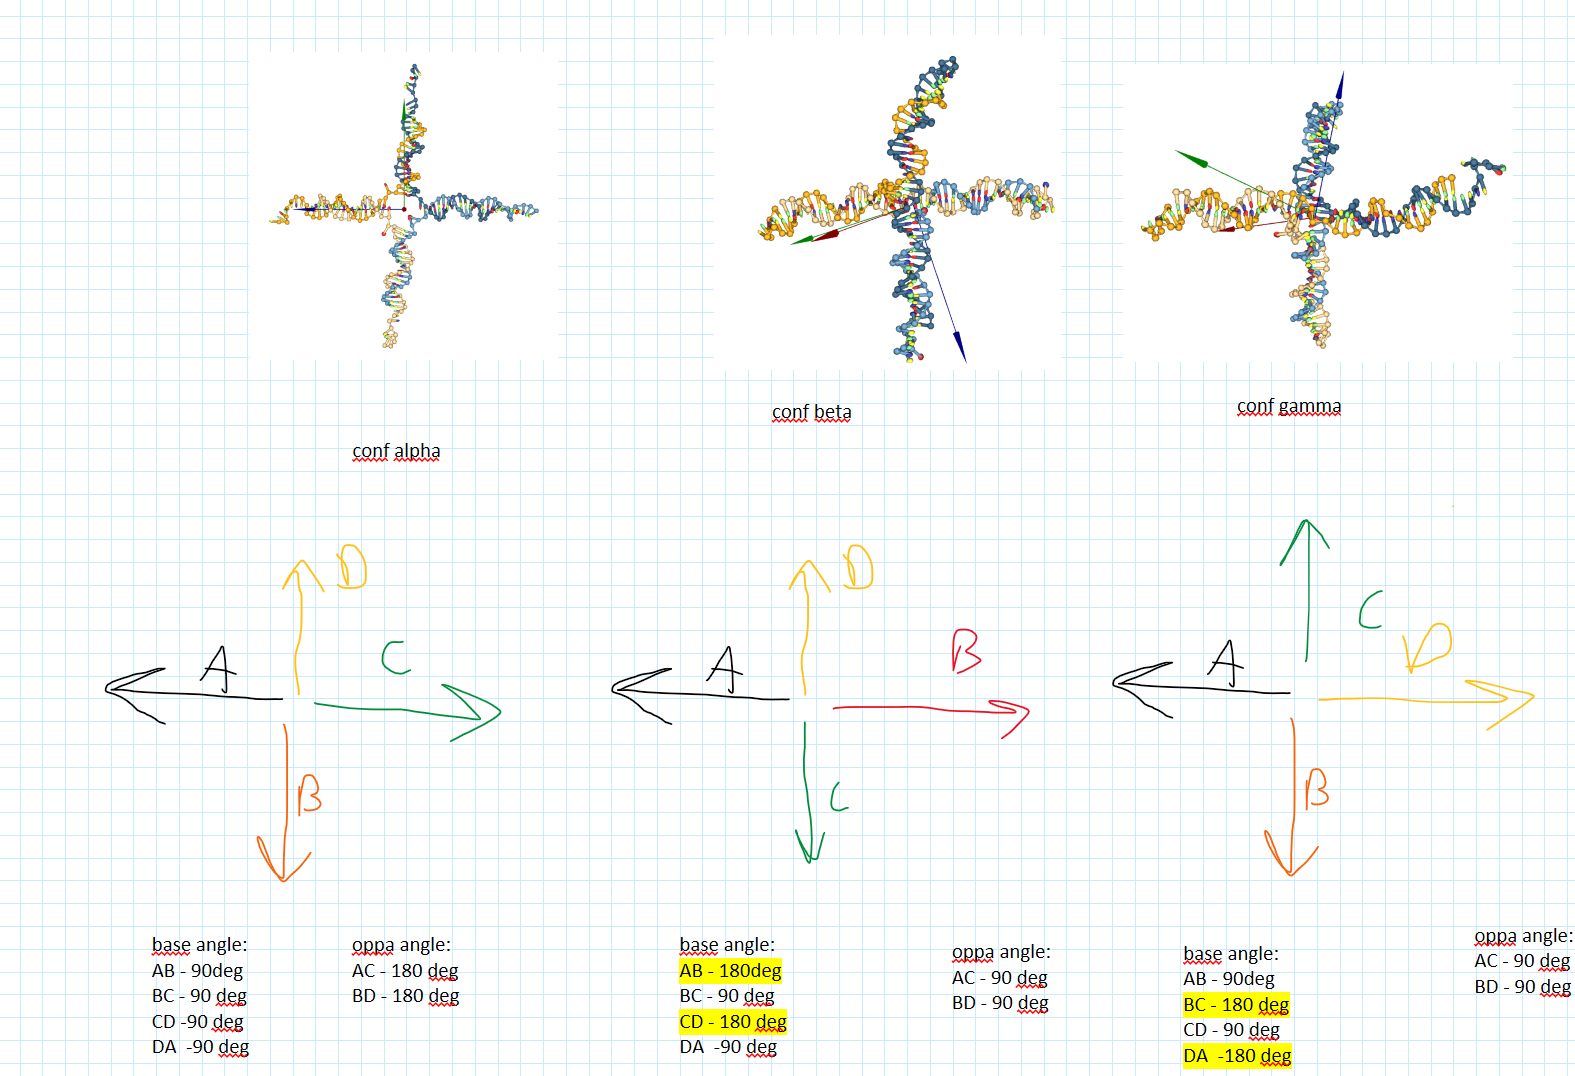

In [ ]:
# states beta and gamma dominate-> the oppa angles are always the smaller ~90deg angles
#wether arms 1 and 3 or arms 2 and 4 give the larger ~180deg angle depends on wheter system is in state gamma or beta
#wether system is in state gamma or beta can be determined by which sum of angles has on average higher values
angles_set_beta=uniform_filter1d(angles_t_arm2_b+angles_t_arm4_b,size=1000)

angles_set_gamma=uniform_filter1d(angles_t_arm1_b+angles_t_arm3_b,size=1000)

angles_from_state_smaller=[]
angles_from_state_larger=[]

for i in range(len(angles_t_arm2_b)):
    angles_from_state_smaller_e=[]
    angles_from_state_larger_e=[]
    
    #arms 2 and 4 give larger angles-> use them in list of large angles
    if angles_set_beta[i]>angles_set_gamma[i]:
        angles_from_state_larger_e.append(angles_t_arm2_b[i])
        angles_from_state_larger_e.append(angles_t_arm4_b[i])
        
        angles_from_state_smaller_e.append(angles_t_arm1_b[i])
        angles_from_state_smaller_e.append(angles_t_arm3_b[i])
    else:
        angles_from_state_larger_e.append(angles_t_arm1_b[i])
        angles_from_state_larger_e.append(angles_t_arm3_b[i])
        
        angles_from_state_smaller_e.append(angles_t_arm2_b[i])
        angles_from_state_smaller_e.append(angles_t_arm4_b[i])

    #oppa angles are always part of the smaller angles if states beta and gamma dominate
    angles_from_state_smaller_e.append(angles_oppa_t_arm1_b[i])  
    angles_from_state_smaller_e.append(angles_oppa_t_arm2_b[i])
    
    angles_from_state_smaller.append(angles_from_state_smaller_e)
    angles_from_state_larger.append(angles_from_state_larger_e)
    
    
#select from time window   
'''angles_from_state_smaller=[]
angles_from_state_larger=[]    
for i in range(len(angles_t_arm2_b)):
    angles_from_state_smaller_e=[]
    angles_from_state_larger_e=[]
    
    #arms 2 and 4 give larger angles-> use them in list of large angles
    if 12500 <i<21000:
        angles_from_state_larger_e.append(angles_t_arm2_b[i])
        angles_from_state_larger_e.append(angles_t_arm4_b[i])
        
        angles_from_state_smaller_e.append(angles_t_arm1_b[i])
        angles_from_state_smaller_e.append(angles_t_arm3_b[i])


        #oppa angles are always part of the smaller angles if states beta and gamma dominate
        angles_from_state_smaller_e.append(angles_oppa_t_arm1_b[i])  
        angles_from_state_smaller_e.append(angles_oppa_t_arm2_b[i])

        angles_from_state_smaller.append(angles_from_state_smaller_e)
        angles_from_state_larger.append(angles_from_state_larger_e)'''
    
    
    
    
    

angles_from_state_smaller=np.asarray(angles_from_state_smaller)
angles_from_state_larger=np.asarray(angles_from_state_larger)

In [ ]:
density_hist_arms=True
plt.figure(figsize=(3,3))
angles_test_hist_arm1=plt.hist(angles_from_state_larger[:].flatten(),bins=np.arange(0,360,1),density=density_hist_arms,label="beta/gamma state large")

angles_test_oppa_hist=plt.hist(angles_test_oppa_fl*180/np.pi,bins=np.arange(0,361,1),density=density_hist_arms,label="oppa",histtype="step")
plt.legend()
print("mean",np.mean(angles_from_state_larger[:].flatten()),"std",np.std(angles_from_state_larger[:].flatten() ) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Large angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()
plt.figure(figsize=(3,3))
angles_test_hist_arm1=plt.hist(angles_from_state_smaller[:].flatten(),bins=np.arange(0,360,1),density=density_hist_arms,label="beta/gamma state small")
angles_test_hist=plt.hist(angles_test.flatten()*180/np.pi,bins=np.arange(0,360,1),density=density_hist_arms,label="base",histtype="step")
plt.legend()
plt.legend()
print("mean",np.mean(angles_from_state_smaller[:].flatten()),"std",np.std(angles_from_state_smaller[:].flatten()) )
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Small angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

# Angle between bound arms from two motifs

In [ ]:
energy_2m_t, energy_2m=np.loadtxt("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/pot_energy_2m_2.dat",unpack=True)

number_bonds_ba_t,number_bonds_ba=np.loadtxt("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/HBs_fused_arm_2m_2.dat",unpack=True)
print(len(number_bonds_ba))


## need to check if arms stay bound the entire time!!!

In [ ]:
plt.figure(figsize=(3,3))
plt.errorbar(energy_2m_t,energy_2m)

plt.ylabel("Energy")
plt.xlabel("Time")
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()

In [ ]:
read_sim_coords_2m=read_positions_2(file_name="/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/test_runs_7_2/target_sims/trajectory_2m_2.dat",num_nucl=368,time_start=0,time_stop=50000,time_step=1)

2554 / 50000
2555 / 50000
2556 / 50000
2557 / 50000
2558 / 50000
2559 / 50000
2560 / 50000
2561 / 50000
2562 / 50000
2563 / 50000
2564 / 50000
2565 / 50000
2566 / 50000
2567 / 50000
2568 / 50000
2569 / 50000
2570 / 50000
2571 / 50000
2572 / 50000
2573 / 50000
2574 / 50000
2575 / 50000
2576 / 50000
2577 / 50000
2578 / 50000
2579 / 50000
2580 / 50000
2581 / 50000
2582 / 50000
2583 / 50000
2584 / 50000
2585 / 50000
2586 / 50000
2587 / 50000
2588 / 50000
2589 / 50000
2590 / 50000
2591 / 50000
2592 / 50000
2593 / 50000
2594 / 50000
2595 / 50000
2596 / 50000
2597 / 50000
2598 / 50000
2599 / 50000
2600 / 50000
2601 / 50000
2602 / 50000
2603 / 50000
2604 / 50000
2605 / 50000
2606 / 50000
2607 / 50000
2608 / 50000
2609 / 50000
2610 / 50000
2611 / 50000
2612 / 50000
2613 / 50000
2614 / 50000
2615 / 50000
2616 / 50000
2617 / 50000
2618 / 50000
2619 / 50000
2620 / 50000
2621 / 50000
2622 / 50000
2623 / 50000
2624 / 50000
2625 / 50000
2626 / 50000
2627 / 50000
2628 / 50000
2629 / 50000
2630 / 50000

4957 / 50000
4958 / 50000
4959 / 50000
4960 / 50000
4961 / 50000
4962 / 50000
4963 / 50000
4964 / 50000
4965 / 50000
4966 / 50000
4967 / 50000
4968 / 50000
4969 / 50000
4970 / 50000
4971 / 50000
4972 / 50000
4973 / 50000
4974 / 50000
4975 / 50000
4976 / 50000
4977 / 50000
4978 / 50000
4979 / 50000
4980 / 50000
4981 / 50000
4982 / 50000
4983 / 50000
4984 / 50000
4985 / 50000
4986 / 50000
4987 / 50000
4988 / 50000
4989 / 50000
4990 / 50000
4991 / 50000
4992 / 50000
4993 / 50000
4994 / 50000
4995 / 50000
4996 / 50000
4997 / 50000
4998 / 50000
4999 / 50000
5000 / 50000
5001 / 50000
5002 / 50000
5003 / 50000
5004 / 50000
5005 / 50000
5006 / 50000
5007 / 50000
5008 / 50000
5009 / 50000
5010 / 50000
5011 / 50000
5012 / 50000
5013 / 50000
5014 / 50000
5015 / 50000
5016 / 50000
5017 / 50000
5018 / 50000
5019 / 50000
5020 / 50000
5021 / 50000
5022 / 50000
5023 / 50000
5024 / 50000
5025 / 50000
5026 / 50000
5027 / 50000
5028 / 50000
5029 / 50000
5030 / 50000
5031 / 50000
5032 / 50000
5033 / 50000

7555 / 50000
7556 / 50000
7557 / 50000
7558 / 50000
7559 / 50000
7560 / 50000
7561 / 50000
7562 / 50000
7563 / 50000
7564 / 50000
7565 / 50000
7566 / 50000
7567 / 50000
7568 / 50000
7569 / 50000
7570 / 50000
7571 / 50000
7572 / 50000
7573 / 50000
7574 / 50000
7575 / 50000
7576 / 50000
7577 / 50000
7578 / 50000
7579 / 50000
7580 / 50000
7581 / 50000
7582 / 50000
7583 / 50000
7584 / 50000
7585 / 50000
7586 / 50000
7587 / 50000
7588 / 50000
7589 / 50000
7590 / 50000
7591 / 50000
7592 / 50000
7593 / 50000
7594 / 50000
7595 / 50000
7596 / 50000
7597 / 50000
7598 / 50000
7599 / 50000
7600 / 50000
7601 / 50000
7602 / 50000
7603 / 50000
7604 / 50000
7605 / 50000
7606 / 50000
7607 / 50000
7608 / 50000
7609 / 50000
7610 / 50000
7611 / 50000
7612 / 50000
7613 / 50000
7614 / 50000
7615 / 50000
7616 / 50000
7617 / 50000
7618 / 50000
7619 / 50000
7620 / 50000
7621 / 50000
7622 / 50000
7623 / 50000
7624 / 50000
7625 / 50000
7626 / 50000
7627 / 50000
7628 / 50000
7629 / 50000
7630 / 50000
7631 / 50000

10162 / 50000
10163 / 50000
10164 / 50000
10165 / 50000
10166 / 50000
10167 / 50000
10168 / 50000
10169 / 50000
10170 / 50000
10171 / 50000
10172 / 50000
10173 / 50000
10174 / 50000
10175 / 50000
10176 / 50000
10177 / 50000
10178 / 50000
10179 / 50000
10180 / 50000
10181 / 50000
10182 / 50000
10183 / 50000
10184 / 50000
10185 / 50000
10186 / 50000
10187 / 50000
10188 / 50000
10189 / 50000
10190 / 50000
10191 / 50000
10192 / 50000
10193 / 50000
10194 / 50000
10195 / 50000
10196 / 50000
10197 / 50000
10198 / 50000
10199 / 50000
10200 / 50000
10201 / 50000
10202 / 50000
10203 / 50000
10204 / 50000
10205 / 50000
10206 / 50000
10207 / 50000
10208 / 50000
10209 / 50000
10210 / 50000
10211 / 50000
10212 / 50000
10213 / 50000
10214 / 50000
10215 / 50000
10216 / 50000
10217 / 50000
10218 / 50000
10219 / 50000
10220 / 50000
10221 / 50000
10222 / 50000
10223 / 50000
10224 / 50000
10225 / 50000
10226 / 50000
10227 / 50000
10228 / 50000
10229 / 50000
10230 / 50000
10231 / 50000
10232 / 50000
10233 

12815 / 50000
12816 / 50000
12817 / 50000
12818 / 50000
12819 / 50000
12820 / 50000
12821 / 50000
12822 / 50000
12823 / 50000
12824 / 50000
12825 / 50000
12826 / 50000
12827 / 50000
12828 / 50000
12829 / 50000
12830 / 50000
12831 / 50000
12832 / 50000
12833 / 50000
12834 / 50000
12835 / 50000
12836 / 50000
12837 / 50000
12838 / 50000
12839 / 50000
12840 / 50000
12841 / 50000
12842 / 50000
12843 / 50000
12844 / 50000
12845 / 50000
12846 / 50000
12847 / 50000
12848 / 50000
12849 / 50000
12850 / 50000
12851 / 50000
12852 / 50000
12853 / 50000
12854 / 50000
12855 / 50000
12856 / 50000
12857 / 50000
12858 / 50000
12859 / 50000
12860 / 50000
12861 / 50000
12862 / 50000
12863 / 50000
12864 / 50000
12865 / 50000
12866 / 50000
12867 / 50000
12868 / 50000
12869 / 50000
12870 / 50000
12871 / 50000
12872 / 50000
12873 / 50000
12874 / 50000
12875 / 50000
12876 / 50000
12877 / 50000
12878 / 50000
12879 / 50000
12880 / 50000
12881 / 50000
12882 / 50000
12883 / 50000
12884 / 50000
12885 / 50000
12886 

15567 / 50000
15568 / 50000
15569 / 50000
15570 / 50000
15571 / 50000
15572 / 50000
15573 / 50000
15574 / 50000
15575 / 50000
15576 / 50000
15577 / 50000
15578 / 50000
15579 / 50000
15580 / 50000
15581 / 50000
15582 / 50000
15583 / 50000
15584 / 50000
15585 / 50000
15586 / 50000
15587 / 50000
15588 / 50000
15589 / 50000
15590 / 50000
15591 / 50000
15592 / 50000
15593 / 50000
15594 / 50000
15595 / 50000
15596 / 50000
15597 / 50000
15598 / 50000
15599 / 50000
15600 / 50000
15601 / 50000
15602 / 50000
15603 / 50000
15604 / 50000
15605 / 50000
15606 / 50000
15607 / 50000
15608 / 50000
15609 / 50000
15610 / 50000
15611 / 50000
15612 / 50000
15613 / 50000
15614 / 50000
15615 / 50000
15616 / 50000
15617 / 50000
15618 / 50000
15619 / 50000
15620 / 50000
15621 / 50000
15622 / 50000
15623 / 50000
15624 / 50000
15625 / 50000
15626 / 50000
15627 / 50000
15628 / 50000
15629 / 50000
15630 / 50000
15631 / 50000
15632 / 50000
15633 / 50000
15634 / 50000
15635 / 50000
15636 / 50000
15637 / 50000
15638 

18039 / 50000
18040 / 50000
18041 / 50000
18042 / 50000
18043 / 50000
18044 / 50000
18045 / 50000
18046 / 50000
18047 / 50000
18048 / 50000
18049 / 50000
18050 / 50000
18051 / 50000
18052 / 50000
18053 / 50000
18054 / 50000
18055 / 50000
18056 / 50000
18057 / 50000
18058 / 50000
18059 / 50000
18060 / 50000
18061 / 50000
18062 / 50000
18063 / 50000
18064 / 50000
18065 / 50000
18066 / 50000
18067 / 50000
18068 / 50000
18069 / 50000
18070 / 50000
18071 / 50000
18072 / 50000
18073 / 50000
18074 / 50000
18075 / 50000
18076 / 50000
18077 / 50000
18078 / 50000
18079 / 50000
18080 / 50000
18081 / 50000
18082 / 50000
18083 / 50000
18084 / 50000
18085 / 50000
18086 / 50000
18087 / 50000
18088 / 50000
18089 / 50000
18090 / 50000
18091 / 50000
18092 / 50000
18093 / 50000
18094 / 50000
18095 / 50000
18096 / 50000
18097 / 50000
18098 / 50000
18099 / 50000
18100 / 50000
18101 / 50000
18102 / 50000
18103 / 50000
18104 / 50000
18105 / 50000
18106 / 50000
18107 / 50000
18108 / 50000
18109 / 50000
18110 

20478 / 50000
20479 / 50000
20480 / 50000
20481 / 50000
20482 / 50000
20483 / 50000
20484 / 50000
20485 / 50000
20486 / 50000
20487 / 50000
20488 / 50000
20489 / 50000
20490 / 50000
20491 / 50000
20492 / 50000
20493 / 50000
20494 / 50000
20495 / 50000
20496 / 50000
20497 / 50000
20498 / 50000
20499 / 50000
20500 / 50000
20501 / 50000
20502 / 50000
20503 / 50000
20504 / 50000
20505 / 50000
20506 / 50000
20507 / 50000
20508 / 50000
20509 / 50000
20510 / 50000
20511 / 50000
20512 / 50000
20513 / 50000
20514 / 50000
20515 / 50000
20516 / 50000
20517 / 50000
20518 / 50000
20519 / 50000
20520 / 50000
20521 / 50000
20522 / 50000
20523 / 50000
20524 / 50000
20525 / 50000
20526 / 50000
20527 / 50000
20528 / 50000
20529 / 50000
20530 / 50000
20531 / 50000
20532 / 50000
20533 / 50000
20534 / 50000
20535 / 50000
20536 / 50000
20537 / 50000
20538 / 50000
20539 / 50000
20540 / 50000
20541 / 50000
20542 / 50000
20543 / 50000
20544 / 50000
20545 / 50000
20546 / 50000
20547 / 50000
20548 / 50000
20549 

22859 / 50000
22860 / 50000
22861 / 50000
22862 / 50000
22863 / 50000
22864 / 50000
22865 / 50000
22866 / 50000
22867 / 50000
22868 / 50000
22869 / 50000
22870 / 50000
22871 / 50000
22872 / 50000
22873 / 50000
22874 / 50000
22875 / 50000
22876 / 50000
22877 / 50000
22878 / 50000
22879 / 50000
22880 / 50000
22881 / 50000
22882 / 50000
22883 / 50000
22884 / 50000
22885 / 50000
22886 / 50000
22887 / 50000
22888 / 50000
22889 / 50000
22890 / 50000
22891 / 50000
22892 / 50000
22893 / 50000
22894 / 50000
22895 / 50000
22896 / 50000
22897 / 50000
22898 / 50000
22899 / 50000
22900 / 50000
22901 / 50000
22902 / 50000
22903 / 50000
22904 / 50000
22905 / 50000
22906 / 50000
22907 / 50000
22908 / 50000
22909 / 50000
22910 / 50000
22911 / 50000
22912 / 50000
22913 / 50000
22914 / 50000
22915 / 50000
22916 / 50000
22917 / 50000
22918 / 50000
22919 / 50000
22920 / 50000
22921 / 50000
22922 / 50000
22923 / 50000
22924 / 50000
22925 / 50000
22926 / 50000
22927 / 50000
22928 / 50000
22929 / 50000
22930 

25759 / 50000
25760 / 50000
25761 / 50000
25762 / 50000
25763 / 50000
25764 / 50000
25765 / 50000
25766 / 50000
25767 / 50000
25768 / 50000
25769 / 50000
25770 / 50000
25771 / 50000
25772 / 50000
25773 / 50000
25774 / 50000
25775 / 50000
25776 / 50000
25777 / 50000
25778 / 50000
25779 / 50000
25780 / 50000
25781 / 50000
25782 / 50000
25783 / 50000
25784 / 50000
25785 / 50000
25786 / 50000
25787 / 50000
25788 / 50000
25789 / 50000
25790 / 50000
25791 / 50000
25792 / 50000
25793 / 50000
25794 / 50000
25795 / 50000
25796 / 50000
25797 / 50000
25798 / 50000
25799 / 50000
25800 / 50000
25801 / 50000
25802 / 50000
25803 / 50000
25804 / 50000
25805 / 50000
25806 / 50000
25807 / 50000
25808 / 50000
25809 / 50000
25810 / 50000
25811 / 50000
25812 / 50000
25813 / 50000
25814 / 50000
25815 / 50000
25816 / 50000
25817 / 50000
25818 / 50000
25819 / 50000
25820 / 50000
25821 / 50000
25822 / 50000
25823 / 50000
25824 / 50000
25825 / 50000
25826 / 50000
25827 / 50000
25828 / 50000
25829 / 50000
25830 

28039 / 50000
28040 / 50000
28041 / 50000
28042 / 50000
28043 / 50000
28044 / 50000
28045 / 50000
28046 / 50000
28047 / 50000
28048 / 50000
28049 / 50000
28050 / 50000
28051 / 50000
28052 / 50000
28053 / 50000
28054 / 50000
28055 / 50000
28056 / 50000
28057 / 50000
28058 / 50000
28059 / 50000
28060 / 50000
28061 / 50000
28062 / 50000
28063 / 50000
28064 / 50000
28065 / 50000
28066 / 50000
28067 / 50000
28068 / 50000
28069 / 50000
28070 / 50000
28071 / 50000
28072 / 50000
28073 / 50000
28074 / 50000
28075 / 50000
28076 / 50000
28077 / 50000
28078 / 50000
28079 / 50000
28080 / 50000
28081 / 50000
28082 / 50000
28083 / 50000
28084 / 50000
28085 / 50000
28086 / 50000
28087 / 50000
28088 / 50000
28089 / 50000
28090 / 50000
28091 / 50000
28092 / 50000
28093 / 50000
28094 / 50000
28095 / 50000
28096 / 50000
28097 / 50000
28098 / 50000
28099 / 50000
28100 / 50000
28101 / 50000
28102 / 50000
28103 / 50000
28104 / 50000
28105 / 50000
28106 / 50000
28107 / 50000
28108 / 50000
28109 / 50000
28110 

30248 / 50000
30249 / 50000
30250 / 50000
30251 / 50000
30252 / 50000
30253 / 50000
30254 / 50000
30255 / 50000
30256 / 50000
30257 / 50000
30258 / 50000
30259 / 50000
30260 / 50000
30261 / 50000
30262 / 50000
30263 / 50000
30264 / 50000
30265 / 50000
30266 / 50000
30267 / 50000
30268 / 50000
30269 / 50000
30270 / 50000
30271 / 50000
30272 / 50000
30273 / 50000
30274 / 50000
30275 / 50000
30276 / 50000
30277 / 50000
30278 / 50000
30279 / 50000
30280 / 50000
30281 / 50000
30282 / 50000
30283 / 50000
30284 / 50000
30285 / 50000
30286 / 50000
30287 / 50000
30288 / 50000
30289 / 50000
30290 / 50000
30291 / 50000
30292 / 50000
30293 / 50000
30294 / 50000
30295 / 50000
30296 / 50000
30297 / 50000
30298 / 50000
30299 / 50000
30300 / 50000
30301 / 50000
30302 / 50000
30303 / 50000
30304 / 50000
30305 / 50000
30306 / 50000
30307 / 50000
30308 / 50000
30309 / 50000
30310 / 50000
30311 / 50000
30312 / 50000
30313 / 50000
30314 / 50000
30315 / 50000
30316 / 50000
30317 / 50000
30318 / 50000
30319 

32664 / 50000
32665 / 50000
32666 / 50000
32667 / 50000
32668 / 50000
32669 / 50000
32670 / 50000
32671 / 50000
32672 / 50000
32673 / 50000
32674 / 50000
32675 / 50000
32676 / 50000
32677 / 50000
32678 / 50000
32679 / 50000
32680 / 50000
32681 / 50000
32682 / 50000
32683 / 50000
32684 / 50000
32685 / 50000
32686 / 50000
32687 / 50000
32688 / 50000
32689 / 50000
32690 / 50000
32691 / 50000
32692 / 50000
32693 / 50000
32694 / 50000
32695 / 50000
32696 / 50000
32697 / 50000
32698 / 50000
32699 / 50000
32700 / 50000
32701 / 50000
32702 / 50000
32703 / 50000
32704 / 50000
32705 / 50000
32706 / 50000
32707 / 50000
32708 / 50000
32709 / 50000
32710 / 50000
32711 / 50000
32712 / 50000
32713 / 50000
32714 / 50000
32715 / 50000
32716 / 50000
32717 / 50000
32718 / 50000
32719 / 50000
32720 / 50000
32721 / 50000
32722 / 50000
32723 / 50000
32724 / 50000
32725 / 50000
32726 / 50000
32727 / 50000
32728 / 50000
32729 / 50000
32730 / 50000
32731 / 50000
32732 / 50000
32733 / 50000
32734 / 50000
32735 

35061 / 50000
35062 / 50000
35063 / 50000
35064 / 50000
35065 / 50000
35066 / 50000
35067 / 50000
35068 / 50000
35069 / 50000
35070 / 50000
35071 / 50000
35072 / 50000
35073 / 50000
35074 / 50000
35075 / 50000
35076 / 50000
35077 / 50000
35078 / 50000
35079 / 50000
35080 / 50000
35081 / 50000
35082 / 50000
35083 / 50000
35084 / 50000
35085 / 50000
35086 / 50000
35087 / 50000
35088 / 50000
35089 / 50000
35090 / 50000
35091 / 50000
35092 / 50000
35093 / 50000
35094 / 50000
35095 / 50000
35096 / 50000
35097 / 50000
35098 / 50000
35099 / 50000
35100 / 50000
35101 / 50000
35102 / 50000
35103 / 50000
35104 / 50000
35105 / 50000
35106 / 50000
35107 / 50000
35108 / 50000
35109 / 50000
35110 / 50000
35111 / 50000
35112 / 50000
35113 / 50000
35114 / 50000
35115 / 50000
35116 / 50000
35117 / 50000
35118 / 50000
35119 / 50000
35120 / 50000
35121 / 50000
35122 / 50000
35123 / 50000
35124 / 50000
35125 / 50000
35126 / 50000
35127 / 50000
35128 / 50000
35129 / 50000
35130 / 50000
35131 / 50000
35132 

37385 / 50000
37386 / 50000
37387 / 50000
37388 / 50000
37389 / 50000
37390 / 50000
37391 / 50000
37392 / 50000
37393 / 50000
37394 / 50000
37395 / 50000
37396 / 50000
37397 / 50000
37398 / 50000
37399 / 50000
37400 / 50000
37401 / 50000
37402 / 50000
37403 / 50000
37404 / 50000
37405 / 50000
37406 / 50000
37407 / 50000
37408 / 50000
37409 / 50000
37410 / 50000
37411 / 50000
37412 / 50000
37413 / 50000
37414 / 50000
37415 / 50000
37416 / 50000
37417 / 50000
37418 / 50000
37419 / 50000
37420 / 50000
37421 / 50000
37422 / 50000
37423 / 50000
37424 / 50000
37425 / 50000
37426 / 50000
37427 / 50000
37428 / 50000
37429 / 50000
37430 / 50000
37431 / 50000
37432 / 50000
37433 / 50000
37434 / 50000
37435 / 50000
37436 / 50000
37437 / 50000
37438 / 50000
37439 / 50000
37440 / 50000
37441 / 50000
37442 / 50000
37443 / 50000
37444 / 50000
37445 / 50000
37446 / 50000
37447 / 50000
37448 / 50000
37449 / 50000
37450 / 50000
37451 / 50000
37452 / 50000
37453 / 50000
37454 / 50000
37455 / 50000
37456 

40918 / 50000
40919 / 50000
40920 / 50000
40921 / 50000
40922 / 50000
40923 / 50000
40924 / 50000
40925 / 50000
40926 / 50000
40927 / 50000
40928 / 50000
40929 / 50000
40930 / 50000
40931 / 50000
40932 / 50000
40933 / 50000
40934 / 50000
40935 / 50000
40936 / 50000
40937 / 50000
40938 / 50000
40939 / 50000
40940 / 50000
40941 / 50000
40942 / 50000
40943 / 50000
40944 / 50000
40945 / 50000
40946 / 50000
40947 / 50000
40948 / 50000
40949 / 50000
40950 / 50000
40951 / 50000
40952 / 50000
40953 / 50000
40954 / 50000
40955 / 50000
40956 / 50000
40957 / 50000
40958 / 50000
40959 / 50000
40960 / 50000
40961 / 50000
40962 / 50000
40963 / 50000
40964 / 50000
40965 / 50000
40966 / 50000
40967 / 50000
40968 / 50000
40969 / 50000
40970 / 50000
40971 / 50000
40972 / 50000
40973 / 50000
40974 / 50000
40975 / 50000
40976 / 50000
40977 / 50000
40978 / 50000
40979 / 50000
40980 / 50000
40981 / 50000
40982 / 50000
40983 / 50000
40984 / 50000
40985 / 50000
40986 / 50000
40987 / 50000
40988 / 50000
40989 

43382 / 50000
43383 / 50000
43384 / 50000
43385 / 50000
43386 / 50000
43387 / 50000
43388 / 50000
43389 / 50000
43390 / 50000
43391 / 50000
43392 / 50000
43393 / 50000
43394 / 50000
43395 / 50000
43396 / 50000
43397 / 50000
43398 / 50000
43399 / 50000
43400 / 50000
43401 / 50000
43402 / 50000
43403 / 50000
43404 / 50000
43405 / 50000
43406 / 50000
43407 / 50000
43408 / 50000
43409 / 50000
43410 / 50000
43411 / 50000
43412 / 50000
43413 / 50000
43414 / 50000
43415 / 50000
43416 / 50000
43417 / 50000
43418 / 50000
43419 / 50000
43420 / 50000
43421 / 50000
43422 / 50000
43423 / 50000
43424 / 50000
43425 / 50000
43426 / 50000
43427 / 50000
43428 / 50000
43429 / 50000
43430 / 50000
43431 / 50000
43432 / 50000
43433 / 50000
43434 / 50000
43435 / 50000
43436 / 50000
43437 / 50000
43438 / 50000
43439 / 50000
43440 / 50000
43441 / 50000
43442 / 50000
43443 / 50000
43444 / 50000
43445 / 50000
43446 / 50000
43447 / 50000
43448 / 50000
43449 / 50000
43450 / 50000
43451 / 50000
43452 / 50000
43453 

45056 / 50000
45057 / 50000
45058 / 50000
45059 / 50000
45060 / 50000
45061 / 50000
45062 / 50000
45063 / 50000
45064 / 50000
45065 / 50000
45066 / 50000
45067 / 50000
45068 / 50000
45069 / 50000
45070 / 50000
45071 / 50000
45072 / 50000
45073 / 50000
45074 / 50000
45075 / 50000
45076 / 50000
45077 / 50000
45078 / 50000
45079 / 50000
45080 / 50000
45081 / 50000
45082 / 50000
45083 / 50000
45084 / 50000
45085 / 50000
45086 / 50000
45087 / 50000
45088 / 50000
45089 / 50000
45090 / 50000
45091 / 50000
45092 / 50000
45093 / 50000
45094 / 50000
45095 / 50000
45096 / 50000
45097 / 50000
45098 / 50000
45099 / 50000
45100 / 50000
45101 / 50000
45102 / 50000
45103 / 50000
45104 / 50000
45105 / 50000
45106 / 50000
45107 / 50000
45108 / 50000
45109 / 50000
45110 / 50000
45111 / 50000
45112 / 50000
45113 / 50000
45114 / 50000
45115 / 50000
45116 / 50000
45117 / 50000
45118 / 50000
45119 / 50000
45120 / 50000
45121 / 50000
45122 / 50000
45123 / 50000
45124 / 50000
45125 / 50000
45126 / 50000
45127 

47097 / 50000
47098 / 50000
47099 / 50000
47100 / 50000
47101 / 50000
47102 / 50000
47103 / 50000
47104 / 50000
47105 / 50000
47106 / 50000
47107 / 50000
47108 / 50000
47109 / 50000
47110 / 50000
47111 / 50000
47112 / 50000
47113 / 50000
47114 / 50000
47115 / 50000
47116 / 50000
47117 / 50000
47118 / 50000
47119 / 50000
47120 / 50000
47121 / 50000
47122 / 50000
47123 / 50000
47124 / 50000
47125 / 50000
47126 / 50000
47127 / 50000
47128 / 50000
47129 / 50000
47130 / 50000
47131 / 50000
47132 / 50000
47133 / 50000
47134 / 50000
47135 / 50000
47136 / 50000
47137 / 50000
47138 / 50000
47139 / 50000
47140 / 50000
47141 / 50000
47142 / 50000
47143 / 50000
47144 / 50000
47145 / 50000
47146 / 50000
47147 / 50000
47148 / 50000
47149 / 50000
47150 / 50000
47151 / 50000
47152 / 50000
47153 / 50000
47154 / 50000
47155 / 50000
47156 / 50000
47157 / 50000
47158 / 50000
47159 / 50000
47160 / 50000
47161 / 50000
47162 / 50000
47163 / 50000
47164 / 50000
47165 / 50000
47166 / 50000
47167 / 50000
47168 

49456 / 50000
49457 / 50000
49458 / 50000
49459 / 50000
49460 / 50000
49461 / 50000
49462 / 50000
49463 / 50000
49464 / 50000
49465 / 50000
49466 / 50000
49467 / 50000
49468 / 50000
49469 / 50000
49470 / 50000
49471 / 50000
49472 / 50000
49473 / 50000
49474 / 50000
49475 / 50000
49476 / 50000
49477 / 50000
49478 / 50000
49479 / 50000
49480 / 50000
49481 / 50000
49482 / 50000
49483 / 50000
49484 / 50000
49485 / 50000
49486 / 50000
49487 / 50000
49488 / 50000
49489 / 50000
49490 / 50000
49491 / 50000
49492 / 50000
49493 / 50000
49494 / 50000
49495 / 50000
49496 / 50000
49497 / 50000
49498 / 50000
49499 / 50000
49500 / 50000
49501 / 50000
49502 / 50000
49503 / 50000
49504 / 50000
49505 / 50000
49506 / 50000
49507 / 50000
49508 / 50000
49509 / 50000
49510 / 50000
49511 / 50000
49512 / 50000
49513 / 50000
49514 / 50000
49515 / 50000
49516 / 50000
49517 / 50000
49518 / 50000
49519 / 50000
49520 / 50000
49521 / 50000
49522 / 50000
49523 / 50000
49524 / 50000
49525 / 50000
49526 / 50000
49527 

In [ ]:
# [ [[indices tip 1 arm 1], [indices base 1 arm 1]] ,[[indices tip 2 arm 1], [indices base 2 arm 1]] 

#option 1


arm_vector_indices_1=[  [  [*np.arange(28,38),*np.arange(138,148)], [*np.arange(268,276),*np.arange(38,46)] ,[*np.arange(268,276),*np.arange(38,46)] ,[*np.arange(184,194),*np.arange(258,268)] ]
                  ]

angles_test_ba_b=conf_angles_3(pos=read_sim_coords_2m[:], arm_vector_indices=arm_vector_indices_1)

angles_test_ba=angles_test_ba_b[300:]

2298 / 50000
2299 / 50000
2300 / 50000
2301 / 50000
2302 / 50000
2303 / 50000
2304 / 50000
2305 / 50000
2306 / 50000
2307 / 50000
2308 / 50000
2309 / 50000
2310 / 50000
2311 / 50000
2312 / 50000
2313 / 50000
2314 / 50000
2315 / 50000
2316 / 50000
2317 / 50000
2318 / 50000
2319 / 50000
2320 / 50000
2321 / 50000
2322 / 50000
2323 / 50000
2324 / 50000
2325 / 50000
2326 / 50000
2327 / 50000
2328 / 50000
2329 / 50000
2330 / 50000
2331 / 50000
2332 / 50000
2333 / 50000
2334 / 50000
2335 / 50000
2336 / 50000
2337 / 50000
2338 / 50000
2339 / 50000
2340 / 50000
2341 / 50000
2342 / 50000
2343 / 50000
2344 / 50000
2345 / 50000
2346 / 50000
2347 / 50000
2348 / 50000
2349 / 50000
2350 / 50000
2351 / 50000
2352 / 50000
2353 / 50000
2354 / 50000
2355 / 50000
2356 / 50000
2357 / 50000
2358 / 50000
2359 / 50000
2360 / 50000
2361 / 50000
2362 / 50000
2363 / 50000
2364 / 50000
2365 / 50000
2366 / 50000
2367 / 50000
2368 / 50000
2369 / 50000
2370 / 50000
2371 / 50000
2372 / 50000
2373 / 50000
2374 / 50000

4716 / 50000
4717 / 50000
4718 / 50000
4719 / 50000
4720 / 50000
4721 / 50000
4722 / 50000
4723 / 50000
4724 / 50000
4725 / 50000
4726 / 50000
4727 / 50000
4728 / 50000
4729 / 50000
4730 / 50000
4731 / 50000
4732 / 50000
4733 / 50000
4734 / 50000
4735 / 50000
4736 / 50000
4737 / 50000
4738 / 50000
4739 / 50000
4740 / 50000
4741 / 50000
4742 / 50000
4743 / 50000
4744 / 50000
4745 / 50000
4746 / 50000
4747 / 50000
4748 / 50000
4749 / 50000
4750 / 50000
4751 / 50000
4752 / 50000
4753 / 50000
4754 / 50000
4755 / 50000
4756 / 50000
4757 / 50000
4758 / 50000
4759 / 50000
4760 / 50000
4761 / 50000
4762 / 50000
4763 / 50000
4764 / 50000
4765 / 50000
4766 / 50000
4767 / 50000
4768 / 50000
4769 / 50000
4770 / 50000
4771 / 50000
4772 / 50000
4773 / 50000
4774 / 50000
4775 / 50000
4776 / 50000
4777 / 50000
4778 / 50000
4779 / 50000
4780 / 50000
4781 / 50000
4782 / 50000
4783 / 50000
4784 / 50000
4785 / 50000
4786 / 50000
4787 / 50000
4788 / 50000
4789 / 50000
4790 / 50000
4791 / 50000
4792 / 50000

7255 / 50000
7256 / 50000
7257 / 50000
7258 / 50000
7259 / 50000
7260 / 50000
7261 / 50000
7262 / 50000
7263 / 50000
7264 / 50000
7265 / 50000
7266 / 50000
7267 / 50000
7268 / 50000
7269 / 50000
7270 / 50000
7271 / 50000
7272 / 50000
7273 / 50000
7274 / 50000
7275 / 50000
7276 / 50000
7277 / 50000
7278 / 50000
7279 / 50000
7280 / 50000
7281 / 50000
7282 / 50000
7283 / 50000
7284 / 50000
7285 / 50000
7286 / 50000
7287 / 50000
7288 / 50000
7289 / 50000
7290 / 50000
7291 / 50000
7292 / 50000
7293 / 50000
7294 / 50000
7295 / 50000
7296 / 50000
7297 / 50000
7298 / 50000
7299 / 50000
7300 / 50000
7301 / 50000
7302 / 50000
7303 / 50000
7304 / 50000
7305 / 50000
7306 / 50000
7307 / 50000
7308 / 50000
7309 / 50000
7310 / 50000
7311 / 50000
7312 / 50000
7313 / 50000
7314 / 50000
7315 / 50000
7316 / 50000
7317 / 50000
7318 / 50000
7319 / 50000
7320 / 50000
7321 / 50000
7322 / 50000
7323 / 50000
7324 / 50000
7325 / 50000
7326 / 50000
7327 / 50000
7328 / 50000
7329 / 50000
7330 / 50000
7331 / 50000

9677 / 50000
9678 / 50000
9679 / 50000
9680 / 50000
9681 / 50000
9682 / 50000
9683 / 50000
9684 / 50000
9685 / 50000
9686 / 50000
9687 / 50000
9688 / 50000
9689 / 50000
9690 / 50000
9691 / 50000
9692 / 50000
9693 / 50000
9694 / 50000
9695 / 50000
9696 / 50000
9697 / 50000
9698 / 50000
9699 / 50000
9700 / 50000
9701 / 50000
9702 / 50000
9703 / 50000
9704 / 50000
9705 / 50000
9706 / 50000
9707 / 50000
9708 / 50000
9709 / 50000
9710 / 50000
9711 / 50000
9712 / 50000
9713 / 50000
9714 / 50000
9715 / 50000
9716 / 50000
9717 / 50000
9718 / 50000
9719 / 50000
9720 / 50000
9721 / 50000
9722 / 50000
9723 / 50000
9724 / 50000
9725 / 50000
9726 / 50000
9727 / 50000
9728 / 50000
9729 / 50000
9730 / 50000
9731 / 50000
9732 / 50000
9733 / 50000
9734 / 50000
9735 / 50000
9736 / 50000
9737 / 50000
9738 / 50000
9739 / 50000
9740 / 50000
9741 / 50000
9742 / 50000
9743 / 50000
9744 / 50000
9745 / 50000
9746 / 50000
9747 / 50000
9748 / 50000
9749 / 50000
9750 / 50000
9751 / 50000
9752 / 50000
9753 / 50000

11635 / 50000
11636 / 50000
11637 / 50000
11638 / 50000
11639 / 50000
11640 / 50000
11641 / 50000
11642 / 50000
11643 / 50000
11644 / 50000
11645 / 50000
11646 / 50000
11647 / 50000
11648 / 50000
11649 / 50000
11650 / 50000
11651 / 50000
11652 / 50000
11653 / 50000
11654 / 50000
11655 / 50000
11656 / 50000
11657 / 50000
11658 / 50000
11659 / 50000
11660 / 50000
11661 / 50000
11662 / 50000
11663 / 50000
11664 / 50000
11665 / 50000
11666 / 50000
11667 / 50000
11668 / 50000
11669 / 50000
11670 / 50000
11671 / 50000
11672 / 50000
11673 / 50000
11674 / 50000
11675 / 50000
11676 / 50000
11677 / 50000
11678 / 50000
11679 / 50000
11680 / 50000
11681 / 50000
11682 / 50000
11683 / 50000
11684 / 50000
11685 / 50000
11686 / 50000
11687 / 50000
11688 / 50000
11689 / 50000
11690 / 50000
11691 / 50000
11692 / 50000
11693 / 50000
11694 / 50000
11695 / 50000
11696 / 50000
11697 / 50000
11698 / 50000
11699 / 50000
11700 / 50000
11701 / 50000
11702 / 50000
11703 / 50000
11704 / 50000
11705 / 50000
11706 

14281 / 50000
14282 / 50000
14283 / 50000
14284 / 50000
14285 / 50000
14286 / 50000
14287 / 50000
14288 / 50000
14289 / 50000
14290 / 50000
14291 / 50000
14292 / 50000
14293 / 50000
14294 / 50000
14295 / 50000
14296 / 50000
14297 / 50000
14298 / 50000
14299 / 50000
14300 / 50000
14301 / 50000
14302 / 50000
14303 / 50000
14304 / 50000
14305 / 50000
14306 / 50000
14307 / 50000
14308 / 50000
14309 / 50000
14310 / 50000
14311 / 50000
14312 / 50000
14313 / 50000
14314 / 50000
14315 / 50000
14316 / 50000
14317 / 50000
14318 / 50000
14319 / 50000
14320 / 50000
14321 / 50000
14322 / 50000
14323 / 50000
14324 / 50000
14325 / 50000
14326 / 50000
14327 / 50000
14328 / 50000
14329 / 50000
14330 / 50000
14331 / 50000
14332 / 50000
14333 / 50000
14334 / 50000
14335 / 50000
14336 / 50000
14337 / 50000
14338 / 50000
14339 / 50000
14340 / 50000
14341 / 50000
14342 / 50000
14343 / 50000
14344 / 50000
14345 / 50000
14346 / 50000
14347 / 50000
14348 / 50000
14349 / 50000
14350 / 50000
14351 / 50000
14352 

16711 / 50000
16712 / 50000
16713 / 50000
16714 / 50000
16715 / 50000
16716 / 50000
16717 / 50000
16718 / 50000
16719 / 50000
16720 / 50000
16721 / 50000
16722 / 50000
16723 / 50000
16724 / 50000
16725 / 50000
16726 / 50000
16727 / 50000
16728 / 50000
16729 / 50000
16730 / 50000
16731 / 50000
16732 / 50000
16733 / 50000
16734 / 50000
16735 / 50000
16736 / 50000
16737 / 50000
16738 / 50000
16739 / 50000
16740 / 50000
16741 / 50000
16742 / 50000
16743 / 50000
16744 / 50000
16745 / 50000
16746 / 50000
16747 / 50000
16748 / 50000
16749 / 50000
16750 / 50000
16751 / 50000
16752 / 50000
16753 / 50000
16754 / 50000
16755 / 50000
16756 / 50000
16757 / 50000
16758 / 50000
16759 / 50000
16760 / 50000
16761 / 50000
16762 / 50000
16763 / 50000
16764 / 50000
16765 / 50000
16766 / 50000
16767 / 50000
16768 / 50000
16769 / 50000
16770 / 50000
16771 / 50000
16772 / 50000
16773 / 50000
16774 / 50000
16775 / 50000
16776 / 50000
16777 / 50000
16778 / 50000
16779 / 50000
16780 / 50000
16781 / 50000
16782 

19224 / 50000
19225 / 50000
19226 / 50000
19227 / 50000
19228 / 50000
19229 / 50000
19230 / 50000
19231 / 50000
19232 / 50000
19233 / 50000
19234 / 50000
19235 / 50000
19236 / 50000
19237 / 50000
19238 / 50000
19239 / 50000
19240 / 50000
19241 / 50000
19242 / 50000
19243 / 50000
19244 / 50000
19245 / 50000
19246 / 50000
19247 / 50000
19248 / 50000
19249 / 50000
19250 / 50000
19251 / 50000
19252 / 50000
19253 / 50000
19254 / 50000
19255 / 50000
19256 / 50000
19257 / 50000
19258 / 50000
19259 / 50000
19260 / 50000
19261 / 50000
19262 / 50000
19263 / 50000
19264 / 50000
19265 / 50000
19266 / 50000
19267 / 50000
19268 / 50000
19269 / 50000
19270 / 50000
19271 / 50000
19272 / 50000
19273 / 50000
19274 / 50000
19275 / 50000
19276 / 50000
19277 / 50000
19278 / 50000
19279 / 50000
19280 / 50000
19281 / 50000
19282 / 50000
19283 / 50000
19284 / 50000
19285 / 50000
19286 / 50000
19287 / 50000
19288 / 50000
19289 / 50000
19290 / 50000
19291 / 50000
19292 / 50000
19293 / 50000
19294 / 50000
19295 

21702 / 50000
21703 / 50000
21704 / 50000
21705 / 50000
21706 / 50000
21707 / 50000
21708 / 50000
21709 / 50000
21710 / 50000
21711 / 50000
21712 / 50000
21713 / 50000
21714 / 50000
21715 / 50000
21716 / 50000
21717 / 50000
21718 / 50000
21719 / 50000
21720 / 50000
21721 / 50000
21722 / 50000
21723 / 50000
21724 / 50000
21725 / 50000
21726 / 50000
21727 / 50000
21728 / 50000
21729 / 50000
21730 / 50000
21731 / 50000
21732 / 50000
21733 / 50000
21734 / 50000
21735 / 50000
21736 / 50000
21737 / 50000
21738 / 50000
21739 / 50000
21740 / 50000
21741 / 50000
21742 / 50000
21743 / 50000
21744 / 50000
21745 / 50000
21746 / 50000
21747 / 50000
21748 / 50000
21749 / 50000
21750 / 50000
21751 / 50000
21752 / 50000
21753 / 50000
21754 / 50000
21755 / 50000
21756 / 50000
21757 / 50000
21758 / 50000
21759 / 50000
21760 / 50000
21761 / 50000
21762 / 50000
21763 / 50000
21764 / 50000
21765 / 50000
21766 / 50000
21767 / 50000
21768 / 50000
21769 / 50000
21770 / 50000
21771 / 50000
21772 / 50000
21773 

24056 / 50000
24057 / 50000
24058 / 50000
24059 / 50000
24060 / 50000
24061 / 50000
24062 / 50000
24063 / 50000
24064 / 50000
24065 / 50000
24066 / 50000
24067 / 50000
24068 / 50000
24069 / 50000
24070 / 50000
24071 / 50000
24072 / 50000
24073 / 50000
24074 / 50000
24075 / 50000
24076 / 50000
24077 / 50000
24078 / 50000
24079 / 50000
24080 / 50000
24081 / 50000
24082 / 50000
24083 / 50000
24084 / 50000
24085 / 50000
24086 / 50000
24087 / 50000
24088 / 50000
24089 / 50000
24090 / 50000
24091 / 50000
24092 / 50000
24093 / 50000
24094 / 50000
24095 / 50000
24096 / 50000
24097 / 50000
24098 / 50000
24099 / 50000
24100 / 50000
24101 / 50000
24102 / 50000
24103 / 50000
24104 / 50000
24105 / 50000
24106 / 50000
24107 / 50000
24108 / 50000
24109 / 50000
24110 / 50000
24111 / 50000
24112 / 50000
24113 / 50000
24114 / 50000
24115 / 50000
24116 / 50000
24117 / 50000
24118 / 50000
24119 / 50000
24120 / 50000
24121 / 50000
24122 / 50000
24123 / 50000
24124 / 50000
24125 / 50000
24126 / 50000
24127 

26396 / 50000
26397 / 50000
26398 / 50000
26399 / 50000
26400 / 50000
26401 / 50000
26402 / 50000
26403 / 50000
26404 / 50000
26405 / 50000
26406 / 50000
26407 / 50000
26408 / 50000
26409 / 50000
26410 / 50000
26411 / 50000
26412 / 50000
26413 / 50000
26414 / 50000
26415 / 50000
26416 / 50000
26417 / 50000
26418 / 50000
26419 / 50000
26420 / 50000
26421 / 50000
26422 / 50000
26423 / 50000
26424 / 50000
26425 / 50000
26426 / 50000
26427 / 50000
26428 / 50000
26429 / 50000
26430 / 50000
26431 / 50000
26432 / 50000
26433 / 50000
26434 / 50000
26435 / 50000
26436 / 50000
26437 / 50000
26438 / 50000
26439 / 50000
26440 / 50000
26441 / 50000
26442 / 50000
26443 / 50000
26444 / 50000
26445 / 50000
26446 / 50000
26447 / 50000
26448 / 50000
26449 / 50000
26450 / 50000
26451 / 50000
26452 / 50000
26453 / 50000
26454 / 50000
26455 / 50000
26456 / 50000
26457 / 50000
26458 / 50000
26459 / 50000
26460 / 50000
26461 / 50000
26462 / 50000
26463 / 50000
26464 / 50000
26465 / 50000
26466 / 50000
26467 

28933 / 50000
28934 / 50000
28935 / 50000
28936 / 50000
28937 / 50000
28938 / 50000
28939 / 50000
28940 / 50000
28941 / 50000
28942 / 50000
28943 / 50000
28944 / 50000
28945 / 50000
28946 / 50000
28947 / 50000
28948 / 50000
28949 / 50000
28950 / 50000
28951 / 50000
28952 / 50000
28953 / 50000
28954 / 50000
28955 / 50000
28956 / 50000
28957 / 50000
28958 / 50000
28959 / 50000
28960 / 50000
28961 / 50000
28962 / 50000
28963 / 50000
28964 / 50000
28965 / 50000
28966 / 50000
28967 / 50000
28968 / 50000
28969 / 50000
28970 / 50000
28971 / 50000
28972 / 50000
28973 / 50000
28974 / 50000
28975 / 50000
28976 / 50000
28977 / 50000
28978 / 50000
28979 / 50000
28980 / 50000
28981 / 50000
28982 / 50000
28983 / 50000
28984 / 50000
28985 / 50000
28986 / 50000
28987 / 50000
28988 / 50000
28989 / 50000
28990 / 50000
28991 / 50000
28992 / 50000
28993 / 50000
28994 / 50000
28995 / 50000
28996 / 50000
28997 / 50000
28998 / 50000
28999 / 50000
29000 / 50000
29001 / 50000
29002 / 50000
29003 / 50000
29004 

31461 / 50000
31462 / 50000
31463 / 50000
31464 / 50000
31465 / 50000
31466 / 50000
31467 / 50000
31468 / 50000
31469 / 50000
31470 / 50000
31471 / 50000
31472 / 50000
31473 / 50000
31474 / 50000
31475 / 50000
31476 / 50000
31477 / 50000
31478 / 50000
31479 / 50000
31480 / 50000
31481 / 50000
31482 / 50000
31483 / 50000
31484 / 50000
31485 / 50000
31486 / 50000
31487 / 50000
31488 / 50000
31489 / 50000
31490 / 50000
31491 / 50000
31492 / 50000
31493 / 50000
31494 / 50000
31495 / 50000
31496 / 50000
31497 / 50000
31498 / 50000
31499 / 50000
31500 / 50000
31501 / 50000
31502 / 50000
31503 / 50000
31504 / 50000
31505 / 50000
31506 / 50000
31507 / 50000
31508 / 50000
31509 / 50000
31510 / 50000
31511 / 50000
31512 / 50000
31513 / 50000
31514 / 50000
31515 / 50000
31516 / 50000
31517 / 50000
31518 / 50000
31519 / 50000
31520 / 50000
31521 / 50000
31522 / 50000
31523 / 50000
31524 / 50000
31525 / 50000
31526 / 50000
31527 / 50000
31528 / 50000
31529 / 50000
31530 / 50000
31531 / 50000
31532 

33610 / 50000
33611 / 50000
33612 / 50000
33613 / 50000
33614 / 50000
33615 / 50000
33616 / 50000
33617 / 50000
33618 / 50000
33619 / 50000
33620 / 50000
33621 / 50000
33622 / 50000
33623 / 50000
33624 / 50000
33625 / 50000
33626 / 50000
33627 / 50000
33628 / 50000
33629 / 50000
33630 / 50000
33631 / 50000
33632 / 50000
33633 / 50000
33634 / 50000
33635 / 50000
33636 / 50000
33637 / 50000
33638 / 50000
33639 / 50000
33640 / 50000
33641 / 50000
33642 / 50000
33643 / 50000
33644 / 50000
33645 / 50000
33646 / 50000
33647 / 50000
33648 / 50000
33649 / 50000
33650 / 50000
33651 / 50000
33652 / 50000
33653 / 50000
33654 / 50000
33655 / 50000
33656 / 50000
33657 / 50000
33658 / 50000
33659 / 50000
33660 / 50000
33661 / 50000
33662 / 50000
33663 / 50000
33664 / 50000
33665 / 50000
33666 / 50000
33667 / 50000
33668 / 50000
33669 / 50000
33670 / 50000
33671 / 50000
33672 / 50000
33673 / 50000
33674 / 50000
33675 / 50000
33676 / 50000
33677 / 50000
33678 / 50000
33679 / 50000
33680 / 50000
33681 

35985 / 50000
35986 / 50000
35987 / 50000
35988 / 50000
35989 / 50000
35990 / 50000
35991 / 50000
35992 / 50000
35993 / 50000
35994 / 50000
35995 / 50000
35996 / 50000
35997 / 50000
35998 / 50000
35999 / 50000
36000 / 50000
36001 / 50000
36002 / 50000
36003 / 50000
36004 / 50000
36005 / 50000
36006 / 50000
36007 / 50000
36008 / 50000
36009 / 50000
36010 / 50000
36011 / 50000
36012 / 50000
36013 / 50000
36014 / 50000
36015 / 50000
36016 / 50000
36017 / 50000
36018 / 50000
36019 / 50000
36020 / 50000
36021 / 50000
36022 / 50000
36023 / 50000
36024 / 50000
36025 / 50000
36026 / 50000
36027 / 50000
36028 / 50000
36029 / 50000
36030 / 50000
36031 / 50000
36032 / 50000
36033 / 50000
36034 / 50000
36035 / 50000
36036 / 50000
36037 / 50000
36038 / 50000
36039 / 50000
36040 / 50000
36041 / 50000
36042 / 50000
36043 / 50000
36044 / 50000
36045 / 50000
36046 / 50000
36047 / 50000
36048 / 50000
36049 / 50000
36050 / 50000
36051 / 50000
36052 / 50000
36053 / 50000
36054 / 50000
36055 / 50000
36056 

38343 / 50000
38344 / 50000
38345 / 50000
38346 / 50000
38347 / 50000
38348 / 50000
38349 / 50000
38350 / 50000
38351 / 50000
38352 / 50000
38353 / 50000
38354 / 50000
38355 / 50000
38356 / 50000
38357 / 50000
38358 / 50000
38359 / 50000
38360 / 50000
38361 / 50000
38362 / 50000
38363 / 50000
38364 / 50000
38365 / 50000
38366 / 50000
38367 / 50000
38368 / 50000
38369 / 50000
38370 / 50000
38371 / 50000
38372 / 50000
38373 / 50000
38374 / 50000
38375 / 50000
38376 / 50000
38377 / 50000
38378 / 50000
38379 / 50000
38380 / 50000
38381 / 50000
38382 / 50000
38383 / 50000
38384 / 50000
38385 / 50000
38386 / 50000
38387 / 50000
38388 / 50000
38389 / 50000
38390 / 50000
38391 / 50000
38392 / 50000
38393 / 50000
38394 / 50000
38395 / 50000
38396 / 50000
38397 / 50000
38398 / 50000
38399 / 50000
38400 / 50000
38401 / 50000
38402 / 50000
38403 / 50000
38404 / 50000
38405 / 50000
38406 / 50000
38407 / 50000
38408 / 50000
38409 / 50000
38410 / 50000
38411 / 50000
38412 / 50000
38413 / 50000
38414 

40842 / 50000
40843 / 50000
40844 / 50000
40845 / 50000
40846 / 50000
40847 / 50000
40848 / 50000
40849 / 50000
40850 / 50000
40851 / 50000
40852 / 50000
40853 / 50000
40854 / 50000
40855 / 50000
40856 / 50000
40857 / 50000
40858 / 50000
40859 / 50000
40860 / 50000
40861 / 50000
40862 / 50000
40863 / 50000
40864 / 50000
40865 / 50000
40866 / 50000
40867 / 50000
40868 / 50000
40869 / 50000
40870 / 50000
40871 / 50000
40872 / 50000
40873 / 50000
40874 / 50000
40875 / 50000
40876 / 50000
40877 / 50000
40878 / 50000
40879 / 50000
40880 / 50000
40881 / 50000
40882 / 50000
40883 / 50000
40884 / 50000
40885 / 50000
40886 / 50000
40887 / 50000
40888 / 50000
40889 / 50000
40890 / 50000
40891 / 50000
40892 / 50000
40893 / 50000
40894 / 50000
40895 / 50000
40896 / 50000
40897 / 50000
40898 / 50000
40899 / 50000
40900 / 50000
40901 / 50000
40902 / 50000
40903 / 50000
40904 / 50000
40905 / 50000
40906 / 50000
40907 / 50000
40908 / 50000
40909 / 50000
40910 / 50000
40911 / 50000
40912 / 50000
40913 

43300 / 50000
43301 / 50000
43302 / 50000
43303 / 50000
43304 / 50000
43305 / 50000
43306 / 50000
43307 / 50000
43308 / 50000
43309 / 50000
43310 / 50000
43311 / 50000
43312 / 50000
43313 / 50000
43314 / 50000
43315 / 50000
43316 / 50000
43317 / 50000
43318 / 50000
43319 / 50000
43320 / 50000
43321 / 50000
43322 / 50000
43323 / 50000
43324 / 50000
43325 / 50000
43326 / 50000
43327 / 50000
43328 / 50000
43329 / 50000
43330 / 50000
43331 / 50000
43332 / 50000
43333 / 50000
43334 / 50000
43335 / 50000
43336 / 50000
43337 / 50000
43338 / 50000
43339 / 50000
43340 / 50000
43341 / 50000
43342 / 50000
43343 / 50000
43344 / 50000
43345 / 50000
43346 / 50000
43347 / 50000
43348 / 50000
43349 / 50000
43350 / 50000
43351 / 50000
43352 / 50000
43353 / 50000
43354 / 50000
43355 / 50000
43356 / 50000
43357 / 50000
43358 / 50000
43359 / 50000
43360 / 50000
43361 / 50000
43362 / 50000
43363 / 50000
43364 / 50000
43365 / 50000
43366 / 50000
43367 / 50000
43368 / 50000
43369 / 50000
43370 / 50000
43371 

45705 / 50000
45706 / 50000
45707 / 50000
45708 / 50000
45709 / 50000
45710 / 50000
45711 / 50000
45712 / 50000
45713 / 50000
45714 / 50000
45715 / 50000
45716 / 50000
45717 / 50000
45718 / 50000
45719 / 50000
45720 / 50000
45721 / 50000
45722 / 50000
45723 / 50000
45724 / 50000
45725 / 50000
45726 / 50000
45727 / 50000
45728 / 50000
45729 / 50000
45730 / 50000
45731 / 50000
45732 / 50000
45733 / 50000
45734 / 50000
45735 / 50000
45736 / 50000
45737 / 50000
45738 / 50000
45739 / 50000
45740 / 50000
45741 / 50000
45742 / 50000
45743 / 50000
45744 / 50000
45745 / 50000
45746 / 50000
45747 / 50000
45748 / 50000
45749 / 50000
45750 / 50000
45751 / 50000
45752 / 50000
45753 / 50000
45754 / 50000
45755 / 50000
45756 / 50000
45757 / 50000
45758 / 50000
45759 / 50000
45760 / 50000
45761 / 50000
45762 / 50000
45763 / 50000
45764 / 50000
45765 / 50000
45766 / 50000
45767 / 50000
45768 / 50000
45769 / 50000
45770 / 50000
45771 / 50000
45772 / 50000
45773 / 50000
45774 / 50000
45775 / 50000
45776 

48173 / 50000
48174 / 50000
48175 / 50000
48176 / 50000
48177 / 50000
48178 / 50000
48179 / 50000
48180 / 50000
48181 / 50000
48182 / 50000
48183 / 50000
48184 / 50000
48185 / 50000
48186 / 50000
48187 / 50000
48188 / 50000
48189 / 50000
48190 / 50000
48191 / 50000
48192 / 50000
48193 / 50000
48194 / 50000
48195 / 50000
48196 / 50000
48197 / 50000
48198 / 50000
48199 / 50000
48200 / 50000
48201 / 50000
48202 / 50000
48203 / 50000
48204 / 50000
48205 / 50000
48206 / 50000
48207 / 50000
48208 / 50000
48209 / 50000
48210 / 50000
48211 / 50000
48212 / 50000
48213 / 50000
48214 / 50000
48215 / 50000
48216 / 50000
48217 / 50000
48218 / 50000
48219 / 50000
48220 / 50000
48221 / 50000
48222 / 50000
48223 / 50000
48224 / 50000
48225 / 50000
48226 / 50000
48227 / 50000
48228 / 50000
48229 / 50000
48230 / 50000
48231 / 50000
48232 / 50000
48233 / 50000
48234 / 50000
48235 / 50000
48236 / 50000
48237 / 50000
48238 / 50000
48239 / 50000
48240 / 50000
48241 / 50000
48242 / 50000
48243 / 50000
48244 

In [ ]:
angles_test_ba_fl=angles_test_ba.flatten()
angles_test_ba_mean=np.mean(angles_test_ba_fl)
print("mean",angles_test_ba_mean*180/np.pi,"std",np.std(angles_test_ba_fl*180/np.pi) )

plt.figure(figsize=(3,3))
angles_test_ba_hist=plt.hist(angles_test_ba_fl*180/np.pi,bins=np.arange(0,361,1),density=True)
#angles_test_ba_hist=plt.hist(angles_test_ba_fl*180/np.pi,bins=np.arange(0,190,10),density=True)

plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xlabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
bp_angles_test_ba=plt.boxplot(angles_test_ba*180/np.pi,labels=["Bound arm"],notch=True)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.show()

In [ ]:
#exclude early time steps
angles_ba_t_arm1=[]
#angles_ba_t_arm2=[]
#angles_ba_t_arm3=[]
#angles_ba_t_arm4=[]
#angles_ba_t_arm5=[]
#angles_ba_t_arm6=[]
#with all time steps
angles_ba_t_arm1_b=[]
#angles_ba_t_arm2_b=[]
#angles_ba_t_arm3_b=[]
#angles_ba_t_arm4_b=[]
#angles_t_arm5_b=[]
#angles_t_arm6_b=[]

for i in range(len(angles_test_ba)):
    mult_angle=180/np.pi
    angles_ba_t_arm1.append(angles_test_ba[i][0]*mult_angle)
    #angles_ba_t_arm2.append(angles_test_ba[i][1]*mult_angle)
    #angles_ba_t_arm3.append(angles_test_ba[i][2]*mult_angle)
    #angles_ba_t_arm4.append(angles_test_ba[i][3]*mult_angle)
    #angles_ba_t_arm5.append(angles_test_ba[i][4]*mult_angle)
    #angles_ba_t_arm6.append(angles_test_ba[i][5]*mult_angle)
    
angles_ba_t_arm1=np.asarray(angles_ba_t_arm1)
#angles_ba_t_arm2=np.asarray(angles_ba_t_arm2)
#angles_ba_t_arm3=np.asarray(angles_ba_t_arm3)
#angles_ba_t_arm4=np.asarray(angles_ba_t_arm4)
#angles_ba_t_arm5=np.asarray(angles_ba_t_arm5)
#angles_ba_t_arm6=np.asarray(angles_ba_t_arm6)

for i in range(len(angles_test_ba_b)):
    mult_angle=180/np.pi
    angles_ba_t_arm1_b.append(angles_test_ba_b[i][0]*mult_angle)
    #angles_ba_t_arm2_b.append(angles_test_ba_b[i][1]*mult_angle)
    #angles_ba_t_arm3_b.append(angles_test_ba_b[i][2]*mult_angle)
    #angles_ba_t_arm4_b.append(angles_test_ba_b[i][3]*mult_angle)
    #angles_ba_t_arm5_b.append(angles_test_ba_b[i][4]*mult_angle)
    #angles_ba_t_arm6_b.append(angles_test_ba_b[i][5]*mult_angle)
    
angles_ba_t_arm1_b=np.asarray(angles_ba_t_arm1_b)
#angles_ba_t_arm2_b=np.asarray(angles_ba_t_arm2_b)
#angles_ba_t_arm3_b=np.asarray(angles_ba_t_arm3_b)
#angles_ba_t_arm4_b=np.asarray(angles_ba_t_arm4_b)

In [ ]:
fig=plt.figure(figsize=(10,7.5))


ax1 = fig.add_subplot(311)
time_sel_1=None #9900
time_sel_2=None #10000#

times_angles_b=np.arange(0,len(angles_ba_t_arm1_b))*10**3
ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_ba_t_arm1_b[time_sel_1:time_sel_2],label="Angle arm 1")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_ba_t_arm2_b[time_sel_1:time_sel_2],label="Angle arm 2")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_ba_t_arm3_b[time_sel_1:time_sel_2],label="Angle arm 3")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_ba_t_arm4_b[time_sel_1:time_sel_2],label="Angles arm 4")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_ba_t_arm5_b[time_sel_1:time_sel_2],label="Angles arms 5-6")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_ba_t_arm6_b[time_sel_1:time_sel_2],label="Angles arms 6-1")
#ax1.errorbar(times_angles_b[time_sel_1:time_sel_2],angles_ba_t_arm1_b[time_sel_1:time_sel_2]+angles_ba_t_arm2_b[time_sel_1:time_sel_2]+angles_ba_t_arm3_b[time_sel_1:time_sel_2],label="Sum of angles",color="purple")

#ax1.vlines(251*1000,0,540,color="black")
ax1.hlines(np.mean(angles_test_ba.flatten()*180/np.pi) ,times_angles_b[time_sel_1:time_sel_2][0] ,times_angles_b[time_sel_1:time_sel_2][-1],color="black",label="Mean angle",zorder=5)

plt.grid()
plt.legend(loc=2)
plt.ylabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)

#plt.xticks(energy_t[time_sel_1:time_sel_2],energy_t[time_sel_1:time_sel_2])
plt.tight_layout()

ax2=fig.add_subplot(312, sharex = ax1)
ax2.errorbar(energy_2m_t[time_sel_1:time_sel_2],energy_2m[time_sel_1:time_sel_2],color="grey")
plt.grid()
plt.ylabel("Energy [oxDNA]",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()


ax3=fig.add_subplot(313, sharex = ax1)
ax3.errorbar(number_bonds_ba_t[time_sel_1:time_sel_2],number_bonds_ba[time_sel_1:time_sel_2],color="lightgrey")
plt.grid()
plt.ylabel("Number of bonds",fontname = "Arial",fontsize=11)
plt.xlabel("Time [oxDNA]",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.tight_layout()


# All target angle distributions

In [ ]:
#load target frequencies:
#use original split into base angle and oppa angle
#values_angle_base_target=angles_test_b[300:].flatten()
#values_angle_oppa_target=angles_test_oppa_b[300:].flatten()

#use alternative spilt into two larger and 4 smaller angles
#values_angle_base_target=all_sorted_angles_b[300:,2:].flatten()*np.pi/180
#values_angle_oppa_target=all_sorted_angles_b[300:,0:2].flatten()*np.pi/180

#use split into beta /gamma state to assign small and large angles
values_angle_oppa_target=angles_from_state_larger[300:].flatten()*np.pi/180
values_angle_base_target=angles_from_state_smaller[300:].flatten()*np.pi/180


values_angle_link_target=np.asarray([*angles_st_t_arm1_b_no_HP[300:],*angles_st_t_arm2_b_no_HP[300:],*angles_st_t_arm3_b_no_HP[300:],*angles_st_t_arm4_b_no_HP[300:] ])   *np.pi/180 #only use surface arm here
values_angle_link_HP_target=np.asarray([*angles_st_t_arm1_b_HP[300:],*angles_st_t_arm2_b_HP[300:],*angles_st_t_arm3_b_HP[300:],*angles_st_t_arm4_b_HP[300:] ])   *np.pi/180 #only use surface arm here

values_angle_arm_axis_target=angles_test_aa_b[300:].flatten()
values_angle_ds_fused_link_target=angles_test_ba_b[15000:].flatten()
  
plt.figure(figsize=(6,6))
plt.hist(values_angle_base_target*180/np.pi,density=True,label="Target base angle",histtype="step")
plt.hist(values_angle_link_target*180/np.pi,density=True,label="Target sticky end angle",histtype="bar")
plt.hist(values_angle_arm_axis_target*180/np.pi,density=True,label="Target arm axis angle",histtype="step")
plt.hist(values_angle_oppa_target*180/np.pi,density=True,label="Target opposing arm angle",histtype="bar")
plt.hist(values_angle_ds_fused_link_target*180/np.pi,density=True,label="Target fused arms angle",histtype="step")
plt.hist(values_angle_link_HP_target*180/np.pi,density=True,label="Target HP sticky end angle",histtype="bar")

plt.legend()
plt.xlabel("Angle [deg]",fontname = "Arial",fontsize=11)
plt.ylabel("Normalized frequency",fontname = "Arial",fontsize=11)
plt.xticks(fontname = "Arial",fontsize=11)
plt.yticks(fontname = "Arial",fontsize=11)
plt.grid()
plt.tight_layout()

In [ ]:
#np.save("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/F3_tests_1/values_angle_base_target.npy",values_angle_base_target)
#np.save("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/F3_tests_1/values_angle_link_target.npy",values_angle_link_target)
#np.save("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/F3_tests_1/values_angle_arm_axis_target.npy",values_angle_arm_axis_target)
#np.save("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/F3_tests_1/values_angle_oppa_target.npy",values_angle_oppa_target)
#np.save("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/F3_tests_1/values_angle_ds_fused_link_target.npy",values_angle_ds_fused_link_target)
#np.save("/home/aaron/phd/Nanomotif_Coarse_Graining_1/ML_parameter_opt_1/F3_tests_1/values_angle_link_HP_target.npy",values_angle_link_HP_target)